# Load Packages

In [1]:
# import numpy as np
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
import math

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

# Google API

In [89]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

# Load Tweet Data

In [22]:
with open("Project/tweets_1h_dd.csv") as f:
    df1 = pd.read_csv(f)

In [23]:
with open("Project/tweets_2h_dd.csv") as f:
    df2 = pd.read_csv(f)

/Users/sethtomy/Venvs/learning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
with open("Project/tweets_3h_dd.csv") as f:
    df3 = pd.read_csv(f)

In [25]:
frames = [df1, df2, df3]
dfa = pd.concat(frames)

In [26]:
dfa.head()

Unnamed: 0           created_at  \
0  1051986072757002240  2018-10-15 23:59:59   
1  1051986069556813824  2018-10-15 23:59:58   
2  1051986065513488385  2018-10-15 23:59:57   
3  1051986045695418368  2018-10-15 23:59:52   
4  1051986026242158592  2018-10-15 23:59:48   

                                                text  geo coordinates place  \
0  I need that and I really wanna come to Atlanta...  NaN         NaN   NaN   
1  RT @jalencornin: Yeah I need to get on this.. ...  NaN         NaN   NaN   
2  RT @TeresaKopec: People complain about the Atl...  NaN         NaN   NaN   
3            East Atlanta Love Letter is really heat  NaN         NaN   NaN   
4       I need more people to photograph in Atlanta.  NaN         NaN   NaN   

  retweet_count favorite_count favorited retweeted  
0             0              0     False     False  
1             7              0     False     False  
2             1              0     False     False  
3             7             10     False     False  
4             0              0     False     False

In [8]:
# remove duplicate tweets
df = df.drop_duplicates('Unnamed: 0')

In [9]:
len(df)

177090

# If using subset of data #

In [136]:
# randomize tweets, and take small subset(5K is free on Google API)
subset_df = df.sample(n=100000)
# print range of dates
#print('min-date: ' + str(min(subset_df['created_at'])))
#print('max-date: ' + str(max(subset_df['created_at'])))

In [137]:
len(subset_df)

100000

# Google API - Sentiment Analysis #

In [10]:
# rename whole df to subset_df to pass whole df using below code
subset_df = df

In [91]:
def analyze(input_text):
    """Run a sentiment analysis request on text within a passed filename."""
    client = language.LanguageServiceClient()

    document = types.Document(
        content=input_text,
        type=enums.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(document=document)

    # Print the results
    print(annotations)

In [94]:
analyze("I just loveeeee traffic so freaking much")

document_sentiment {
  magnitude: 0.699999988079071
  score: 0.699999988079071
}
language: "en"
sentences {
  text {
    content: "I just loveeeee traffic so freaking much"
    begin_offset: -1
  }
  sentiment {
    magnitude: 0.699999988079071
    score: 0.699999988079071
  }
}



In [11]:
# Make series for sentiment scores to go to
subset_df['Sentiment_Score'] = None

In [12]:
# TODO
# not capturing multiple sentences 
# column 10 -> Sentiment_Score, column 2 -> text

client = language.LanguageServiceClient()

for i in range(0, len(subset_df)):
    try:
        score = client.analyze_sentiment(document = types.Document(content=subset_df.iloc[i, 2], \
                                                    type=enums.Document.Type.PLAIN_TEXT)).document_sentiment.score
        # scores of 0.0 seem to not have sentiment
        if(score == 0.0):
            print('Skipped ' + str(i))
            continue
        else:
            subset_df.iloc[i, 10] = score
            print(str(i) + ' / ' + str(len(subset_df)) + ' - ' + str(score))
    except:
        print("Error")
        continue
        
# subsetsentiment_score = pd.Series(subset_df['text'].str.encode('utf-8').apply(analyze), name='Sentiment_Score'

0 / 177090 - 0.5
Skipped 1
2 / 177090 - 0.30000001192092896
3 / 177090 - 0.699999988079071
Skipped 4
5 / 177090 - 0.20000000298023224
6 / 177090 - -0.30000001192092896
7 / 177090 - 0.10000000149011612
8 / 177090 - 0.4000000059604645
Skipped 9
Skipped 10
11 / 177090 - -0.20000000298023224
12 / 177090 - 0.10000000149011612
Skipped 13
Skipped 14
Skipped 15
16 / 177090 - 0.4000000059604645
Skipped 17
18 / 177090 - -0.30000001192092896
19 / 177090 - 0.10000000149011612
20 / 177090 - 0.10000000149011612
21 / 177090 - 0.10000000149011612
22 / 177090 - 0.8999999761581421
23 / 177090 - 0.20000000298023224
24 / 177090 - 0.20000000298023224
25 / 177090 - -0.20000000298023224
Skipped 26
Skipped 27
28 / 177090 - 0.10000000149011612
Skipped 29
30 / 177090 - 0.10000000149011612
Skipped 31
32 / 177090 - 0.4000000059604645
33 / 177090 - 0.4000000059604645
34 / 177090 - 0.30000001192092896
35 / 177090 - 0.10000000149011612
Skipped 36
37 / 177090 - 0.20000000298023224
38 / 177090 - 0.10000000149011612
39

310 / 177090 - 0.10000000149011612
Skipped 311
312 / 177090 - 0.20000000298023224
313 / 177090 - 0.30000001192092896
314 / 177090 - 0.30000001192092896
315 / 177090 - -0.30000001192092896
316 / 177090 - -0.699999988079071
Skipped 317
Skipped 318
319 / 177090 - 0.30000001192092896
Skipped 320
321 / 177090 - 0.30000001192092896
Skipped 322
Skipped 323
324 / 177090 - 0.30000001192092896
Skipped 325
326 / 177090 - 0.800000011920929
327 / 177090 - 0.10000000149011612
328 / 177090 - -0.6000000238418579
329 / 177090 - 0.10000000149011612
Skipped 330
331 / 177090 - 0.800000011920929
Skipped 332
333 / 177090 - 0.20000000298023224
334 / 177090 - 0.4000000059604645
Skipped 335
336 / 177090 - 0.800000011920929
Skipped 337
338 / 177090 - 0.20000000298023224
339 / 177090 - 0.10000000149011612
Skipped 340
341 / 177090 - 0.10000000149011612
342 / 177090 - 0.10000000149011612
343 / 177090 - -0.699999988079071
344 / 177090 - -0.30000001192092896
Skipped 345
346 / 177090 - -0.5
347 / 177090 - -0.30000001

Skipped 635
Skipped 636
Skipped 637
Skipped 638
639 / 177090 - -0.4000000059604645
640 / 177090 - -0.5
Skipped 641
642 / 177090 - 0.5
643 / 177090 - -0.6000000238418579
644 / 177090 - -0.20000000298023224
645 / 177090 - 0.10000000149011612
646 / 177090 - -0.5
647 / 177090 - -0.5
648 / 177090 - 0.10000000149011612
Skipped 649
650 / 177090 - 0.8999999761581421
Skipped 651
652 / 177090 - 0.30000001192092896
653 / 177090 - 0.10000000149011612
Skipped 654
655 / 177090 - 0.8999999761581421
Skipped 656
657 / 177090 - 0.800000011920929
658 / 177090 - -0.20000000298023224
Skipped 659
Skipped 660
Skipped 661
Skipped 662
663 / 177090 - 0.800000011920929
Skipped 664
665 / 177090 - 0.5
666 / 177090 - 0.10000000149011612
667 / 177090 - -0.20000000298023224
Skipped 668
Skipped 669
670 / 177090 - 0.10000000149011612
671 / 177090 - 0.4000000059604645
672 / 177090 - -0.10000000149011612
673 / 177090 - 0.10000000149011612
Skipped 674
675 / 177090 - 0.4000000059604645
Skipped 676
677 / 177090 - 0.80000001

958 / 177090 - -0.5
959 / 177090 - 0.30000001192092896
960 / 177090 - -0.10000000149011612
Skipped 961
Skipped 962
963 / 177090 - 0.10000000149011612
964 / 177090 - -0.20000000298023224
Skipped 965
966 / 177090 - 0.5
967 / 177090 - 0.800000011920929
968 / 177090 - 0.800000011920929
Skipped 969
970 / 177090 - 0.10000000149011612
971 / 177090 - -0.10000000149011612
972 / 177090 - 0.30000001192092896
973 / 177090 - 0.800000011920929
Skipped 974
Skipped 975
Skipped 976
Skipped 977
978 / 177090 - 0.10000000149011612
Skipped 979
980 / 177090 - 0.30000001192092896
981 / 177090 - -0.5
Skipped 982
983 / 177090 - -0.8999999761581421
Skipped 984
985 / 177090 - -0.10000000149011612
986 / 177090 - 0.10000000149011612
987 / 177090 - 0.5
Skipped 988
989 / 177090 - 0.800000011920929
Skipped 990
Skipped 991
992 / 177090 - 0.800000011920929
993 / 177090 - -0.800000011920929
994 / 177090 - -0.800000011920929
Skipped 995
996 / 177090 - 0.5
Skipped 997
Skipped 998
Skipped 999
1000 / 177090 - 0.100000001490

Skipped 1278
1279 / 177090 - 0.20000000298023224
1280 / 177090 - 0.10000000149011612
Skipped 1281
1282 / 177090 - 0.6000000238418579
1283 / 177090 - 0.20000000298023224
1284 / 177090 - 0.10000000149011612
Skipped 1285
Skipped 1286
Skipped 1287
1288 / 177090 - 0.10000000149011612
1289 / 177090 - 0.30000001192092896
1290 / 177090 - -0.30000001192092896
Skipped 1291
1292 / 177090 - -0.800000011920929
Skipped 1293
Skipped 1294
1295 / 177090 - 0.10000000149011612
1296 / 177090 - 0.699999988079071
Skipped 1297
1298 / 177090 - 0.10000000149011612
Skipped 1299
Skipped 1300
Skipped 1301
Skipped 1302
1303 / 177090 - -0.800000011920929
Skipped 1304
1305 / 177090 - 0.30000001192092896
Skipped 1306
1307 / 177090 - 0.20000000298023224
1308 / 177090 - 0.8999999761581421
1309 / 177090 - -0.10000000149011612
Skipped 1310
1311 / 177090 - 0.4000000059604645
1312 / 177090 - -0.800000011920929
1313 / 177090 - 0.699999988079071
Skipped 1314
Skipped 1315
1316 / 177090 - 0.20000000298023224
Skipped 1317
Skipp

1579 / 177090 - 0.8999999761581421
1580 / 177090 - 0.10000000149011612
Skipped 1581
1582 / 177090 - 0.20000000298023224
1583 / 177090 - -0.699999988079071
1584 / 177090 - 0.10000000149011612
1585 / 177090 - 0.10000000149011612
Skipped 1586
1587 / 177090 - 0.6000000238418579
1588 / 177090 - 0.4000000059604645
1589 / 177090 - 0.20000000298023224
1590 / 177090 - 0.699999988079071
1591 / 177090 - -0.8999999761581421
1592 / 177090 - 0.30000001192092896
Skipped 1593
1594 / 177090 - 0.10000000149011612
1595 / 177090 - 0.20000000298023224
1596 / 177090 - 0.10000000149011612
Skipped 1597
Skipped 1598
1599 / 177090 - 0.10000000149011612
1600 / 177090 - 0.10000000149011612
1601 / 177090 - 0.10000000149011612
1602 / 177090 - 0.30000001192092896
1603 / 177090 - 0.6000000238418579
1604 / 177090 - -0.10000000149011612
1605 / 177090 - 0.30000001192092896
1606 / 177090 - -0.10000000149011612
1607 / 177090 - 0.30000001192092896
Skipped 1608
1609 / 177090 - -0.30000001192092896
Skipped 1610
1611 / 177090

1871 / 177090 - 0.20000000298023224
1872 / 177090 - 0.800000011920929
Skipped 1873
1874 / 177090 - 0.30000001192092896
1875 / 177090 - 0.10000000149011612
1876 / 177090 - 0.6000000238418579
Skipped 1877
Skipped 1878
1879 / 177090 - -0.30000001192092896
Skipped 1880
1881 / 177090 - 0.5
1882 / 177090 - 0.20000000298023224
1883 / 177090 - 0.20000000298023224
1884 / 177090 - 0.30000001192092896
Skipped 1885
1886 / 177090 - 0.10000000149011612
1887 / 177090 - -0.4000000059604645
1888 / 177090 - 0.10000000149011612
1889 / 177090 - 0.30000001192092896
Skipped 1890
1891 / 177090 - 0.8999999761581421
1892 / 177090 - 0.20000000298023224
1893 / 177090 - -0.10000000149011612
1894 / 177090 - 0.30000001192092896
Skipped 1895
Skipped 1896
1897 / 177090 - -0.10000000149011612
1898 / 177090 - 0.30000001192092896
1899 / 177090 - 0.30000001192092896
Skipped 1900
Skipped 1901
Skipped 1902
1903 / 177090 - 0.6000000238418579
1904 / 177090 - -0.20000000298023224
1905 / 177090 - 0.30000001192092896
1906 / 177

2175 / 177090 - 0.800000011920929
Skipped 2176
2177 / 177090 - -0.800000011920929
Skipped 2178
Skipped 2179
Skipped 2180
2181 / 177090 - 0.10000000149011612
2182 / 177090 - -0.10000000149011612
2183 / 177090 - -0.20000000298023224
2184 / 177090 - 0.20000000298023224
2185 / 177090 - 0.30000001192092896
2186 / 177090 - -0.20000000298023224
Skipped 2187
2188 / 177090 - 0.10000000149011612
2189 / 177090 - -0.6000000238418579
2190 / 177090 - 0.20000000298023224
2191 / 177090 - -0.20000000298023224
Skipped 2192
2193 / 177090 - 0.20000000298023224
Skipped 2194
2195 / 177090 - 0.4000000059604645
Skipped 2196
2197 / 177090 - 0.10000000149011612
2198 / 177090 - 0.30000001192092896
2199 / 177090 - 0.6000000238418579
2200 / 177090 - -0.10000000149011612
2201 / 177090 - 0.4000000059604645
Skipped 2202
Skipped 2203
Skipped 2204
Skipped 2205
2206 / 177090 - 0.8999999761581421
2207 / 177090 - 0.20000000298023224
2208 / 177090 - 0.4000000059604645
2209 / 177090 - 0.800000011920929
Skipped 2210
Skipped 

2474 / 177090 - -0.20000000298023224
2475 / 177090 - 0.6000000238418579
2476 / 177090 - 0.20000000298023224
2477 / 177090 - 0.6000000238418579
2478 / 177090 - 0.6000000238418579
Skipped 2479
Skipped 2480
2481 / 177090 - -0.10000000149011612
Skipped 2482
2483 / 177090 - -0.10000000149011612
2484 / 177090 - 0.10000000149011612
2485 / 177090 - -0.5
Skipped 2486
Skipped 2487
Skipped 2488
2489 / 177090 - -0.5
2490 / 177090 - 0.699999988079071
Skipped 2491
2492 / 177090 - 0.4000000059604645
Skipped 2493
2494 / 177090 - 0.10000000149011612
2495 / 177090 - 0.20000000298023224
2496 / 177090 - -0.6000000238418579
2497 / 177090 - 0.10000000149011612
2498 / 177090 - 0.20000000298023224
Skipped 2499
2500 / 177090 - 0.4000000059604645
2501 / 177090 - 0.10000000149011612
Skipped 2502
2503 / 177090 - 0.20000000298023224
2504 / 177090 - 0.20000000298023224
2505 / 177090 - 0.800000011920929
Skipped 2506
2507 / 177090 - 0.800000011920929
Skipped 2508
2509 / 177090 - -0.4000000059604645
2510 / 177090 - 0.

2796 / 177090 - -0.10000000149011612
2797 / 177090 - 0.10000000149011612
2798 / 177090 - 0.4000000059604645
2799 / 177090 - 0.30000001192092896
2800 / 177090 - -0.5
2801 / 177090 - 0.10000000149011612
2802 / 177090 - 0.10000000149011612
2803 / 177090 - 0.4000000059604645
2804 / 177090 - 0.30000001192092896
2805 / 177090 - -0.5
2806 / 177090 - -0.4000000059604645
2807 / 177090 - 0.30000001192092896
2808 / 177090 - 0.10000000149011612
2809 / 177090 - -0.10000000149011612
2810 / 177090 - 0.20000000298023224
2811 / 177090 - 0.4000000059604645
2812 / 177090 - -0.10000000149011612
2813 / 177090 - 0.10000000149011612
2814 / 177090 - -0.30000001192092896
2815 / 177090 - 0.30000001192092896
2816 / 177090 - 0.10000000149011612
Skipped 2817
Skipped 2818
Skipped 2819
Skipped 2820
Skipped 2821
2822 / 177090 - -0.10000000149011612
2823 / 177090 - 0.10000000149011612
Skipped 2824
Skipped 2825
Skipped 2826
2827 / 177090 - 0.30000001192092896
Skipped 2828
Skipped 2829
2830 / 177090 - 0.2000000029802322

3111 / 177090 - -0.10000000149011612
3112 / 177090 - -0.30000001192092896
3113 / 177090 - 0.10000000149011612
3114 / 177090 - 0.5
3115 / 177090 - -0.5
Skipped 3116
3117 / 177090 - 0.5
3118 / 177090 - -0.10000000149011612
Skipped 3119
Skipped 3120
3121 / 177090 - 0.20000000298023224
3122 / 177090 - -0.10000000149011612
3123 / 177090 - 0.5
Skipped 3124
3125 / 177090 - 0.699999988079071
Skipped 3126
3127 / 177090 - 0.20000000298023224
3128 / 177090 - 0.5
Skipped 3129
Skipped 3130
3131 / 177090 - 0.10000000149011612
Skipped 3132
3133 / 177090 - -0.5
3134 / 177090 - 0.4000000059604645
Skipped 3135
3136 / 177090 - 0.5
3137 / 177090 - 0.8999999761581421
Skipped 3138
Skipped 3139
3140 / 177090 - 0.10000000149011612
3141 / 177090 - 0.699999988079071
3142 / 177090 - 0.699999988079071
Skipped 3143
3144 / 177090 - -0.10000000149011612
Skipped 3145
3146 / 177090 - 0.10000000149011612
3147 / 177090 - -0.30000001192092896
Skipped 3148
3149 / 177090 - 0.30000001192092896
Skipped 3150
3151 / 177090 - 0

3406 / 177090 - 0.20000000298023224
3407 / 177090 - 0.10000000149011612
Skipped 3408
Skipped 3409
3410 / 177090 - 0.10000000149011612
3411 / 177090 - 0.20000000298023224
Skipped 3412
Skipped 3413
3414 / 177090 - 0.10000000149011612
3415 / 177090 - 0.20000000298023224
3416 / 177090 - 0.10000000149011612
Skipped 3417
Skipped 3418
3419 / 177090 - 0.4000000059604645
Skipped 3420
3421 / 177090 - 0.4000000059604645
3422 / 177090 - 0.800000011920929
3423 / 177090 - 0.6000000238418579
3424 / 177090 - 0.10000000149011612
Skipped 3425
Skipped 3426
Skipped 3427
Skipped 3428
Skipped 3429
Skipped 3430
Skipped 3431
3432 / 177090 - 0.800000011920929
Skipped 3433
3434 / 177090 - 0.800000011920929
3435 / 177090 - 0.30000001192092896
3436 / 177090 - 0.30000001192092896
3437 / 177090 - -0.10000000149011612
Skipped 3438
Skipped 3439
3440 / 177090 - 0.5
3441 / 177090 - 0.10000000149011612
3442 / 177090 - 0.4000000059604645
3443 / 177090 - -0.20000000298023224
3444 / 177090 - 0.20000000298023224
3445 / 1770

Skipped 3714
3715 / 177090 - 0.10000000149011612
Skipped 3716
Skipped 3717
Skipped 3718
3719 / 177090 - 0.10000000149011612
3720 / 177090 - 0.30000001192092896
3721 / 177090 - -0.699999988079071
Skipped 3722
3723 / 177090 - -0.20000000298023224
3724 / 177090 - 0.10000000149011612
Skipped 3725
3726 / 177090 - -0.4000000059604645
3727 / 177090 - 0.4000000059604645
3728 / 177090 - -0.10000000149011612
Skipped 3729
Skipped 3730
3731 / 177090 - 0.10000000149011612
Skipped 3732
Skipped 3733
3734 / 177090 - 0.20000000298023224
Skipped 3735
Skipped 3736
3737 / 177090 - -0.800000011920929
Skipped 3738
Skipped 3739
3740 / 177090 - 0.10000000149011612
Skipped 3741
3742 / 177090 - -0.10000000149011612
3743 / 177090 - 0.20000000298023224
3744 / 177090 - 0.30000001192092896
3745 / 177090 - 0.10000000149011612
Skipped 3746
3747 / 177090 - 0.30000001192092896
Skipped 3748
3749 / 177090 - 0.5
3750 / 177090 - 0.800000011920929
Skipped 3751
3752 / 177090 - 0.4000000059604645
3753 / 177090 - 0.89999997615

4025 / 177090 - 0.4000000059604645
4026 / 177090 - -0.30000001192092896
Skipped 4027
4028 / 177090 - 0.30000001192092896
4029 / 177090 - 0.4000000059604645
Skipped 4030
4031 / 177090 - -0.20000000298023224
Skipped 4032
4033 / 177090 - -0.20000000298023224
Skipped 4034
4035 / 177090 - 0.30000001192092896
Skipped 4036
Skipped 4037
Skipped 4038
4039 / 177090 - 0.20000000298023224
4040 / 177090 - -0.10000000149011612
Skipped 4041
4042 / 177090 - 0.10000000149011612
Skipped 4043
4044 / 177090 - 0.6000000238418579
Skipped 4045
Skipped 4046
Skipped 4047
Skipped 4048
4049 / 177090 - 0.30000001192092896
4050 / 177090 - 0.5
Skipped 4051
4052 / 177090 - 0.800000011920929
4053 / 177090 - 0.10000000149011612
4054 / 177090 - 0.4000000059604645
Skipped 4055
4056 / 177090 - -0.6000000238418579
4057 / 177090 - 0.4000000059604645
Skipped 4058
Skipped 4059
4060 / 177090 - -0.20000000298023224
4061 / 177090 - -0.30000001192092896
4062 / 177090 - -0.5
4063 / 177090 - 0.20000000298023224
Skipped 4064
4065 /

4333 / 177090 - -0.20000000298023224
4334 / 177090 - 0.30000001192092896
Skipped 4335
4336 / 177090 - 0.20000000298023224
Skipped 4337
4338 / 177090 - -0.30000001192092896
Skipped 4339
4340 / 177090 - 0.6000000238418579
Skipped 4341
Skipped 4342
4343 / 177090 - 0.10000000149011612
4344 / 177090 - 0.8999999761581421
Skipped 4345
Skipped 4346
Skipped 4347
Skipped 4348
4349 / 177090 - -0.10000000149011612
4350 / 177090 - 0.20000000298023224
Skipped 4351
Skipped 4352
Skipped 4353
Skipped 4354
Skipped 4355
Skipped 4356
4357 / 177090 - 0.6000000238418579
4358 / 177090 - 0.10000000149011612
Skipped 4359
Skipped 4360
4361 / 177090 - 0.30000001192092896
Skipped 4362
4363 / 177090 - -0.30000001192092896
Skipped 4364
Skipped 4365
4366 / 177090 - 0.10000000149011612
4367 / 177090 - 0.20000000298023224
Skipped 4368
4369 / 177090 - 0.30000001192092896
Skipped 4370
Skipped 4371
Skipped 4372
4373 / 177090 - 0.6000000238418579
4374 / 177090 - 0.6000000238418579
4375 / 177090 - 0.4000000059604645
Skippe

4660 / 177090 - -0.5
4661 / 177090 - -0.10000000149011612
4662 / 177090 - 0.10000000149011612
Skipped 4663
Skipped 4664
4665 / 177090 - -0.4000000059604645
4666 / 177090 - -0.8999999761581421
Skipped 4667
Skipped 4668
Skipped 4669
Skipped 4670
4671 / 177090 - 0.30000001192092896
Skipped 4672
4673 / 177090 - 0.20000000298023224
4674 / 177090 - 0.10000000149011612
Skipped 4675
Skipped 4676
Skipped 4677
4678 / 177090 - 0.20000000298023224
4679 / 177090 - 0.30000001192092896
Skipped 4680
Skipped 4681
Skipped 4682
Skipped 4683
4684 / 177090 - 0.5
4685 / 177090 - 0.5
Skipped 4686
Skipped 4687
4688 / 177090 - 0.20000000298023224
Skipped 4689
4690 / 177090 - 0.699999988079071
4691 / 177090 - 0.4000000059604645
Skipped 4692
Skipped 4693
Skipped 4694
4695 / 177090 - 0.30000001192092896
Skipped 4696
4697 / 177090 - -0.5
Skipped 4698
4699 / 177090 - 0.4000000059604645
Skipped 4700
Skipped 4701
4702 / 177090 - -0.6000000238418579
4703 / 177090 - 0.6000000238418579
Skipped 4704
4705 / 177090 - 0.400

4972 / 177090 - 0.30000001192092896
4973 / 177090 - 0.30000001192092896
4974 / 177090 - -0.10000000149011612
4975 / 177090 - 0.4000000059604645
4976 / 177090 - 0.10000000149011612
4977 / 177090 - 0.10000000149011612
4978 / 177090 - 0.10000000149011612
4979 / 177090 - 0.800000011920929
4980 / 177090 - -0.10000000149011612
4981 / 177090 - 0.5
Skipped 4982
Skipped 4983
4984 / 177090 - 0.20000000298023224
4985 / 177090 - 0.10000000149011612
4986 / 177090 - 0.30000001192092896
Skipped 4987
4988 / 177090 - -0.10000000149011612
4989 / 177090 - 0.10000000149011612
Skipped 4990
4991 / 177090 - 0.6000000238418579
4992 / 177090 - 0.20000000298023224
Skipped 4993
4994 / 177090 - 0.4000000059604645
4995 / 177090 - 0.20000000298023224
Skipped 4996
Skipped 4997
Skipped 4998
4999 / 177090 - 0.8999999761581421
5000 / 177090 - 0.10000000149011612
5001 / 177090 - -0.10000000149011612
Skipped 5002
5003 / 177090 - 0.20000000298023224
5004 / 177090 - 0.20000000298023224
Skipped 5005
5006 / 177090 - -0.5
500

5272 / 177090 - -0.6000000238418579
5273 / 177090 - -0.800000011920929
5274 / 177090 - 0.699999988079071
5275 / 177090 - 0.20000000298023224
Skipped 5276
5277 / 177090 - -0.20000000298023224
5278 / 177090 - 0.8999999761581421
5279 / 177090 - -0.30000001192092896
Skipped 5280
5281 / 177090 - 0.5
5282 / 177090 - 0.6000000238418579
5283 / 177090 - -0.20000000298023224
5284 / 177090 - -0.4000000059604645
Skipped 5285
Skipped 5286
5287 / 177090 - 0.20000000298023224
5288 / 177090 - -0.10000000149011612
5289 / 177090 - 0.4000000059604645
5290 / 177090 - 0.5
5291 / 177090 - -0.20000000298023224
5292 / 177090 - 0.10000000149011612
5293 / 177090 - 0.10000000149011612
5294 / 177090 - 0.30000001192092896
5295 / 177090 - 0.4000000059604645
5296 / 177090 - -0.20000000298023224
Skipped 5297
5298 / 177090 - 0.20000000298023224
5299 / 177090 - 0.6000000238418579
5300 / 177090 - 0.20000000298023224
5301 / 177090 - 0.4000000059604645
5302 / 177090 - 0.20000000298023224
5303 / 177090 - -0.100000001490116

Skipped 5568
Skipped 5569
Skipped 5570
Skipped 5571
5572 / 177090 - 0.4000000059604645
5573 / 177090 - -0.10000000149011612
Skipped 5574
5575 / 177090 - 0.4000000059604645
Skipped 5576
5577 / 177090 - -0.699999988079071
5578 / 177090 - 0.30000001192092896
5579 / 177090 - 0.6000000238418579
Skipped 5580
Skipped 5581
Skipped 5582
Skipped 5583
5584 / 177090 - 0.20000000298023224
Skipped 5585
5586 / 177090 - 0.8999999761581421
5587 / 177090 - 0.699999988079071
5588 / 177090 - 0.4000000059604645
5589 / 177090 - 0.30000001192092896
5590 / 177090 - 0.699999988079071
5591 / 177090 - -0.10000000149011612
Skipped 5592
5593 / 177090 - 0.6000000238418579
Skipped 5594
5595 / 177090 - 0.20000000298023224
5596 / 177090 - 0.6000000238418579
5597 / 177090 - 0.10000000149011612
5598 / 177090 - -0.4000000059604645
5599 / 177090 - 0.20000000298023224
Skipped 5600
5601 / 177090 - 0.800000011920929
5602 / 177090 - 0.6000000238418579
Skipped 5603
5604 / 177090 - 0.10000000149011612
5605 / 177090 - 0.30000001

5883 / 177090 - 0.20000000298023224
Skipped 5884
5885 / 177090 - -0.5
Skipped 5886
5887 / 177090 - 0.10000000149011612
5888 / 177090 - 0.20000000298023224
Skipped 5889
5890 / 177090 - 0.20000000298023224
Skipped 5891
5892 / 177090 - 0.10000000149011612
5893 / 177090 - 0.20000000298023224
5894 / 177090 - 0.30000001192092896
5895 / 177090 - 0.10000000149011612
5896 / 177090 - 0.20000000298023224
5897 / 177090 - 0.10000000149011612
5898 / 177090 - -0.4000000059604645
Skipped 5899
5900 / 177090 - 0.4000000059604645
5901 / 177090 - 0.30000001192092896
5902 / 177090 - 0.5
Skipped 5903
Skipped 5904
Skipped 5905
5906 / 177090 - 0.20000000298023224
5907 / 177090 - 0.20000000298023224
Skipped 5908
Skipped 5909
Skipped 5910
Skipped 5911
Skipped 5912
Skipped 5913
5914 / 177090 - 0.4000000059604645
5915 / 177090 - 0.30000001192092896
Skipped 5916
Skipped 5917
5918 / 177090 - 0.10000000149011612
Skipped 5919
5920 / 177090 - 0.800000011920929
5921 / 177090 - 0.800000011920929
5922 / 177090 - 0.100000

6228 / 177090 - -0.10000000149011612
6229 / 177090 - 0.10000000149011612
Skipped 6230
6231 / 177090 - -0.20000000298023224
Skipped 6232
Skipped 6233
6234 / 177090 - -0.5
6235 / 177090 - -0.5
Skipped 6236
6237 / 177090 - -0.5
6238 / 177090 - -0.5
6239 / 177090 - -0.5
6240 / 177090 - 0.20000000298023224
6241 / 177090 - 0.699999988079071
6242 / 177090 - 0.10000000149011612
Skipped 6243
Skipped 6244
6245 / 177090 - 0.699999988079071
6246 / 177090 - 0.10000000149011612
6247 / 177090 - 0.10000000149011612
6248 / 177090 - -0.10000000149011612
6249 / 177090 - 0.800000011920929
6250 / 177090 - -0.10000000149011612
Skipped 6251
6252 / 177090 - -0.5
6253 / 177090 - 0.20000000298023224
Skipped 6254
6255 / 177090 - 0.5
6256 / 177090 - 0.20000000298023224
6257 / 177090 - -0.30000001192092896
6258 / 177090 - 0.10000000149011612
6259 / 177090 - -0.6000000238418579
Skipped 6260
6261 / 177090 - 0.20000000298023224
6262 / 177090 - 0.8999999761581421
6263 / 177090 - -0.20000000298023224
Skipped 6264
Skipp

6545 / 177090 - 0.10000000149011612
Skipped 6546
6547 / 177090 - -0.10000000149011612
Skipped 6548
6549 / 177090 - 0.10000000149011612
Skipped 6550
Skipped 6551
6552 / 177090 - -0.20000000298023224
6553 / 177090 - 0.30000001192092896
6554 / 177090 - 0.10000000149011612
Skipped 6555
6556 / 177090 - 0.20000000298023224
6557 / 177090 - 0.699999988079071
Skipped 6558
6559 / 177090 - -0.10000000149011612
6560 / 177090 - 0.30000001192092896
6561 / 177090 - -0.30000001192092896
6562 / 177090 - 0.20000000298023224
Skipped 6563
6564 / 177090 - -0.5
6565 / 177090 - 0.10000000149011612
Skipped 6566
6567 / 177090 - -0.30000001192092896
Skipped 6568
6569 / 177090 - 0.20000000298023224
6570 / 177090 - 0.10000000149011612
Skipped 6571
Skipped 6572
Skipped 6573
6574 / 177090 - 0.30000001192092896
6575 / 177090 - -0.6000000238418579
6576 / 177090 - -0.4000000059604645
6577 / 177090 - 0.10000000149011612
Skipped 6578
6579 / 177090 - 0.10000000149011612
6580 / 177090 - -0.20000000298023224
6581 / 177090 

6848 / 177090 - 0.10000000149011612
6849 / 177090 - 0.20000000298023224
Skipped 6850
6851 / 177090 - -0.20000000298023224
6852 / 177090 - 0.10000000149011612
6853 / 177090 - 0.699999988079071
6854 / 177090 - 0.4000000059604645
6855 / 177090 - 0.30000001192092896
6856 / 177090 - 0.20000000298023224
Skipped 6857
6858 / 177090 - 0.20000000298023224
Skipped 6859
6860 / 177090 - 0.4000000059604645
6861 / 177090 - 0.30000001192092896
6862 / 177090 - 0.4000000059604645
6863 / 177090 - 0.10000000149011612
6864 / 177090 - -0.699999988079071
Skipped 6865
Skipped 6866
6867 / 177090 - 0.20000000298023224
Skipped 6868
6869 / 177090 - 0.20000000298023224
Skipped 6870
6871 / 177090 - -0.10000000149011612
6872 / 177090 - 0.30000001192092896
6873 / 177090 - 0.5
6874 / 177090 - 0.30000001192092896
6875 / 177090 - -0.20000000298023224
Skipped 6876
6877 / 177090 - -0.30000001192092896
Skipped 6878
6879 / 177090 - 0.20000000298023224
6880 / 177090 - 0.8999999761581421
6881 / 177090 - 0.6000000238418579
688

7142 / 177090 - -0.10000000149011612
7143 / 177090 - -0.10000000149011612
7144 / 177090 - 0.10000000149011612
7145 / 177090 - 0.4000000059604645
7146 / 177090 - 0.10000000149011612
Skipped 7147
7148 / 177090 - 0.20000000298023224
7149 / 177090 - 0.8999999761581421
7150 / 177090 - 0.6000000238418579
7151 / 177090 - 0.6000000238418579
7152 / 177090 - 0.699999988079071
7153 / 177090 - 0.10000000149011612
Skipped 7154
7155 / 177090 - 0.699999988079071
7156 / 177090 - -0.30000001192092896
Skipped 7157
7158 / 177090 - 0.10000000149011612
Skipped 7159
7160 / 177090 - -0.10000000149011612
7161 / 177090 - 0.5
7162 / 177090 - 0.8999999761581421
Skipped 7163
Skipped 7164
7165 / 177090 - 0.30000001192092896
Skipped 7166
7167 / 177090 - -0.5
7168 / 177090 - 0.20000000298023224
7169 / 177090 - 0.4000000059604645
7170 / 177090 - 0.5
7171 / 177090 - 0.20000000298023224
Skipped 7172
7173 / 177090 - 0.10000000149011612
Skipped 7174
Skipped 7175
7176 / 177090 - 0.10000000149011612
7177 / 177090 - -0.4000

Skipped 7455
7456 / 177090 - 0.10000000149011612
Skipped 7457
Skipped 7458
Skipped 7459
7460 / 177090 - 0.30000001192092896
7461 / 177090 - 0.6000000238418579
7462 / 177090 - 0.10000000149011612
Skipped 7463
Skipped 7464
Skipped 7465
7466 / 177090 - 0.20000000298023224
7467 / 177090 - 0.30000001192092896
7468 / 177090 - 0.10000000149011612
7469 / 177090 - 0.20000000298023224
7470 / 177090 - -0.10000000149011612
7471 / 177090 - -0.20000000298023224
Skipped 7472
7473 / 177090 - 0.8999999761581421
7474 / 177090 - 0.4000000059604645
7475 / 177090 - 0.10000000149011612
7476 / 177090 - 0.5
7477 / 177090 - 0.10000000149011612
7478 / 177090 - -0.30000001192092896
Skipped 7479
7480 / 177090 - -0.10000000149011612
7481 / 177090 - 0.30000001192092896
7482 / 177090 - 0.10000000149011612
Skipped 7483
7484 / 177090 - 0.8999999761581421
Skipped 7485
7486 / 177090 - 0.20000000298023224
7487 / 177090 - 0.10000000149011612
7488 / 177090 - 0.4000000059604645
7489 / 177090 - -0.10000000149011612
7490 / 17

7754 / 177090 - 0.20000000298023224
7755 / 177090 - 0.10000000149011612
7756 / 177090 - -0.10000000149011612
7757 / 177090 - 0.699999988079071
7758 / 177090 - -0.10000000149011612
7759 / 177090 - 0.30000001192092896
7760 / 177090 - -0.20000000298023224
Skipped 7761
7762 / 177090 - -0.30000001192092896
7763 / 177090 - 0.30000001192092896
7764 / 177090 - 0.10000000149011612
Skipped 7765
Skipped 7766
7767 / 177090 - 0.30000001192092896
7768 / 177090 - 0.800000011920929
7769 / 177090 - 0.8999999761581421
Skipped 7770
7771 / 177090 - 0.10000000149011612
Skipped 7772
Skipped 7773
Skipped 7774
Skipped 7775
Skipped 7776
7777 / 177090 - -0.30000001192092896
Skipped 7778
7779 / 177090 - 0.699999988079071
7780 / 177090 - -0.20000000298023224
7781 / 177090 - 0.30000001192092896
7782 / 177090 - -0.20000000298023224
7783 / 177090 - 0.8999999761581421
7784 / 177090 - 0.20000000298023224
7785 / 177090 - -0.4000000059604645
7786 / 177090 - 0.4000000059604645
7787 / 177090 - 0.20000000298023224
7788 / 1

Skipped 8076
8077 / 177090 - -0.4000000059604645
Skipped 8078
Skipped 8079
8080 / 177090 - 0.30000001192092896
8081 / 177090 - -0.20000000298023224
8082 / 177090 - -0.4000000059604645
8083 / 177090 - 0.30000001192092896
Skipped 8084
8085 / 177090 - 0.4000000059604645
8086 / 177090 - 0.20000000298023224
8087 / 177090 - -0.30000001192092896
8088 / 177090 - 0.20000000298023224
Skipped 8089
8090 / 177090 - 0.4000000059604645
Skipped 8091
8092 / 177090 - 0.5
8093 / 177090 - 0.20000000298023224
8094 / 177090 - 0.10000000149011612
8095 / 177090 - -0.30000001192092896
8096 / 177090 - -0.5
8097 / 177090 - 0.30000001192092896
8098 / 177090 - 0.10000000149011612
8099 / 177090 - 0.20000000298023224
8100 / 177090 - 0.5
8101 / 177090 - 0.699999988079071
8102 / 177090 - 0.10000000149011612
8103 / 177090 - -0.800000011920929
8104 / 177090 - 0.10000000149011612
Skipped 8105
Skipped 8106
Skipped 8107
8108 / 177090 - 0.30000001192092896
Skipped 8109
8110 / 177090 - 0.20000000298023224
8111 / 177090 - 0.2

8411 / 177090 - 0.4000000059604645
8412 / 177090 - 0.30000001192092896
8413 / 177090 - 0.20000000298023224
8414 / 177090 - 0.4000000059604645
8415 / 177090 - 0.10000000149011612
Skipped 8416
8417 / 177090 - -0.20000000298023224
8418 / 177090 - -0.5
8419 / 177090 - -0.20000000298023224
Skipped 8420
8421 / 177090 - -0.800000011920929
Skipped 8422
8423 / 177090 - -0.20000000298023224
8424 / 177090 - -0.5
8425 / 177090 - 0.4000000059604645
8426 / 177090 - 0.4000000059604645
Skipped 8427
8428 / 177090 - 0.30000001192092896
8429 / 177090 - 0.8999999761581421
Skipped 8430
8431 / 177090 - 0.10000000149011612
8432 / 177090 - 0.4000000059604645
8433 / 177090 - 0.6000000238418579
Skipped 8434
Skipped 8435
8436 / 177090 - -0.10000000149011612
8437 / 177090 - 0.4000000059604645
Skipped 8438
8439 / 177090 - -0.20000000298023224
8440 / 177090 - -0.20000000298023224
8441 / 177090 - 0.699999988079071
8442 / 177090 - 0.10000000149011612
8443 / 177090 - -0.30000001192092896
Skipped 8444
8445 / 177090 - 0

8715 / 177090 - -0.10000000149011612
Skipped 8716
8717 / 177090 - 0.8999999761581421
8718 / 177090 - 0.5
8719 / 177090 - 0.20000000298023224
8720 / 177090 - 0.10000000149011612
Skipped 8721
Skipped 8722
8723 / 177090 - 0.30000001192092896
8724 / 177090 - 0.30000001192092896
8725 / 177090 - 0.20000000298023224
8726 / 177090 - 0.20000000298023224
8727 / 177090 - 0.10000000149011612
Skipped 8728
8729 / 177090 - 0.10000000149011612
Skipped 8730
8731 / 177090 - 0.8999999761581421
Skipped 8732
8733 / 177090 - 0.4000000059604645
8734 / 177090 - 0.10000000149011612
Skipped 8735
8736 / 177090 - 0.20000000298023224
8737 / 177090 - 0.4000000059604645
8738 / 177090 - -0.800000011920929
8739 / 177090 - -0.10000000149011612
Skipped 8740
8741 / 177090 - -0.4000000059604645
8742 / 177090 - -0.10000000149011612
Skipped 8743
8744 / 177090 - 0.10000000149011612
Skipped 8745
Skipped 8746
8747 / 177090 - 0.8999999761581421
8748 / 177090 - 0.30000001192092896
Skipped 8749
Skipped 8750
Skipped 8751
Skipped 8

9032 / 177090 - 0.4000000059604645
9033 / 177090 - 0.4000000059604645
9034 / 177090 - 0.10000000149011612
Skipped 9035
9036 / 177090 - 0.30000001192092896
Skipped 9037
Skipped 9038
9039 / 177090 - 0.20000000298023224
9040 / 177090 - 0.30000001192092896
9041 / 177090 - 0.10000000149011612
9042 / 177090 - 0.4000000059604645
9043 / 177090 - 0.20000000298023224
9044 / 177090 - 0.5
9045 / 177090 - 0.10000000149011612
9046 / 177090 - -0.10000000149011612
9047 / 177090 - 0.4000000059604645
Skipped 9048
9049 / 177090 - 0.20000000298023224
9050 / 177090 - 0.30000001192092896
9051 / 177090 - 0.30000001192092896
9052 / 177090 - 0.20000000298023224
Skipped 9053
Skipped 9054
9055 / 177090 - 0.10000000149011612
Skipped 9056
9057 / 177090 - 0.30000001192092896
Skipped 9058
9059 / 177090 - 0.699999988079071
9060 / 177090 - 0.6000000238418579
9061 / 177090 - 0.699999988079071
Skipped 9062
Skipped 9063
Skipped 9064
9065 / 177090 - 0.20000000298023224
Skipped 9066
9067 / 177090 - 0.30000001192092896
9068

9342 / 177090 - -0.800000011920929
9343 / 177090 - 0.30000001192092896
9344 / 177090 - -0.10000000149011612
Skipped 9345
Skipped 9346
9347 / 177090 - 0.30000001192092896
Skipped 9348
9349 / 177090 - -0.4000000059604645
Skipped 9350
9351 / 177090 - 0.699999988079071
9352 / 177090 - -0.10000000149011612
Skipped 9353
Skipped 9354
9355 / 177090 - -0.5
9356 / 177090 - -0.6000000238418579
9357 / 177090 - 0.30000001192092896
9358 / 177090 - 0.10000000149011612
9359 / 177090 - 0.20000000298023224
9360 / 177090 - -0.10000000149011612
Skipped 9361
9362 / 177090 - 0.5
Skipped 9363
9364 / 177090 - 0.30000001192092896
9365 / 177090 - 0.30000001192092896
9366 / 177090 - -0.20000000298023224
Skipped 9367
9368 / 177090 - 0.20000000298023224
Skipped 9369
9370 / 177090 - -0.6000000238418579
Skipped 9371
9372 / 177090 - 0.10000000149011612
9373 / 177090 - 0.10000000149011612
Skipped 9374
Skipped 9375
9376 / 177090 - 0.8999999761581421
Skipped 9377
Skipped 9378
Skipped 9379
9380 / 177090 - 0.3000000119209

9653 / 177090 - -0.4000000059604645
Skipped 9654
9655 / 177090 - -0.20000000298023224
Skipped 9656
9657 / 177090 - -0.5
Skipped 9658
9659 / 177090 - -0.5
9660 / 177090 - 0.20000000298023224
9661 / 177090 - 0.10000000149011612
9662 / 177090 - -0.30000001192092896
9663 / 177090 - -0.30000001192092896
9664 / 177090 - 0.4000000059604645
9665 / 177090 - 0.20000000298023224
9666 / 177090 - 0.4000000059604645
9667 / 177090 - -0.5
9668 / 177090 - 0.8999999761581421
9669 / 177090 - 0.4000000059604645
9670 / 177090 - 0.10000000149011612
9671 / 177090 - 0.4000000059604645
Skipped 9672
Skipped 9673
Skipped 9674
9675 / 177090 - 0.10000000149011612
9676 / 177090 - -0.10000000149011612
9677 / 177090 - 0.20000000298023224
9678 / 177090 - 0.800000011920929
9679 / 177090 - 0.20000000298023224
Skipped 9680
9681 / 177090 - -0.20000000298023224
Skipped 9682
9683 / 177090 - 0.800000011920929
9684 / 177090 - 0.4000000059604645
9685 / 177090 - 0.4000000059604645
9686 / 177090 - 0.30000001192092896
Skipped 968

Skipped 9972
9973 / 177090 - 0.30000001192092896
Skipped 9974
9975 / 177090 - 0.10000000149011612
9976 / 177090 - 0.20000000298023224
9977 / 177090 - 0.5
Skipped 9978
9979 / 177090 - 0.30000001192092896
Skipped 9980
9981 / 177090 - 0.10000000149011612
9982 / 177090 - 0.20000000298023224
Skipped 9983
9984 / 177090 - 0.8999999761581421
9985 / 177090 - -0.10000000149011612
9986 / 177090 - -0.10000000149011612
9987 / 177090 - 0.20000000298023224
Skipped 9988
9989 / 177090 - -0.10000000149011612
Skipped 9990
9991 / 177090 - 0.30000001192092896
9992 / 177090 - 0.4000000059604645
Skipped 9993
Skipped 9994
Skipped 9995
Skipped 9996
9997 / 177090 - 0.800000011920929
9998 / 177090 - 0.699999988079071
9999 / 177090 - 0.30000001192092896
Skipped 10000
10001 / 177090 - 0.20000000298023224
10002 / 177090 - 0.10000000149011612
10003 / 177090 - -0.20000000298023224
Skipped 10004
10005 / 177090 - 0.4000000059604645
Skipped 10006
Skipped 10007
Skipped 10008
Skipped 10009
10010 / 177090 - -0.100000001490

Skipped 10269
Skipped 10270
10271 / 177090 - 0.10000000149011612
10272 / 177090 - -0.10000000149011612
10273 / 177090 - 0.5
10274 / 177090 - 0.20000000298023224
Skipped 10275
Skipped 10276
10277 / 177090 - 0.10000000149011612
10278 / 177090 - 0.4000000059604645
10279 / 177090 - 0.8999999761581421
10280 / 177090 - -0.10000000149011612
10281 / 177090 - -0.5
10282 / 177090 - -0.5
10283 / 177090 - 0.30000001192092896
10284 / 177090 - -0.30000001192092896
10285 / 177090 - -0.10000000149011612
Skipped 10286
Skipped 10287
10288 / 177090 - -0.10000000149011612
10289 / 177090 - -0.4000000059604645
10290 / 177090 - 0.800000011920929
Skipped 10291
Skipped 10292
10293 / 177090 - 0.800000011920929
10294 / 177090 - 0.5
10295 / 177090 - 0.5
10296 / 177090 - 0.30000001192092896
10297 / 177090 - 0.4000000059604645
Skipped 10298
10299 / 177090 - -0.30000001192092896
Skipped 10300
10301 / 177090 - 0.699999988079071
Skipped 10302
10303 / 177090 - 0.30000001192092896
10304 / 177090 - 0.8999999761581421
103

10561 / 177090 - 0.30000001192092896
10562 / 177090 - 0.20000000298023224
10563 / 177090 - 0.8999999761581421
Skipped 10564
Skipped 10565
10566 / 177090 - 0.20000000298023224
10567 / 177090 - 0.30000001192092896
10568 / 177090 - 0.10000000149011612
10569 / 177090 - -0.10000000149011612
Skipped 10570
Skipped 10571
Skipped 10572
10573 / 177090 - 0.20000000298023224
10574 / 177090 - 0.10000000149011612
10575 / 177090 - 0.30000001192092896
10576 / 177090 - 0.10000000149011612
10577 / 177090 - 0.8999999761581421
Skipped 10578
10579 / 177090 - 0.4000000059604645
Skipped 10580
Skipped 10581
10582 / 177090 - -0.5
10583 / 177090 - -0.10000000149011612
10584 / 177090 - 0.800000011920929
Skipped 10585
10586 / 177090 - 0.8999999761581421
Skipped 10587
Skipped 10588
Skipped 10589
Skipped 10590
10591 / 177090 - 0.10000000149011612
10592 / 177090 - 0.10000000149011612
10593 / 177090 - 0.8999999761581421
10594 / 177090 - 0.4000000059604645
10595 / 177090 - -0.800000011920929
Skipped 10596
10597 / 1770

10863 / 177090 - 0.20000000298023224
Skipped 10864
10865 / 177090 - 0.30000001192092896
10866 / 177090 - 0.6000000238418579
Skipped 10867
Skipped 10868
Skipped 10869
Skipped 10870
Skipped 10871
10872 / 177090 - 0.4000000059604645
Skipped 10873
10874 / 177090 - 0.30000001192092896
Skipped 10875
Skipped 10876
10877 / 177090 - 0.30000001192092896
10878 / 177090 - -0.30000001192092896
Skipped 10879
10880 / 177090 - 0.5
10881 / 177090 - 0.699999988079071
Skipped 10882
10883 / 177090 - 0.4000000059604645
10884 / 177090 - 0.800000011920929
Skipped 10885
10886 / 177090 - -0.4000000059604645
10887 / 177090 - 0.20000000298023224
10888 / 177090 - 0.20000000298023224
Skipped 10889
10890 / 177090 - 0.10000000149011612
10891 / 177090 - 0.10000000149011612
10892 / 177090 - 0.5
10893 / 177090 - 0.10000000149011612
10894 / 177090 - -0.20000000298023224
Skipped 10895
Skipped 10896
10897 / 177090 - 0.10000000149011612
10898 / 177090 - 0.10000000149011612
Skipped 10899
Skipped 10900
Skipped 10901
Skipped 

Skipped 11178
11179 / 177090 - 0.30000001192092896
Skipped 11180
11181 / 177090 - 0.30000001192092896
11182 / 177090 - 0.5
11183 / 177090 - -0.20000000298023224
Skipped 11184
11185 / 177090 - 0.6000000238418579
Skipped 11186
11187 / 177090 - 0.20000000298023224
Skipped 11188
11189 / 177090 - 0.10000000149011612
11190 / 177090 - 0.20000000298023224
11191 / 177090 - -0.10000000149011612
11192 / 177090 - 0.10000000149011612
11193 / 177090 - 0.800000011920929
11194 / 177090 - -0.5
11195 / 177090 - 0.699999988079071
11196 / 177090 - 0.8999999761581421
Skipped 11197
Skipped 11198
Skipped 11199
Skipped 11200
Skipped 11201
11202 / 177090 - 0.10000000149011612
11203 / 177090 - 0.10000000149011612
11204 / 177090 - 0.30000001192092896
11205 / 177090 - -0.20000000298023224
Skipped 11206
11207 / 177090 - 0.20000000298023224
11208 / 177090 - 0.30000001192092896
11209 / 177090 - 0.4000000059604645
Skipped 11210
Skipped 11211
Skipped 11212
11213 / 177090 - 0.20000000298023224
Skipped 11214
Skipped 112

11480 / 177090 - 0.10000000149011612
11481 / 177090 - 0.10000000149011612
Skipped 11482
11483 / 177090 - 0.20000000298023224
Skipped 11484
11485 / 177090 - 0.10000000149011612
11486 / 177090 - 0.30000001192092896
Skipped 11487
Skipped 11488
11489 / 177090 - 0.699999988079071
11490 / 177090 - -0.5
11491 / 177090 - 0.5
11492 / 177090 - -0.8999999761581421
11493 / 177090 - 0.5
11494 / 177090 - 0.30000001192092896
11495 / 177090 - 0.30000001192092896
Skipped 11496
11497 / 177090 - 0.20000000298023224
Skipped 11498
11499 / 177090 - -0.10000000149011612
11500 / 177090 - 0.5
11501 / 177090 - -0.5
11502 / 177090 - -0.699999988079071
11503 / 177090 - 0.699999988079071
11504 / 177090 - 0.30000001192092896
11505 / 177090 - -0.5
Skipped 11506
Skipped 11507
Skipped 11508
11509 / 177090 - 0.6000000238418579
11510 / 177090 - -0.4000000059604645
11511 / 177090 - 0.10000000149011612
11512 / 177090 - -0.5
11513 / 177090 - -0.699999988079071
11514 / 177090 - -0.10000000149011612
11515 / 177090 - -0.60000

11770 / 177090 - 0.30000001192092896
11771 / 177090 - 0.20000000298023224
11772 / 177090 - 0.20000000298023224
11773 / 177090 - -0.10000000149011612
11774 / 177090 - -0.10000000149011612
11775 / 177090 - 0.30000001192092896
Skipped 11776
Skipped 11777
11778 / 177090 - 0.10000000149011612
Skipped 11779
11780 / 177090 - 0.4000000059604645
11781 / 177090 - -0.10000000149011612
11782 / 177090 - 0.10000000149011612
11783 / 177090 - -0.30000001192092896
Skipped 11784
11785 / 177090 - -0.4000000059604645
Skipped 11786
11787 / 177090 - 0.10000000149011612
11788 / 177090 - 0.8999999761581421
11789 / 177090 - 0.10000000149011612
Skipped 11790
11791 / 177090 - 0.8999999761581421
11792 / 177090 - 0.8999999761581421
Skipped 11793
11794 / 177090 - 0.10000000149011612
11795 / 177090 - -0.20000000298023224
11796 / 177090 - 0.5
Skipped 11797
11798 / 177090 - -0.20000000298023224
11799 / 177090 - -0.5
11800 / 177090 - -0.10000000149011612
11801 / 177090 - 0.20000000298023224
11802 / 177090 - 0.100000001

12066 / 177090 - 0.10000000149011612
Skipped 12067
12068 / 177090 - 0.30000001192092896
Skipped 12069
12070 / 177090 - 0.8999999761581421
12071 / 177090 - 0.30000001192092896
12072 / 177090 - -0.8999999761581421
12073 / 177090 - 0.800000011920929
Skipped 12074
12075 / 177090 - 0.10000000149011612
12076 / 177090 - -0.10000000149011612
Skipped 12077
Skipped 12078
Skipped 12079
12080 / 177090 - 0.20000000298023224
12081 / 177090 - -0.8999999761581421
Skipped 12082
Skipped 12083
12084 / 177090 - 0.10000000149011612
12085 / 177090 - -0.5
12086 / 177090 - 0.800000011920929
12087 / 177090 - -0.20000000298023224
12088 / 177090 - 0.20000000298023224
12089 / 177090 - 0.5
12090 / 177090 - -0.30000001192092896
12091 / 177090 - -0.30000001192092896
Skipped 12092
12093 / 177090 - 0.10000000149011612
12094 / 177090 - 0.6000000238418579
12095 / 177090 - 0.10000000149011612
12096 / 177090 - -0.10000000149011612
12097 / 177090 - 0.10000000149011612
12098 / 177090 - 0.4000000059604645
12099 / 177090 - 0.

12356 / 177090 - 0.4000000059604645
Skipped 12357
12358 / 177090 - 0.30000001192092896
12359 / 177090 - 0.5
12360 / 177090 - 0.30000001192092896
12361 / 177090 - 0.30000001192092896
12362 / 177090 - 0.699999988079071
12363 / 177090 - 0.20000000298023224
12364 / 177090 - 0.30000001192092896
12365 / 177090 - 0.5
Skipped 12366
Skipped 12367
12368 / 177090 - -0.10000000149011612
Skipped 12369
12370 / 177090 - -0.30000001192092896
Skipped 12371
12372 / 177090 - -0.6000000238418579
12373 / 177090 - 0.10000000149011612
12374 / 177090 - 0.10000000149011612
Skipped 12375
Skipped 12376
Skipped 12377
12378 / 177090 - -0.30000001192092896
12379 / 177090 - -0.10000000149011612
12380 / 177090 - 0.30000001192092896
12381 / 177090 - 0.800000011920929
12382 / 177090 - 0.20000000298023224
Skipped 12383
12384 / 177090 - 0.30000001192092896
12385 / 177090 - 0.20000000298023224
12386 / 177090 - 0.20000000298023224
12387 / 177090 - 0.699999988079071
12388 / 177090 - 0.10000000149011612
Skipped 12389
12390 /

12656 / 177090 - 0.20000000298023224
12657 / 177090 - 0.6000000238418579
Skipped 12658
Skipped 12659
12660 / 177090 - 0.10000000149011612
12661 / 177090 - -0.30000001192092896
Skipped 12662
12663 / 177090 - 0.20000000298023224
Skipped 12664
12665 / 177090 - 0.10000000149011612
Skipped 12666
Skipped 12667
12668 / 177090 - 0.6000000238418579
12669 / 177090 - -0.10000000149011612
12670 / 177090 - 0.5
12671 / 177090 - -0.10000000149011612
12672 / 177090 - -0.30000001192092896
Skipped 12673
12674 / 177090 - -0.5
12675 / 177090 - 0.699999988079071
Skipped 12676
Skipped 12677
12678 / 177090 - 0.10000000149011612
Skipped 12679
12680 / 177090 - 0.10000000149011612
12681 / 177090 - 0.10000000149011612
12682 / 177090 - -0.30000001192092896
Skipped 12683
12684 / 177090 - 0.20000000298023224
12685 / 177090 - 0.20000000298023224
12686 / 177090 - 0.20000000298023224
12687 / 177090 - 0.699999988079071
12688 / 177090 - -0.699999988079071
12689 / 177090 - 0.10000000149011612
Skipped 12690
Skipped 12691


Skipped 12950
12951 / 177090 - -0.30000001192092896
12952 / 177090 - -0.5
12953 / 177090 - 0.8999999761581421
Skipped 12954
12955 / 177090 - 0.30000001192092896
Skipped 12956
Skipped 12957
12958 / 177090 - 0.20000000298023224
Skipped 12959
Skipped 12960
Skipped 12961
12962 / 177090 - 0.4000000059604645
Skipped 12963
Skipped 12964
12965 / 177090 - 0.10000000149011612
12966 / 177090 - 0.30000001192092896
12967 / 177090 - 0.5
Skipped 12968
Skipped 12969
Skipped 12970
Skipped 12971
Skipped 12972
12973 / 177090 - 0.10000000149011612
12974 / 177090 - 0.20000000298023224
12975 / 177090 - -0.800000011920929
12976 / 177090 - 0.6000000238418579
Skipped 12977
12978 / 177090 - 0.4000000059604645
12979 / 177090 - 0.20000000298023224
Skipped 12980
Skipped 12981
12982 / 177090 - 0.10000000149011612
Skipped 12983
12984 / 177090 - -0.10000000149011612
12985 / 177090 - -0.20000000298023224
12986 / 177090 - 0.10000000149011612
12987 / 177090 - 0.10000000149011612
Skipped 12988
Skipped 12989
Skipped 12990

13252 / 177090 - -0.30000001192092896
Skipped 13253
13254 / 177090 - 0.20000000298023224
Skipped 13255
13256 / 177090 - 0.20000000298023224
13257 / 177090 - -0.20000000298023224
13258 / 177090 - 0.30000001192092896
13259 / 177090 - 0.10000000149011612
13260 / 177090 - -0.30000001192092896
Skipped 13261
13262 / 177090 - -0.20000000298023224
13263 / 177090 - 0.4000000059604645
13264 / 177090 - -0.10000000149011612
13265 / 177090 - -0.10000000149011612
13266 / 177090 - -0.6000000238418579
13267 / 177090 - 0.10000000149011612
13268 / 177090 - 0.20000000298023224
Skipped 13269
13270 / 177090 - 0.10000000149011612
Skipped 13271
13272 / 177090 - 0.5
13273 / 177090 - -0.20000000298023224
Skipped 13274
Skipped 13275
13276 / 177090 - 0.20000000298023224
13277 / 177090 - 0.30000001192092896
13278 / 177090 - 0.4000000059604645
13279 / 177090 - 0.10000000149011612
13280 / 177090 - 0.800000011920929
13281 / 177090 - 0.20000000298023224
13282 / 177090 - 0.30000001192092896
Skipped 13283
Skipped 13284

13534 / 177090 - 0.20000000298023224
Skipped 13535
13536 / 177090 - -0.20000000298023224
Skipped 13537
13538 / 177090 - 0.20000000298023224
13539 / 177090 - 0.20000000298023224
13540 / 177090 - 0.10000000149011612
13541 / 177090 - 0.20000000298023224
13542 / 177090 - 0.20000000298023224
13543 / 177090 - 0.20000000298023224
13544 / 177090 - 0.8999999761581421
13545 / 177090 - 0.30000001192092896
13546 / 177090 - 0.800000011920929
Skipped 13547
13548 / 177090 - -0.30000001192092896
Skipped 13549
13550 / 177090 - 0.800000011920929
13551 / 177090 - 0.20000000298023224
13552 / 177090 - 0.5
13553 / 177090 - 0.699999988079071
Skipped 13554
13555 / 177090 - 0.20000000298023224
13556 / 177090 - 0.10000000149011612
13557 / 177090 - 0.10000000149011612
13558 / 177090 - 0.10000000149011612
13559 / 177090 - 0.20000000298023224
Skipped 13560
Skipped 13561
13562 / 177090 - 0.30000001192092896
13563 / 177090 - 0.6000000238418579
13564 / 177090 - -0.4000000059604645
Skipped 13565
Skipped 13566
Skipped 

13818 / 177090 - 0.699999988079071
13819 / 177090 - 0.5
Skipped 13820
13821 / 177090 - 0.800000011920929
13822 / 177090 - 0.20000000298023224
Skipped 13823
13824 / 177090 - 0.10000000149011612
Skipped 13825
Skipped 13826
Skipped 13827
13828 / 177090 - 0.5
Skipped 13829
13830 / 177090 - 0.30000001192092896
Skipped 13831
Skipped 13832
Skipped 13833
Skipped 13834
Skipped 13835
Skipped 13836
Skipped 13837
13838 / 177090 - 0.10000000149011612
Skipped 13839
13840 / 177090 - 0.20000000298023224
13841 / 177090 - -0.30000001192092896
Skipped 13842
Skipped 13843
Skipped 13844
13845 / 177090 - 0.10000000149011612
13846 / 177090 - -0.8999999761581421
13847 / 177090 - 0.30000001192092896
13848 / 177090 - 0.4000000059604645
13849 / 177090 - -0.30000001192092896
13850 / 177090 - -0.5
13851 / 177090 - -0.10000000149011612
13852 / 177090 - 0.5
13853 / 177090 - 0.30000001192092896
13854 / 177090 - 0.10000000149011612
13855 / 177090 - 0.20000000298023224
13856 / 177090 - 0.30000001192092896
Skipped 13857

14122 / 177090 - 0.4000000059604645
14123 / 177090 - 0.4000000059604645
14124 / 177090 - -0.10000000149011612
14125 / 177090 - -0.20000000298023224
14126 / 177090 - 0.4000000059604645
Skipped 14127
14128 / 177090 - -0.30000001192092896
14129 / 177090 - 0.10000000149011612
Skipped 14130
Skipped 14131
Skipped 14132
14133 / 177090 - 0.10000000149011612
14134 / 177090 - -0.5
14135 / 177090 - 0.30000001192092896
Skipped 14136
Skipped 14137
Skipped 14138
Skipped 14139
14140 / 177090 - 0.10000000149011612
14141 / 177090 - 0.20000000298023224
14142 / 177090 - 0.4000000059604645
14143 / 177090 - 0.20000000298023224
14144 / 177090 - 0.20000000298023224
Skipped 14145
Skipped 14146
Skipped 14147
14148 / 177090 - 0.30000001192092896
14149 / 177090 - 0.30000001192092896
Skipped 14150
14151 / 177090 - 0.4000000059604645
14152 / 177090 - -0.4000000059604645
14153 / 177090 - 0.30000001192092896
14154 / 177090 - 0.30000001192092896
Skipped 14155
14156 / 177090 - -0.30000001192092896
14157 / 177090 - 0.2

Skipped 14437
14438 / 177090 - -0.4000000059604645
14439 / 177090 - 0.20000000298023224
Skipped 14440
14441 / 177090 - 0.10000000149011612
14442 / 177090 - 0.5
14443 / 177090 - -0.20000000298023224
14444 / 177090 - 0.30000001192092896
14445 / 177090 - 0.20000000298023224
Skipped 14446
Skipped 14447
14448 / 177090 - 0.30000001192092896
14449 / 177090 - 0.699999988079071
Skipped 14450
14451 / 177090 - 0.10000000149011612
Skipped 14452
Skipped 14453
14454 / 177090 - 0.4000000059604645
14455 / 177090 - 0.30000001192092896
Skipped 14456
Skipped 14457
Skipped 14458
14459 / 177090 - 0.4000000059604645
Skipped 14460
14461 / 177090 - -0.6000000238418579
14462 / 177090 - 0.20000000298023224
14463 / 177090 - 0.10000000149011612
14464 / 177090 - 0.20000000298023224
Skipped 14465
Skipped 14466
14467 / 177090 - 0.10000000149011612
14468 / 177090 - -0.10000000149011612
14469 / 177090 - 0.20000000298023224
Skipped 14470
14471 / 177090 - -0.10000000149011612
14472 / 177090 - 0.10000000149011612
Skipped

14742 / 177090 - 0.10000000149011612
14743 / 177090 - -0.4000000059604645
14744 / 177090 - 0.699999988079071
14745 / 177090 - 0.6000000238418579
Skipped 14746
14747 / 177090 - 0.4000000059604645
14748 / 177090 - 0.30000001192092896
Skipped 14749
14750 / 177090 - 0.10000000149011612
14751 / 177090 - 0.800000011920929
14752 / 177090 - 0.5
14753 / 177090 - 0.10000000149011612
14754 / 177090 - 0.30000001192092896
14755 / 177090 - 0.20000000298023224
14756 / 177090 - 0.6000000238418579
Skipped 14757
Skipped 14758
Skipped 14759
14760 / 177090 - -0.30000001192092896
14761 / 177090 - 0.5
14762 / 177090 - -0.4000000059604645
14763 / 177090 - -0.10000000149011612
Skipped 14764
14765 / 177090 - 0.10000000149011612
14766 / 177090 - 0.4000000059604645
14767 / 177090 - 0.10000000149011612
Skipped 14768
14769 / 177090 - 0.20000000298023224
14770 / 177090 - 0.5
14771 / 177090 - 0.20000000298023224
14772 / 177090 - 0.10000000149011612
14773 / 177090 - 0.699999988079071
14774 / 177090 - -0.3000000119209

15032 / 177090 - 0.30000001192092896
Skipped 15033
15034 / 177090 - 0.699999988079071
15035 / 177090 - 0.5
15036 / 177090 - 0.699999988079071
15037 / 177090 - -0.5
Skipped 15038
15039 / 177090 - -0.5
Skipped 15040
15041 / 177090 - 0.5
Skipped 15042
Skipped 15043
Skipped 15044
15045 / 177090 - 0.10000000149011612
15046 / 177090 - -0.4000000059604645
Skipped 15047
15048 / 177090 - 0.10000000149011612
15049 / 177090 - 0.699999988079071
15050 / 177090 - 0.800000011920929
15051 / 177090 - 0.10000000149011612
15052 / 177090 - -0.699999988079071
15053 / 177090 - 0.10000000149011612
15054 / 177090 - -0.4000000059604645
Skipped 15055
15056 / 177090 - -0.20000000298023224
15057 / 177090 - -0.20000000298023224
Skipped 15058
15059 / 177090 - 0.4000000059604645
15060 / 177090 - -0.30000001192092896
15061 / 177090 - -0.20000000298023224
Skipped 15062
15063 / 177090 - 0.5
Skipped 15064
15065 / 177090 - 0.8999999761581421
Skipped 15066
Skipped 15067
15068 / 177090 - 0.10000000149011612
15069 / 177090 

15326 / 177090 - -0.10000000149011612
15327 / 177090 - 0.8999999761581421
15328 / 177090 - 0.30000001192092896
15329 / 177090 - -0.10000000149011612
15330 / 177090 - 0.4000000059604645
15331 / 177090 - 0.10000000149011612
15332 / 177090 - 0.20000000298023224
Skipped 15333
15334 / 177090 - 0.10000000149011612
Skipped 15335
Skipped 15336
Skipped 15337
Skipped 15338
15339 / 177090 - 0.10000000149011612
Skipped 15340
15341 / 177090 - -0.10000000149011612
15342 / 177090 - 0.10000000149011612
Skipped 15343
15344 / 177090 - 0.5
15345 / 177090 - -0.4000000059604645
15346 / 177090 - -0.5
Skipped 15347
15348 / 177090 - 0.8999999761581421
15349 / 177090 - 0.6000000238418579
Skipped 15350
Skipped 15351
15352 / 177090 - 0.10000000149011612
Skipped 15353
15354 / 177090 - -0.10000000149011612
Skipped 15355
Skipped 15356
Skipped 15357
15358 / 177090 - 0.20000000298023224
15359 / 177090 - 0.800000011920929
Skipped 15360
15361 / 177090 - 0.20000000298023224
Skipped 15362
Skipped 15363
15364 / 177090 - -

15629 / 177090 - -0.800000011920929
15630 / 177090 - 0.10000000149011612
Skipped 15631
15632 / 177090 - 0.5
15633 / 177090 - 0.6000000238418579
Skipped 15634
15635 / 177090 - 0.30000001192092896
15636 / 177090 - 0.4000000059604645
15637 / 177090 - 0.20000000298023224
Skipped 15638
15639 / 177090 - -0.699999988079071
Skipped 15640
15641 / 177090 - 0.30000001192092896
15642 / 177090 - 0.10000000149011612
15643 / 177090 - 0.5
15644 / 177090 - 0.10000000149011612
Skipped 15645
Skipped 15646
15647 / 177090 - 0.8999999761581421
15648 / 177090 - 0.30000001192092896
Skipped 15649
Skipped 15650
15651 / 177090 - 0.30000001192092896
Skipped 15652
15653 / 177090 - 0.30000001192092896
Skipped 15654
15655 / 177090 - -0.699999988079071
15656 / 177090 - 0.10000000149011612
15657 / 177090 - -0.8999999761581421
15658 / 177090 - -0.10000000149011612
Skipped 15659
15660 / 177090 - -0.699999988079071
15661 / 177090 - 0.20000000298023224
15662 / 177090 - 0.6000000238418579
Skipped 15663
15664 / 177090 - -0.

15929 / 177090 - -0.5
Skipped 15930
15931 / 177090 - 0.800000011920929
15932 / 177090 - 0.5
Skipped 15933
Skipped 15934
15935 / 177090 - 0.10000000149011612
Skipped 15936
15937 / 177090 - 0.10000000149011612
15938 / 177090 - 0.20000000298023224
15939 / 177090 - -0.10000000149011612
Skipped 15940
Skipped 15941
15942 / 177090 - 0.5
15943 / 177090 - 0.10000000149011612
Skipped 15944
Skipped 15945
15946 / 177090 - 0.4000000059604645
Skipped 15947
15948 / 177090 - -0.6000000238418579
15949 / 177090 - -0.20000000298023224
15950 / 177090 - 0.800000011920929
Skipped 15951
15952 / 177090 - 0.30000001192092896
15953 / 177090 - 0.10000000149011612
Skipped 15954
Skipped 15955
Skipped 15956
15957 / 177090 - -0.4000000059604645
Skipped 15958
15959 / 177090 - -0.699999988079071
15960 / 177090 - 0.10000000149011612
15961 / 177090 - -0.10000000149011612
15962 / 177090 - -0.20000000298023224
Skipped 15963
Skipped 15964
15965 / 177090 - 0.4000000059604645
15966 / 177090 - 0.10000000149011612
15967 / 1770

16240 / 177090 - -0.30000001192092896
16241 / 177090 - 0.4000000059604645
Skipped 16242
16243 / 177090 - 0.6000000238418579
Skipped 16244
16245 / 177090 - -0.4000000059604645
Skipped 16246
16247 / 177090 - -0.8999999761581421
16248 / 177090 - -0.10000000149011612
16249 / 177090 - 0.10000000149011612
16250 / 177090 - -0.10000000149011612
16251 / 177090 - 0.30000001192092896
Skipped 16252
16253 / 177090 - 0.10000000149011612
16254 / 177090 - -0.8999999761581421
16255 / 177090 - 0.4000000059604645
16256 / 177090 - -0.6000000238418579
16257 / 177090 - 0.10000000149011612
Skipped 16258
16259 / 177090 - 0.10000000149011612
16260 / 177090 - 0.5
16261 / 177090 - -0.20000000298023224
16262 / 177090 - -0.4000000059604645
Skipped 16263
16264 / 177090 - 0.30000001192092896
16265 / 177090 - -0.5
16266 / 177090 - -0.30000001192092896
16267 / 177090 - -0.30000001192092896
16268 / 177090 - 0.699999988079071
16269 / 177090 - 0.20000000298023224
16270 / 177090 - 0.30000001192092896
Skipped 16271
16272 /

16529 / 177090 - -0.30000001192092896
Skipped 16530
16531 / 177090 - 0.10000000149011612
16532 / 177090 - 0.800000011920929
Skipped 16533
Skipped 16534
16535 / 177090 - -0.10000000149011612
16536 / 177090 - 0.10000000149011612
Skipped 16537
16538 / 177090 - 0.800000011920929
16539 / 177090 - 0.10000000149011612
16540 / 177090 - 0.800000011920929
Skipped 16541
16542 / 177090 - 0.6000000238418579
16543 / 177090 - -0.800000011920929
16544 / 177090 - 0.20000000298023224
16545 / 177090 - -0.5
16546 / 177090 - -0.30000001192092896
16547 / 177090 - 0.10000000149011612
16548 / 177090 - 0.30000001192092896
Skipped 16549
16550 / 177090 - 0.10000000149011612
16551 / 177090 - 0.699999988079071
16552 / 177090 - 0.30000001192092896
16553 / 177090 - 0.20000000298023224
16554 / 177090 - -0.10000000149011612
Skipped 16555
16556 / 177090 - -0.10000000149011612
Skipped 16557
16558 / 177090 - 0.20000000298023224
Skipped 16559
16560 / 177090 - 0.800000011920929
16561 / 177090 - -0.20000000298023224
Skipped

Skipped 16833
16834 / 177090 - 0.4000000059604645
16835 / 177090 - 0.30000001192092896
16836 / 177090 - 0.20000000298023224
Skipped 16837
Skipped 16838
Skipped 16839
16840 / 177090 - -0.4000000059604645
Skipped 16841
Skipped 16842
16843 / 177090 - 0.20000000298023224
Skipped 16844
16845 / 177090 - 0.20000000298023224
16846 / 177090 - 0.5
16847 / 177090 - 0.8999999761581421
16848 / 177090 - 0.10000000149011612
16849 / 177090 - 0.4000000059604645
16850 / 177090 - 0.20000000298023224
16851 / 177090 - 0.30000001192092896
16852 / 177090 - 0.10000000149011612
16853 / 177090 - 0.5
Skipped 16854
16855 / 177090 - -0.10000000149011612
Skipped 16856
16857 / 177090 - -0.20000000298023224
Skipped 16858
Skipped 16859
Skipped 16860
16861 / 177090 - 0.800000011920929
16862 / 177090 - -0.5
Skipped 16863
Skipped 16864
16865 / 177090 - 0.30000001192092896
Skipped 16866
16867 / 177090 - -0.20000000298023224
Skipped 16868
16869 / 177090 - 0.30000001192092896
Skipped 16870
16871 / 177090 - 0.300000011920928

17150 / 177090 - 0.10000000149011612
Skipped 17151
Skipped 17152
Skipped 17153
17154 / 177090 - 0.4000000059604645
17155 / 177090 - 0.10000000149011612
Skipped 17156
Skipped 17157
17158 / 177090 - 0.10000000149011612
Skipped 17159
17160 / 177090 - 0.10000000149011612
17161 / 177090 - 0.10000000149011612
Skipped 17162
17163 / 177090 - 0.10000000149011612
Skipped 17164
17165 / 177090 - -0.8999999761581421
17166 / 177090 - 0.30000001192092896
17167 / 177090 - 0.10000000149011612
17168 / 177090 - 0.30000001192092896
Skipped 17169
17170 / 177090 - 0.10000000149011612
17171 / 177090 - 0.8999999761581421
Skipped 17172
17173 / 177090 - -0.6000000238418579
17174 / 177090 - 0.30000001192092896
17175 / 177090 - 0.20000000298023224
17176 / 177090 - -0.699999988079071
Skipped 17177
17178 / 177090 - 0.20000000298023224
17179 / 177090 - 0.10000000149011612
17180 / 177090 - 0.699999988079071
17181 / 177090 - 0.30000001192092896
Skipped 17182
Skipped 17183
17184 / 177090 - -0.30000001192092896
Skipped 

Skipped 17460
Skipped 17461
Skipped 17462
Skipped 17463
17464 / 177090 - 0.10000000149011612
Skipped 17465
Skipped 17466
17467 / 177090 - 0.10000000149011612
17468 / 177090 - 0.8999999761581421
17469 / 177090 - 0.699999988079071
Skipped 17470
17471 / 177090 - -0.5
Skipped 17472
17473 / 177090 - 0.30000001192092896
Skipped 17474
17475 / 177090 - 0.30000001192092896
Skipped 17476
Skipped 17477
17478 / 177090 - -0.5
Skipped 17479
17480 / 177090 - 0.30000001192092896
17481 / 177090 - 0.800000011920929
Skipped 17482
17483 / 177090 - 0.10000000149011612
17484 / 177090 - 0.4000000059604645
17485 / 177090 - 0.800000011920929
Skipped 17486
Skipped 17487
17488 / 177090 - 0.699999988079071
Skipped 17489
17490 / 177090 - 0.6000000238418579
17491 / 177090 - 0.4000000059604645
Skipped 17492
Skipped 17493
Skipped 17494
17495 / 177090 - -0.20000000298023224
17496 / 177090 - -0.20000000298023224
17497 / 177090 - 0.10000000149011612
Skipped 17498
Skipped 17499
17500 / 177090 - 0.5
17501 / 177090 - 0.699

Skipped 17785
17786 / 177090 - 0.20000000298023224
17787 / 177090 - 0.10000000149011612
17788 / 177090 - 0.20000000298023224
17789 / 177090 - -0.30000001192092896
17790 / 177090 - -0.5
17791 / 177090 - -0.20000000298023224
17792 / 177090 - -0.20000000298023224
Skipped 17793
17794 / 177090 - 0.4000000059604645
17795 / 177090 - -0.10000000149011612
17796 / 177090 - -0.20000000298023224
17797 / 177090 - -0.30000001192092896
Skipped 17798
17799 / 177090 - -0.30000001192092896
17800 / 177090 - 0.10000000149011612
17801 / 177090 - -0.30000001192092896
17802 / 177090 - 0.800000011920929
17803 / 177090 - 0.30000001192092896
Skipped 17804
17805 / 177090 - 0.30000001192092896
Skipped 17806
Skipped 17807
17808 / 177090 - -0.10000000149011612
17809 / 177090 - 0.30000001192092896
17810 / 177090 - 0.20000000298023224
Skipped 17811
17812 / 177090 - -0.800000011920929
Skipped 17813
17814 / 177090 - 0.10000000149011612
17815 / 177090 - -0.5
17816 / 177090 - 0.800000011920929
17817 / 177090 - 0.20000000

18101 / 177090 - 0.10000000149011612
18102 / 177090 - 0.30000001192092896
18103 / 177090 - -0.20000000298023224
Skipped 18104
Skipped 18105
18106 / 177090 - 0.10000000149011612
Skipped 18107
18108 / 177090 - 0.20000000298023224
Skipped 18109
18110 / 177090 - 0.10000000149011612
Skipped 18111
18112 / 177090 - 0.5
Skipped 18113
18114 / 177090 - 0.20000000298023224
Skipped 18115
18116 / 177090 - 0.10000000149011612
Skipped 18117
Skipped 18118
Skipped 18119
18120 / 177090 - 0.4000000059604645
Skipped 18121
18122 / 177090 - 0.4000000059604645
18123 / 177090 - 0.10000000149011612
18124 / 177090 - 0.20000000298023224
18125 / 177090 - 0.10000000149011612
18126 / 177090 - 0.20000000298023224
18127 / 177090 - 0.5
Skipped 18128
Skipped 18129
Skipped 18130
Skipped 18131
18132 / 177090 - -0.10000000149011612
18133 / 177090 - 0.5
Skipped 18134
18135 / 177090 - 0.10000000149011612
Skipped 18136
18137 / 177090 - 0.10000000149011612
18138 / 177090 - 0.30000001192092896
18139 / 177090 - 0.30000001192092

18412 / 177090 - 0.10000000149011612
Skipped 18413
18414 / 177090 - 0.10000000149011612
18415 / 177090 - 0.4000000059604645
18416 / 177090 - 0.4000000059604645
18417 / 177090 - -0.20000000298023224
Skipped 18418
Skipped 18419
18420 / 177090 - 0.10000000149011612
18421 / 177090 - -0.6000000238418579
18422 / 177090 - 0.10000000149011612
18423 / 177090 - 0.4000000059604645
18424 / 177090 - 0.10000000149011612
Skipped 18425
Skipped 18426
18427 / 177090 - 0.800000011920929
18428 / 177090 - 0.5
18429 / 177090 - 0.20000000298023224
18430 / 177090 - 0.10000000149011612
Skipped 18431
Skipped 18432
Skipped 18433
18434 / 177090 - -0.10000000149011612
18435 / 177090 - -0.5
Skipped 18436
18437 / 177090 - 0.4000000059604645
Skipped 18438
18439 / 177090 - -0.20000000298023224
Skipped 18440
Skipped 18441
Skipped 18442
18443 / 177090 - 0.20000000298023224
Skipped 18444
18445 / 177090 - 0.8999999761581421
18446 / 177090 - -0.8999999761581421
Skipped 18447
18448 / 177090 - 0.10000000149011612
Skipped 184

Skipped 18760
Skipped 18761
Skipped 18762
Skipped 18763
18764 / 177090 - -0.20000000298023224
18765 / 177090 - 0.30000001192092896
18766 / 177090 - 0.10000000149011612
Skipped 18767
18768 / 177090 - 0.4000000059604645
18769 / 177090 - 0.20000000298023224
18770 / 177090 - 0.800000011920929
Skipped 18771
18772 / 177090 - 0.4000000059604645
Skipped 18773
18774 / 177090 - 0.10000000149011612
18775 / 177090 - 0.10000000149011612
18776 / 177090 - 0.10000000149011612
18777 / 177090 - 0.5
Skipped 18778
18779 / 177090 - -0.5
Skipped 18780
Skipped 18781
18782 / 177090 - -0.10000000149011612
18783 / 177090 - 0.5
Skipped 18784
18785 / 177090 - 0.10000000149011612
Skipped 18786
18787 / 177090 - 0.10000000149011612
18788 / 177090 - 0.30000001192092896
18789 / 177090 - 0.4000000059604645
18790 / 177090 - 0.10000000149011612
18791 / 177090 - 0.30000001192092896
Skipped 18792
Skipped 18793
Skipped 18794
18795 / 177090 - -0.699999988079071
18796 / 177090 - 0.5
Skipped 18797
Skipped 18798
Skipped 18799
1

Skipped 19078
19079 / 177090 - -0.10000000149011612
19080 / 177090 - 0.6000000238418579
19081 / 177090 - -0.30000001192092896
19082 / 177090 - 0.20000000298023224
19083 / 177090 - 0.10000000149011612
19084 / 177090 - 0.30000001192092896
19085 / 177090 - 0.800000011920929
19086 / 177090 - 0.20000000298023224
19087 / 177090 - -0.8999999761581421
19088 / 177090 - 0.10000000149011612
19089 / 177090 - 0.4000000059604645
Skipped 19090
Skipped 19091
Skipped 19092
Skipped 19093
Skipped 19094
Skipped 19095
Skipped 19096
19097 / 177090 - 0.30000001192092896
19098 / 177090 - 0.30000001192092896
Skipped 19099
Skipped 19100
19101 / 177090 - 0.10000000149011612
Skipped 19102
Skipped 19103
Skipped 19104
Skipped 19105
Skipped 19106
Skipped 19107
19108 / 177090 - 0.6000000238418579
Skipped 19109
Skipped 19110
Skipped 19111
19112 / 177090 - 0.20000000298023224
19113 / 177090 - 0.30000001192092896
Skipped 19114
Skipped 19115
Skipped 19116
19117 / 177090 - 0.30000001192092896
19118 / 177090 - 0.2000000029

19410 / 177090 - -0.699999988079071
Skipped 19411
Skipped 19412
19413 / 177090 - -0.30000001192092896
Skipped 19414
Skipped 19415
Skipped 19416
19417 / 177090 - 0.10000000149011612
Skipped 19418
Skipped 19419
19420 / 177090 - 0.10000000149011612
Skipped 19421
19422 / 177090 - 0.30000001192092896
19423 / 177090 - 0.30000001192092896
19424 / 177090 - -0.30000001192092896
19425 / 177090 - 0.20000000298023224
Skipped 19426
Skipped 19427
19428 / 177090 - 0.10000000149011612
Skipped 19429
Skipped 19430
19431 / 177090 - 0.20000000298023224
Skipped 19432
19433 / 177090 - 0.30000001192092896
Skipped 19434
Skipped 19435
Skipped 19436
Skipped 19437
Skipped 19438
19439 / 177090 - 0.10000000149011612
Skipped 19440
Skipped 19441
Skipped 19442
Skipped 19443
19444 / 177090 - 0.6000000238418579
19445 / 177090 - 0.10000000149011612
Skipped 19446
Skipped 19447
Skipped 19448
Skipped 19449
Skipped 19450
Skipped 19451
19452 / 177090 - -0.20000000298023224
19453 / 177090 - -0.10000000149011612
Skipped 19454


Skipped 19758
Skipped 19759
Skipped 19760
Skipped 19761
Skipped 19762
19763 / 177090 - 0.5
19764 / 177090 - -0.10000000149011612
19765 / 177090 - -0.5
Skipped 19766
Skipped 19767
19768 / 177090 - 0.30000001192092896
Skipped 19769
19770 / 177090 - 0.5
Skipped 19771
19772 / 177090 - -0.20000000298023224
Skipped 19773
19774 / 177090 - 0.10000000149011612
Skipped 19775
Skipped 19776
Skipped 19777
Skipped 19778
Skipped 19779
19780 / 177090 - 0.20000000298023224
19781 / 177090 - 0.5
Skipped 19782
Skipped 19783
Skipped 19784
Skipped 19785
19786 / 177090 - 0.4000000059604645
19787 / 177090 - 0.4000000059604645
Skipped 19788
Skipped 19789
19790 / 177090 - -0.20000000298023224
Skipped 19791
Skipped 19792
Skipped 19793
Skipped 19794
Skipped 19795
19796 / 177090 - 0.6000000238418579
Skipped 19797
19798 / 177090 - -0.20000000298023224
Skipped 19799
Skipped 19800
Skipped 19801
Skipped 19802
19803 / 177090 - -0.10000000149011612
Skipped 19804
19805 / 177090 - -0.30000001192092896
19806 / 177090 - 0.3

20084 / 177090 - 0.4000000059604645
Skipped 20085
20086 / 177090 - 0.5
Skipped 20087
Skipped 20088
20089 / 177090 - 0.20000000298023224
20090 / 177090 - 0.10000000149011612
20091 / 177090 - 0.30000001192092896
Skipped 20092
20093 / 177090 - 0.20000000298023224
20094 / 177090 - -0.10000000149011612
20095 / 177090 - 0.6000000238418579
Skipped 20096
20097 / 177090 - 0.6000000238418579
20098 / 177090 - 0.20000000298023224
20099 / 177090 - 0.10000000149011612
Skipped 20100
Skipped 20101
20102 / 177090 - 0.5
20103 / 177090 - 0.20000000298023224
20104 / 177090 - -0.10000000149011612
20105 / 177090 - -0.20000000298023224
20106 / 177090 - 0.800000011920929
20107 / 177090 - -0.20000000298023224
20108 / 177090 - -0.8999999761581421
20109 / 177090 - 0.30000001192092896
Skipped 20110
20111 / 177090 - 0.10000000149011612
20112 / 177090 - -0.20000000298023224
Skipped 20113
Skipped 20114
20115 / 177090 - -0.10000000149011612
20116 / 177090 - -0.30000001192092896
20117 / 177090 - 0.4000000059604645
201

Skipped 20389
20390 / 177090 - 0.30000001192092896
20391 / 177090 - 0.10000000149011612
Skipped 20392
Skipped 20393
20394 / 177090 - 0.10000000149011612
Skipped 20395
Skipped 20396
20397 / 177090 - 0.4000000059604645
20398 / 177090 - 0.30000001192092896
Skipped 20399
20400 / 177090 - 0.10000000149011612
Skipped 20401
Skipped 20402
Skipped 20403
20404 / 177090 - 0.10000000149011612
Skipped 20405
20406 / 177090 - 0.30000001192092896
Skipped 20407
Skipped 20408
Skipped 20409
20410 / 177090 - 0.20000000298023224
Skipped 20411
Skipped 20412
Skipped 20413
Skipped 20414
20415 / 177090 - 0.6000000238418579
20416 / 177090 - -0.699999988079071
Skipped 20417
20418 / 177090 - 0.10000000149011612
20419 / 177090 - 0.20000000298023224
Skipped 20420
Skipped 20421
Skipped 20422
Skipped 20423
20424 / 177090 - -0.10000000149011612
Skipped 20425
Skipped 20426
Skipped 20427
Skipped 20428
20429 / 177090 - 0.5
20430 / 177090 - 0.699999988079071
Skipped 20431
20432 / 177090 - -0.10000000149011612
20433 / 1770

20689 / 177090 - 0.10000000149011612
20690 / 177090 - -0.699999988079071
20691 / 177090 - 0.20000000298023224
Skipped 20692
Skipped 20693
20694 / 177090 - 0.4000000059604645
20695 / 177090 - 0.5
20696 / 177090 - 0.699999988079071
20697 / 177090 - 0.30000001192092896
20698 / 177090 - 0.30000001192092896
20699 / 177090 - -0.30000001192092896
Skipped 20700
20701 / 177090 - -0.20000000298023224
Skipped 20702
20703 / 177090 - -0.6000000238418579
20704 / 177090 - 0.10000000149011612
Skipped 20705
20706 / 177090 - -0.6000000238418579
20707 / 177090 - 0.10000000149011612
Skipped 20708
20709 / 177090 - -0.8999999761581421
20710 / 177090 - 0.4000000059604645
Skipped 20711
Skipped 20712
20713 / 177090 - -0.20000000298023224
Skipped 20714
Skipped 20715
20716 / 177090 - -0.800000011920929
20717 / 177090 - 0.30000001192092896
20718 / 177090 - 0.10000000149011612
20719 / 177090 - 0.4000000059604645
Skipped 20720
20721 / 177090 - 0.10000000149011612
Skipped 20722
20723 / 177090 - 0.4000000059604645
Sk

Skipped 20982
20983 / 177090 - -0.699999988079071
20984 / 177090 - 0.20000000298023224
20985 / 177090 - 0.10000000149011612
20986 / 177090 - 0.20000000298023224
20987 / 177090 - 0.10000000149011612
20988 / 177090 - 0.10000000149011612
Skipped 20989
20990 / 177090 - 0.30000001192092896
20991 / 177090 - 0.10000000149011612
Skipped 20992
20993 / 177090 - 0.10000000149011612
20994 / 177090 - 0.10000000149011612
20995 / 177090 - 0.30000001192092896
20996 / 177090 - 0.10000000149011612
20997 / 177090 - 0.699999988079071
20998 / 177090 - -0.20000000298023224
20999 / 177090 - -0.10000000149011612
Skipped 21000
Skipped 21001
21002 / 177090 - 0.30000001192092896
21003 / 177090 - 0.30000001192092896
21004 / 177090 - 0.20000000298023224
21005 / 177090 - 0.10000000149011612
21006 / 177090 - 0.10000000149011612
21007 / 177090 - 0.699999988079071
Skipped 21008
Skipped 21009
21010 / 177090 - 0.10000000149011612
Skipped 21011
21012 / 177090 - 0.10000000149011612
21013 / 177090 - 0.20000000298023224
Ski

21261 / 177090 - 0.10000000149011612
21262 / 177090 - 0.8999999761581421
Skipped 21263
21264 / 177090 - 0.30000001192092896
21265 / 177090 - 0.699999988079071
21266 / 177090 - -0.20000000298023224
21267 / 177090 - -0.10000000149011612
Skipped 21268
21269 / 177090 - 0.10000000149011612
Skipped 21270
Skipped 21271
Skipped 21272
Skipped 21273
21274 / 177090 - 0.10000000149011612
21275 / 177090 - 0.10000000149011612
21276 / 177090 - 0.5
21277 / 177090 - 0.6000000238418579
Skipped 21278
Skipped 21279
Skipped 21280
21281 / 177090 - 0.30000001192092896
21282 / 177090 - 0.10000000149011612
21283 / 177090 - 0.10000000149011612
21284 / 177090 - -0.10000000149011612
Skipped 21285
21286 / 177090 - 0.10000000149011612
21287 / 177090 - 0.20000000298023224
Skipped 21288
21289 / 177090 - -0.699999988079071
Skipped 21290
21291 / 177090 - 0.800000011920929
21292 / 177090 - -0.30000001192092896
Skipped 21293
Skipped 21294
21295 / 177090 - -0.30000001192092896
21296 / 177090 - -0.10000000149011612
Skipped

21531 / 177090 - 0.8999999761581421
21532 / 177090 - 0.10000000149011612
21533 / 177090 - 0.10000000149011612
Skipped 21534
21535 / 177090 - 0.10000000149011612
Skipped 21536
21537 / 177090 - 0.10000000149011612
21538 / 177090 - 0.30000001192092896
21539 / 177090 - -0.699999988079071
21540 / 177090 - 0.30000001192092896
21541 / 177090 - 0.4000000059604645
21542 / 177090 - 0.30000001192092896
21543 / 177090 - -0.10000000149011612
Skipped 21544
21545 / 177090 - 0.10000000149011612
21546 / 177090 - -0.5
21547 / 177090 - -0.20000000298023224
21548 / 177090 - 0.10000000149011612
Skipped 21549
21550 / 177090 - 0.10000000149011612
21551 / 177090 - 0.10000000149011612
Skipped 21552
Skipped 21553
21554 / 177090 - 0.800000011920929
Skipped 21555
21556 / 177090 - 0.10000000149011612
Skipped 21557
21558 / 177090 - 0.800000011920929
21559 / 177090 - 0.30000001192092896
21560 / 177090 - -0.5
21561 / 177090 - -0.10000000149011612
Skipped 21562
21563 / 177090 - 0.20000000298023224
Skipped 21564
Skippe

Skipped 21815
21816 / 177090 - -0.10000000149011612
Skipped 21817
21818 / 177090 - 0.8999999761581421
21819 / 177090 - 0.10000000149011612
21820 / 177090 - 0.20000000298023224
21821 / 177090 - 0.30000001192092896
21822 / 177090 - 0.5
Skipped 21823
21824 / 177090 - 0.20000000298023224
21825 / 177090 - 0.10000000149011612
21826 / 177090 - 0.699999988079071
21827 / 177090 - 0.10000000149011612
21828 / 177090 - 0.10000000149011612
21829 / 177090 - 0.5
Skipped 21830
21831 / 177090 - 0.6000000238418579
21832 / 177090 - 0.10000000149011612
21833 / 177090 - 0.800000011920929
21834 / 177090 - 0.800000011920929
21835 / 177090 - 0.10000000149011612
Skipped 21836
21837 / 177090 - 0.30000001192092896
21838 / 177090 - -0.5
21839 / 177090 - -0.10000000149011612
21840 / 177090 - 0.10000000149011612
Skipped 21841
21842 / 177090 - 0.8999999761581421
Skipped 21843
21844 / 177090 - 0.10000000149011612
Skipped 21845
21846 / 177090 - -0.5
21847 / 177090 - 0.10000000149011612
Skipped 21848
Skipped 21849
Skip

22107 / 177090 - 0.10000000149011612
22108 / 177090 - 0.10000000149011612
Skipped 22109
22110 / 177090 - 0.10000000149011612
Skipped 22111
Skipped 22112
22113 / 177090 - -0.20000000298023224
22114 / 177090 - 0.20000000298023224
22115 / 177090 - 0.800000011920929
22116 / 177090 - 0.10000000149011612
Skipped 22117
22118 / 177090 - 0.20000000298023224
Skipped 22119
22120 / 177090 - 0.30000001192092896
Skipped 22121
22122 / 177090 - 0.20000000298023224
Skipped 22123
22124 / 177090 - 0.699999988079071
22125 / 177090 - 0.30000001192092896
22126 / 177090 - 0.30000001192092896
Skipped 22127
22128 / 177090 - -0.699999988079071
22129 / 177090 - 0.10000000149011612
22130 / 177090 - 0.5
22131 / 177090 - 0.6000000238418579
Skipped 22132
Skipped 22133
Skipped 22134
Skipped 22135
22136 / 177090 - 0.20000000298023224
Skipped 22137
22138 / 177090 - 0.10000000149011612
22139 / 177090 - 0.10000000149011612
22140 / 177090 - 0.30000001192092896
Skipped 22141
22142 / 177090 - 0.699999988079071
22143 / 17709

22419 / 177090 - 0.4000000059604645
22420 / 177090 - 0.6000000238418579
22421 / 177090 - 0.5
22422 / 177090 - 0.30000001192092896
Skipped 22423
22424 / 177090 - 0.30000001192092896
22425 / 177090 - 0.699999988079071
22426 / 177090 - 0.30000001192092896
22427 / 177090 - 0.20000000298023224
Skipped 22428
22429 / 177090 - 0.30000001192092896
22430 / 177090 - 0.20000000298023224
Skipped 22431
22432 / 177090 - 0.20000000298023224
22433 / 177090 - 0.20000000298023224
22434 / 177090 - -0.5
Skipped 22435
22436 / 177090 - 0.10000000149011612
22437 / 177090 - 0.30000001192092896
Skipped 22438
Skipped 22439
22440 / 177090 - 0.10000000149011612
22441 / 177090 - 0.20000000298023224
Skipped 22442
Skipped 22443
Skipped 22444
22445 / 177090 - 0.20000000298023224
Skipped 22446
22447 / 177090 - -0.10000000149011612
Skipped 22448
22449 / 177090 - -0.5
22450 / 177090 - 0.800000011920929
Skipped 22451
22452 / 177090 - 0.10000000149011612
22453 / 177090 - 0.20000000298023224
Skipped 22454
22455 / 177090 - 0

Skipped 22710
Skipped 22711
Skipped 22712
22713 / 177090 - 0.20000000298023224
22714 / 177090 - 0.5
22715 / 177090 - 0.699999988079071
22716 / 177090 - -0.4000000059604645
22717 / 177090 - 0.30000001192092896
22718 / 177090 - 0.5
22719 / 177090 - 0.30000001192092896
22720 / 177090 - -0.30000001192092896
Skipped 22721
22722 / 177090 - 0.20000000298023224
22723 / 177090 - 0.10000000149011612
Skipped 22724
22725 / 177090 - 0.20000000298023224
Skipped 22726
22727 / 177090 - 0.10000000149011612
Skipped 22728
22729 / 177090 - 0.6000000238418579
22730 / 177090 - 0.10000000149011612
22731 / 177090 - 0.10000000149011612
22732 / 177090 - -0.4000000059604645
22733 / 177090 - 0.20000000298023224
Skipped 22734
Skipped 22735
Skipped 22736
22737 / 177090 - 0.30000001192092896
22738 / 177090 - 0.4000000059604645
22739 / 177090 - 0.4000000059604645
22740 / 177090 - -0.10000000149011612
Skipped 22741
22742 / 177090 - 0.5
22743 / 177090 - 0.10000000149011612
22744 / 177090 - 0.6000000238418579
22745 / 17

23004 / 177090 - -0.30000001192092896
23005 / 177090 - 0.30000001192092896
23006 / 177090 - 0.800000011920929
23007 / 177090 - -0.10000000149011612
23008 / 177090 - 0.20000000298023224
23009 / 177090 - 0.4000000059604645
Skipped 23010
23011 / 177090 - -0.20000000298023224
23012 / 177090 - 0.800000011920929
Skipped 23013
Skipped 23014
23015 / 177090 - 0.8999999761581421
Skipped 23016
23017 / 177090 - -0.10000000149011612
23018 / 177090 - -0.4000000059604645
Skipped 23019
Skipped 23020
23021 / 177090 - 0.20000000298023224
Skipped 23022
Skipped 23023
23024 / 177090 - 0.10000000149011612
23025 / 177090 - 0.10000000149011612
Skipped 23026
23027 / 177090 - 0.5
23028 / 177090 - -0.10000000149011612
23029 / 177090 - -0.30000001192092896
Skipped 23030
Skipped 23031
Skipped 23032
Skipped 23033
23034 / 177090 - 0.20000000298023224
Skipped 23035
23036 / 177090 - 0.699999988079071
23037 / 177090 - -0.20000000298023224
23038 / 177090 - 0.4000000059604645
Skipped 23039
23040 / 177090 - 0.300000011920

23292 / 177090 - 0.699999988079071
23293 / 177090 - 0.10000000149011612
23294 / 177090 - -0.20000000298023224
Skipped 23295
23296 / 177090 - -0.30000001192092896
Skipped 23297
23298 / 177090 - 0.30000001192092896
23299 / 177090 - 0.10000000149011612
23300 / 177090 - 0.10000000149011612
Skipped 23301
Skipped 23302
23303 / 177090 - 0.699999988079071
23304 / 177090 - 0.699999988079071
Skipped 23305
Skipped 23306
23307 / 177090 - 0.4000000059604645
Skipped 23308
23309 / 177090 - 0.4000000059604645
23310 / 177090 - 0.6000000238418579
23311 / 177090 - 0.4000000059604645
23312 / 177090 - 0.699999988079071
23313 / 177090 - 0.4000000059604645
23314 / 177090 - 0.10000000149011612
Skipped 23315
Skipped 23316
23317 / 177090 - 0.20000000298023224
23318 / 177090 - -0.10000000149011612
23319 / 177090 - 0.30000001192092896
Skipped 23320
23321 / 177090 - 0.30000001192092896
23322 / 177090 - -0.10000000149011612
23323 / 177090 - 0.4000000059604645
23324 / 177090 - 0.800000011920929
23325 / 177090 - -0.3

23580 / 177090 - 0.30000001192092896
23581 / 177090 - 0.10000000149011612
Skipped 23582
23583 / 177090 - -0.20000000298023224
23584 / 177090 - -0.20000000298023224
23585 / 177090 - 0.30000001192092896
23586 / 177090 - 0.10000000149011612
23587 / 177090 - -0.30000001192092896
23588 / 177090 - 0.20000000298023224
Skipped 23589
Skipped 23590
23591 / 177090 - 0.10000000149011612
23592 / 177090 - 0.699999988079071
Skipped 23593
Skipped 23594
Skipped 23595
Skipped 23596
23597 / 177090 - 0.20000000298023224
23598 / 177090 - 0.5
23599 / 177090 - 0.20000000298023224
Skipped 23600
23601 / 177090 - 0.800000011920929
Skipped 23602
Skipped 23603
23604 / 177090 - 0.20000000298023224
23605 / 177090 - -0.20000000298023224
23606 / 177090 - 0.20000000298023224
23607 / 177090 - 0.800000011920929
23608 / 177090 - 0.10000000149011612
23609 / 177090 - 0.30000001192092896
23610 / 177090 - 0.30000001192092896
Skipped 23611
23612 / 177090 - 0.10000000149011612
Skipped 23613
Skipped 23614
23615 / 177090 - 0.100

23874 / 177090 - 0.4000000059604645
23875 / 177090 - -0.30000001192092896
23876 / 177090 - 0.30000001192092896
Skipped 23877
Skipped 23878
23879 / 177090 - 0.30000001192092896
23880 / 177090 - 0.30000001192092896
Skipped 23881
23882 / 177090 - -0.20000000298023224
23883 / 177090 - 0.10000000149011612
23884 / 177090 - 0.20000000298023224
Skipped 23885
23886 / 177090 - 0.30000001192092896
23887 / 177090 - 0.30000001192092896
Skipped 23888
23889 / 177090 - 0.30000001192092896
23890 / 177090 - 0.10000000149011612
Skipped 23891
23892 / 177090 - 0.30000001192092896
Skipped 23893
23894 / 177090 - 0.20000000298023224
Skipped 23895
23896 / 177090 - -0.5
23897 / 177090 - 0.20000000298023224
Skipped 23898
23899 / 177090 - 0.800000011920929
Skipped 23900
23901 / 177090 - 0.4000000059604645
23902 / 177090 - 0.8999999761581421
23903 / 177090 - 0.30000001192092896
23904 / 177090 - -0.10000000149011612
Skipped 23905
Skipped 23906
Skipped 23907
23908 / 177090 - 0.10000000149011612
23909 / 177090 - 0.30

24166 / 177090 - -0.20000000298023224
24167 / 177090 - -0.10000000149011612
Skipped 24168
24169 / 177090 - 0.5
Skipped 24170
24171 / 177090 - -0.30000001192092896
24172 / 177090 - -0.30000001192092896
24173 / 177090 - 0.800000011920929
24174 / 177090 - 0.699999988079071
24175 / 177090 - -0.10000000149011612
Skipped 24176
24177 / 177090 - 0.4000000059604645
24178 / 177090 - 0.30000001192092896
Skipped 24179
24180 / 177090 - 0.30000001192092896
24181 / 177090 - 0.30000001192092896
Skipped 24182
24183 / 177090 - -0.800000011920929
Skipped 24184
24185 / 177090 - 0.10000000149011612
Skipped 24186
24187 / 177090 - -0.10000000149011612
24188 / 177090 - 0.30000001192092896
Skipped 24189
24190 / 177090 - 0.10000000149011612
Skipped 24191
24192 / 177090 - -0.20000000298023224
24193 / 177090 - -0.8999999761581421
24194 / 177090 - 0.4000000059604645
Skipped 24195
Skipped 24196
24197 / 177090 - 0.30000001192092896
Skipped 24198
Skipped 24199
Skipped 24200
24201 / 177090 - -0.30000001192092896
24202

24455 / 177090 - 0.10000000149011612
24456 / 177090 - 0.4000000059604645
Skipped 24457
24458 / 177090 - 0.10000000149011612
Skipped 24459
Skipped 24460
Skipped 24461
24462 / 177090 - 0.699999988079071
24463 / 177090 - 0.10000000149011612
24464 / 177090 - -0.5
Skipped 24465
24466 / 177090 - 0.10000000149011612
24467 / 177090 - 0.10000000149011612
24468 / 177090 - 0.10000000149011612
Skipped 24469
24470 / 177090 - -0.30000001192092896
24471 / 177090 - 0.5
24472 / 177090 - -0.10000000149011612
24473 / 177090 - 0.10000000149011612
Skipped 24474
Skipped 24475
24476 / 177090 - 0.5
24477 / 177090 - 0.30000001192092896
24478 / 177090 - 0.8999999761581421
24479 / 177090 - -0.10000000149011612
Skipped 24480
24481 / 177090 - 0.20000000298023224
Skipped 24482
Skipped 24483
Skipped 24484
24485 / 177090 - -0.20000000298023224
Skipped 24486
24487 / 177090 - 0.6000000238418579
24488 / 177090 - -0.20000000298023224
24489 / 177090 - -0.30000001192092896
Skipped 24490
24491 / 177090 - 0.4000000059604645


24756 / 177090 - 0.10000000149011612
24757 / 177090 - 0.20000000298023224
24758 / 177090 - -0.10000000149011612
Skipped 24759
24760 / 177090 - 0.10000000149011612
24761 / 177090 - 0.10000000149011612
24762 / 177090 - -0.20000000298023224
Skipped 24763
Skipped 24764
24765 / 177090 - 0.10000000149011612
Skipped 24766
24767 / 177090 - 0.10000000149011612
Skipped 24768
24769 / 177090 - 0.10000000149011612
24770 / 177090 - -0.30000001192092896
24771 / 177090 - 0.6000000238418579
24772 / 177090 - 0.20000000298023224
24773 / 177090 - 0.8999999761581421
24774 / 177090 - 0.6000000238418579
24775 / 177090 - 0.10000000149011612
24776 / 177090 - 0.6000000238418579
24777 / 177090 - 0.10000000149011612
24778 / 177090 - -0.30000001192092896
Skipped 24779
24780 / 177090 - -0.6000000238418579
24781 / 177090 - 0.8999999761581421
24782 / 177090 - -0.30000001192092896
24783 / 177090 - 0.4000000059604645
Skipped 24784
24785 / 177090 - 0.20000000298023224
24786 / 177090 - 0.30000001192092896
24787 / 177090 

25059 / 177090 - 0.4000000059604645
25060 / 177090 - 0.10000000149011612
Skipped 25061
Skipped 25062
25063 / 177090 - 0.4000000059604645
25064 / 177090 - 0.30000001192092896
25065 / 177090 - -0.4000000059604645
Skipped 25066
Skipped 25067
25068 / 177090 - -0.800000011920929
Skipped 25069
25070 / 177090 - 0.30000001192092896
Skipped 25071
25072 / 177090 - 0.30000001192092896
25073 / 177090 - 0.20000000298023224
Skipped 25074
25075 / 177090 - 0.4000000059604645
25076 / 177090 - 0.10000000149011612
25077 / 177090 - 0.30000001192092896
25078 / 177090 - 0.10000000149011612
25079 / 177090 - 0.5
25080 / 177090 - 0.699999988079071
25081 / 177090 - 0.10000000149011612
25082 / 177090 - -0.10000000149011612
25083 / 177090 - 0.699999988079071
25084 / 177090 - 0.5
25085 / 177090 - 0.4000000059604645
Skipped 25086
25087 / 177090 - 0.10000000149011612
25088 / 177090 - 0.20000000298023224
Skipped 25089
25090 / 177090 - 0.20000000298023224
25091 / 177090 - -0.20000000298023224
25092 / 177090 - 0.100000

25351 / 177090 - -0.4000000059604645
25352 / 177090 - 0.20000000298023224
Skipped 25353
25354 / 177090 - -0.30000001192092896
Skipped 25355
25356 / 177090 - 0.5
25357 / 177090 - 0.20000000298023224
Error
Skipped 25359
25360 / 177090 - 0.30000001192092896
Skipped 25361
Skipped 25362
Skipped 25363
Skipped 25364
25365 / 177090 - -0.10000000149011612
25366 / 177090 - 0.10000000149011612
Skipped 25367
25368 / 177090 - 0.20000000298023224
25369 / 177090 - 0.800000011920929
25370 / 177090 - 0.8999999761581421
25371 / 177090 - 0.20000000298023224
Skipped 25372
25373 / 177090 - 0.20000000298023224
25374 / 177090 - 0.10000000149011612
Skipped 25375
25376 / 177090 - 0.6000000238418579
Skipped 25377
25378 / 177090 - -0.30000001192092896
Skipped 25379
25380 / 177090 - 0.30000001192092896
Skipped 25381
25382 / 177090 - 0.10000000149011612
25383 / 177090 - 0.30000001192092896
25384 / 177090 - 0.10000000149011612
25385 / 177090 - 0.10000000149011612
Skipped 25386
Skipped 25387
25388 / 177090 - -0.3000

25651 / 177090 - 0.30000001192092896
25652 / 177090 - 0.10000000149011612
25653 / 177090 - 0.10000000149011612
25654 / 177090 - 0.4000000059604645
Skipped 25655
Skipped 25656
25657 / 177090 - 0.10000000149011612
Skipped 25658
25659 / 177090 - -0.4000000059604645
25660 / 177090 - -0.30000001192092896
Skipped 25661
25662 / 177090 - 0.800000011920929
25663 / 177090 - 0.10000000149011612
Skipped 25664
25665 / 177090 - -0.30000001192092896
25666 / 177090 - -0.5
Skipped 25667
Skipped 25668
25669 / 177090 - 0.8999999761581421
Skipped 25670
Skipped 25671
Skipped 25672
25673 / 177090 - 0.20000000298023224
Skipped 25674
Skipped 25675
25676 / 177090 - -0.30000001192092896
25677 / 177090 - 0.5
25678 / 177090 - 0.10000000149011612
25679 / 177090 - 0.10000000149011612
25680 / 177090 - 0.30000001192092896
25681 / 177090 - 0.30000001192092896
25682 / 177090 - 0.10000000149011612
25683 / 177090 - 0.10000000149011612
Skipped 25684
25685 / 177090 - 0.4000000059604645
25686 / 177090 - 0.4000000059604645
S

25960 / 177090 - 0.20000000298023224
Skipped 25961
25962 / 177090 - -0.5
25963 / 177090 - 0.8999999761581421
Skipped 25964
Skipped 25965
Skipped 25966
25967 / 177090 - 0.10000000149011612
Skipped 25968
25969 / 177090 - 0.30000001192092896
25970 / 177090 - 0.20000000298023224
25971 / 177090 - 0.800000011920929
25972 / 177090 - 0.10000000149011612
Skipped 25973
25974 / 177090 - 0.4000000059604645
25975 / 177090 - -0.30000001192092896
Skipped 25976
25977 / 177090 - -0.30000001192092896
Skipped 25978
Skipped 25979
25980 / 177090 - -0.4000000059604645
25981 / 177090 - 0.10000000149011612
Skipped 25982
25983 / 177090 - 0.10000000149011612
25984 / 177090 - 0.6000000238418579
Skipped 25985
25986 / 177090 - -0.699999988079071
Skipped 25987
25988 / 177090 - 0.10000000149011612
Skipped 25989
Skipped 25990
Skipped 25991
25992 / 177090 - -0.10000000149011612
25993 / 177090 - 0.699999988079071
25994 / 177090 - -0.6000000238418579
25995 / 177090 - -0.20000000298023224
25996 / 177090 - 0.5
25997 / 177

Skipped 26263
Skipped 26264
26265 / 177090 - -0.30000001192092896
Skipped 26266
26267 / 177090 - 0.8999999761581421
26268 / 177090 - 0.30000001192092896
26269 / 177090 - 0.4000000059604645
26270 / 177090 - -0.4000000059604645
26271 / 177090 - 0.6000000238418579
26272 / 177090 - 0.10000000149011612
Skipped 26273
26274 / 177090 - 0.699999988079071
26275 / 177090 - 0.10000000149011612
26276 / 177090 - 0.699999988079071
26277 / 177090 - 0.5
Skipped 26278
Skipped 26279
Skipped 26280
Skipped 26281
26282 / 177090 - 0.10000000149011612
Skipped 26283
26284 / 177090 - 0.800000011920929
26285 / 177090 - 0.30000001192092896
Skipped 26286
26287 / 177090 - 0.30000001192092896
26288 / 177090 - 0.10000000149011612
Skipped 26289
26290 / 177090 - 0.20000000298023224
26291 / 177090 - 0.10000000149011612
26292 / 177090 - 0.10000000149011612
Skipped 26293
26294 / 177090 - -0.10000000149011612
26295 / 177090 - -0.20000000298023224
26296 / 177090 - 0.10000000149011612
26297 / 177090 - 0.10000000149011612
262

26561 / 177090 - 0.8999999761581421
26562 / 177090 - 0.699999988079071
26563 / 177090 - -0.30000001192092896
26564 / 177090 - 0.800000011920929
Skipped 26565
26566 / 177090 - 0.4000000059604645
Skipped 26567
26568 / 177090 - 0.30000001192092896
Skipped 26569
26570 / 177090 - 0.10000000149011612
26571 / 177090 - 0.30000001192092896
26572 / 177090 - 0.5
26573 / 177090 - 0.6000000238418579
26574 / 177090 - 0.800000011920929
Skipped 26575
26576 / 177090 - 0.4000000059604645
Skipped 26577
26578 / 177090 - -0.699999988079071
Skipped 26579
26580 / 177090 - 0.8999999761581421
26581 / 177090 - -0.4000000059604645
26582 / 177090 - 0.10000000149011612
26583 / 177090 - -0.10000000149011612
26584 / 177090 - -0.5
26585 / 177090 - 0.10000000149011612
26586 / 177090 - 0.4000000059604645
26587 / 177090 - 0.10000000149011612
26588 / 177090 - 0.20000000298023224
26589 / 177090 - -0.30000001192092896
Skipped 26590
Skipped 26591
26592 / 177090 - -0.30000001192092896
26593 / 177090 - -0.20000000298023224
26

Skipped 26861
26862 / 177090 - 0.30000001192092896
Skipped 26863
Skipped 26864
26865 / 177090 - -0.20000000298023224
Skipped 26866
Skipped 26867
Skipped 26868
26869 / 177090 - 0.10000000149011612
26870 / 177090 - 0.20000000298023224
26871 / 177090 - 0.6000000238418579
26872 / 177090 - -0.20000000298023224
Skipped 26873
26874 / 177090 - 0.30000001192092896
Skipped 26875
26876 / 177090 - 0.10000000149011612
Skipped 26877
Skipped 26878
Skipped 26879
26880 / 177090 - 0.5
Skipped 26881
Skipped 26882
Skipped 26883
26884 / 177090 - 0.800000011920929
Skipped 26885
26886 / 177090 - 0.10000000149011612
Skipped 26887
26888 / 177090 - 0.10000000149011612
Skipped 26889
26890 / 177090 - 0.20000000298023224
26891 / 177090 - 0.20000000298023224
Skipped 26892
Skipped 26893
Skipped 26894
Skipped 26895
26896 / 177090 - 0.699999988079071
26897 / 177090 - 0.10000000149011612
26898 / 177090 - 0.800000011920929
Skipped 26899
26900 / 177090 - 0.30000001192092896
26901 / 177090 - 0.10000000149011612
26902 / 17

27175 / 177090 - -0.10000000149011612
Skipped 27176
27177 / 177090 - 0.4000000059604645
27178 / 177090 - 0.800000011920929
Skipped 27179
Skipped 27180
Skipped 27181
Skipped 27182
27183 / 177090 - -0.5
27184 / 177090 - 0.6000000238418579
27185 / 177090 - 0.30000001192092896
Skipped 27186
27187 / 177090 - 0.6000000238418579
Skipped 27188
Skipped 27189
Skipped 27190
Skipped 27191
Skipped 27192
27193 / 177090 - 0.8999999761581421
27194 / 177090 - 0.4000000059604645
27195 / 177090 - -0.5
Skipped 27196
27197 / 177090 - 0.800000011920929
Skipped 27198
27199 / 177090 - 0.10000000149011612
Skipped 27200
27201 / 177090 - 0.10000000149011612
Skipped 27202
Skipped 27203
Skipped 27204
27205 / 177090 - 0.10000000149011612
27206 / 177090 - -0.6000000238418579
27207 / 177090 - -0.10000000149011612
Skipped 27208
Skipped 27209
27210 / 177090 - 0.6000000238418579
Skipped 27211
27212 / 177090 - 0.5
Skipped 27213
27214 / 177090 - 0.4000000059604645
27215 / 177090 - 0.4000000059604645
Skipped 27216
27217 / 

27486 / 177090 - -0.30000001192092896
Skipped 27487
Skipped 27488
27489 / 177090 - 0.10000000149011612
Skipped 27490
Skipped 27491
27492 / 177090 - 0.800000011920929
27493 / 177090 - 0.10000000149011612
Skipped 27494
Skipped 27495
27496 / 177090 - 0.10000000149011612
Skipped 27497
Skipped 27498
Skipped 27499
Skipped 27500
27501 / 177090 - 0.30000001192092896
Skipped 27502
27503 / 177090 - 0.800000011920929
Skipped 27504
27505 / 177090 - -0.30000001192092896
27506 / 177090 - -0.8999999761581421
27507 / 177090 - 0.10000000149011612
27508 / 177090 - 0.4000000059604645
27509 / 177090 - 0.800000011920929
27510 / 177090 - 0.30000001192092896
Skipped 27511
27512 / 177090 - -0.30000001192092896
27513 / 177090 - 0.800000011920929
Skipped 27514
Skipped 27515
Skipped 27516
27517 / 177090 - 0.5
Skipped 27518
27519 / 177090 - 0.10000000149011612
Skipped 27520
27521 / 177090 - -0.6000000238418579
27522 / 177090 - -0.30000001192092896
27523 / 177090 - -0.10000000149011612
Skipped 27524
27525 / 177090

27820 / 177090 - 0.800000011920929
27821 / 177090 - 0.10000000149011612
Skipped 27822
Skipped 27823
27824 / 177090 - 0.699999988079071
27825 / 177090 - 0.10000000149011612
27826 / 177090 - -0.10000000149011612
Skipped 27827
27828 / 177090 - 0.800000011920929
Skipped 27829
Skipped 27830
Skipped 27831
Skipped 27832
Skipped 27833
27834 / 177090 - 0.30000001192092896
27835 / 177090 - 0.10000000149011612
27836 / 177090 - 0.10000000149011612
27837 / 177090 - 0.4000000059604645
27838 / 177090 - 0.6000000238418579
27839 / 177090 - 0.20000000298023224
27840 / 177090 - -0.800000011920929
Skipped 27841
27842 / 177090 - 0.10000000149011612
27843 / 177090 - 0.10000000149011612
Skipped 27844
Skipped 27845
Skipped 27846
27847 / 177090 - 0.10000000149011612
27848 / 177090 - -0.20000000298023224
27849 / 177090 - 0.4000000059604645
27850 / 177090 - 0.30000001192092896
Skipped 27851
Skipped 27852
27853 / 177090 - -0.30000001192092896
27854 / 177090 - -0.20000000298023224
27855 / 177090 - 0.10000000149011

Skipped 28161
Skipped 28162
Skipped 28163
Skipped 28164
Skipped 28165
Skipped 28166
Skipped 28167
28168 / 177090 - 0.800000011920929
Skipped 28169
28170 / 177090 - -0.5
28171 / 177090 - -0.30000001192092896
28172 / 177090 - -0.30000001192092896
Skipped 28173
Skipped 28174
28175 / 177090 - 0.20000000298023224
28176 / 177090 - 0.6000000238418579
28177 / 177090 - 0.5
28178 / 177090 - 0.20000000298023224
28179 / 177090 - -0.5
Skipped 28180
28181 / 177090 - -0.6000000238418579
28182 / 177090 - -0.30000001192092896
Skipped 28183
Skipped 28184
Skipped 28185
Skipped 28186
28187 / 177090 - 0.5
Skipped 28188
Skipped 28189
Skipped 28190
28191 / 177090 - 0.8999999761581421
28192 / 177090 - 0.30000001192092896
28193 / 177090 - 0.20000000298023224
28194 / 177090 - 0.800000011920929
28195 / 177090 - -0.30000001192092896
28196 / 177090 - 0.800000011920929
Skipped 28197
28198 / 177090 - 0.800000011920929
Skipped 28199
28200 / 177090 - -0.30000001192092896
Skipped 28201
28202 / 177090 - 0.5
Skipped 2820

28465 / 177090 - -0.20000000298023224
28466 / 177090 - -0.5
28467 / 177090 - 0.800000011920929
28468 / 177090 - 0.30000001192092896
28469 / 177090 - 0.800000011920929
28470 / 177090 - 0.10000000149011612
28471 / 177090 - 0.6000000238418579
Skipped 28472
28473 / 177090 - -0.30000001192092896
Skipped 28474
28475 / 177090 - 0.20000000298023224
28476 / 177090 - -0.5
Skipped 28477
28478 / 177090 - -0.20000000298023224
28479 / 177090 - 0.20000000298023224
28480 / 177090 - 0.5
28481 / 177090 - 0.8999999761581421
28482 / 177090 - -0.6000000238418579
28483 / 177090 - -0.20000000298023224
Skipped 28484
28485 / 177090 - 0.10000000149011612
28486 / 177090 - -0.5
28487 / 177090 - -0.10000000149011612
Skipped 28488
28489 / 177090 - 0.4000000059604645
Skipped 28490
28491 / 177090 - 0.4000000059604645
28492 / 177090 - 0.8999999761581421
28493 / 177090 - -0.30000001192092896
28494 / 177090 - 0.4000000059604645
28495 / 177090 - 0.30000001192092896
28496 / 177090 - -0.20000000298023224
28497 / 177090 - 0

28749 / 177090 - 0.699999988079071
Skipped 28750
28751 / 177090 - 0.800000011920929
28752 / 177090 - 0.4000000059604645
28753 / 177090 - 0.10000000149011612
28754 / 177090 - -0.20000000298023224
28755 / 177090 - 0.20000000298023224
28756 / 177090 - -0.699999988079071
28757 / 177090 - 0.800000011920929
28758 / 177090 - 0.6000000238418579
Skipped 28759
28760 / 177090 - 0.30000001192092896
28761 / 177090 - -0.5
28762 / 177090 - 0.6000000238418579
28763 / 177090 - -0.20000000298023224
Skipped 28764
28765 / 177090 - 0.699999988079071
28766 / 177090 - -0.10000000149011612
Skipped 28767
28768 / 177090 - 0.800000011920929
28769 / 177090 - 0.10000000149011612
28770 / 177090 - 0.800000011920929
Skipped 28771
28772 / 177090 - -0.10000000149011612
Skipped 28773
28774 / 177090 - -0.30000001192092896
28775 / 177090 - 0.30000001192092896
Skipped 28776
Skipped 28777
28778 / 177090 - 0.6000000238418579
Skipped 28779
28780 / 177090 - 0.699999988079071
28781 / 177090 - -0.20000000298023224
28782 / 177090

Skipped 29025
29026 / 177090 - 0.800000011920929
29027 / 177090 - 0.10000000149011612
29028 / 177090 - 0.20000000298023224
29029 / 177090 - 0.6000000238418579
29030 / 177090 - -0.20000000298023224
29031 / 177090 - -0.5
29032 / 177090 - 0.20000000298023224
29033 / 177090 - 0.6000000238418579
Skipped 29034
Skipped 29035
29036 / 177090 - 0.20000000298023224
29037 / 177090 - -0.30000001192092896
29038 / 177090 - 0.800000011920929
Skipped 29039
29040 / 177090 - 0.800000011920929
29041 / 177090 - -0.5
29042 / 177090 - 0.20000000298023224
29043 / 177090 - 0.800000011920929
29044 / 177090 - 0.800000011920929
29045 / 177090 - 0.800000011920929
29046 / 177090 - -0.5
Skipped 29047
Skipped 29048
Skipped 29049
29050 / 177090 - 0.800000011920929
29051 / 177090 - 0.6000000238418579
Skipped 29052
29053 / 177090 - 0.4000000059604645
29054 / 177090 - 0.5
29055 / 177090 - 0.4000000059604645
29056 / 177090 - 0.5
29057 / 177090 - 0.10000000149011612
29058 / 177090 - 0.30000001192092896
29059 / 177090 - 0.2

29308 / 177090 - 0.10000000149011612
Skipped 29309
29310 / 177090 - 0.800000011920929
29311 / 177090 - 0.8999999761581421
29312 / 177090 - 0.4000000059604645
29313 / 177090 - -0.5
29314 / 177090 - 0.800000011920929
29315 / 177090 - 0.20000000298023224
Skipped 29316
29317 / 177090 - 0.699999988079071
29318 / 177090 - 0.699999988079071
29319 / 177090 - -0.699999988079071
Skipped 29320
Skipped 29321
29322 / 177090 - 0.10000000149011612
29323 / 177090 - 0.4000000059604645
29324 / 177090 - -0.699999988079071
29325 / 177090 - 0.30000001192092896
Skipped 29326
29327 / 177090 - -0.4000000059604645
Skipped 29328
29329 / 177090 - -0.20000000298023224
29330 / 177090 - 0.4000000059604645
29331 / 177090 - 0.10000000149011612
29332 / 177090 - 0.699999988079071
29333 / 177090 - 0.20000000298023224
29334 / 177090 - 0.800000011920929
Skipped 29335
29336 / 177090 - 0.5
29337 / 177090 - -0.10000000149011612
29338 / 177090 - 0.800000011920929
29339 / 177090 - -0.5
29340 / 177090 - 0.800000011920929
29341 

29598 / 177090 - -0.30000001192092896
29599 / 177090 - 0.20000000298023224
Skipped 29600
Skipped 29601
29602 / 177090 - 0.20000000298023224
Skipped 29603
Skipped 29604
29605 / 177090 - 0.20000000298023224
29606 / 177090 - 0.5
Skipped 29607
29608 / 177090 - 0.800000011920929
29609 / 177090 - -0.30000001192092896
29610 / 177090 - -0.4000000059604645
29611 / 177090 - 0.800000011920929
29612 / 177090 - 0.5
29613 / 177090 - 0.5
29614 / 177090 - 0.699999988079071
29615 / 177090 - -0.20000000298023224
29616 / 177090 - 0.10000000149011612
29617 / 177090 - 0.10000000149011612
Skipped 29618
29619 / 177090 - 0.5
29620 / 177090 - 0.10000000149011612
29621 / 177090 - 0.4000000059604645
29622 / 177090 - 0.699999988079071
29623 / 177090 - 0.4000000059604645
29624 / 177090 - 0.10000000149011612
29625 / 177090 - 0.10000000149011612
29626 / 177090 - -0.5
29627 / 177090 - 0.5
29628 / 177090 - -0.5
29629 / 177090 - 0.30000001192092896
Skipped 29630
29631 / 177090 - -0.4000000059604645
29632 / 177090 - 0.1

29877 / 177090 - 0.800000011920929
29878 / 177090 - 0.10000000149011612
29879 / 177090 - 0.699999988079071
29880 / 177090 - -0.20000000298023224
Skipped 29881
29882 / 177090 - 0.800000011920929
29883 / 177090 - 0.5
Skipped 29884
29885 / 177090 - 0.699999988079071
Skipped 29886
29887 / 177090 - -0.30000001192092896
29888 / 177090 - 0.10000000149011612
Skipped 29889
29890 / 177090 - 0.30000001192092896
29891 / 177090 - -0.5
Skipped 29892
Skipped 29893
Skipped 29894
29895 / 177090 - 0.5
29896 / 177090 - 0.800000011920929
29897 / 177090 - 0.699999988079071
29898 / 177090 - -0.5
29899 / 177090 - 0.10000000149011612
Skipped 29900
29901 / 177090 - 0.10000000149011612
29902 / 177090 - -0.699999988079071
29903 / 177090 - -0.30000001192092896
29904 / 177090 - 0.800000011920929
29905 / 177090 - 0.5
29906 / 177090 - 0.699999988079071
29907 / 177090 - -0.5
Skipped 29908
Skipped 29909
29910 / 177090 - 0.800000011920929
29911 / 177090 - 0.699999988079071
29912 / 177090 - 0.5
Skipped 29913
Skipped 299

30158 / 177090 - 0.20000000298023224
Skipped 30159
30160 / 177090 - 0.10000000149011612
30161 / 177090 - -0.20000000298023224
30162 / 177090 - 0.20000000298023224
30163 / 177090 - -0.20000000298023224
30164 / 177090 - 0.20000000298023224
Skipped 30165
30166 / 177090 - 0.5
Skipped 30167
30168 / 177090 - 0.30000001192092896
Skipped 30169
30170 / 177090 - 0.10000000149011612
30171 / 177090 - 0.5
Skipped 30172
30173 / 177090 - 0.30000001192092896
30174 / 177090 - 0.20000000298023224
Skipped 30175
Skipped 30176
30177 / 177090 - 0.30000001192092896
30178 / 177090 - 0.30000001192092896
30179 / 177090 - -0.5
30180 / 177090 - 0.10000000149011612
Skipped 30181
30182 / 177090 - -0.4000000059604645
30183 / 177090 - 0.8999999761581421
30184 / 177090 - 0.10000000149011612
30185 / 177090 - 0.20000000298023224
30186 / 177090 - 0.10000000149011612
30187 / 177090 - 0.20000000298023224
Skipped 30188
Skipped 30189
Skipped 30190
Skipped 30191
Skipped 30192
30193 / 177090 - 0.10000000149011612
30194 / 17709

30444 / 177090 - 0.30000001192092896
30445 / 177090 - 0.5
Skipped 30446
30447 / 177090 - -0.20000000298023224
Skipped 30448
30449 / 177090 - 0.4000000059604645
30450 / 177090 - 0.4000000059604645
Skipped 30451
30452 / 177090 - 0.4000000059604645
30453 / 177090 - 0.8999999761581421
Skipped 30454
Skipped 30455
30456 / 177090 - 0.4000000059604645
30457 / 177090 - -0.20000000298023224
Skipped 30458
30459 / 177090 - 0.10000000149011612
Skipped 30460
30461 / 177090 - -0.30000001192092896
30462 / 177090 - 0.6000000238418579
Skipped 30463
30464 / 177090 - 0.4000000059604645
30465 / 177090 - 0.20000000298023224
30466 / 177090 - 0.5
Skipped 30467
Skipped 30468
30469 / 177090 - -0.800000011920929
Skipped 30470
Skipped 30471
30472 / 177090 - 0.10000000149011612
30473 / 177090 - -0.800000011920929
30474 / 177090 - 0.10000000149011612
Skipped 30475
Skipped 30476
Skipped 30477
30478 / 177090 - 0.20000000298023224
30479 / 177090 - 0.4000000059604645
30480 / 177090 - 0.10000000149011612
30481 / 177090 

30726 / 177090 - -0.30000001192092896
30727 / 177090 - 0.20000000298023224
30728 / 177090 - 0.10000000149011612
30729 / 177090 - -0.20000000298023224
Skipped 30730
30731 / 177090 - 0.20000000298023224
30732 / 177090 - 0.4000000059604645
30733 / 177090 - -0.20000000298023224
30734 / 177090 - -0.30000001192092896
30735 / 177090 - -0.30000001192092896
30736 / 177090 - 0.10000000149011612
30737 / 177090 - -0.30000001192092896
30738 / 177090 - 0.10000000149011612
30739 / 177090 - -0.10000000149011612
Skipped 30740
30741 / 177090 - -0.4000000059604645
30742 / 177090 - -0.30000001192092896
30743 / 177090 - 0.4000000059604645
30744 / 177090 - 0.10000000149011612
30745 / 177090 - 0.10000000149011612
30746 / 177090 - 0.800000011920929
30747 / 177090 - -0.20000000298023224
30748 / 177090 - -0.30000001192092896
30749 / 177090 - -0.699999988079071
30750 / 177090 - -0.20000000298023224
30751 / 177090 - 0.30000001192092896
30752 / 177090 - -0.6000000238418579
30753 / 177090 - 0.10000000149011612
3075

30999 / 177090 - 0.10000000149011612
31000 / 177090 - 0.5
31001 / 177090 - -0.10000000149011612
31002 / 177090 - 0.10000000149011612
31003 / 177090 - 0.5
31004 / 177090 - -0.10000000149011612
31005 / 177090 - 0.10000000149011612
31006 / 177090 - -0.10000000149011612
31007 / 177090 - -0.30000001192092896
31008 / 177090 - -0.5
31009 / 177090 - 0.699999988079071
31010 / 177090 - 0.6000000238418579
31011 / 177090 - -0.30000001192092896
31012 / 177090 - -0.10000000149011612
31013 / 177090 - -0.4000000059604645
Skipped 31014
Skipped 31015
31016 / 177090 - -0.30000001192092896
Skipped 31017
Skipped 31018
Skipped 31019
Skipped 31020
Skipped 31021
31022 / 177090 - 0.10000000149011612
Skipped 31023
Skipped 31024
Skipped 31025
31026 / 177090 - 0.30000001192092896
Skipped 31027
Skipped 31028
31029 / 177090 - 0.10000000149011612
Skipped 31030
31031 / 177090 - 0.10000000149011612
31032 / 177090 - 0.10000000149011612
31033 / 177090 - 0.20000000298023224
31034 / 177090 - 0.10000000149011612
Skipped 31

31276 / 177090 - 0.4000000059604645
31277 / 177090 - -0.10000000149011612
31278 / 177090 - 0.5
31279 / 177090 - 0.6000000238418579
Skipped 31280
31281 / 177090 - 0.20000000298023224
31282 / 177090 - -0.30000001192092896
31283 / 177090 - 0.20000000298023224
31284 / 177090 - 0.20000000298023224
31285 / 177090 - 0.6000000238418579
31286 / 177090 - 0.699999988079071
31287 / 177090 - 0.10000000149011612
Skipped 31288
31289 / 177090 - -0.10000000149011612
31290 / 177090 - 0.4000000059604645
31291 / 177090 - 0.20000000298023224
31292 / 177090 - 0.20000000298023224
Skipped 31293
31294 / 177090 - 0.4000000059604645
31295 / 177090 - -0.30000001192092896
31296 / 177090 - 0.20000000298023224
31297 / 177090 - -0.10000000149011612
31298 / 177090 - 0.800000011920929
Skipped 31299
31300 / 177090 - 0.5
31301 / 177090 - 0.20000000298023224
Skipped 31302
31303 / 177090 - 0.5
31304 / 177090 - 0.800000011920929
31305 / 177090 - 0.8999999761581421
Skipped 31306
31307 / 177090 - 0.5
31308 / 177090 - 0.600000

31549 / 177090 - 0.10000000149011612
Skipped 31550
Skipped 31551
31552 / 177090 - 0.5
31553 / 177090 - -0.10000000149011612
31554 / 177090 - 0.30000001192092896
31555 / 177090 - 0.699999988079071
Skipped 31556
31557 / 177090 - 0.20000000298023224
31558 / 177090 - -0.20000000298023224
Skipped 31559
31560 / 177090 - -0.20000000298023224
31561 / 177090 - 0.6000000238418579
31562 / 177090 - 0.6000000238418579
31563 / 177090 - -0.30000001192092896
31564 / 177090 - 0.10000000149011612
31565 / 177090 - 0.4000000059604645
31566 / 177090 - 0.10000000149011612
31567 / 177090 - -0.10000000149011612
Skipped 31568
31569 / 177090 - 0.20000000298023224
31570 / 177090 - -0.20000000298023224
31571 / 177090 - -0.5
31572 / 177090 - -0.20000000298023224
31573 / 177090 - 0.20000000298023224
31574 / 177090 - 0.10000000149011612
Skipped 31575
31576 / 177090 - 0.8999999761581421
Skipped 31577
31578 / 177090 - 0.6000000238418579
31579 / 177090 - 0.10000000149011612
31580 / 177090 - 0.20000000298023224
31581 / 

31825 / 177090 - 0.20000000298023224
Skipped 31826
31827 / 177090 - 0.8999999761581421
31828 / 177090 - 0.30000001192092896
31829 / 177090 - 0.10000000149011612
31830 / 177090 - 0.10000000149011612
31831 / 177090 - -0.10000000149011612
31832 / 177090 - 0.699999988079071
31833 / 177090 - -0.10000000149011612
Skipped 31834
31835 / 177090 - -0.10000000149011612
31836 / 177090 - 0.30000001192092896
31837 / 177090 - 0.10000000149011612
31838 / 177090 - 0.20000000298023224
31839 / 177090 - 0.20000000298023224
Skipped 31840
Skipped 31841
31842 / 177090 - -0.5
31843 / 177090 - 0.20000000298023224
31844 / 177090 - 0.6000000238418579
31845 / 177090 - 0.10000000149011612
Skipped 31846
31847 / 177090 - 0.30000001192092896
31848 / 177090 - -0.20000000298023224
31849 / 177090 - 0.10000000149011612
Skipped 31850
31851 / 177090 - -0.6000000238418579
Skipped 31852
31853 / 177090 - -0.4000000059604645
Skipped 31854
Skipped 31855
Skipped 31856
Skipped 31857
31858 / 177090 - -0.4000000059604645
31859 / 17

32103 / 177090 - 0.30000001192092896
32104 / 177090 - 0.30000001192092896
32105 / 177090 - 0.20000000298023224
Skipped 32106
Skipped 32107
32108 / 177090 - -0.800000011920929
32109 / 177090 - 0.30000001192092896
Skipped 32110
Skipped 32111
32112 / 177090 - 0.10000000149011612
32113 / 177090 - 0.10000000149011612
Skipped 32114
32115 / 177090 - -0.30000001192092896
32116 / 177090 - 0.5
32117 / 177090 - -0.30000001192092896
Skipped 32118
32119 / 177090 - 0.10000000149011612
32120 / 177090 - 0.5
32121 / 177090 - -0.4000000059604645
32122 / 177090 - -0.20000000298023224
32123 / 177090 - 0.4000000059604645
32124 / 177090 - -0.10000000149011612
Skipped 32125
32126 / 177090 - 0.10000000149011612
32127 / 177090 - 0.30000001192092896
32128 / 177090 - 0.10000000149011612
32129 / 177090 - 0.10000000149011612
32130 / 177090 - -0.20000000298023224
32131 / 177090 - -0.20000000298023224
32132 / 177090 - 0.800000011920929
32133 / 177090 - 0.4000000059604645
32134 / 177090 - 0.20000000298023224
Skipped 

32377 / 177090 - 0.5
32378 / 177090 - 0.20000000298023224
32379 / 177090 - 0.10000000149011612
32380 / 177090 - 0.800000011920929
32381 / 177090 - 0.10000000149011612
32382 / 177090 - 0.800000011920929
32383 / 177090 - 0.30000001192092896
Skipped 32384
Skipped 32385
32386 / 177090 - 0.30000001192092896
Skipped 32387
32388 / 177090 - 0.4000000059604645
32389 / 177090 - -0.20000000298023224
Skipped 32390
Skipped 32391
Skipped 32392
32393 / 177090 - 0.20000000298023224
32394 / 177090 - 0.20000000298023224
Skipped 32395
Skipped 32396
Skipped 32397
Skipped 32398
32399 / 177090 - 0.699999988079071
32400 / 177090 - 0.10000000149011612
32401 / 177090 - 0.5
Skipped 32402
32403 / 177090 - -0.699999988079071
32404 / 177090 - 0.30000001192092896
Skipped 32405
32406 / 177090 - 0.30000001192092896
Skipped 32407
32408 / 177090 - 0.10000000149011612
32409 / 177090 - -0.20000000298023224
32410 / 177090 - 0.20000000298023224
32411 / 177090 - 0.30000001192092896
32412 / 177090 - 0.800000011920929
32413 /

Skipped 32663
32664 / 177090 - -0.5
32665 / 177090 - 0.4000000059604645
32666 / 177090 - 0.4000000059604645
32667 / 177090 - 0.10000000149011612
Skipped 32668
Skipped 32669
32670 / 177090 - 0.20000000298023224
Skipped 32671
32672 / 177090 - 0.10000000149011612
Skipped 32673
Skipped 32674
32675 / 177090 - 0.4000000059604645
Skipped 32676
Skipped 32677
Skipped 32678
Skipped 32679
32680 / 177090 - 0.5
32681 / 177090 - -0.800000011920929
32682 / 177090 - 0.699999988079071
32683 / 177090 - -0.10000000149011612
32684 / 177090 - 0.10000000149011612
32685 / 177090 - 0.4000000059604645
Skipped 32686
Skipped 32687
32688 / 177090 - -0.20000000298023224
32689 / 177090 - 0.10000000149011612
Skipped 32690
Skipped 32691
Skipped 32692
32693 / 177090 - 0.20000000298023224
Skipped 32694
32695 / 177090 - 0.10000000149011612
32696 / 177090 - 0.10000000149011612
Skipped 32697
32698 / 177090 - 0.20000000298023224
32699 / 177090 - 0.4000000059604645
32700 / 177090 - -0.5
32701 / 177090 - 0.30000001192092896


32956 / 177090 - 0.30000001192092896
32957 / 177090 - 0.800000011920929
Skipped 32958
32959 / 177090 - 0.20000000298023224
32960 / 177090 - 0.20000000298023224
32961 / 177090 - 0.20000000298023224
32962 / 177090 - 0.4000000059604645
32963 / 177090 - 0.30000001192092896
32964 / 177090 - 0.4000000059604645
Skipped 32965
32966 / 177090 - -0.5
Skipped 32967
32968 / 177090 - 0.10000000149011612
32969 / 177090 - 0.10000000149011612
32970 / 177090 - 0.10000000149011612
32971 / 177090 - 0.20000000298023224
32972 / 177090 - -0.20000000298023224
32973 / 177090 - 0.6000000238418579
32974 / 177090 - 0.8999999761581421
Skipped 32975
Skipped 32976
32977 / 177090 - -0.10000000149011612
32978 / 177090 - 0.10000000149011612
Skipped 32979
32980 / 177090 - 0.800000011920929
Skipped 32981
32982 / 177090 - 0.30000001192092896
Skipped 32983
32984 / 177090 - -0.30000001192092896
32985 / 177090 - 0.30000001192092896
32986 / 177090 - 0.10000000149011612
32987 / 177090 - 0.10000000149011612
32988 / 177090 - 0.1

33244 / 177090 - -0.20000000298023224
33245 / 177090 - 0.4000000059604645
Skipped 33246
Skipped 33247
33248 / 177090 - 0.30000001192092896
33249 / 177090 - 0.30000001192092896
33250 / 177090 - 0.10000000149011612
33251 / 177090 - -0.20000000298023224
33252 / 177090 - -0.10000000149011612
33253 / 177090 - -0.20000000298023224
33254 / 177090 - 0.699999988079071
33255 / 177090 - 0.10000000149011612
33256 / 177090 - 0.10000000149011612
33257 / 177090 - -0.699999988079071
33258 / 177090 - 0.10000000149011612
33259 / 177090 - 0.30000001192092896
33260 / 177090 - -0.6000000238418579
33261 / 177090 - 0.10000000149011612
33262 / 177090 - -0.30000001192092896
33263 / 177090 - 0.10000000149011612
Skipped 33264
33265 / 177090 - 0.800000011920929
33266 / 177090 - 0.699999988079071
33267 / 177090 - -0.20000000298023224
Skipped 33268
Skipped 33269
Skipped 33270
33271 / 177090 - 0.6000000238418579
33272 / 177090 - 0.800000011920929
33273 / 177090 - -0.20000000298023224
Skipped 33274
Skipped 33275
3327

33533 / 177090 - -0.30000001192092896
33534 / 177090 - 0.4000000059604645
33535 / 177090 - 0.4000000059604645
33536 / 177090 - -0.5
33537 / 177090 - 0.6000000238418579
33538 / 177090 - 0.20000000298023224
33539 / 177090 - -0.6000000238418579
33540 / 177090 - 0.10000000149011612
33541 / 177090 - 0.4000000059604645
Skipped 33542
33543 / 177090 - -0.4000000059604645
33544 / 177090 - 0.30000001192092896
Skipped 33545
33546 / 177090 - 0.6000000238418579
33547 / 177090 - 0.20000000298023224
Skipped 33548
Skipped 33549
33550 / 177090 - -0.10000000149011612
33551 / 177090 - 0.5
Skipped 33552
33553 / 177090 - 0.10000000149011612
Skipped 33554
Skipped 33555
33556 / 177090 - -0.20000000298023224
Skipped 33557
Skipped 33558
33559 / 177090 - 0.20000000298023224
Skipped 33560
33561 / 177090 - 0.5
Skipped 33562
33563 / 177090 - 0.699999988079071
33564 / 177090 - 0.10000000149011612
33565 / 177090 - 0.10000000149011612
33566 / 177090 - 0.30000001192092896
33567 / 177090 - 0.10000000149011612
33568 / 1

33817 / 177090 - -0.5
Skipped 33818
Skipped 33819
33820 / 177090 - 0.800000011920929
33821 / 177090 - 0.10000000149011612
33822 / 177090 - -0.20000000298023224
33823 / 177090 - -0.10000000149011612
33824 / 177090 - -0.10000000149011612
33825 / 177090 - 0.4000000059604645
33826 / 177090 - 0.4000000059604645
Skipped 33827
33828 / 177090 - 0.6000000238418579
33829 / 177090 - 0.20000000298023224
Skipped 33830
33831 / 177090 - 0.20000000298023224
33832 / 177090 - -0.10000000149011612
33833 / 177090 - -0.30000001192092896
33834 / 177090 - -0.4000000059604645
Skipped 33835
33836 / 177090 - -0.5
33837 / 177090 - -0.6000000238418579
33838 / 177090 - 0.10000000149011612
Skipped 33839
33840 / 177090 - 0.20000000298023224
33841 / 177090 - 0.10000000149011612
33842 / 177090 - -0.20000000298023224
Skipped 33843
33844 / 177090 - 0.20000000298023224
33845 / 177090 - 0.10000000149011612
Skipped 33846
33847 / 177090 - -0.800000011920929
Skipped 33848
33849 / 177090 - 0.20000000298023224
33850 / 177090 -

34093 / 177090 - -0.30000001192092896
Skipped 34094
34095 / 177090 - 0.800000011920929
Skipped 34096
34097 / 177090 - -0.30000001192092896
34098 / 177090 - -0.10000000149011612
34099 / 177090 - 0.6000000238418579
Skipped 34100
34101 / 177090 - 0.20000000298023224
34102 / 177090 - 0.10000000149011612
34103 / 177090 - -0.10000000149011612
34104 / 177090 - 0.30000001192092896
34105 / 177090 - 0.5
Skipped 34106
34107 / 177090 - 0.10000000149011612
Skipped 34108
Skipped 34109
Skipped 34110
34111 / 177090 - 0.10000000149011612
34112 / 177090 - 0.5
34113 / 177090 - 0.10000000149011612
Skipped 34114
34115 / 177090 - -0.6000000238418579
34116 / 177090 - 0.800000011920929
34117 / 177090 - 0.8999999761581421
34118 / 177090 - 0.5
34119 / 177090 - -0.10000000149011612
Skipped 34120
Skipped 34121
Skipped 34122
34123 / 177090 - 0.20000000298023224
Skipped 34124
34125 / 177090 - 0.10000000149011612
34126 / 177090 - -0.20000000298023224
34127 / 177090 - 0.5
34128 / 177090 - -0.30000001192092896
34129 /

34371 / 177090 - 0.10000000149011612
34372 / 177090 - -0.10000000149011612
Skipped 34373
34374 / 177090 - -0.20000000298023224
34375 / 177090 - 0.10000000149011612
34376 / 177090 - 0.30000001192092896
34377 / 177090 - -0.20000000298023224
34378 / 177090 - 0.699999988079071
34379 / 177090 - 0.20000000298023224
34380 / 177090 - 0.20000000298023224
Skipped 34381
34382 / 177090 - -0.699999988079071
34383 / 177090 - 0.20000000298023224
Skipped 34384
34385 / 177090 - 0.10000000149011612
34386 / 177090 - 0.4000000059604645
34387 / 177090 - -0.20000000298023224
34388 / 177090 - -0.6000000238418579
34389 / 177090 - 0.10000000149011612
34390 / 177090 - -0.20000000298023224
Skipped 34391
34392 / 177090 - 0.10000000149011612
34393 / 177090 - 0.10000000149011612
34394 / 177090 - 0.20000000298023224
Skipped 34395
34396 / 177090 - -0.10000000149011612
34397 / 177090 - 0.10000000149011612
34398 / 177090 - -0.20000000298023224
34399 / 177090 - 0.10000000149011612
34400 / 177090 - 0.20000000298023224
34

Skipped 34636
34637 / 177090 - 0.10000000149011612
34638 / 177090 - -0.20000000298023224
34639 / 177090 - 0.5
Skipped 34640
Skipped 34641
34642 / 177090 - 0.6000000238418579
Skipped 34643
34644 / 177090 - 0.800000011920929
34645 / 177090 - 0.10000000149011612
Skipped 34646
34647 / 177090 - 0.10000000149011612
34648 / 177090 - 0.10000000149011612
Skipped 34649
34650 / 177090 - -0.20000000298023224
Skipped 34651
34652 / 177090 - -0.30000001192092896
34653 / 177090 - 0.4000000059604645
34654 / 177090 - -0.4000000059604645
34655 / 177090 - 0.10000000149011612
34656 / 177090 - 0.30000001192092896
34657 / 177090 - -0.4000000059604645
Skipped 34658
34659 / 177090 - 0.20000000298023224
Skipped 34660
34661 / 177090 - 0.20000000298023224
34662 / 177090 - 0.8999999761581421
Skipped 34663
Skipped 34664
Skipped 34665
34666 / 177090 - 0.6000000238418579
34667 / 177090 - 0.20000000298023224
Skipped 34668
34669 / 177090 - 0.20000000298023224
Skipped 34670
34671 / 177090 - 0.20000000298023224
34672 / 1

34918 / 177090 - 0.4000000059604645
34919 / 177090 - -0.20000000298023224
34920 / 177090 - 0.4000000059604645
34921 / 177090 - 0.10000000149011612
34922 / 177090 - -0.10000000149011612
34923 / 177090 - 0.6000000238418579
Skipped 34924
Skipped 34925
34926 / 177090 - 0.10000000149011612
34927 / 177090 - -0.20000000298023224
34928 / 177090 - 0.699999988079071
34929 / 177090 - -0.20000000298023224
Skipped 34930
34931 / 177090 - 0.30000001192092896
34932 / 177090 - 0.20000000298023224
34933 / 177090 - -0.800000011920929
34934 / 177090 - -0.699999988079071
Skipped 34935
34936 / 177090 - 0.20000000298023224
34937 / 177090 - 0.10000000149011612
Skipped 34938
Skipped 34939
34940 / 177090 - 0.20000000298023224
34941 / 177090 - 0.10000000149011612
34942 / 177090 - 0.10000000149011612
34943 / 177090 - 0.20000000298023224
34944 / 177090 - 0.800000011920929
34945 / 177090 - 0.4000000059604645
Skipped 34946
34947 / 177090 - -0.4000000059604645
34948 / 177090 - 0.30000001192092896
34949 / 177090 - 0.2

Skipped 35200
Skipped 35201
35202 / 177090 - 0.10000000149011612
Skipped 35203
35204 / 177090 - 0.10000000149011612
Skipped 35205
Skipped 35206
35207 / 177090 - 0.10000000149011612
35208 / 177090 - -0.10000000149011612
Skipped 35209
35210 / 177090 - 0.30000001192092896
35211 / 177090 - -0.20000000298023224
35212 / 177090 - 0.4000000059604645
Skipped 35213
35214 / 177090 - -0.5
35215 / 177090 - 0.10000000149011612
35216 / 177090 - 0.20000000298023224
35217 / 177090 - 0.10000000149011612
35218 / 177090 - 0.4000000059604645
35219 / 177090 - 0.6000000238418579
Skipped 35220
Skipped 35221
Skipped 35222
35223 / 177090 - 0.10000000149011612
35224 / 177090 - -0.30000001192092896
Skipped 35225
Skipped 35226
Skipped 35227
35228 / 177090 - 0.20000000298023224
35229 / 177090 - -0.4000000059604645
35230 / 177090 - 0.10000000149011612
Skipped 35231
35232 / 177090 - -0.20000000298023224
35233 / 177090 - -0.10000000149011612
35234 / 177090 - 0.30000001192092896
35235 / 177090 - 0.5
35236 / 177090 - 0.

35483 / 177090 - 0.30000001192092896
35484 / 177090 - -0.10000000149011612
35485 / 177090 - 0.20000000298023224
Skipped 35486
35487 / 177090 - 0.4000000059604645
35488 / 177090 - 0.10000000149011612
35489 / 177090 - 0.10000000149011612
35490 / 177090 - 0.30000001192092896
Skipped 35491
35492 / 177090 - 0.20000000298023224
35493 / 177090 - -0.5
35494 / 177090 - 0.10000000149011612
35495 / 177090 - -0.20000000298023224
Skipped 35496
Skipped 35497
Skipped 35498
35499 / 177090 - 0.5
35500 / 177090 - -0.10000000149011612
35501 / 177090 - -0.30000001192092896
35502 / 177090 - -0.30000001192092896
Skipped 35503
35504 / 177090 - -0.20000000298023224
35505 / 177090 - 0.10000000149011612
Skipped 35506
Skipped 35507
35508 / 177090 - 0.20000000298023224
Skipped 35509
Skipped 35510
35511 / 177090 - 0.20000000298023224
35512 / 177090 - 0.10000000149011612
35513 / 177090 - -0.20000000298023224
35514 / 177090 - -0.6000000238418579
35515 / 177090 - 0.30000001192092896
35516 / 177090 - 0.300000011920928

Skipped 35771
Skipped 35772
35773 / 177090 - -0.30000001192092896
35774 / 177090 - 0.4000000059604645
35775 / 177090 - 0.10000000149011612
35776 / 177090 - 0.10000000149011612
Skipped 35777
35778 / 177090 - -0.5
35779 / 177090 - 0.30000001192092896
35780 / 177090 - 0.699999988079071
35781 / 177090 - 0.800000011920929
35782 / 177090 - 0.6000000238418579
35783 / 177090 - -0.20000000298023224
Skipped 35784
35785 / 177090 - 0.30000001192092896
35786 / 177090 - -0.4000000059604645
Skipped 35787
35788 / 177090 - -0.30000001192092896
35789 / 177090 - 0.10000000149011612
35790 / 177090 - 0.699999988079071
Skipped 35791
35792 / 177090 - 0.5
Skipped 35793
Skipped 35794
35795 / 177090 - 0.4000000059604645
35796 / 177090 - 0.4000000059604645
Skipped 35797
35798 / 177090 - -0.5
35799 / 177090 - 0.4000000059604645
35800 / 177090 - -0.30000001192092896
35801 / 177090 - 0.30000001192092896
35802 / 177090 - 0.4000000059604645
35803 / 177090 - 0.10000000149011612
35804 / 177090 - -0.10000000149011612
Sk

Skipped 36057
36058 / 177090 - 0.10000000149011612
36059 / 177090 - 0.5
36060 / 177090 - 0.10000000149011612
36061 / 177090 - 0.30000001192092896
36062 / 177090 - -0.10000000149011612
Skipped 36063
Skipped 36064
36065 / 177090 - 0.30000001192092896
36066 / 177090 - -0.20000000298023224
36067 / 177090 - 0.10000000149011612
36068 / 177090 - -0.5
36069 / 177090 - 0.10000000149011612
36070 / 177090 - -0.5
Skipped 36071
36072 / 177090 - -0.5
Skipped 36073
36074 / 177090 - 0.10000000149011612
Skipped 36075
36076 / 177090 - 0.10000000149011612
36077 / 177090 - 0.8999999761581421
Skipped 36078
36079 / 177090 - -0.10000000149011612
Skipped 36080
36081 / 177090 - 0.10000000149011612
Skipped 36082
36083 / 177090 - -0.5
36084 / 177090 - 0.6000000238418579
36085 / 177090 - -0.20000000298023224
36086 / 177090 - 0.10000000149011612
36087 / 177090 - 0.10000000149011612
Skipped 36088
36089 / 177090 - -0.20000000298023224
Skipped 36090
Skipped 36091
36092 / 177090 - 0.800000011920929
36093 / 177090 - 0.

36356 / 177090 - 0.8999999761581421
36357 / 177090 - 0.20000000298023224
36358 / 177090 - 0.30000001192092896
36359 / 177090 - 0.10000000149011612
Skipped 36360
36361 / 177090 - 0.30000001192092896
36362 / 177090 - -0.20000000298023224
Skipped 36363
36364 / 177090 - 0.20000000298023224
36365 / 177090 - -0.20000000298023224
36366 / 177090 - 0.4000000059604645
Skipped 36367
36368 / 177090 - -0.20000000298023224
36369 / 177090 - 0.4000000059604645
Skipped 36370
36371 / 177090 - 0.6000000238418579
36372 / 177090 - 0.10000000149011612
Skipped 36373
Skipped 36374
Skipped 36375
Skipped 36376
Skipped 36377
36378 / 177090 - -0.10000000149011612
36379 / 177090 - 0.10000000149011612
36380 / 177090 - 0.30000001192092896
36381 / 177090 - 0.20000000298023224
36382 / 177090 - 0.4000000059604645
Skipped 36383
36384 / 177090 - 0.10000000149011612
36385 / 177090 - -0.10000000149011612
36386 / 177090 - 0.30000001192092896
36387 / 177090 - -0.30000001192092896
36388 / 177090 - 0.20000000298023224
36389 / 

36632 / 177090 - 0.10000000149011612
36633 / 177090 - 0.6000000238418579
36634 / 177090 - 0.20000000298023224
36635 / 177090 - 0.20000000298023224
Skipped 36636
Skipped 36637
Skipped 36638
36639 / 177090 - -0.10000000149011612
36640 / 177090 - -0.20000000298023224
36641 / 177090 - -0.30000001192092896
36642 / 177090 - 0.20000000298023224
Skipped 36643
36644 / 177090 - 0.30000001192092896
Skipped 36645
36646 / 177090 - -0.10000000149011612
36647 / 177090 - 0.20000000298023224
36648 / 177090 - 0.8999999761581421
Skipped 36649
36650 / 177090 - 0.10000000149011612
36651 / 177090 - 0.20000000298023224
Skipped 36652
Skipped 36653
36654 / 177090 - 0.10000000149011612
Skipped 36655
36656 / 177090 - 0.10000000149011612
36657 / 177090 - 0.20000000298023224
36658 / 177090 - 0.30000001192092896
36659 / 177090 - 0.10000000149011612
36660 / 177090 - 0.699999988079071
36661 / 177090 - -0.10000000149011612
36662 / 177090 - 0.10000000149011612
Skipped 36663
36664 / 177090 - 0.4000000059604645
Skipped 3

Skipped 36925
36926 / 177090 - -0.5
36927 / 177090 - 0.800000011920929
36928 / 177090 - 0.30000001192092896
Skipped 36929
Skipped 36930
Skipped 36931
Skipped 36932
Skipped 36933
36934 / 177090 - 0.5
36935 / 177090 - 0.30000001192092896
36936 / 177090 - 0.20000000298023224
Skipped 36937
36938 / 177090 - 0.20000000298023224
36939 / 177090 - 0.30000001192092896
36940 / 177090 - 0.10000000149011612
36941 / 177090 - 0.4000000059604645
36942 / 177090 - 0.10000000149011612
36943 / 177090 - 0.10000000149011612
36944 / 177090 - 0.30000001192092896
36945 / 177090 - -0.10000000149011612
Skipped 36946
36947 / 177090 - 0.10000000149011612
36948 / 177090 - 0.4000000059604645
36949 / 177090 - -0.30000001192092896
36950 / 177090 - -0.5
36951 / 177090 - 0.699999988079071
Skipped 36952
Skipped 36953
Skipped 36954
Skipped 36955
36956 / 177090 - -0.10000000149011612
36957 / 177090 - 0.699999988079071
36958 / 177090 - 0.20000000298023224
Skipped 36959
36960 / 177090 - -0.800000011920929
36961 / 177090 - -0

37212 / 177090 - 0.4000000059604645
37213 / 177090 - 0.699999988079071
Skipped 37214
Skipped 37215
37216 / 177090 - 0.4000000059604645
37217 / 177090 - 0.10000000149011612
37218 / 177090 - -0.30000001192092896
37219 / 177090 - 0.10000000149011612
Skipped 37220
37221 / 177090 - 0.20000000298023224
37222 / 177090 - 0.20000000298023224
37223 / 177090 - -0.30000001192092896
37224 / 177090 - 0.30000001192092896
Skipped 37225
37226 / 177090 - -0.10000000149011612
37227 / 177090 - 0.4000000059604645
37228 / 177090 - -0.20000000298023224
37229 / 177090 - 0.10000000149011612
37230 / 177090 - 0.8999999761581421
Skipped 37231
37232 / 177090 - 0.20000000298023224
37233 / 177090 - 0.10000000149011612
Skipped 37234
37235 / 177090 - 0.30000001192092896
Skipped 37236
37237 / 177090 - 0.10000000149011612
Skipped 37238
37239 / 177090 - 0.20000000298023224
Skipped 37240
Skipped 37241
37242 / 177090 - 0.4000000059604645
37243 / 177090 - -0.20000000298023224
Skipped 37244
37245 / 177090 - 0.300000011920928

37510 / 177090 - 0.5
37511 / 177090 - -0.4000000059604645
Skipped 37512
37513 / 177090 - 0.8999999761581421
Skipped 37514
37515 / 177090 - 0.20000000298023224
Skipped 37516
37517 / 177090 - 0.20000000298023224
37518 / 177090 - -0.20000000298023224
37519 / 177090 - -0.30000001192092896
Skipped 37520
37521 / 177090 - 0.4000000059604645
37522 / 177090 - 0.10000000149011612
37523 / 177090 - 0.30000001192092896
37524 / 177090 - 0.30000001192092896
37525 / 177090 - 0.6000000238418579
37526 / 177090 - 0.6000000238418579
Skipped 37527
Skipped 37528
Skipped 37529
37530 / 177090 - 0.10000000149011612
37531 / 177090 - 0.10000000149011612
37532 / 177090 - 0.10000000149011612
37533 / 177090 - 0.800000011920929
Skipped 37534
37535 / 177090 - 0.6000000238418579
37536 / 177090 - 0.30000001192092896
37537 / 177090 - 0.10000000149011612
Skipped 37538
Skipped 37539
Skipped 37540
Skipped 37541
Skipped 37542
37543 / 177090 - 0.4000000059604645
37544 / 177090 - 0.10000000149011612
37545 / 177090 - 0.5
Skipp

37801 / 177090 - 0.4000000059604645
37802 / 177090 - 0.6000000238418579
Skipped 37803
Skipped 37804
37805 / 177090 - 0.6000000238418579
37806 / 177090 - 0.699999988079071
37807 / 177090 - 0.4000000059604645
Skipped 37808
37809 / 177090 - -0.6000000238418579
37810 / 177090 - 0.4000000059604645
37811 / 177090 - -0.30000001192092896
Skipped 37812
37813 / 177090 - 0.30000001192092896
37814 / 177090 - -0.699999988079071
Skipped 37815
Skipped 37816
37817 / 177090 - 0.30000001192092896
37818 / 177090 - -0.10000000149011612
Skipped 37819
Skipped 37820
37821 / 177090 - 0.4000000059604645
37822 / 177090 - -0.20000000298023224
Skipped 37823
37824 / 177090 - 0.10000000149011612
Skipped 37825
Skipped 37826
37827 / 177090 - -0.20000000298023224
37828 / 177090 - 0.20000000298023224
37829 / 177090 - 0.30000001192092896
37830 / 177090 - 0.10000000149011612
37831 / 177090 - -0.30000001192092896
37832 / 177090 - -0.10000000149011612
37833 / 177090 - -0.4000000059604645
37834 / 177090 - 0.8999999761581421

38086 / 177090 - 0.20000000298023224
38087 / 177090 - 0.20000000298023224
38088 / 177090 - 0.20000000298023224
38089 / 177090 - 0.30000001192092896
38090 / 177090 - -0.6000000238418579
Skipped 38091
38092 / 177090 - 0.4000000059604645
Skipped 38093
38094 / 177090 - 0.10000000149011612
38095 / 177090 - 0.30000001192092896
38096 / 177090 - 0.4000000059604645
Skipped 38097
38098 / 177090 - 0.5
38099 / 177090 - 0.10000000149011612
Skipped 38100
38101 / 177090 - 0.10000000149011612
38102 / 177090 - -0.10000000149011612
38103 / 177090 - 0.10000000149011612
38104 / 177090 - -0.20000000298023224
38105 / 177090 - 0.699999988079071
38106 / 177090 - 0.10000000149011612
38107 / 177090 - 0.5
Skipped 38108
38109 / 177090 - 0.10000000149011612
38110 / 177090 - 0.30000001192092896
38111 / 177090 - 0.20000000298023224
38112 / 177090 - 0.30000001192092896
Skipped 38113
38114 / 177090 - 0.5
38115 / 177090 - 0.20000000298023224
Skipped 38116
Skipped 38117
38118 / 177090 - 0.20000000298023224
38119 / 17709

Skipped 38383
Skipped 38384
38385 / 177090 - 0.10000000149011612
38386 / 177090 - -0.4000000059604645
38387 / 177090 - 0.30000001192092896
38388 / 177090 - 0.10000000149011612
38389 / 177090 - -0.20000000298023224
38390 / 177090 - 0.20000000298023224
38391 / 177090 - 0.4000000059604645
Skipped 38392
38393 / 177090 - 0.20000000298023224
38394 / 177090 - -0.30000001192092896
38395 / 177090 - 0.699999988079071
38396 / 177090 - 0.10000000149011612
38397 / 177090 - 0.5
38398 / 177090 - 0.6000000238418579
38399 / 177090 - 0.20000000298023224
Skipped 38400
38401 / 177090 - -0.5
38402 / 177090 - -0.10000000149011612
Skipped 38403
Skipped 38404
38405 / 177090 - 0.10000000149011612
38406 / 177090 - 0.6000000238418579
38407 / 177090 - 0.20000000298023224
Skipped 38408
38409 / 177090 - -0.30000001192092896
Skipped 38410
38411 / 177090 - 0.10000000149011612
38412 / 177090 - -0.10000000149011612
Skipped 38413
38414 / 177090 - -0.10000000149011612
38415 / 177090 - 0.5
Skipped 38416
38417 / 177090 - -

38667 / 177090 - -0.30000001192092896
38668 / 177090 - 0.4000000059604645
Skipped 38669
38670 / 177090 - -0.5
38671 / 177090 - 0.20000000298023224
38672 / 177090 - -0.30000001192092896
38673 / 177090 - 0.20000000298023224
Skipped 38674
Skipped 38675
Skipped 38676
38677 / 177090 - 0.10000000149011612
Skipped 38678
38679 / 177090 - 0.4000000059604645
Skipped 38680
Skipped 38681
Skipped 38682
38683 / 177090 - 0.10000000149011612
38684 / 177090 - -0.20000000298023224
Skipped 38685
Skipped 38686
Skipped 38687
38688 / 177090 - 0.20000000298023224
Skipped 38689
38690 / 177090 - 0.20000000298023224
38691 / 177090 - 0.800000011920929
Skipped 38692
Skipped 38693
Skipped 38694
Skipped 38695
38696 / 177090 - 0.800000011920929
38697 / 177090 - 0.20000000298023224
38698 / 177090 - 0.30000001192092896
38699 / 177090 - -0.10000000149011612
Skipped 38700
38701 / 177090 - 0.10000000149011612
38702 / 177090 - 0.20000000298023224
Skipped 38703
Skipped 38704
Skipped 38705
Skipped 38706
38707 / 177090 - -0.

38964 / 177090 - 0.20000000298023224
38965 / 177090 - 0.10000000149011612
38966 / 177090 - -0.4000000059604645
38967 / 177090 - -0.699999988079071
38968 / 177090 - -0.800000011920929
38969 / 177090 - 0.800000011920929
Skipped 38970
38971 / 177090 - 0.10000000149011612
38972 / 177090 - -0.6000000238418579
38973 / 177090 - 0.10000000149011612
Skipped 38974
38975 / 177090 - -0.5
38976 / 177090 - -0.4000000059604645
38977 / 177090 - 0.30000001192092896
Skipped 38978
Skipped 38979
Skipped 38980
38981 / 177090 - 0.699999988079071
38982 / 177090 - 0.4000000059604645
38983 / 177090 - -0.20000000298023224
Skipped 38984
Skipped 38985
38986 / 177090 - 0.10000000149011612
38987 / 177090 - 0.10000000149011612
38988 / 177090 - 0.30000001192092896
Skipped 38989
38990 / 177090 - 0.4000000059604645
38991 / 177090 - 0.20000000298023224
Skipped 38992
38993 / 177090 - 0.30000001192092896
Skipped 38994
38995 / 177090 - -0.10000000149011612
Skipped 38996
Skipped 38997
Skipped 38998
38999 / 177090 - 0.400000

39242 / 177090 - -0.10000000149011612
39243 / 177090 - 0.20000000298023224
39244 / 177090 - -0.10000000149011612
39245 / 177090 - 0.699999988079071
Skipped 39246
39247 / 177090 - 0.10000000149011612
39248 / 177090 - -0.800000011920929
39249 / 177090 - 0.30000001192092896
39250 / 177090 - 0.6000000238418579
39251 / 177090 - -0.5
39252 / 177090 - -0.20000000298023224
39253 / 177090 - 0.4000000059604645
39254 / 177090 - 0.20000000298023224
39255 / 177090 - 0.699999988079071
39256 / 177090 - 0.10000000149011612
39257 / 177090 - 0.10000000149011612
39258 / 177090 - 0.30000001192092896
39259 / 177090 - -0.10000000149011612
Skipped 39260
39261 / 177090 - 0.699999988079071
Skipped 39262
39263 / 177090 - -0.30000001192092896
Skipped 39264
Skipped 39265
39266 / 177090 - -0.10000000149011612
39267 / 177090 - -0.5
39268 / 177090 - 0.5
39269 / 177090 - -0.4000000059604645
Skipped 39270
Skipped 39271
Skipped 39272
39273 / 177090 - -0.20000000298023224
39274 / 177090 - 0.4000000059604645
Skipped 3927

39551 / 177090 - -0.10000000149011612
Skipped 39552
Skipped 39553
39554 / 177090 - 0.30000001192092896
Skipped 39555
39556 / 177090 - 0.699999988079071
39557 / 177090 - 0.699999988079071
39558 / 177090 - -0.10000000149011612
Skipped 39559
Skipped 39560
39561 / 177090 - 0.30000001192092896
Skipped 39562
39563 / 177090 - -0.20000000298023224
39564 / 177090 - 0.20000000298023224
39565 / 177090 - 0.5
39566 / 177090 - 0.10000000149011612
Skipped 39567
39568 / 177090 - -0.4000000059604645
39569 / 177090 - -0.30000001192092896
Skipped 39570
Skipped 39571
Skipped 39572
Skipped 39573
39574 / 177090 - -0.5
39575 / 177090 - 0.699999988079071
Skipped 39576
39577 / 177090 - -0.699999988079071
Skipped 39578
39579 / 177090 - -0.20000000298023224
39580 / 177090 - -0.10000000149011612
Skipped 39581
Skipped 39582
39583 / 177090 - 0.20000000298023224
Skipped 39584
39585 / 177090 - 0.20000000298023224
Skipped 39586
Skipped 39587
39588 / 177090 - 0.20000000298023224
39589 / 177090 - -0.30000001192092896
39

39846 / 177090 - 0.30000001192092896
39847 / 177090 - 0.20000000298023224
39848 / 177090 - 0.6000000238418579
39849 / 177090 - 0.8999999761581421
39850 / 177090 - -0.5
39851 / 177090 - 0.10000000149011612
39852 / 177090 - 0.30000001192092896
Skipped 39853
39854 / 177090 - 0.6000000238418579
Skipped 39855
39856 / 177090 - 0.10000000149011612
39857 / 177090 - 0.10000000149011612
39858 / 177090 - 0.800000011920929
Skipped 39859
39860 / 177090 - 0.4000000059604645
Skipped 39861
39862 / 177090 - 0.5
39863 / 177090 - -0.10000000149011612
Skipped 39864
39865 / 177090 - -0.30000001192092896
39866 / 177090 - 0.5
Skipped 39867
39868 / 177090 - 0.10000000149011612
39869 / 177090 - 0.10000000149011612
39870 / 177090 - -0.10000000149011612
Skipped 39871
39872 / 177090 - 0.8999999761581421
Skipped 39873
Skipped 39874
39875 / 177090 - -0.4000000059604645
39876 / 177090 - 0.10000000149011612
39877 / 177090 - 0.10000000149011612
39878 / 177090 - 0.699999988079071
39879 / 177090 - 0.10000000149011612
Sk

40130 / 177090 - 0.30000001192092896
40131 / 177090 - 0.800000011920929
40132 / 177090 - -0.10000000149011612
Skipped 40133
Skipped 40134
40135 / 177090 - -0.5
Skipped 40136
Skipped 40137
40138 / 177090 - -0.20000000298023224
Skipped 40139
40140 / 177090 - -0.30000001192092896
Skipped 40141
40142 / 177090 - 0.10000000149011612
Skipped 40143
40144 / 177090 - 0.20000000298023224
40145 / 177090 - 0.8999999761581421
40146 / 177090 - 0.10000000149011612
40147 / 177090 - 0.20000000298023224
40148 / 177090 - -0.10000000149011612
40149 / 177090 - 0.10000000149011612
40150 / 177090 - 0.6000000238418579
40151 / 177090 - 0.800000011920929
Skipped 40152
Skipped 40153
40154 / 177090 - 0.10000000149011612
Skipped 40155
40156 / 177090 - 0.10000000149011612
40157 / 177090 - 0.5
40158 / 177090 - 0.699999988079071
Skipped 40159
Skipped 40160
40161 / 177090 - 0.10000000149011612
Skipped 40162
Skipped 40163
Skipped 40164
40165 / 177090 - 0.20000000298023224
40166 / 177090 - 0.10000000149011612
Skipped 401

40425 / 177090 - 0.20000000298023224
40426 / 177090 - 0.699999988079071
40427 / 177090 - 0.10000000149011612
40428 / 177090 - 0.10000000149011612
40429 / 177090 - 0.4000000059604645
40430 / 177090 - -0.20000000298023224
40431 / 177090 - -0.20000000298023224
Skipped 40432
40433 / 177090 - 0.10000000149011612
Skipped 40434
40435 / 177090 - 0.10000000149011612
40436 / 177090 - 0.10000000149011612
40437 / 177090 - 0.10000000149011612
Skipped 40438
40439 / 177090 - -0.30000001192092896
40440 / 177090 - 0.20000000298023224
40441 / 177090 - -0.20000000298023224
40442 / 177090 - 0.699999988079071
40443 / 177090 - 0.10000000149011612
40444 / 177090 - -0.20000000298023224
40445 / 177090 - 0.20000000298023224
40446 / 177090 - -0.699999988079071
40447 / 177090 - -0.10000000149011612
40448 / 177090 - -0.6000000238418579
Skipped 40449
40450 / 177090 - 0.800000011920929
40451 / 177090 - -0.5
Skipped 40452
40453 / 177090 - 0.6000000238418579
Skipped 40454
Skipped 40455
40456 / 177090 - 0.1000000014901

40707 / 177090 - 0.30000001192092896
Skipped 40708
Skipped 40709
40710 / 177090 - 0.30000001192092896
40711 / 177090 - 0.10000000149011612
Skipped 40712
Skipped 40713
40714 / 177090 - -0.4000000059604645
40715 / 177090 - 0.20000000298023224
40716 / 177090 - 0.30000001192092896
Skipped 40717
40718 / 177090 - 0.4000000059604645
Skipped 40719
Skipped 40720
Skipped 40721
40722 / 177090 - 0.10000000149011612
40723 / 177090 - 0.20000000298023224
40724 / 177090 - -0.699999988079071
40725 / 177090 - -0.30000001192092896
40726 / 177090 - -0.4000000059604645
Skipped 40727
Skipped 40728
Skipped 40729
40730 / 177090 - 0.10000000149011612
40731 / 177090 - 0.5
40732 / 177090 - 0.8999999761581421
40733 / 177090 - 0.10000000149011612
40734 / 177090 - -0.10000000149011612
Skipped 40735
40736 / 177090 - 0.6000000238418579
40737 / 177090 - 0.10000000149011612
40738 / 177090 - 0.10000000149011612
Skipped 40739
40740 / 177090 - -0.6000000238418579
40741 / 177090 - -0.10000000149011612
40742 / 177090 - 0.10

Skipped 41004
41005 / 177090 - 0.8999999761581421
41006 / 177090 - -0.10000000149011612
Skipped 41007
41008 / 177090 - 0.5
41009 / 177090 - 0.6000000238418579
41010 / 177090 - 0.5
Skipped 41011
41012 / 177090 - 0.10000000149011612
41013 / 177090 - 0.10000000149011612
41014 / 177090 - -0.10000000149011612
Skipped 41015
Skipped 41016
41017 / 177090 - 0.20000000298023224
41018 / 177090 - 0.10000000149011612
41019 / 177090 - -0.30000001192092896
Skipped 41020
41021 / 177090 - 0.699999988079071
41022 / 177090 - 0.30000001192092896
41023 / 177090 - 0.10000000149011612
41024 / 177090 - 0.10000000149011612
41025 / 177090 - 0.20000000298023224
41026 / 177090 - 0.10000000149011612
Skipped 41027
41028 / 177090 - -0.800000011920929
Skipped 41029
41030 / 177090 - 0.800000011920929
41031 / 177090 - 0.10000000149011612
41032 / 177090 - 0.30000001192092896
41033 / 177090 - 0.4000000059604645
41034 / 177090 - -0.4000000059604645
41035 / 177090 - -0.4000000059604645
41036 / 177090 - 0.10000000149011612


Skipped 41295
41296 / 177090 - 0.10000000149011612
41297 / 177090 - -0.20000000298023224
41298 / 177090 - -0.5
Skipped 41299
41300 / 177090 - -0.10000000149011612
41301 / 177090 - 0.5
41302 / 177090 - 0.6000000238418579
41303 / 177090 - -0.8999999761581421
41304 / 177090 - -0.5
41305 / 177090 - 0.4000000059604645
Skipped 41306
Skipped 41307
41308 / 177090 - 0.30000001192092896
Skipped 41309
41310 / 177090 - 0.5
41311 / 177090 - -0.20000000298023224
41312 / 177090 - 0.800000011920929
Skipped 41313
41314 / 177090 - 0.800000011920929
Skipped 41315
41316 / 177090 - 0.20000000298023224
41317 / 177090 - -0.20000000298023224
41318 / 177090 - -0.10000000149011612
41319 / 177090 - 0.30000001192092896
Skipped 41320
Skipped 41321
41322 / 177090 - 0.10000000149011612
41323 / 177090 - -0.20000000298023224
Skipped 41324
41325 / 177090 - -0.5
41326 / 177090 - 0.10000000149011612
Skipped 41327
41328 / 177090 - 0.20000000298023224
41329 / 177090 - 0.4000000059604645
41330 / 177090 - -0.1000000014901161

Skipped 41586
41587 / 177090 - -0.10000000149011612
Skipped 41588
Skipped 41589
Skipped 41590
41591 / 177090 - 0.20000000298023224
Skipped 41592
Skipped 41593
Skipped 41594
Skipped 41595
41596 / 177090 - 0.800000011920929
Skipped 41597
Skipped 41598
Skipped 41599
Skipped 41600
Skipped 41601
Skipped 41602
41603 / 177090 - 0.10000000149011612
Skipped 41604
41605 / 177090 - 0.20000000298023224
Skipped 41606
41607 / 177090 - -0.10000000149011612
Skipped 41608
Skipped 41609
Skipped 41610
Skipped 41611
Skipped 41612
41613 / 177090 - 0.6000000238418579
Skipped 41614
41615 / 177090 - -0.10000000149011612
41616 / 177090 - 0.8999999761581421
Skipped 41617
41618 / 177090 - 0.10000000149011612
41619 / 177090 - 0.10000000149011612
Skipped 41620
Skipped 41621
41622 / 177090 - 0.4000000059604645
41623 / 177090 - -0.5
Skipped 41624
41625 / 177090 - 0.10000000149011612
41626 / 177090 - -0.20000000298023224
41627 / 177090 - 0.10000000149011612
Skipped 41628
41629 / 177090 - 0.10000000149011612
41630 / 1

Skipped 41886
41887 / 177090 - 0.20000000298023224
Skipped 41888
41889 / 177090 - -0.10000000149011612
41890 / 177090 - 0.30000001192092896
41891 / 177090 - 0.10000000149011612
41892 / 177090 - -0.10000000149011612
41893 / 177090 - -0.20000000298023224
41894 / 177090 - 0.10000000149011612
41895 / 177090 - 0.5
41896 / 177090 - 0.10000000149011612
Skipped 41897
41898 / 177090 - 0.5
41899 / 177090 - 0.4000000059604645
41900 / 177090 - 0.20000000298023224
41901 / 177090 - -0.30000001192092896
Skipped 41902
41903 / 177090 - -0.699999988079071
Skipped 41904
Skipped 41905
41906 / 177090 - -0.10000000149011612
Skipped 41907
41908 / 177090 - 0.5
41909 / 177090 - 0.20000000298023224
Skipped 41910
41911 / 177090 - 0.10000000149011612
Skipped 41912
Skipped 41913
41914 / 177090 - 0.5
41915 / 177090 - -0.20000000298023224
Skipped 41916
Skipped 41917
41918 / 177090 - 0.699999988079071
41919 / 177090 - -0.20000000298023224
41920 / 177090 - 0.10000000149011612
Skipped 41921
Skipped 41922
41923 / 177090

42173 / 177090 - 0.4000000059604645
42174 / 177090 - 0.10000000149011612
42175 / 177090 - -0.30000001192092896
42176 / 177090 - -0.699999988079071
Skipped 42177
42178 / 177090 - 0.5
Skipped 42179
42180 / 177090 - 0.30000001192092896
42181 / 177090 - 0.10000000149011612
42182 / 177090 - 0.10000000149011612
42183 / 177090 - -0.20000000298023224
42184 / 177090 - 0.20000000298023224
Skipped 42185
42186 / 177090 - -0.10000000149011612
42187 / 177090 - 0.10000000149011612
42188 / 177090 - -0.10000000149011612
42189 / 177090 - 0.20000000298023224
42190 / 177090 - 0.10000000149011612
Skipped 42191
Skipped 42192
42193 / 177090 - 0.10000000149011612
42194 / 177090 - 0.6000000238418579
42195 / 177090 - 0.10000000149011612
42196 / 177090 - 0.6000000238418579
Skipped 42197
42198 / 177090 - 0.8999999761581421
42199 / 177090 - 0.699999988079071
42200 / 177090 - 0.10000000149011612
Skipped 42201
42202 / 177090 - 0.8999999761581421
42203 / 177090 - 0.10000000149011612
42204 / 177090 - 0.100000001490116

42454 / 177090 - 0.10000000149011612
42455 / 177090 - -0.30000001192092896
Skipped 42456
Skipped 42457
42458 / 177090 - 0.30000001192092896
42459 / 177090 - 0.4000000059604645
Skipped 42460
42461 / 177090 - 0.10000000149011612
42462 / 177090 - -0.10000000149011612
42463 / 177090 - 0.20000000298023224
42464 / 177090 - -0.20000000298023224
42465 / 177090 - 0.10000000149011612
42466 / 177090 - 0.20000000298023224
42467 / 177090 - -0.5
42468 / 177090 - 0.30000001192092896
42469 / 177090 - 0.10000000149011612
42470 / 177090 - 0.699999988079071
42471 / 177090 - 0.699999988079071
42472 / 177090 - 0.10000000149011612
42473 / 177090 - -0.10000000149011612
Skipped 42474
42475 / 177090 - 0.699999988079071
Skipped 42476
42477 / 177090 - 0.699999988079071
42478 / 177090 - -0.30000001192092896
42479 / 177090 - -0.8999999761581421
Skipped 42480
Skipped 42481
42482 / 177090 - 0.6000000238418579
Skipped 42483
Skipped 42484
Skipped 42485
42486 / 177090 - -0.10000000149011612
42487 / 177090 - 0.699999988

42742 / 177090 - 0.20000000298023224
Skipped 42743
Skipped 42744
42745 / 177090 - 0.4000000059604645
Skipped 42746
42747 / 177090 - -0.10000000149011612
42748 / 177090 - 0.30000001192092896
Skipped 42749
Skipped 42750
Skipped 42751
42752 / 177090 - 0.30000001192092896
Skipped 42753
Skipped 42754
Skipped 42755
42756 / 177090 - -0.4000000059604645
42757 / 177090 - 0.10000000149011612
42758 / 177090 - 0.20000000298023224
Skipped 42759
Skipped 42760
Skipped 42761
Skipped 42762
42763 / 177090 - 0.5
42764 / 177090 - -0.4000000059604645
42765 / 177090 - 0.10000000149011612
42766 / 177090 - 0.20000000298023224
42767 / 177090 - 0.20000000298023224
42768 / 177090 - -0.20000000298023224
42769 / 177090 - -0.30000001192092896
42770 / 177090 - 0.20000000298023224
42771 / 177090 - 0.10000000149011612
42772 / 177090 - 0.30000001192092896
Skipped 42773
42774 / 177090 - -0.4000000059604645
Skipped 42775
42776 / 177090 - -0.30000001192092896
Skipped 42777
Skipped 42778
42779 / 177090 - 0.699999988079071


43033 / 177090 - 0.20000000298023224
Skipped 43034
43035 / 177090 - 0.10000000149011612
43036 / 177090 - 0.30000001192092896
43037 / 177090 - 0.20000000298023224
43038 / 177090 - 0.20000000298023224
Skipped 43039
Skipped 43040
43041 / 177090 - 0.6000000238418579
Skipped 43042
Skipped 43043
43044 / 177090 - -0.800000011920929
43045 / 177090 - 0.20000000298023224
Skipped 43046
43047 / 177090 - 0.10000000149011612
43048 / 177090 - 0.10000000149011612
43049 / 177090 - -0.10000000149011612
43050 / 177090 - 0.5
43051 / 177090 - 0.4000000059604645
43052 / 177090 - -0.6000000238418579
Skipped 43053
43054 / 177090 - 0.10000000149011612
Skipped 43055
43056 / 177090 - 0.10000000149011612
43057 / 177090 - 0.5
43058 / 177090 - 0.20000000298023224
43059 / 177090 - 0.10000000149011612
43060 / 177090 - 0.800000011920929
43061 / 177090 - -0.10000000149011612
43062 / 177090 - 0.6000000238418579
43063 / 177090 - -0.30000001192092896
43064 / 177090 - -0.30000001192092896
43065 / 177090 - 0.400000005960464

43313 / 177090 - -0.4000000059604645
43314 / 177090 - 0.699999988079071
Skipped 43315
43316 / 177090 - 0.20000000298023224
43317 / 177090 - 0.699999988079071
Skipped 43318
Skipped 43319
43320 / 177090 - 0.20000000298023224
43321 / 177090 - -0.20000000298023224
43322 / 177090 - 0.5
43323 / 177090 - 0.5
43324 / 177090 - 0.10000000149011612
Skipped 43325
43326 / 177090 - 0.20000000298023224
43327 / 177090 - 0.8999999761581421
43328 / 177090 - 0.10000000149011612
43329 / 177090 - 0.20000000298023224
43330 / 177090 - 0.699999988079071
43331 / 177090 - 0.10000000149011612
43332 / 177090 - 0.8999999761581421
Skipped 43333
43334 / 177090 - 0.20000000298023224
Skipped 43335
Skipped 43336
43337 / 177090 - 0.699999988079071
Skipped 43338
43339 / 177090 - 0.20000000298023224
43340 / 177090 - 0.10000000149011612
43341 / 177090 - 0.5
43342 / 177090 - 0.10000000149011612
Skipped 43343
43344 / 177090 - 0.10000000149011612
43345 / 177090 - 0.10000000149011612
43346 / 177090 - -0.699999988079071
43347 /

Skipped 43598
43599 / 177090 - 0.699999988079071
43600 / 177090 - -0.10000000149011612
Skipped 43601
Skipped 43602
43603 / 177090 - 0.10000000149011612
43604 / 177090 - 0.20000000298023224
43605 / 177090 - -0.10000000149011612
43606 / 177090 - 0.5
43607 / 177090 - 0.20000000298023224
Skipped 43608
43609 / 177090 - -0.4000000059604645
Skipped 43610
43611 / 177090 - 0.30000001192092896
43612 / 177090 - 0.10000000149011612
43613 / 177090 - -0.30000001192092896
43614 / 177090 - 0.30000001192092896
Skipped 43615
Skipped 43616
Skipped 43617
43618 / 177090 - 0.6000000238418579
43619 / 177090 - 0.4000000059604645
43620 / 177090 - -0.10000000149011612
43621 / 177090 - 0.20000000298023224
Skipped 43622
43623 / 177090 - 0.20000000298023224
43624 / 177090 - 0.20000000298023224
43625 / 177090 - 0.10000000149011612
43626 / 177090 - 0.699999988079071
Skipped 43627
Skipped 43628
43629 / 177090 - -0.30000001192092896
43630 / 177090 - -0.10000000149011612
Skipped 43631
Skipped 43632
Skipped 43633
43634 

Skipped 43877
Skipped 43878
43879 / 177090 - -0.699999988079071
Skipped 43880
Skipped 43881
Skipped 43882
43883 / 177090 - 0.10000000149011612
Skipped 43884
43885 / 177090 - 0.10000000149011612
43886 / 177090 - 0.20000000298023224
43887 / 177090 - 0.6000000238418579
43888 / 177090 - 0.10000000149011612
Skipped 43889
43890 / 177090 - -0.10000000149011612
Skipped 43891
43892 / 177090 - 0.5
43893 / 177090 - -0.20000000298023224
Skipped 43894
43895 / 177090 - -0.30000001192092896
Skipped 43896
Skipped 43897
43898 / 177090 - 0.4000000059604645
Skipped 43899
43900 / 177090 - 0.10000000149011612
43901 / 177090 - 0.10000000149011612
43902 / 177090 - -0.20000000298023224
Skipped 43903
Skipped 43904
Skipped 43905
Skipped 43906
Skipped 43907
43908 / 177090 - 0.4000000059604645
43909 / 177090 - 0.8999999761581421
43910 / 177090 - -0.20000000298023224
43911 / 177090 - 0.4000000059604645
43912 / 177090 - -0.699999988079071
43913 / 177090 - 0.10000000149011612
43914 / 177090 - -0.6000000238418579
439

Skipped 44144
Skipped 44145
44146 / 177090 - -0.4000000059604645
Skipped 44147
44148 / 177090 - -0.800000011920929
44149 / 177090 - 0.30000001192092896
44150 / 177090 - 0.10000000149011612
Skipped 44151
44152 / 177090 - -0.30000001192092896
Skipped 44153
Skipped 44154
Skipped 44155
Skipped 44156
44157 / 177090 - 0.30000001192092896
44158 / 177090 - 0.20000000298023224
44159 / 177090 - -0.5
44160 / 177090 - 0.20000000298023224
Skipped 44161
44162 / 177090 - 0.10000000149011612
Skipped 44163
44164 / 177090 - -0.10000000149011612
44165 / 177090 - -0.5
44166 / 177090 - 0.20000000298023224
44167 / 177090 - -0.20000000298023224
44168 / 177090 - 0.20000000298023224
Skipped 44169
44170 / 177090 - 0.20000000298023224
44171 / 177090 - 0.5
44172 / 177090 - 0.10000000149011612
44173 / 177090 - -0.800000011920929
44174 / 177090 - 0.20000000298023224
44175 / 177090 - 0.30000001192092896
Skipped 44176
Skipped 44177
44178 / 177090 - 0.20000000298023224
44179 / 177090 - 0.800000011920929
44180 / 177090

44436 / 177090 - -0.10000000149011612
44437 / 177090 - 0.800000011920929
44438 / 177090 - -0.10000000149011612
44439 / 177090 - -0.10000000149011612
44440 / 177090 - -0.20000000298023224
Skipped 44441
Skipped 44442
Skipped 44443
44444 / 177090 - 0.800000011920929
Skipped 44445
Skipped 44446
44447 / 177090 - 0.10000000149011612
Skipped 44448
Skipped 44449
Skipped 44450
44451 / 177090 - -0.10000000149011612
44452 / 177090 - 0.10000000149011612
44453 / 177090 - -0.30000001192092896
Skipped 44454
Skipped 44455
44456 / 177090 - 0.20000000298023224
44457 / 177090 - 0.8999999761581421
Skipped 44458
44459 / 177090 - 0.699999988079071
Skipped 44460
44461 / 177090 - 0.4000000059604645
44462 / 177090 - 0.10000000149011612
44463 / 177090 - -0.30000001192092896
44464 / 177090 - 0.10000000149011612
44465 / 177090 - 0.10000000149011612
44466 / 177090 - -0.30000001192092896
Skipped 44467
44468 / 177090 - -0.30000001192092896
44469 / 177090 - 0.5
44470 / 177090 - 0.4000000059604645
44471 / 177090 - -0.

44716 / 177090 - 0.5
44717 / 177090 - 0.699999988079071
Skipped 44718
44719 / 177090 - 0.699999988079071
44720 / 177090 - 0.10000000149011612
Skipped 44721
Skipped 44722
44723 / 177090 - 0.6000000238418579
Skipped 44724
Skipped 44725
Skipped 44726
44727 / 177090 - -0.20000000298023224
44728 / 177090 - 0.10000000149011612
44729 / 177090 - 0.10000000149011612
44730 / 177090 - -0.10000000149011612
44731 / 177090 - 0.10000000149011612
44732 / 177090 - -0.10000000149011612
44733 / 177090 - 0.5
44734 / 177090 - 0.10000000149011612
44735 / 177090 - 0.20000000298023224
44736 / 177090 - -0.20000000298023224
44737 / 177090 - -0.800000011920929
44738 / 177090 - 0.6000000238418579
Skipped 44739
44740 / 177090 - -0.20000000298023224
44741 / 177090 - -0.10000000149011612
Skipped 44742
44743 / 177090 - -0.10000000149011612
Skipped 44744
44745 / 177090 - 0.10000000149011612
Skipped 44746
Skipped 44747
44748 / 177090 - 0.10000000149011612
44749 / 177090 - 0.10000000149011612
Skipped 44750
44751 / 17709

45001 / 177090 - 0.5
45002 / 177090 - 0.5
45003 / 177090 - 0.10000000149011612
45004 / 177090 - 0.4000000059604645
45005 / 177090 - 0.4000000059604645
45006 / 177090 - 0.30000001192092896
45007 / 177090 - 0.6000000238418579
45008 / 177090 - 0.10000000149011612
45009 / 177090 - 0.4000000059604645
45010 / 177090 - 0.10000000149011612
45011 / 177090 - 0.6000000238418579
45012 / 177090 - 0.30000001192092896
Skipped 45013
45014 / 177090 - -0.10000000149011612
Skipped 45015
Skipped 45016
45017 / 177090 - 0.30000001192092896
45018 / 177090 - 0.10000000149011612
45019 / 177090 - 0.10000000149011612
45020 / 177090 - 0.10000000149011612
45021 / 177090 - 0.10000000149011612
Skipped 45022
Skipped 45023
45024 / 177090 - -0.30000001192092896
Skipped 45025
45026 / 177090 - 0.20000000298023224
45027 / 177090 - 0.5
Skipped 45028
45029 / 177090 - -0.30000001192092896
45030 / 177090 - -0.699999988079071
45031 / 177090 - -0.4000000059604645
Skipped 45032
Skipped 45033
Skipped 45034
Skipped 45035
45036 / 1

45296 / 177090 - 0.699999988079071
Skipped 45297
Skipped 45298
Skipped 45299
45300 / 177090 - 0.30000001192092896
45301 / 177090 - 0.10000000149011612
Skipped 45302
Skipped 45303
Skipped 45304
45305 / 177090 - 0.10000000149011612
45306 / 177090 - 0.20000000298023224
45307 / 177090 - -0.5
Skipped 45308
Skipped 45309
Skipped 45310
45311 / 177090 - 0.10000000149011612
45312 / 177090 - 0.699999988079071
Skipped 45313
45314 / 177090 - -0.10000000149011612
45315 / 177090 - 0.30000001192092896
45316 / 177090 - 0.20000000298023224
Skipped 45317
45318 / 177090 - 0.6000000238418579
45319 / 177090 - 0.10000000149011612
45320 / 177090 - -0.20000000298023224
45321 / 177090 - -0.20000000298023224
45322 / 177090 - -0.10000000149011612
45323 / 177090 - 0.6000000238418579
Skipped 45324
45325 / 177090 - -0.20000000298023224
45326 / 177090 - -0.30000001192092896
45327 / 177090 - -0.30000001192092896
45328 / 177090 - -0.699999988079071
45329 / 177090 - -0.30000001192092896
45330 / 177090 - 0.5
45331 / 177

45578 / 177090 - 0.4000000059604645
45579 / 177090 - 0.4000000059604645
Skipped 45580
Skipped 45581
45582 / 177090 - 0.30000001192092896
45583 / 177090 - 0.10000000149011612
45584 / 177090 - 0.699999988079071
45585 / 177090 - -0.20000000298023224
Skipped 45586
45587 / 177090 - -0.800000011920929
45588 / 177090 - 0.20000000298023224
45589 / 177090 - 0.10000000149011612
Skipped 45590
Skipped 45591
Skipped 45592
Skipped 45593
Skipped 45594
45595 / 177090 - -0.20000000298023224
45596 / 177090 - 0.10000000149011612
45597 / 177090 - 0.4000000059604645
45598 / 177090 - 0.10000000149011612
45599 / 177090 - 0.20000000298023224
45600 / 177090 - 0.20000000298023224
45601 / 177090 - 0.699999988079071
45602 / 177090 - -0.20000000298023224
45603 / 177090 - 0.4000000059604645
45604 / 177090 - -0.20000000298023224
45605 / 177090 - 0.10000000149011612
45606 / 177090 - 0.5
45607 / 177090 - -0.10000000149011612
45608 / 177090 - 0.10000000149011612
45609 / 177090 - 0.800000011920929
45610 / 177090 - 0.699

45856 / 177090 - 0.5
45857 / 177090 - 0.10000000149011612
45858 / 177090 - 0.10000000149011612
45859 / 177090 - 0.10000000149011612
Skipped 45860
Skipped 45861
Skipped 45862
45863 / 177090 - -0.30000001192092896
45864 / 177090 - 0.20000000298023224
Skipped 45865
Skipped 45866
45867 / 177090 - -0.20000000298023224
45868 / 177090 - -0.8999999761581421
45869 / 177090 - 0.10000000149011612
45870 / 177090 - -0.10000000149011612
45871 / 177090 - 0.4000000059604645
Skipped 45872
Skipped 45873
45874 / 177090 - 0.6000000238418579
Skipped 45875
45876 / 177090 - -0.4000000059604645
45877 / 177090 - -0.20000000298023224
45878 / 177090 - 0.30000001192092896
Skipped 45879
45880 / 177090 - -0.10000000149011612
45881 / 177090 - 0.30000001192092896
45882 / 177090 - 0.10000000149011612
45883 / 177090 - 0.699999988079071
45884 / 177090 - -0.4000000059604645
Skipped 45885
45886 / 177090 - 0.20000000298023224
45887 / 177090 - 0.4000000059604645
45888 / 177090 - 0.30000001192092896
45889 / 177090 - 0.699999

46140 / 177090 - 0.5
46141 / 177090 - -0.20000000298023224
46142 / 177090 - 0.30000001192092896
46143 / 177090 - 0.30000001192092896
Skipped 46144
Skipped 46145
46146 / 177090 - 0.5
Skipped 46147
Skipped 46148
46149 / 177090 - 0.10000000149011612
46150 / 177090 - 0.5
46151 / 177090 - 0.10000000149011612
46152 / 177090 - 0.20000000298023224
46153 / 177090 - -0.20000000298023224
46154 / 177090 - -0.30000001192092896
46155 / 177090 - 0.10000000149011612
Skipped 46156
46157 / 177090 - 0.30000001192092896
Skipped 46158
46159 / 177090 - 0.10000000149011612
Skipped 46160
Skipped 46161
46162 / 177090 - 0.4000000059604645
46163 / 177090 - 0.5
46164 / 177090 - 0.4000000059604645
46165 / 177090 - 0.10000000149011612
46166 / 177090 - 0.30000001192092896
46167 / 177090 - -0.20000000298023224
46168 / 177090 - 0.30000001192092896
46169 / 177090 - 0.5
46170 / 177090 - -0.10000000149011612
46171 / 177090 - 0.5
46172 / 177090 - 0.10000000149011612
Skipped 46173
46174 / 177090 - 0.20000000298023224
46175

46423 / 177090 - 0.5
46424 / 177090 - -0.20000000298023224
Skipped 46425
46426 / 177090 - -0.699999988079071
46427 / 177090 - -0.6000000238418579
46428 / 177090 - -0.30000001192092896
46429 / 177090 - -0.20000000298023224
Skipped 46430
46431 / 177090 - 0.4000000059604645
46432 / 177090 - 0.20000000298023224
46433 / 177090 - -0.20000000298023224
Skipped 46434
46435 / 177090 - 0.10000000149011612
46436 / 177090 - -0.20000000298023224
46437 / 177090 - 0.10000000149011612
46438 / 177090 - -0.10000000149011612
46439 / 177090 - 0.10000000149011612
46440 / 177090 - 0.20000000298023224
46441 / 177090 - 0.5
46442 / 177090 - 0.10000000149011612
Skipped 46443
Skipped 46444
46445 / 177090 - 0.10000000149011612
46446 / 177090 - 0.10000000149011612
Skipped 46447
46448 / 177090 - 0.10000000149011612
46449 / 177090 - 0.20000000298023224
46450 / 177090 - -0.4000000059604645
Skipped 46451
46452 / 177090 - 0.10000000149011612
Skipped 46453
46454 / 177090 - 0.699999988079071
Skipped 46455
46456 / 177090 -

Skipped 46722
46723 / 177090 - 0.4000000059604645
46724 / 177090 - 0.800000011920929
46725 / 177090 - 0.20000000298023224
Skipped 46726
46727 / 177090 - -0.10000000149011612
46728 / 177090 - 0.10000000149011612
Skipped 46729
46730 / 177090 - 0.5
Skipped 46731
46732 / 177090 - 0.10000000149011612
46733 / 177090 - -0.800000011920929
Skipped 46734
Skipped 46735
46736 / 177090 - 0.6000000238418579
46737 / 177090 - -0.20000000298023224
46738 / 177090 - 0.20000000298023224
Skipped 46739
Skipped 46740
46741 / 177090 - -0.5
46742 / 177090 - -0.20000000298023224
46743 / 177090 - 0.4000000059604645
46744 / 177090 - 0.30000001192092896
46745 / 177090 - -0.5
46746 / 177090 - 0.20000000298023224
46747 / 177090 - 0.10000000149011612
46748 / 177090 - 0.30000001192092896
46749 / 177090 - 0.5
46750 / 177090 - 0.6000000238418579
Skipped 46751
Skipped 46752
46753 / 177090 - 0.30000001192092896
46754 / 177090 - -0.20000000298023224
46755 / 177090 - -0.20000000298023224
46756 / 177090 - 0.10000000149011612

47006 / 177090 - 0.30000001192092896
47007 / 177090 - 0.4000000059604645
Skipped 47008
47009 / 177090 - 0.4000000059604645
47010 / 177090 - 0.20000000298023224
Skipped 47011
47012 / 177090 - -0.4000000059604645
47013 / 177090 - 0.20000000298023224
47014 / 177090 - 0.10000000149011612
47015 / 177090 - 0.10000000149011612
Skipped 47016
47017 / 177090 - 0.699999988079071
Skipped 47018
47019 / 177090 - 0.699999988079071
47020 / 177090 - 0.20000000298023224
47021 / 177090 - 0.10000000149011612
Skipped 47022
47023 / 177090 - 0.30000001192092896
Skipped 47024
47025 / 177090 - -0.30000001192092896
47026 / 177090 - -0.10000000149011612
Skipped 47027
47028 / 177090 - 0.10000000149011612
47029 / 177090 - -0.10000000149011612
47030 / 177090 - -0.5
47031 / 177090 - -0.10000000149011612
Skipped 47032
47033 / 177090 - 0.4000000059604645
47034 / 177090 - 0.10000000149011612
47035 / 177090 - -0.20000000298023224
Skipped 47036
47037 / 177090 - -0.10000000149011612
47038 / 177090 - -0.10000000149011612
4

47281 / 177090 - -0.699999988079071
Skipped 47282
Skipped 47283
Skipped 47284
47285 / 177090 - 0.30000001192092896
Skipped 47286
47287 / 177090 - 0.10000000149011612
47288 / 177090 - -0.30000001192092896
Skipped 47289
47290 / 177090 - 0.10000000149011612
Skipped 47291
Skipped 47292
47293 / 177090 - 0.10000000149011612
Skipped 47294
47295 / 177090 - 0.30000001192092896
47296 / 177090 - -0.10000000149011612
47297 / 177090 - 0.30000001192092896
47298 / 177090 - 0.5
47299 / 177090 - 0.30000001192092896
47300 / 177090 - 0.10000000149011612
47301 / 177090 - 0.10000000149011612
47302 / 177090 - 0.20000000298023224
47303 / 177090 - 0.4000000059604645
47304 / 177090 - 0.800000011920929
47305 / 177090 - -0.30000001192092896
Skipped 47306
47307 / 177090 - 0.30000001192092896
Skipped 47308
47309 / 177090 - 0.6000000238418579
47310 / 177090 - -0.30000001192092896
47311 / 177090 - -0.30000001192092896
47312 / 177090 - 0.5
Skipped 47313
47314 / 177090 - 0.30000001192092896
47315 / 177090 - 0.69999998

Skipped 47571
47572 / 177090 - 0.10000000149011612
47573 / 177090 - 0.10000000149011612
47574 / 177090 - 0.4000000059604645
Skipped 47575
47576 / 177090 - 0.5
47577 / 177090 - 0.8999999761581421
47578 / 177090 - 0.6000000238418579
47579 / 177090 - 0.800000011920929
47580 / 177090 - 0.4000000059604645
47581 / 177090 - 0.20000000298023224
47582 / 177090 - 0.10000000149011612
47583 / 177090 - -0.10000000149011612
47584 / 177090 - 0.20000000298023224
47585 / 177090 - -0.6000000238418579
47586 / 177090 - 0.20000000298023224
47587 / 177090 - -0.30000001192092896
Skipped 47588
47589 / 177090 - 0.30000001192092896
47590 / 177090 - -0.10000000149011612
Skipped 47591
47592 / 177090 - 0.10000000149011612
Skipped 47593
Skipped 47594
47595 / 177090 - 0.8999999761581421
Skipped 47596
47597 / 177090 - 0.4000000059604645
47598 / 177090 - -0.10000000149011612
47599 / 177090 - 0.10000000149011612
47600 / 177090 - 0.699999988079071
47601 / 177090 - 0.10000000149011612
47602 / 177090 - 0.6000000238418579


47851 / 177090 - 0.4000000059604645
Skipped 47852
Skipped 47853
47854 / 177090 - -0.30000001192092896
Skipped 47855
47856 / 177090 - -0.10000000149011612
Skipped 47857
47858 / 177090 - 0.10000000149011612
47859 / 177090 - -0.20000000298023224
Skipped 47860
47861 / 177090 - 0.10000000149011612
47862 / 177090 - -0.10000000149011612
47863 / 177090 - 0.10000000149011612
47864 / 177090 - -0.10000000149011612
47865 / 177090 - 0.5
Skipped 47866
47867 / 177090 - 0.10000000149011612
Skipped 47868
47869 / 177090 - -0.30000001192092896
47870 / 177090 - -0.10000000149011612
47871 / 177090 - -0.699999988079071
47872 / 177090 - -0.10000000149011612
47873 / 177090 - 0.699999988079071
Skipped 47874
47875 / 177090 - 0.10000000149011612
47876 / 177090 - 0.10000000149011612
Skipped 47877
47878 / 177090 - 0.4000000059604645
47879 / 177090 - 0.10000000149011612
47880 / 177090 - 0.4000000059604645
47881 / 177090 - 0.4000000059604645
47882 / 177090 - 0.10000000149011612
47883 / 177090 - 0.5
47884 / 177090 - 

Skipped 48139
48140 / 177090 - -0.30000001192092896
Skipped 48141
48142 / 177090 - 0.20000000298023224
48143 / 177090 - 0.30000001192092896
48144 / 177090 - -0.5
48145 / 177090 - -0.10000000149011612
48146 / 177090 - 0.10000000149011612
48147 / 177090 - -0.30000001192092896
48148 / 177090 - 0.699999988079071
48149 / 177090 - -0.6000000238418579
Skipped 48150
48151 / 177090 - 0.10000000149011612
Skipped 48152
Skipped 48153
48154 / 177090 - 0.10000000149011612
48155 / 177090 - 0.10000000149011612
Skipped 48156
Skipped 48157
Skipped 48158
48159 / 177090 - -0.6000000238418579
Skipped 48160
48161 / 177090 - 0.10000000149011612
48162 / 177090 - 0.30000001192092896
48163 / 177090 - -0.30000001192092896
48164 / 177090 - 0.4000000059604645
48165 / 177090 - 0.4000000059604645
48166 / 177090 - 0.10000000149011612
48167 / 177090 - -0.4000000059604645
Skipped 48168
48169 / 177090 - 0.20000000298023224
48170 / 177090 - 0.30000001192092896
48171 / 177090 - 0.4000000059604645
Skipped 48172
48173 / 177

48434 / 177090 - -0.10000000149011612
Skipped 48435
48436 / 177090 - 0.10000000149011612
48437 / 177090 - -0.10000000149011612
Skipped 48438
Skipped 48439
Skipped 48440
48441 / 177090 - -0.10000000149011612
Skipped 48442
Skipped 48443
48444 / 177090 - 0.10000000149011612
48445 / 177090 - 0.30000001192092896
Skipped 48446
48447 / 177090 - -0.10000000149011612
48448 / 177090 - 0.4000000059604645
48449 / 177090 - 0.30000001192092896
48450 / 177090 - -0.6000000238418579
48451 / 177090 - -0.20000000298023224
Skipped 48452
Skipped 48453
48454 / 177090 - -0.4000000059604645
48455 / 177090 - 0.30000001192092896
48456 / 177090 - -0.5
Skipped 48457
48458 / 177090 - 0.4000000059604645
48459 / 177090 - 0.8999999761581421
48460 / 177090 - 0.10000000149011612
48461 / 177090 - 0.30000001192092896
Skipped 48462
48463 / 177090 - 0.6000000238418579
48464 / 177090 - 0.10000000149011612
48465 / 177090 - -0.4000000059604645
Skipped 48466
48467 / 177090 - -0.10000000149011612
48468 / 177090 - 0.300000011920

Skipped 48720
Skipped 48721
48722 / 177090 - -0.10000000149011612
Skipped 48723
Skipped 48724
48725 / 177090 - 0.30000001192092896
Skipped 48726
Skipped 48727
48728 / 177090 - 0.4000000059604645
48729 / 177090 - -0.699999988079071
48730 / 177090 - 0.10000000149011612
48731 / 177090 - 0.30000001192092896
Skipped 48732
Skipped 48733
48734 / 177090 - -0.10000000149011612
48735 / 177090 - 0.10000000149011612
Skipped 48736
48737 / 177090 - -0.5
Skipped 48738
48739 / 177090 - -0.20000000298023224
48740 / 177090 - 0.6000000238418579
48741 / 177090 - -0.10000000149011612
48742 / 177090 - 0.20000000298023224
Skipped 48743
Skipped 48744
Skipped 48745
48746 / 177090 - 0.10000000149011612
48747 / 177090 - 0.699999988079071
Skipped 48748
Skipped 48749
48750 / 177090 - 0.6000000238418579
Skipped 48751
Skipped 48752
48753 / 177090 - 0.6000000238418579
48754 / 177090 - 0.20000000298023224
48755 / 177090 - -0.10000000149011612
Skipped 48756
48757 / 177090 - 0.4000000059604645
48758 / 177090 - 0.1000000

Skipped 49030
49031 / 177090 - 0.4000000059604645
49032 / 177090 - -0.6000000238418579
Skipped 49033
Skipped 49034
49035 / 177090 - 0.20000000298023224
49036 / 177090 - 0.10000000149011612
49037 / 177090 - 0.20000000298023224
Skipped 49038
49039 / 177090 - 0.20000000298023224
Skipped 49040
49041 / 177090 - -0.20000000298023224
49042 / 177090 - 0.10000000149011612
49043 / 177090 - 0.10000000149011612
49044 / 177090 - 0.10000000149011612
49045 / 177090 - -0.4000000059604645
Skipped 49046
49047 / 177090 - 0.10000000149011612
Skipped 49048
Skipped 49049
49050 / 177090 - -0.5
Skipped 49051
49052 / 177090 - 0.20000000298023224
Skipped 49053
Skipped 49054
49055 / 177090 - 0.6000000238418579
49056 / 177090 - -0.10000000149011612
49057 / 177090 - -0.800000011920929
49058 / 177090 - 0.20000000298023224
Skipped 49059
49060 / 177090 - 0.30000001192092896
Skipped 49061
Skipped 49062
49063 / 177090 - 0.10000000149011612
49064 / 177090 - 0.5
49065 / 177090 - 0.30000001192092896
49066 / 177090 - -0.10

49322 / 177090 - -0.5
49323 / 177090 - 0.30000001192092896
49324 / 177090 - 0.20000000298023224
49325 / 177090 - 0.4000000059604645
Skipped 49326
Skipped 49327
49328 / 177090 - -0.20000000298023224
Skipped 49329
49330 / 177090 - -0.30000001192092896
49331 / 177090 - -0.30000001192092896
Skipped 49332
Skipped 49333
49334 / 177090 - 0.699999988079071
Skipped 49335
49336 / 177090 - 0.4000000059604645
49337 / 177090 - -0.30000001192092896
49338 / 177090 - 0.20000000298023224
49339 / 177090 - -0.20000000298023224
Skipped 49340
49341 / 177090 - 0.10000000149011612
Skipped 49342
49343 / 177090 - -0.10000000149011612
49344 / 177090 - 0.6000000238418579
49345 / 177090 - -0.30000001192092896
Skipped 49346
Skipped 49347
Skipped 49348
Skipped 49349
49350 / 177090 - -0.30000001192092896
49351 / 177090 - 0.6000000238418579
Skipped 49352
Skipped 49353
Skipped 49354
49355 / 177090 - 0.10000000149011612
Skipped 49356
49357 / 177090 - 0.4000000059604645
49358 / 177090 - -0.10000000149011612
49359 / 1770

49616 / 177090 - 0.4000000059604645
49617 / 177090 - -0.10000000149011612
49618 / 177090 - 0.10000000149011612
49619 / 177090 - -0.699999988079071
49620 / 177090 - 0.10000000149011612
49621 / 177090 - 0.10000000149011612
49622 / 177090 - 0.20000000298023224
49623 / 177090 - -0.8999999761581421
Skipped 49624
49625 / 177090 - 0.10000000149011612
49626 / 177090 - 0.30000001192092896
49627 / 177090 - 0.10000000149011612
49628 / 177090 - -0.10000000149011612
49629 / 177090 - 0.4000000059604645
Skipped 49630
49631 / 177090 - 0.10000000149011612
49632 / 177090 - -0.10000000149011612
Skipped 49633
Skipped 49634
Skipped 49635
49636 / 177090 - 0.20000000298023224
49637 / 177090 - -0.5
49638 / 177090 - -0.4000000059604645
Skipped 49639
49640 / 177090 - 0.4000000059604645
Skipped 49641
Skipped 49642
49643 / 177090 - 0.10000000149011612
49644 / 177090 - 0.20000000298023224
Skipped 49645
49646 / 177090 - 0.10000000149011612
Skipped 49647
49648 / 177090 - 0.699999988079071
Skipped 49649
49650 / 17709

Skipped 49887
49888 / 177090 - -0.10000000149011612
Skipped 49889
Skipped 49890
49891 / 177090 - 0.10000000149011612
49892 / 177090 - -0.10000000149011612
49893 / 177090 - 0.10000000149011612
49894 / 177090 - 0.10000000149011612
49895 / 177090 - -0.800000011920929
49896 / 177090 - -0.10000000149011612
49897 / 177090 - 0.20000000298023224
Skipped 49898
49899 / 177090 - 0.800000011920929
49900 / 177090 - 0.20000000298023224
Skipped 49901
49902 / 177090 - -0.10000000149011612
49903 / 177090 - 0.30000001192092896
49904 / 177090 - 0.30000001192092896
49905 / 177090 - -0.10000000149011612
Skipped 49906
Skipped 49907
49908 / 177090 - 0.699999988079071
49909 / 177090 - 0.30000001192092896
49910 / 177090 - -0.10000000149011612
Skipped 49911
Skipped 49912
49913 / 177090 - 0.5
49914 / 177090 - -0.10000000149011612
Skipped 49915
49916 / 177090 - 0.4000000059604645
49917 / 177090 - 0.4000000059604645
49918 / 177090 - -0.4000000059604645
49919 / 177090 - -0.5
49920 / 177090 - 0.10000000149011612
499

50172 / 177090 - 0.6000000238418579
50173 / 177090 - 0.10000000149011612
50174 / 177090 - 0.10000000149011612
Skipped 50175
Skipped 50176
50177 / 177090 - 0.20000000298023224
Skipped 50178
50179 / 177090 - 0.30000001192092896
50180 / 177090 - 0.10000000149011612
50181 / 177090 - 0.30000001192092896
50182 / 177090 - 0.4000000059604645
Skipped 50183
Skipped 50184
50185 / 177090 - 0.800000011920929
50186 / 177090 - 0.20000000298023224
50187 / 177090 - 0.4000000059604645
50188 / 177090 - 0.20000000298023224
50189 / 177090 - 0.4000000059604645
Skipped 50190
50191 / 177090 - 0.10000000149011612
50192 / 177090 - -0.800000011920929
Skipped 50193
Skipped 50194
50195 / 177090 - -0.20000000298023224
50196 / 177090 - 0.20000000298023224
Skipped 50197
50198 / 177090 - 0.20000000298023224
50199 / 177090 - -0.5
Skipped 50200
Skipped 50201
Skipped 50202
50203 / 177090 - 0.10000000149011612
50204 / 177090 - 0.5
50205 / 177090 - 0.30000001192092896
50206 / 177090 - 0.5
50207 / 177090 - 0.100000001490116

50459 / 177090 - -0.10000000149011612
Skipped 50460
Skipped 50461
50462 / 177090 - 0.8999999761581421
50463 / 177090 - 0.6000000238418579
50464 / 177090 - 0.20000000298023224
Skipped 50465
50466 / 177090 - 0.10000000149011612
Skipped 50467
Skipped 50468
50469 / 177090 - 0.10000000149011612
50470 / 177090 - 0.4000000059604645
Skipped 50471
Skipped 50472
50473 / 177090 - 0.10000000149011612
50474 / 177090 - -0.10000000149011612
Skipped 50475
50476 / 177090 - 0.30000001192092896
50477 / 177090 - -0.4000000059604645
Skipped 50478
50479 / 177090 - 0.20000000298023224
50480 / 177090 - 0.10000000149011612
50481 / 177090 - -0.30000001192092896
50482 / 177090 - 0.10000000149011612
50483 / 177090 - -0.10000000149011612
Skipped 50484
50485 / 177090 - 0.20000000298023224
50486 / 177090 - 0.10000000149011612
50487 / 177090 - 0.4000000059604645
50488 / 177090 - -0.5
50489 / 177090 - 0.30000001192092896
Skipped 50490
50491 / 177090 - 0.6000000238418579
50492 / 177090 - 0.30000001192092896
Skipped 504

50747 / 177090 - 0.20000000298023224
50748 / 177090 - -0.10000000149011612
Skipped 50749
Skipped 50750
Skipped 50751
50752 / 177090 - 0.800000011920929
50753 / 177090 - 0.10000000149011612
Skipped 50754
Skipped 50755
50756 / 177090 - 0.30000001192092896
Skipped 50757
50758 / 177090 - 0.10000000149011612
Skipped 50759
50760 / 177090 - -0.20000000298023224
50761 / 177090 - 0.30000001192092896
50762 / 177090 - 0.10000000149011612
50763 / 177090 - 0.20000000298023224
50764 / 177090 - -0.4000000059604645
Skipped 50765
50766 / 177090 - 0.10000000149011612
Skipped 50767
50768 / 177090 - 0.10000000149011612
50769 / 177090 - -0.4000000059604645
50770 / 177090 - 0.4000000059604645
50771 / 177090 - 0.10000000149011612
Skipped 50772
50773 / 177090 - 0.10000000149011612
Skipped 50774
50775 / 177090 - 0.4000000059604645
50776 / 177090 - -0.800000011920929
Skipped 50777
50778 / 177090 - 0.10000000149011612
Skipped 50779
50780 / 177090 - 0.20000000298023224
50781 / 177090 - 0.10000000149011612
50782 /

51031 / 177090 - 0.20000000298023224
51032 / 177090 - 0.30000001192092896
51033 / 177090 - 0.4000000059604645
Skipped 51034
51035 / 177090 - 0.30000001192092896
51036 / 177090 - 0.20000000298023224
Skipped 51037
51038 / 177090 - 0.5
51039 / 177090 - 0.10000000149011612
51040 / 177090 - 0.20000000298023224
51041 / 177090 - 0.30000001192092896
Skipped 51042
51043 / 177090 - 0.30000001192092896
51044 / 177090 - 0.10000000149011612
51045 / 177090 - 0.30000001192092896
51046 / 177090 - 0.10000000149011612
51047 / 177090 - -0.10000000149011612
51048 / 177090 - 0.10000000149011612
51049 / 177090 - 0.4000000059604645
51050 / 177090 - 0.30000001192092896
51051 / 177090 - -0.10000000149011612
51052 / 177090 - -0.30000001192092896
51053 / 177090 - -0.10000000149011612
51054 / 177090 - 0.10000000149011612
Skipped 51055
Skipped 51056
51057 / 177090 - 0.10000000149011612
Skipped 51058
Skipped 51059
Skipped 51060
51061 / 177090 - 0.10000000149011612
51062 / 177090 - 0.10000000149011612
51063 / 177090

51325 / 177090 - 0.10000000149011612
51326 / 177090 - 0.10000000149011612
51327 / 177090 - 0.6000000238418579
51328 / 177090 - -0.10000000149011612
51329 / 177090 - 0.10000000149011612
51330 / 177090 - 0.10000000149011612
51331 / 177090 - 0.10000000149011612
51332 / 177090 - 0.10000000149011612
Skipped 51333
Skipped 51334
51335 / 177090 - -0.4000000059604645
51336 / 177090 - 0.5
Skipped 51337
Skipped 51338
Skipped 51339
51340 / 177090 - -0.6000000238418579
Skipped 51341
Skipped 51342
51343 / 177090 - 0.10000000149011612
51344 / 177090 - 0.4000000059604645
Skipped 51345
51346 / 177090 - 0.10000000149011612
51347 / 177090 - 0.10000000149011612
51348 / 177090 - -0.4000000059604645
51349 / 177090 - 0.10000000149011612
Skipped 51350
51351 / 177090 - -0.10000000149011612
51352 / 177090 - 0.10000000149011612
Skipped 51353
Skipped 51354
51355 / 177090 - -0.6000000238418579
51356 / 177090 - 0.10000000149011612
51357 / 177090 - 0.10000000149011612
51358 / 177090 - -0.4000000059604645
Skipped 513

51608 / 177090 - -0.10000000149011612
51609 / 177090 - 0.10000000149011612
51610 / 177090 - 0.10000000149011612
51611 / 177090 - 0.20000000298023224
51612 / 177090 - 0.8999999761581421
Skipped 51613
51614 / 177090 - 0.10000000149011612
51615 / 177090 - 0.30000001192092896
51616 / 177090 - 0.699999988079071
51617 / 177090 - 0.20000000298023224
Skipped 51618
51619 / 177090 - 0.10000000149011612
Skipped 51620
Skipped 51621
51622 / 177090 - 0.699999988079071
51623 / 177090 - -0.10000000149011612
51624 / 177090 - 0.10000000149011612
51625 / 177090 - -0.10000000149011612
51626 / 177090 - 0.10000000149011612
51627 / 177090 - -0.20000000298023224
Skipped 51628
Skipped 51629
51630 / 177090 - 0.20000000298023224
51631 / 177090 - 0.10000000149011612
51632 / 177090 - 0.10000000149011612
Skipped 51633
51634 / 177090 - -0.10000000149011612
Skipped 51635
51636 / 177090 - -0.10000000149011612
51637 / 177090 - 0.20000000298023224
51638 / 177090 - 0.10000000149011612
51639 / 177090 - 0.30000001192092896

51882 / 177090 - 0.10000000149011612
Skipped 51883
Skipped 51884
Skipped 51885
51886 / 177090 - 0.10000000149011612
51887 / 177090 - 0.10000000149011612
Skipped 51888
51889 / 177090 - -0.800000011920929
51890 / 177090 - -0.30000001192092896
51891 / 177090 - -0.4000000059604645
Skipped 51892
51893 / 177090 - 0.699999988079071
51894 / 177090 - 0.10000000149011612
51895 / 177090 - 0.4000000059604645
51896 / 177090 - 0.4000000059604645
Skipped 51897
51898 / 177090 - 0.10000000149011612
51899 / 177090 - -0.30000001192092896
Skipped 51900
51901 / 177090 - 0.30000001192092896
51902 / 177090 - 0.10000000149011612
Skipped 51903
51904 / 177090 - 0.10000000149011612
51905 / 177090 - 0.30000001192092896
51906 / 177090 - 0.10000000149011612
Skipped 51907
Skipped 51908
Skipped 51909
51910 / 177090 - 0.10000000149011612
51911 / 177090 - 0.10000000149011612
Skipped 51912
Skipped 51913
51914 / 177090 - 0.8999999761581421
51915 / 177090 - -0.20000000298023224
51916 / 177090 - -0.10000000149011612
Skippe

52173 / 177090 - -0.4000000059604645
Skipped 52174
52175 / 177090 - 0.10000000149011612
Skipped 52176
52177 / 177090 - 0.10000000149011612
52178 / 177090 - 0.30000001192092896
52179 / 177090 - -0.30000001192092896
52180 / 177090 - 0.4000000059604645
52181 / 177090 - -0.4000000059604645
52182 / 177090 - -0.10000000149011612
52183 / 177090 - 0.30000001192092896
52184 / 177090 - 0.699999988079071
52185 / 177090 - -0.10000000149011612
Skipped 52186
52187 / 177090 - -0.30000001192092896
52188 / 177090 - -0.800000011920929
52189 / 177090 - 0.10000000149011612
52190 / 177090 - 0.20000000298023224
52191 / 177090 - 0.30000001192092896
Skipped 52192
52193 / 177090 - 0.6000000238418579
52194 / 177090 - 0.699999988079071
52195 / 177090 - 0.10000000149011612
52196 / 177090 - -0.10000000149011612
52197 / 177090 - -0.4000000059604645
52198 / 177090 - 0.30000001192092896
52199 / 177090 - 0.4000000059604645
52200 / 177090 - 0.20000000298023224
52201 / 177090 - 0.800000011920929
52202 / 177090 - 0.10000

52445 / 177090 - 0.20000000298023224
52446 / 177090 - 0.10000000149011612
52447 / 177090 - 0.10000000149011612
52448 / 177090 - 0.30000001192092896
52449 / 177090 - 0.800000011920929
Skipped 52450
52451 / 177090 - 0.10000000149011612
52452 / 177090 - -0.30000001192092896
52453 / 177090 - 0.10000000149011612
Skipped 52454
Skipped 52455
Skipped 52456
52457 / 177090 - -0.4000000059604645
52458 / 177090 - 0.20000000298023224
Skipped 52459
52460 / 177090 - 0.10000000149011612
52461 / 177090 - -0.10000000149011612
52462 / 177090 - 0.10000000149011612
52463 / 177090 - 0.30000001192092896
Skipped 52464
Skipped 52465
52466 / 177090 - -0.4000000059604645
52467 / 177090 - 0.10000000149011612
Skipped 52468
52469 / 177090 - 0.10000000149011612
52470 / 177090 - 0.10000000149011612
52471 / 177090 - 0.20000000298023224
52472 / 177090 - -0.10000000149011612
52473 / 177090 - 0.30000001192092896
52474 / 177090 - 0.30000001192092896
52475 / 177090 - 0.10000000149011612
52476 / 177090 - 0.30000001192092896

52739 / 177090 - 0.30000001192092896
52740 / 177090 - -0.10000000149011612
Skipped 52741
52742 / 177090 - 0.699999988079071
52743 / 177090 - -0.20000000298023224
52744 / 177090 - 0.30000001192092896
52745 / 177090 - 0.10000000149011612
52746 / 177090 - -0.4000000059604645
Skipped 52747
Skipped 52748
52749 / 177090 - 0.10000000149011612
Skipped 52750
52751 / 177090 - 0.10000000149011612
52752 / 177090 - -0.800000011920929
52753 / 177090 - 0.4000000059604645
52754 / 177090 - 0.800000011920929
52755 / 177090 - 0.6000000238418579
52756 / 177090 - 0.4000000059604645
52757 / 177090 - -0.10000000149011612
52758 / 177090 - 0.10000000149011612
52759 / 177090 - -0.4000000059604645
52760 / 177090 - 0.10000000149011612
52761 / 177090 - 0.4000000059604645
52762 / 177090 - 0.20000000298023224
52763 / 177090 - 0.10000000149011612
52764 / 177090 - 0.4000000059604645
Skipped 52765
Skipped 52766
Skipped 52767
52768 / 177090 - -0.10000000149011612
52769 / 177090 - 0.4000000059604645
Skipped 52770
Skipped

53028 / 177090 - -0.10000000149011612
Skipped 53029
53030 / 177090 - -0.30000001192092896
53031 / 177090 - 0.10000000149011612
53032 / 177090 - 0.10000000149011612
Skipped 53033
53034 / 177090 - -0.10000000149011612
53035 / 177090 - 0.10000000149011612
Skipped 53036
53037 / 177090 - 0.30000001192092896
Skipped 53038
Skipped 53039
53040 / 177090 - 0.699999988079071
53041 / 177090 - 0.10000000149011612
53042 / 177090 - 0.10000000149011612
Skipped 53043
53044 / 177090 - 0.10000000149011612
Skipped 53045
Skipped 53046
53047 / 177090 - 0.20000000298023224
Skipped 53048
Skipped 53049
Skipped 53050
Skipped 53051
Skipped 53052
53053 / 177090 - 0.4000000059604645
53054 / 177090 - 0.10000000149011612
53055 / 177090 - 0.30000001192092896
53056 / 177090 - -0.699999988079071
Skipped 53057
53058 / 177090 - 0.10000000149011612
53059 / 177090 - 0.20000000298023224
53060 / 177090 - 0.30000001192092896
53061 / 177090 - 0.4000000059604645
53062 / 177090 - -0.4000000059604645
Skipped 53063
Skipped 53064
S

53301 / 177090 - 0.10000000149011612
53302 / 177090 - -0.10000000149011612
53303 / 177090 - -0.5
53304 / 177090 - 0.10000000149011612
53305 / 177090 - 0.20000000298023224
53306 / 177090 - 0.30000001192092896
53307 / 177090 - 0.10000000149011612
53308 / 177090 - 0.5
Skipped 53309
53310 / 177090 - 0.10000000149011612
53311 / 177090 - 0.30000001192092896
53312 / 177090 - 0.10000000149011612
53313 / 177090 - 0.10000000149011612
53314 / 177090 - -0.20000000298023224
53315 / 177090 - -0.20000000298023224
Skipped 53316
53317 / 177090 - 0.30000001192092896
Skipped 53318
53319 / 177090 - 0.30000001192092896
53320 / 177090 - 0.30000001192092896
Skipped 53321
53322 / 177090 - 0.10000000149011612
53323 / 177090 - -0.30000001192092896
Skipped 53324
53325 / 177090 - -0.4000000059604645
Skipped 53326
Skipped 53327
Skipped 53328
53329 / 177090 - 0.10000000149011612
53330 / 177090 - 0.20000000298023224
53331 / 177090 - 0.10000000149011612
Skipped 53332
53333 / 177090 - 0.10000000149011612
Skipped 53334

53581 / 177090 - 0.20000000298023224
53582 / 177090 - -0.5
53583 / 177090 - 0.6000000238418579
53584 / 177090 - 0.4000000059604645
53585 / 177090 - 0.5
Skipped 53586
53587 / 177090 - 0.699999988079071
53588 / 177090 - 0.6000000238418579
53589 / 177090 - 0.30000001192092896
53590 / 177090 - 0.4000000059604645
53591 / 177090 - 0.10000000149011612
53592 / 177090 - -0.10000000149011612
Skipped 53593
53594 / 177090 - 0.4000000059604645
53595 / 177090 - -0.10000000149011612
53596 / 177090 - 0.20000000298023224
Skipped 53597
53598 / 177090 - 0.10000000149011612
Skipped 53599
53600 / 177090 - -0.30000001192092896
53601 / 177090 - -0.4000000059604645
53602 / 177090 - 0.4000000059604645
53603 / 177090 - 0.10000000149011612
Skipped 53604
53605 / 177090 - 0.4000000059604645
53606 / 177090 - 0.30000001192092896
53607 / 177090 - 0.10000000149011612
53608 / 177090 - 0.30000001192092896
53609 / 177090 - 0.10000000149011612
53610 / 177090 - -0.30000001192092896
53611 / 177090 - 0.10000000149011612
5361

53862 / 177090 - 0.6000000238418579
53863 / 177090 - 0.10000000149011612
53864 / 177090 - 0.20000000298023224
53865 / 177090 - 0.10000000149011612
Skipped 53866
53867 / 177090 - 0.10000000149011612
53868 / 177090 - 0.10000000149011612
53869 / 177090 - -0.30000001192092896
53870 / 177090 - 0.10000000149011612
53871 / 177090 - 0.30000001192092896
53872 / 177090 - 0.20000000298023224
53873 / 177090 - 0.4000000059604645
Skipped 53874
53875 / 177090 - -0.10000000149011612
Skipped 53876
53877 / 177090 - 0.10000000149011612
Skipped 53878
53879 / 177090 - -0.20000000298023224
Skipped 53880
53881 / 177090 - -0.10000000149011612
53882 / 177090 - 0.30000001192092896
Skipped 53883
53884 / 177090 - -0.5
53885 / 177090 - 0.8999999761581421
Skipped 53886
53887 / 177090 - -0.6000000238418579
Skipped 53888
Skipped 53889
53890 / 177090 - 0.20000000298023224
Skipped 53891
Skipped 53892
53893 / 177090 - 0.10000000149011612
Skipped 53894
53895 / 177090 - 0.699999988079071
Skipped 53896
53897 / 177090 - -0.

54132 / 177090 - 0.10000000149011612
Skipped 54133
54134 / 177090 - 0.10000000149011612
54135 / 177090 - -0.10000000149011612
54136 / 177090 - 0.30000001192092896
54137 / 177090 - 0.10000000149011612
Skipped 54138
Skipped 54139
54140 / 177090 - 0.5
Skipped 54141
Skipped 54142
54143 / 177090 - 0.20000000298023224
Skipped 54144
54145 / 177090 - -0.20000000298023224
Skipped 54146
Skipped 54147
Skipped 54148
Skipped 54149
54150 / 177090 - 0.10000000149011612
54151 / 177090 - 0.10000000149011612
Skipped 54152
Skipped 54153
Skipped 54154
Skipped 54155
54156 / 177090 - 0.10000000149011612
Skipped 54157
Skipped 54158
Skipped 54159
54160 / 177090 - 0.5
Skipped 54161
54162 / 177090 - 0.10000000149011612
54163 / 177090 - 0.6000000238418579
54164 / 177090 - 0.5
54165 / 177090 - 0.10000000149011612
Skipped 54166
54167 / 177090 - 0.10000000149011612
54168 / 177090 - -0.10000000149011612
54169 / 177090 - -0.10000000149011612
54170 / 177090 - 0.10000000149011612
Skipped 54171
54172 / 177090 - -0.30000

Skipped 54413
Skipped 54414
54415 / 177090 - 0.10000000149011612
54416 / 177090 - -0.20000000298023224
Skipped 54417
54418 / 177090 - 0.10000000149011612
54419 / 177090 - -0.10000000149011612
54420 / 177090 - 0.4000000059604645
Skipped 54421
Skipped 54422
54423 / 177090 - -0.699999988079071
Skipped 54424
54425 / 177090 - 0.10000000149011612
54426 / 177090 - 0.10000000149011612
54427 / 177090 - 0.10000000149011612
54428 / 177090 - 0.10000000149011612
54429 / 177090 - 0.30000001192092896
54430 / 177090 - -0.800000011920929
Skipped 54431
Skipped 54432
54433 / 177090 - -0.6000000238418579
54434 / 177090 - 0.10000000149011612
54435 / 177090 - 0.10000000149011612
Skipped 54436
54437 / 177090 - 0.10000000149011612
Skipped 54438
54439 / 177090 - 0.10000000149011612
54440 / 177090 - 0.800000011920929
54441 / 177090 - -0.10000000149011612
54442 / 177090 - 0.6000000238418579
54443 / 177090 - 0.20000000298023224
Skipped 54444
54445 / 177090 - 0.20000000298023224
54446 / 177090 - 0.8999999761581421

Skipped 54677
54678 / 177090 - 0.10000000149011612
54679 / 177090 - 0.800000011920929
54680 / 177090 - -0.20000000298023224
54681 / 177090 - 0.800000011920929
54682 / 177090 - -0.10000000149011612
54683 / 177090 - 0.800000011920929
Skipped 54684
54685 / 177090 - 0.10000000149011612
54686 / 177090 - 0.10000000149011612
54687 / 177090 - -0.10000000149011612
Skipped 54688
Skipped 54689
54690 / 177090 - 0.10000000149011612
54691 / 177090 - 0.10000000149011612
Skipped 54692
Skipped 54693
54694 / 177090 - 0.30000001192092896
54695 / 177090 - -0.4000000059604645
54696 / 177090 - 0.10000000149011612
54697 / 177090 - 0.30000001192092896
Skipped 54698
54699 / 177090 - 0.30000001192092896
Skipped 54700
54701 / 177090 - 0.10000000149011612
54702 / 177090 - 0.20000000298023224
54703 / 177090 - -0.6000000238418579
54704 / 177090 - 0.8999999761581421
54705 / 177090 - -0.6000000238418579
Skipped 54706
Skipped 54707
54708 / 177090 - 0.10000000149011612
Skipped 54709
Skipped 54710
54711 / 177090 - -0.10

54950 / 177090 - -0.10000000149011612
54951 / 177090 - -0.10000000149011612
54952 / 177090 - -0.10000000149011612
54953 / 177090 - -0.4000000059604645
54954 / 177090 - 0.10000000149011612
Skipped 54955
54956 / 177090 - 0.10000000149011612
Skipped 54957
54958 / 177090 - 0.20000000298023224
54959 / 177090 - -0.30000001192092896
54960 / 177090 - 0.10000000149011612
Skipped 54961
54962 / 177090 - 0.20000000298023224
54963 / 177090 - 0.10000000149011612
Skipped 54964
Skipped 54965
Skipped 54966
54967 / 177090 - 0.20000000298023224
54968 / 177090 - 0.8999999761581421
54969 / 177090 - 0.10000000149011612
Skipped 54970
Skipped 54971
54972 / 177090 - 0.10000000149011612
Skipped 54973
54974 / 177090 - 0.20000000298023224
54975 / 177090 - 0.8999999761581421
Skipped 54976
54977 / 177090 - -0.4000000059604645
54978 / 177090 - 0.20000000298023224
54979 / 177090 - 0.699999988079071
54980 / 177090 - 0.10000000149011612
54981 / 177090 - 0.10000000149011612
54982 / 177090 - 0.10000000149011612
Skipped 5

55234 / 177090 - 0.10000000149011612
55235 / 177090 - 0.10000000149011612
55236 / 177090 - -0.6000000238418579
55237 / 177090 - 0.10000000149011612
55238 / 177090 - 0.10000000149011612
Skipped 55239
55240 / 177090 - -0.20000000298023224
55241 / 177090 - 0.10000000149011612
55242 / 177090 - 0.10000000149011612
Skipped 55243
55244 / 177090 - 0.6000000238418579
55245 / 177090 - 0.30000001192092896
55246 / 177090 - -0.4000000059604645
55247 / 177090 - -0.20000000298023224
55248 / 177090 - 0.10000000149011612
55249 / 177090 - 0.30000001192092896
55250 / 177090 - 0.10000000149011612
55251 / 177090 - 0.10000000149011612
Skipped 55252
55253 / 177090 - -0.30000001192092896
55254 / 177090 - 0.5
55255 / 177090 - 0.20000000298023224
55256 / 177090 - 0.4000000059604645
55257 / 177090 - 0.30000001192092896
55258 / 177090 - 0.30000001192092896
55259 / 177090 - 0.10000000149011612
Skipped 55260
55261 / 177090 - 0.10000000149011612
55262 / 177090 - 0.10000000149011612
55263 / 177090 - 0.100000001490116

55510 / 177090 - -0.20000000298023224
55511 / 177090 - 0.10000000149011612
55512 / 177090 - 0.10000000149011612
Skipped 55513
55514 / 177090 - 0.10000000149011612
55515 / 177090 - 0.30000001192092896
55516 / 177090 - -0.10000000149011612
55517 / 177090 - 0.10000000149011612
Skipped 55518
55519 / 177090 - -0.4000000059604645
Skipped 55520
55521 / 177090 - 0.10000000149011612
55522 / 177090 - 0.30000001192092896
55523 / 177090 - 0.30000001192092896
55524 / 177090 - -0.10000000149011612
55525 / 177090 - 0.10000000149011612
55526 / 177090 - 0.6000000238418579
Skipped 55527
55528 / 177090 - 0.10000000149011612
Skipped 55529
55530 / 177090 - 0.10000000149011612
Skipped 55531
55532 / 177090 - -0.20000000298023224
55533 / 177090 - 0.20000000298023224
55534 / 177090 - -0.10000000149011612
Skipped 55535
55536 / 177090 - 0.10000000149011612
55537 / 177090 - 0.20000000298023224
55538 / 177090 - 0.10000000149011612
55539 / 177090 - -0.6000000238418579
Skipped 55540
55541 / 177090 - -0.2000000029802

55778 / 177090 - -0.4000000059604645
55779 / 177090 - -0.800000011920929
Skipped 55780
Skipped 55781
55782 / 177090 - 0.10000000149011612
Skipped 55783
55784 / 177090 - 0.10000000149011612
55785 / 177090 - 0.4000000059604645
55786 / 177090 - 0.30000001192092896
55787 / 177090 - 0.10000000149011612
55788 / 177090 - 0.6000000238418579
55789 / 177090 - 0.10000000149011612
Skipped 55790
55791 / 177090 - 0.10000000149011612
55792 / 177090 - 0.10000000149011612
55793 / 177090 - 0.4000000059604645
55794 / 177090 - 0.4000000059604645
55795 / 177090 - 0.10000000149011612
55796 / 177090 - 0.10000000149011612
Skipped 55797
Skipped 55798
55799 / 177090 - 0.10000000149011612
Skipped 55800
55801 / 177090 - 0.10000000149011612
55802 / 177090 - 0.10000000149011612
55803 / 177090 - 0.10000000149011612
55804 / 177090 - 0.30000001192092896
55805 / 177090 - 0.10000000149011612
55806 / 177090 - 0.10000000149011612
55807 / 177090 - -0.4000000059604645
55808 / 177090 - -0.20000000298023224
55809 / 177090 - 0

Skipped 56049
56050 / 177090 - -0.5
56051 / 177090 - -0.5
56052 / 177090 - -0.4000000059604645
Skipped 56053
Skipped 56054
56055 / 177090 - 0.20000000298023224
56056 / 177090 - -0.20000000298023224
56057 / 177090 - -0.10000000149011612
56058 / 177090 - 0.10000000149011612
56059 / 177090 - 0.20000000298023224
56060 / 177090 - 0.20000000298023224
56061 / 177090 - -0.4000000059604645
56062 / 177090 - -0.5
56063 / 177090 - 0.10000000149011612
56064 / 177090 - 0.8999999761581421
56065 / 177090 - -0.10000000149011612
56066 / 177090 - -0.5
56067 / 177090 - -0.5
Skipped 56068
Skipped 56069
Skipped 56070
56071 / 177090 - -0.20000000298023224
Skipped 56072
56073 / 177090 - 0.20000000298023224
Skipped 56074
56075 / 177090 - -0.4000000059604645
Skipped 56076
56077 / 177090 - 0.20000000298023224
56078 / 177090 - 0.10000000149011612
56079 / 177090 - 0.10000000149011612
Skipped 56080
Skipped 56081
56082 / 177090 - 0.20000000298023224
56083 / 177090 - -0.10000000149011612
Skipped 56084
Skipped 56085
S

56343 / 177090 - 0.8999999761581421
56344 / 177090 - -0.4000000059604645
56345 / 177090 - 0.10000000149011612
56346 / 177090 - 0.30000001192092896
56347 / 177090 - 0.30000001192092896
Skipped 56348
Skipped 56349
56350 / 177090 - 0.4000000059604645
56351 / 177090 - -0.800000011920929
56352 / 177090 - -0.20000000298023224
Skipped 56353
Skipped 56354
56355 / 177090 - 0.30000001192092896
Skipped 56356
56357 / 177090 - 0.699999988079071
56358 / 177090 - 0.10000000149011612
56359 / 177090 - -0.10000000149011612
Skipped 56360
56361 / 177090 - 0.10000000149011612
56362 / 177090 - 0.699999988079071
56363 / 177090 - 0.8999999761581421
56364 / 177090 - -0.800000011920929
56365 / 177090 - -0.10000000149011612
56366 / 177090 - 0.30000001192092896
Skipped 56367
56368 / 177090 - 0.6000000238418579
Skipped 56369
Skipped 56370
Skipped 56371
Skipped 56372
56373 / 177090 - -0.10000000149011612
Skipped 56374
56375 / 177090 - -0.10000000149011612
56376 / 177090 - -0.30000001192092896
56377 / 177090 - -0.60

56636 / 177090 - -0.20000000298023224
Skipped 56637
56638 / 177090 - 0.8999999761581421
56639 / 177090 - 0.20000000298023224
Skipped 56640
56641 / 177090 - 0.10000000149011612
Skipped 56642
56643 / 177090 - -0.10000000149011612
56644 / 177090 - 0.20000000298023224
56645 / 177090 - 0.10000000149011612
56646 / 177090 - 0.10000000149011612
56647 / 177090 - -0.10000000149011612
56648 / 177090 - 0.10000000149011612
56649 / 177090 - -0.6000000238418579
Skipped 56650
Skipped 56651
56652 / 177090 - -0.5
Skipped 56653
56654 / 177090 - -0.5
56655 / 177090 - 0.20000000298023224
56656 / 177090 - -0.30000001192092896
Skipped 56657
56658 / 177090 - 0.30000001192092896
56659 / 177090 - -0.10000000149011612
56660 / 177090 - 0.30000001192092896
56661 / 177090 - 0.20000000298023224
56662 / 177090 - 0.5
Skipped 56663
56664 / 177090 - 0.800000011920929
56665 / 177090 - 0.4000000059604645
56666 / 177090 - 0.4000000059604645
56667 / 177090 - 0.10000000149011612
56668 / 177090 - -0.10000000149011612
56669 / 

56911 / 177090 - -0.10000000149011612
56912 / 177090 - 0.4000000059604645
56913 / 177090 - 0.30000001192092896
56914 / 177090 - 0.6000000238418579
Skipped 56915
Skipped 56916
Skipped 56917
56918 / 177090 - -0.699999988079071
Skipped 56919
56920 / 177090 - 0.10000000149011612
56921 / 177090 - 0.4000000059604645
Skipped 56922
Skipped 56923
56924 / 177090 - 0.10000000149011612
56925 / 177090 - 0.4000000059604645
56926 / 177090 - -0.800000011920929
Skipped 56927
56928 / 177090 - 0.6000000238418579
56929 / 177090 - 0.6000000238418579
56930 / 177090 - 0.10000000149011612
56931 / 177090 - 0.10000000149011612
Skipped 56932
Skipped 56933
56934 / 177090 - 0.4000000059604645
56935 / 177090 - 0.699999988079071
Skipped 56936
56937 / 177090 - -0.30000001192092896
Skipped 56938
56939 / 177090 - -0.4000000059604645
Skipped 56940
56941 / 177090 - -0.6000000238418579
Skipped 56942
Skipped 56943
Skipped 56944
56945 / 177090 - 0.30000001192092896
56946 / 177090 - 0.8999999761581421
56947 / 177090 - -0.400

Skipped 57218
57219 / 177090 - -0.4000000059604645
57220 / 177090 - -0.20000000298023224
57221 / 177090 - 0.5
57222 / 177090 - 0.10000000149011612
57223 / 177090 - -0.8999999761581421
Skipped 57224
57225 / 177090 - -0.10000000149011612
Skipped 57226
Skipped 57227
Skipped 57228
57229 / 177090 - -0.10000000149011612
57230 / 177090 - -0.10000000149011612
57231 / 177090 - 0.699999988079071
57232 / 177090 - -0.4000000059604645
Skipped 57233
57234 / 177090 - 0.10000000149011612
57235 / 177090 - -0.4000000059604645
Skipped 57236
57237 / 177090 - 0.4000000059604645
57238 / 177090 - 0.10000000149011612
57239 / 177090 - 0.10000000149011612
Skipped 57240
Skipped 57241
57242 / 177090 - 0.800000011920929
57243 / 177090 - -0.4000000059604645
Skipped 57244
57245 / 177090 - 0.6000000238418579
57246 / 177090 - 0.30000001192092896
Skipped 57247
57248 / 177090 - -0.10000000149011612
57249 / 177090 - -0.20000000298023224
Skipped 57250
57251 / 177090 - 0.10000000149011612
57252 / 177090 - 0.300000011920928

57504 / 177090 - 0.6000000238418579
57505 / 177090 - -0.4000000059604645
57506 / 177090 - -0.20000000298023224
57507 / 177090 - 0.699999988079071
57508 / 177090 - 0.20000000298023224
57509 / 177090 - -0.10000000149011612
57510 / 177090 - -0.10000000149011612
Skipped 57511
57512 / 177090 - -0.10000000149011612
57513 / 177090 - 0.699999988079071
57514 / 177090 - -0.10000000149011612
57515 / 177090 - 0.10000000149011612
57516 / 177090 - -0.6000000238418579
Skipped 57517
Skipped 57518
57519 / 177090 - 0.8999999761581421
57520 / 177090 - 0.20000000298023224
57521 / 177090 - -0.30000001192092896
Skipped 57522
Skipped 57523
Skipped 57524
57525 / 177090 - 0.10000000149011612
57526 / 177090 - 0.699999988079071
Skipped 57527
Skipped 57528
57529 / 177090 - -0.30000001192092896
57530 / 177090 - 0.5
57531 / 177090 - 0.10000000149011612
57532 / 177090 - -0.10000000149011612
57533 / 177090 - 0.10000000149011612
57534 / 177090 - -0.20000000298023224
57535 / 177090 - -0.30000001192092896
57536 / 177090

57771 / 177090 - 0.4000000059604645
57772 / 177090 - 0.8999999761581421
Skipped 57773
57774 / 177090 - 0.30000001192092896
57775 / 177090 - 0.699999988079071
57776 / 177090 - 0.20000000298023224
Skipped 57777
Skipped 57778
Skipped 57779
57780 / 177090 - 0.10000000149011612
57781 / 177090 - 0.4000000059604645
57782 / 177090 - -0.30000001192092896
Skipped 57783
57784 / 177090 - 0.699999988079071
57785 / 177090 - 0.30000001192092896
57786 / 177090 - 0.800000011920929
Skipped 57787
Skipped 57788
Skipped 57789
57790 / 177090 - 0.10000000149011612
57791 / 177090 - 0.10000000149011612
57792 / 177090 - -0.20000000298023224
57793 / 177090 - 0.20000000298023224
Skipped 57794
57795 / 177090 - 0.20000000298023224
57796 / 177090 - 0.10000000149011612
Skipped 57797
57798 / 177090 - -0.20000000298023224
57799 / 177090 - 0.10000000149011612
57800 / 177090 - 0.20000000298023224
57801 / 177090 - 0.30000001192092896
57802 / 177090 - -0.10000000149011612
Skipped 57803
57804 / 177090 - 0.10000000149011612


Skipped 58051
58052 / 177090 - -0.4000000059604645
58053 / 177090 - -0.10000000149011612
58054 / 177090 - -0.10000000149011612
58055 / 177090 - -0.4000000059604645
58056 / 177090 - 0.5
Skipped 58057
58058 / 177090 - -0.4000000059604645
58059 / 177090 - 0.30000001192092896
Skipped 58060
Skipped 58061
58062 / 177090 - 0.20000000298023224
58063 / 177090 - -0.10000000149011612
58064 / 177090 - 0.10000000149011612
58065 / 177090 - 0.10000000149011612
58066 / 177090 - -0.4000000059604645
58067 / 177090 - 0.10000000149011612
58068 / 177090 - -0.4000000059604645
58069 / 177090 - 0.10000000149011612
58070 / 177090 - 0.20000000298023224
58071 / 177090 - -0.10000000149011612
58072 / 177090 - 0.10000000149011612
58073 / 177090 - -0.4000000059604645
58074 / 177090 - 0.20000000298023224
Skipped 58075
58076 / 177090 - 0.10000000149011612
58077 / 177090 - 0.10000000149011612
58078 / 177090 - -0.4000000059604645
Skipped 58079
58080 / 177090 - -0.5
58081 / 177090 - 0.10000000149011612
58082 / 177090 - 0

58323 / 177090 - 0.800000011920929
58324 / 177090 - -0.4000000059604645
58325 / 177090 - -0.10000000149011612
Skipped 58326
58327 / 177090 - -0.4000000059604645
Skipped 58328
58329 / 177090 - -0.30000001192092896
Skipped 58330
58331 / 177090 - 0.30000001192092896
58332 / 177090 - 0.699999988079071
58333 / 177090 - 0.10000000149011612
58334 / 177090 - -0.4000000059604645
58335 / 177090 - -0.4000000059604645
58336 / 177090 - -0.20000000298023224
58337 / 177090 - -0.4000000059604645
58338 / 177090 - -0.4000000059604645
58339 / 177090 - -0.20000000298023224
58340 / 177090 - 0.20000000298023224
Skipped 58341
58342 / 177090 - 0.30000001192092896
Skipped 58343
58344 / 177090 - -0.30000001192092896
58345 / 177090 - -0.4000000059604645
58346 / 177090 - 0.10000000149011612
58347 / 177090 - -0.4000000059604645
Skipped 58348
58349 / 177090 - -0.4000000059604645
58350 / 177090 - -0.30000001192092896
Skipped 58351
58352 / 177090 - 0.5
58353 / 177090 - 0.6000000238418579
58354 / 177090 - 0.1000000014

58611 / 177090 - -0.20000000298023224
58612 / 177090 - 0.10000000149011612
58613 / 177090 - -0.30000001192092896
58614 / 177090 - 0.10000000149011612
58615 / 177090 - -0.30000001192092896
Skipped 58616
Skipped 58617
58618 / 177090 - 0.4000000059604645
Skipped 58619
58620 / 177090 - 0.4000000059604645
Skipped 58621
58622 / 177090 - 0.10000000149011612
58623 / 177090 - 0.10000000149011612
58624 / 177090 - -0.20000000298023224
58625 / 177090 - 0.30000001192092896
Skipped 58626
58627 / 177090 - -0.4000000059604645
58628 / 177090 - -0.30000001192092896
58629 / 177090 - -0.4000000059604645
58630 / 177090 - 0.699999988079071
58631 / 177090 - -0.4000000059604645
Skipped 58632
Skipped 58633
Skipped 58634
58635 / 177090 - 0.20000000298023224
58636 / 177090 - 0.10000000149011612
Skipped 58637
Skipped 58638
Skipped 58639
58640 / 177090 - -0.699999988079071
58641 / 177090 - 0.10000000149011612
58642 / 177090 - -0.5
Skipped 58643
58644 / 177090 - -0.10000000149011612
Skipped 58645
Skipped 58646
5864

58888 / 177090 - -0.20000000298023224
Skipped 58889
58890 / 177090 - 0.10000000149011612
58891 / 177090 - 0.10000000149011612
58892 / 177090 - 0.8999999761581421
Skipped 58893
58894 / 177090 - 0.699999988079071
58895 / 177090 - 0.5
Skipped 58896
Skipped 58897
58898 / 177090 - 0.10000000149011612
Skipped 58899
58900 / 177090 - 0.4000000059604645
58901 / 177090 - 0.10000000149011612
58902 / 177090 - -0.4000000059604645
Skipped 58903
58904 / 177090 - 0.10000000149011612
58905 / 177090 - 0.10000000149011612
58906 / 177090 - 0.20000000298023224
Skipped 58907
58908 / 177090 - -0.30000001192092896
58909 / 177090 - -0.30000001192092896
Skipped 58910
58911 / 177090 - 0.10000000149011612
58912 / 177090 - 0.10000000149011612
58913 / 177090 - 0.10000000149011612
58914 / 177090 - 0.20000000298023224
58915 / 177090 - 0.6000000238418579
58916 / 177090 - 0.6000000238418579
58917 / 177090 - 0.30000001192092896
Skipped 58918
Skipped 58919
Skipped 58920
Skipped 58921
Skipped 58922
58923 / 177090 - -0.600

59174 / 177090 - 0.10000000149011612
Skipped 59175
59176 / 177090 - -0.4000000059604645
Skipped 59177
59178 / 177090 - 0.10000000149011612
59179 / 177090 - 0.30000001192092896
59180 / 177090 - 0.20000000298023224
Skipped 59181
59182 / 177090 - -0.10000000149011612
59183 / 177090 - 0.4000000059604645
59184 / 177090 - -0.30000001192092896
59185 / 177090 - 0.800000011920929
59186 / 177090 - 0.10000000149011612
59187 / 177090 - 0.20000000298023224
Skipped 59188
59189 / 177090 - -0.20000000298023224
59190 / 177090 - 0.8999999761581421
59191 / 177090 - 0.10000000149011612
Skipped 59192
59193 / 177090 - -0.20000000298023224
59194 / 177090 - 0.10000000149011612
Skipped 59195
Skipped 59196
59197 / 177090 - 0.20000000298023224
59198 / 177090 - -0.20000000298023224
59199 / 177090 - 0.800000011920929
59200 / 177090 - 0.10000000149011612
59201 / 177090 - -0.20000000298023224
59202 / 177090 - -0.10000000149011612
Skipped 59203
59204 / 177090 - 0.30000001192092896
Skipped 59205
59206 / 177090 - -0.5


Skipped 59469
59470 / 177090 - -0.30000001192092896
59471 / 177090 - -0.5
59472 / 177090 - 0.5
59473 / 177090 - 0.4000000059604645
Skipped 59474
59475 / 177090 - -0.10000000149011612
59476 / 177090 - 0.20000000298023224
Skipped 59477
59478 / 177090 - 0.10000000149011612
59479 / 177090 - 0.8999999761581421
59480 / 177090 - 0.8999999761581421
59481 / 177090 - 0.10000000149011612
59482 / 177090 - -0.10000000149011612
59483 / 177090 - 0.30000001192092896
59484 / 177090 - -0.4000000059604645
59485 / 177090 - -0.6000000238418579
59486 / 177090 - -0.30000001192092896
Skipped 59487
Skipped 59488
59489 / 177090 - 0.10000000149011612
Skipped 59490
59491 / 177090 - -0.5
59492 / 177090 - -0.699999988079071
59493 / 177090 - 0.800000011920929
59494 / 177090 - 0.10000000149011612
59495 / 177090 - -0.4000000059604645
59496 / 177090 - -0.30000001192092896
59497 / 177090 - 0.10000000149011612
59498 / 177090 - 0.20000000298023224
59499 / 177090 - -0.30000001192092896
59500 / 177090 - -0.5
59501 / 177090 

59762 / 177090 - 0.10000000149011612
59763 / 177090 - 0.10000000149011612
Skipped 59764
Skipped 59765
59766 / 177090 - 0.699999988079071
59767 / 177090 - 0.30000001192092896
59768 / 177090 - 0.30000001192092896
Skipped 59769
59770 / 177090 - 0.20000000298023224
Skipped 59771
59772 / 177090 - 0.30000001192092896
59773 / 177090 - 0.20000000298023224
Skipped 59774
59775 / 177090 - 0.10000000149011612
59776 / 177090 - 0.20000000298023224
59777 / 177090 - -0.6000000238418579
Skipped 59778
59779 / 177090 - -0.10000000149011612
Skipped 59780
59781 / 177090 - 0.800000011920929
59782 / 177090 - -0.20000000298023224
59783 / 177090 - 0.10000000149011612
59784 / 177090 - -0.10000000149011612
59785 / 177090 - 0.699999988079071
59786 / 177090 - -0.20000000298023224
Skipped 59787
Skipped 59788
59789 / 177090 - -0.800000011920929
Skipped 59790
59791 / 177090 - 0.30000001192092896
59792 / 177090 - -0.5
Skipped 59793
59794 / 177090 - 0.10000000149011612
Skipped 59795
59796 / 177090 - -0.1000000014901161

60044 / 177090 - 0.4000000059604645
60045 / 177090 - 0.20000000298023224
60046 / 177090 - 0.4000000059604645
60047 / 177090 - 0.4000000059604645
60048 / 177090 - 0.20000000298023224
Skipped 60049
60050 / 177090 - -0.30000001192092896
Skipped 60051
Skipped 60052
60053 / 177090 - -0.10000000149011612
60054 / 177090 - 0.30000001192092896
Skipped 60055
60056 / 177090 - -0.20000000298023224
60057 / 177090 - 0.10000000149011612
60058 / 177090 - 0.30000001192092896
60059 / 177090 - -0.20000000298023224
Skipped 60060
60061 / 177090 - -0.10000000149011612
60062 / 177090 - -0.10000000149011612
60063 / 177090 - 0.30000001192092896
60064 / 177090 - -0.10000000149011612
60065 / 177090 - 0.10000000149011612
60066 / 177090 - 0.20000000298023224
60067 / 177090 - 0.20000000298023224
60068 / 177090 - -0.20000000298023224
60069 / 177090 - 0.4000000059604645
60070 / 177090 - 0.6000000238418579
60071 / 177090 - 0.4000000059604645
Skipped 60072
Skipped 60073
60074 / 177090 - 0.30000001192092896
60075 / 1770

60345 / 177090 - 0.20000000298023224
60346 / 177090 - 0.4000000059604645
60347 / 177090 - 0.20000000298023224
60348 / 177090 - -0.10000000149011612
60349 / 177090 - 0.30000001192092896
Skipped 60350
60351 / 177090 - -0.30000001192092896
Skipped 60352
Skipped 60353
60354 / 177090 - -0.5
Skipped 60355
Skipped 60356
60357 / 177090 - 0.10000000149011612
60358 / 177090 - -0.10000000149011612
60359 / 177090 - 0.5
Skipped 60360
Skipped 60361
60362 / 177090 - 0.4000000059604645
60363 / 177090 - 0.10000000149011612
60364 / 177090 - 0.30000001192092896
60365 / 177090 - -0.20000000298023224
Skipped 60366
60367 / 177090 - 0.4000000059604645
Skipped 60368
Skipped 60369
60370 / 177090 - 0.8999999761581421
60371 / 177090 - -0.10000000149011612
60372 / 177090 - 0.10000000149011612
60373 / 177090 - 0.10000000149011612
60374 / 177090 - 0.5
60375 / 177090 - 0.30000001192092896
60376 / 177090 - -0.4000000059604645
Skipped 60377
60378 / 177090 - -0.30000001192092896
Skipped 60379
60380 / 177090 - 0.8000000

60657 / 177090 - -0.10000000149011612
60658 / 177090 - 0.30000001192092896
Skipped 60659
60660 / 177090 - 0.20000000298023224
60661 / 177090 - -0.20000000298023224
Skipped 60662
60663 / 177090 - 0.20000000298023224
Skipped 60664
Skipped 60665
60666 / 177090 - 0.30000001192092896
60667 / 177090 - 0.10000000149011612
60668 / 177090 - 0.10000000149011612
60669 / 177090 - 0.4000000059604645
Skipped 60670
60671 / 177090 - 0.20000000298023224
60672 / 177090 - -0.8999999761581421
60673 / 177090 - 0.4000000059604645
60674 / 177090 - -0.30000001192092896
60675 / 177090 - -0.6000000238418579
Skipped 60676
Skipped 60677
Skipped 60678
Skipped 60679
60680 / 177090 - 0.4000000059604645
60681 / 177090 - 0.10000000149011612
Skipped 60682
60683 / 177090 - 0.4000000059604645
60684 / 177090 - -0.4000000059604645
60685 / 177090 - 0.20000000298023224
60686 / 177090 - -0.10000000149011612
60687 / 177090 - 0.20000000298023224
60688 / 177090 - -0.10000000149011612
60689 / 177090 - 0.6000000238418579
60690 / 1

60958 / 177090 - -0.30000001192092896
60959 / 177090 - -0.10000000149011612
Skipped 60960
60961 / 177090 - 0.4000000059604645
Skipped 60962
60963 / 177090 - 0.30000001192092896
60964 / 177090 - 0.20000000298023224
Skipped 60965
60966 / 177090 - 0.10000000149011612
60967 / 177090 - 0.10000000149011612
60968 / 177090 - 0.10000000149011612
60969 / 177090 - 0.30000001192092896
Skipped 60970
60971 / 177090 - 0.6000000238418579
Skipped 60972
60973 / 177090 - 0.10000000149011612
60974 / 177090 - -0.4000000059604645
60975 / 177090 - 0.20000000298023224
Skipped 60976
60977 / 177090 - 0.4000000059604645
Skipped 60978
60979 / 177090 - 0.4000000059604645
60980 / 177090 - 0.5
60981 / 177090 - -0.10000000149011612
60982 / 177090 - 0.20000000298023224
60983 / 177090 - -0.10000000149011612
Skipped 60984
60985 / 177090 - 0.6000000238418579
60986 / 177090 - -0.10000000149011612
60987 / 177090 - 0.20000000298023224
60988 / 177090 - 0.699999988079071
60989 / 177090 - 0.10000000149011612
Skipped 60990
6099

Skipped 61270
61271 / 177090 - -0.10000000149011612
Skipped 61272
Skipped 61273
61274 / 177090 - 0.30000001192092896
61275 / 177090 - 0.20000000298023224
61276 / 177090 - 0.30000001192092896
Skipped 61277
61278 / 177090 - 0.699999988079071
Skipped 61279
61280 / 177090 - -0.6000000238418579
61281 / 177090 - 0.8999999761581421
61282 / 177090 - -0.699999988079071
61283 / 177090 - 0.20000000298023224
Skipped 61284
Skipped 61285
61286 / 177090 - -0.8999999761581421
61287 / 177090 - -0.10000000149011612
61288 / 177090 - 0.5
61289 / 177090 - 0.10000000149011612
61290 / 177090 - 0.4000000059604645
61291 / 177090 - -0.800000011920929
Skipped 61292
Skipped 61293
61294 / 177090 - 0.4000000059604645
61295 / 177090 - 0.4000000059604645
61296 / 177090 - -0.10000000149011612
61297 / 177090 - 0.10000000149011612
61298 / 177090 - -0.10000000149011612
Skipped 61299
61300 / 177090 - 0.30000001192092896
Skipped 61301
Skipped 61302
61303 / 177090 - 0.699999988079071
61304 / 177090 - 0.10000000149011612
613

61597 / 177090 - -0.10000000149011612
Skipped 61598
61599 / 177090 - 0.30000001192092896
Skipped 61600
61601 / 177090 - 0.10000000149011612
61602 / 177090 - -0.10000000149011612
61603 / 177090 - 0.20000000298023224
Skipped 61604
Skipped 61605
61606 / 177090 - -0.10000000149011612
Skipped 61607
Skipped 61608
61609 / 177090 - 0.20000000298023224
61610 / 177090 - -0.20000000298023224
61611 / 177090 - -0.10000000149011612
Skipped 61612
61613 / 177090 - -0.10000000149011612
61614 / 177090 - 0.6000000238418579
61615 / 177090 - 0.20000000298023224
61616 / 177090 - -0.30000001192092896
61617 / 177090 - 0.20000000298023224
61618 / 177090 - -0.699999988079071
61619 / 177090 - 0.20000000298023224
61620 / 177090 - -0.10000000149011612
Skipped 61621
61622 / 177090 - 0.30000001192092896
61623 / 177090 - -0.5
Skipped 61624
Skipped 61625
61626 / 177090 - 0.5
Skipped 61627
Skipped 61628
Skipped 61629
61630 / 177090 - -0.10000000149011612
61631 / 177090 - -0.20000000298023224
Skipped 61632
61633 / 17709

Skipped 61897
61898 / 177090 - 0.10000000149011612
61899 / 177090 - 0.699999988079071
Skipped 61900
61901 / 177090 - 0.10000000149011612
61902 / 177090 - 0.10000000149011612
61903 / 177090 - -0.20000000298023224
Skipped 61904
Skipped 61905
61906 / 177090 - -0.10000000149011612
Skipped 61907
Skipped 61908
61909 / 177090 - 0.10000000149011612
61910 / 177090 - 0.10000000149011612
61911 / 177090 - 0.10000000149011612
61912 / 177090 - 0.20000000298023224
61913 / 177090 - -0.20000000298023224
Skipped 61914
Skipped 61915
61916 / 177090 - 0.10000000149011612
Skipped 61917
Skipped 61918
Skipped 61919
Skipped 61920
61921 / 177090 - 0.10000000149011612
Skipped 61922
61923 / 177090 - -0.10000000149011612
61924 / 177090 - -0.10000000149011612
61925 / 177090 - -0.10000000149011612
61926 / 177090 - -0.20000000298023224
61927 / 177090 - 0.4000000059604645
Skipped 61928
61929 / 177090 - 0.30000001192092896
Skipped 61930
61931 / 177090 - 0.6000000238418579
Skipped 61932
Skipped 61933
Skipped 61934
61935

Skipped 62185
Skipped 62186
62187 / 177090 - -0.10000000149011612
62188 / 177090 - 0.4000000059604645
62189 / 177090 - 0.30000001192092896
Skipped 62190
62191 / 177090 - 0.6000000238418579
62192 / 177090 - 0.20000000298023224
Skipped 62193
Skipped 62194
62195 / 177090 - 0.30000001192092896
62196 / 177090 - 0.10000000149011612
62197 / 177090 - 0.20000000298023224
62198 / 177090 - -0.20000000298023224
Skipped 62199
Skipped 62200
Skipped 62201
62202 / 177090 - 0.10000000149011612
62203 / 177090 - 0.5
62204 / 177090 - 0.20000000298023224
62205 / 177090 - 0.10000000149011612
Skipped 62206
62207 / 177090 - 0.10000000149011612
Skipped 62208
Skipped 62209
62210 / 177090 - -0.6000000238418579
62211 / 177090 - -0.30000001192092896
62212 / 177090 - 0.20000000298023224
Skipped 62213
62214 / 177090 - 0.20000000298023224
Skipped 62215
Skipped 62216
62217 / 177090 - -0.10000000149011612
62218 / 177090 - 0.10000000149011612
62219 / 177090 - 0.20000000298023224
62220 / 177090 - 0.20000000298023224
Skip

Skipped 62470
62471 / 177090 - -0.10000000149011612
62472 / 177090 - 0.20000000298023224
62473 / 177090 - 0.10000000149011612
62474 / 177090 - -0.10000000149011612
62475 / 177090 - 0.10000000149011612
62476 / 177090 - -0.30000001192092896
Skipped 62477
62478 / 177090 - 0.20000000298023224
Skipped 62479
62480 / 177090 - -0.10000000149011612
62481 / 177090 - -0.10000000149011612
62482 / 177090 - 0.20000000298023224
Skipped 62483
62484 / 177090 - -0.4000000059604645
62485 / 177090 - -0.4000000059604645
Skipped 62486
62487 / 177090 - 0.30000001192092896
62488 / 177090 - 0.20000000298023224
Skipped 62489
Skipped 62490
62491 / 177090 - 0.10000000149011612
62492 / 177090 - 0.10000000149011612
62493 / 177090 - 0.5
62494 / 177090 - 0.10000000149011612
62495 / 177090 - -0.30000001192092896
62496 / 177090 - -0.699999988079071
62497 / 177090 - -0.10000000149011612
62498 / 177090 - 0.30000001192092896
62499 / 177090 - -0.10000000149011612
62500 / 177090 - 0.30000001192092896
Skipped 62501
Skipped 6

62749 / 177090 - -0.30000001192092896
62750 / 177090 - -0.10000000149011612
62751 / 177090 - 0.30000001192092896
Skipped 62752
62753 / 177090 - 0.20000000298023224
62754 / 177090 - -0.20000000298023224
62755 / 177090 - 0.10000000149011612
62756 / 177090 - 0.699999988079071
Skipped 62757
62758 / 177090 - 0.5
62759 / 177090 - -0.6000000238418579
62760 / 177090 - 0.800000011920929
62761 / 177090 - 0.20000000298023224
62762 / 177090 - 0.800000011920929
62763 / 177090 - -0.5
62764 / 177090 - 0.10000000149011612
Skipped 62765
62766 / 177090 - 0.10000000149011612
62767 / 177090 - 0.6000000238418579
62768 / 177090 - -0.4000000059604645
Skipped 62769
Skipped 62770
62771 / 177090 - 0.6000000238418579
Skipped 62772
62773 / 177090 - -0.4000000059604645
62774 / 177090 - 0.6000000238418579
Skipped 62775
62776 / 177090 - 0.5
Skipped 62777
62778 / 177090 - 0.5
Skipped 62779
Skipped 62780
Skipped 62781
Skipped 62782
62783 / 177090 - 0.30000001192092896
62784 / 177090 - 0.30000001192092896
Skipped 62785

63043 / 177090 - 0.699999988079071
Skipped 63044
Skipped 63045
63046 / 177090 - -0.30000001192092896
63047 / 177090 - 0.30000001192092896
63048 / 177090 - -0.30000001192092896
63049 / 177090 - 0.5
Skipped 63050
63051 / 177090 - -0.30000001192092896
63052 / 177090 - -0.10000000149011612
63053 / 177090 - -0.30000001192092896
63054 / 177090 - 0.10000000149011612
63055 / 177090 - 0.4000000059604645
63056 / 177090 - -0.30000001192092896
63057 / 177090 - -0.20000000298023224
Skipped 63058
63059 / 177090 - 0.10000000149011612
63060 / 177090 - 0.4000000059604645
63061 / 177090 - 0.4000000059604645
63062 / 177090 - 0.10000000149011612
63063 / 177090 - -0.30000001192092896
63064 / 177090 - 0.4000000059604645
63065 / 177090 - -0.30000001192092896
63066 / 177090 - 0.699999988079071
63067 / 177090 - -0.10000000149011612
63068 / 177090 - -0.30000001192092896
Skipped 63069
Skipped 63070
63071 / 177090 - -0.30000001192092896
63072 / 177090 - -0.30000001192092896
63073 / 177090 - -0.4000000059604645
Sk

63337 / 177090 - 0.10000000149011612
Skipped 63338
63339 / 177090 - 0.10000000149011612
63340 / 177090 - 0.800000011920929
63341 / 177090 - -0.30000001192092896
63342 / 177090 - 0.20000000298023224
63343 / 177090 - 0.30000001192092896
Skipped 63344
63345 / 177090 - 0.30000001192092896
63346 / 177090 - -0.4000000059604645
63347 / 177090 - 0.10000000149011612
63348 / 177090 - 0.10000000149011612
63349 / 177090 - 0.10000000149011612
Skipped 63350
63351 / 177090 - 0.8999999761581421
Skipped 63352
63353 / 177090 - 0.10000000149011612
Skipped 63354
63355 / 177090 - -0.10000000149011612
63356 / 177090 - 0.4000000059604645
63357 / 177090 - 0.10000000149011612
63358 / 177090 - -0.10000000149011612
63359 / 177090 - 0.4000000059604645
63360 / 177090 - -0.10000000149011612
Skipped 63361
63362 / 177090 - 0.20000000298023224
63363 / 177090 - 0.30000001192092896
63364 / 177090 - 0.10000000149011612
63365 / 177090 - 0.20000000298023224
63366 / 177090 - -0.10000000149011612
63367 / 177090 - 0.300000011

Skipped 63618
63619 / 177090 - -0.20000000298023224
63620 / 177090 - 0.20000000298023224
63621 / 177090 - 0.30000001192092896
63622 / 177090 - 0.20000000298023224
63623 / 177090 - 0.4000000059604645
63624 / 177090 - -0.6000000238418579
Skipped 63625
Skipped 63626
63627 / 177090 - 0.4000000059604645
63628 / 177090 - 0.30000001192092896
63629 / 177090 - 0.4000000059604645
Skipped 63630
Skipped 63631
Skipped 63632
Skipped 63633
Skipped 63634
63635 / 177090 - 0.30000001192092896
63636 / 177090 - -0.4000000059604645
63637 / 177090 - -0.20000000298023224
63638 / 177090 - 0.10000000149011612
63639 / 177090 - 0.5
Skipped 63640
63641 / 177090 - 0.4000000059604645
Skipped 63642
Skipped 63643
Skipped 63644
63645 / 177090 - 0.10000000149011612
63646 / 177090 - 0.4000000059604645
Skipped 63647
Skipped 63648
Skipped 63649
Skipped 63650
63651 / 177090 - -0.10000000149011612
Skipped 63652
63653 / 177090 - -0.20000000298023224
63654 / 177090 - 0.800000011920929
Skipped 63655
63656 / 177090 - 0.10000000

63921 / 177090 - 0.5
63922 / 177090 - -0.10000000149011612
Skipped 63923
63924 / 177090 - -0.30000001192092896
Skipped 63925
63926 / 177090 - -0.20000000298023224
Skipped 63927
Skipped 63928
Skipped 63929
63930 / 177090 - -0.6000000238418579
63931 / 177090 - -0.10000000149011612
63932 / 177090 - -0.699999988079071
63933 / 177090 - 0.30000001192092896
63934 / 177090 - 0.10000000149011612
Skipped 63935
63936 / 177090 - 0.699999988079071
63937 / 177090 - 0.10000000149011612
63938 / 177090 - 0.30000001192092896
63939 / 177090 - 0.8999999761581421
63940 / 177090 - 0.10000000149011612
Skipped 63941
Skipped 63942
63943 / 177090 - 0.5
Skipped 63944
63945 / 177090 - -0.10000000149011612
63946 / 177090 - 0.20000000298023224
63947 / 177090 - 0.20000000298023224
Skipped 63948
63949 / 177090 - -0.30000001192092896
63950 / 177090 - -0.20000000298023224
Skipped 63951
Skipped 63952
63953 / 177090 - 0.20000000298023224
Skipped 63954
63955 / 177090 - 0.5
63956 / 177090 - 0.10000000149011612
Skipped 6395

Skipped 64220
Skipped 64221
Skipped 64222
64223 / 177090 - 0.20000000298023224
64224 / 177090 - 0.4000000059604645
Skipped 64225
64226 / 177090 - -0.10000000149011612
Skipped 64227
64228 / 177090 - 0.20000000298023224
Skipped 64229
64230 / 177090 - -0.20000000298023224
64231 / 177090 - 0.30000001192092896
64232 / 177090 - 0.800000011920929
Skipped 64233
64234 / 177090 - 0.10000000149011612
Skipped 64235
64236 / 177090 - 0.800000011920929
64237 / 177090 - 0.4000000059604645
64238 / 177090 - 0.30000001192092896
Skipped 64239
Skipped 64240
64241 / 177090 - 0.30000001192092896
Skipped 64242
64243 / 177090 - -0.20000000298023224
64244 / 177090 - -0.20000000298023224
64245 / 177090 - 0.10000000149011612
64246 / 177090 - 0.4000000059604645
Skipped 64247
64248 / 177090 - 0.4000000059604645
64249 / 177090 - 0.5
Skipped 64250
64251 / 177090 - -0.20000000298023224
64252 / 177090 - -0.10000000149011612
Skipped 64253
Skipped 64254
Skipped 64255
Skipped 64256
64257 / 177090 - 0.699999988079071
64258

Skipped 64527
64528 / 177090 - 0.10000000149011612
Skipped 64529
Skipped 64530
64531 / 177090 - 0.30000001192092896
Skipped 64532
64533 / 177090 - 0.10000000149011612
Skipped 64534
Skipped 64535
Skipped 64536
Skipped 64537
64538 / 177090 - 0.4000000059604645
64539 / 177090 - -0.10000000149011612
Skipped 64540
64541 / 177090 - 0.30000001192092896
Skipped 64542
Skipped 64543
64544 / 177090 - 0.8999999761581421
64545 / 177090 - -0.20000000298023224
64546 / 177090 - -0.30000001192092896
Skipped 64547
64548 / 177090 - 0.10000000149011612
64549 / 177090 - -0.10000000149011612
Skipped 64550
64551 / 177090 - 0.30000001192092896
64552 / 177090 - 0.20000000298023224
Skipped 64553
64554 / 177090 - -0.4000000059604645
64555 / 177090 - 0.6000000238418579
Skipped 64556
Skipped 64557
Skipped 64558
64559 / 177090 - -0.20000000298023224
64560 / 177090 - 0.4000000059604645
Skipped 64561
Skipped 64562
64563 / 177090 - -0.699999988079071
Skipped 64564
Skipped 64565
64566 / 177090 - 0.10000000149011612
Ski

64826 / 177090 - 0.699999988079071
64827 / 177090 - 0.30000001192092896
Skipped 64828
Skipped 64829
64830 / 177090 - 0.5
64831 / 177090 - 0.5
64832 / 177090 - 0.10000000149011612
Skipped 64833
Skipped 64834
Skipped 64835
64836 / 177090 - 0.4000000059604645
64837 / 177090 - 0.800000011920929
Skipped 64838
Skipped 64839
64840 / 177090 - 0.10000000149011612
Skipped 64841
64842 / 177090 - 0.699999988079071
Skipped 64843
Skipped 64844
64845 / 177090 - -0.10000000149011612
64846 / 177090 - -0.30000001192092896
64847 / 177090 - -0.10000000149011612
Skipped 64848
64849 / 177090 - 0.4000000059604645
64850 / 177090 - -0.699999988079071
Skipped 64851
64852 / 177090 - 0.30000001192092896
64853 / 177090 - 0.10000000149011612
Skipped 64854
64855 / 177090 - 0.30000001192092896
64856 / 177090 - 0.5
Skipped 64857
Skipped 64858
64859 / 177090 - 0.20000000298023224
64860 / 177090 - -0.20000000298023224
64861 / 177090 - 0.800000011920929
64862 / 177090 - 0.10000000149011612
64863 / 177090 - -0.10000000149

Skipped 65121
65122 / 177090 - 0.4000000059604645
65123 / 177090 - 0.30000001192092896
65124 / 177090 - -0.10000000149011612
65125 / 177090 - -0.4000000059604645
65126 / 177090 - -0.10000000149011612
65127 / 177090 - 0.10000000149011612
65128 / 177090 - -0.10000000149011612
65129 / 177090 - 0.800000011920929
65130 / 177090 - -0.10000000149011612
65131 / 177090 - -0.10000000149011612
65132 / 177090 - 0.30000001192092896
Skipped 65133
65134 / 177090 - 0.4000000059604645
Skipped 65135
65136 / 177090 - 0.4000000059604645
65137 / 177090 - 0.699999988079071
Skipped 65138
65139 / 177090 - 0.10000000149011612
65140 / 177090 - -0.10000000149011612
Skipped 65141
Skipped 65142
Skipped 65143
65144 / 177090 - -0.20000000298023224
65145 / 177090 - -0.5
65146 / 177090 - 0.30000001192092896
65147 / 177090 - -0.10000000149011612
65148 / 177090 - 0.5
65149 / 177090 - -0.20000000298023224
65150 / 177090 - -0.5
65151 / 177090 - 0.10000000149011612
Skipped 65152
65153 / 177090 - 0.30000001192092896
65154 /

65403 / 177090 - 0.20000000298023224
Skipped 65404
Skipped 65405
65406 / 177090 - -0.10000000149011612
65407 / 177090 - 0.5
Skipped 65408
65409 / 177090 - 0.8999999761581421
65410 / 177090 - 0.6000000238418579
65411 / 177090 - -0.10000000149011612
65412 / 177090 - 0.20000000298023224
65413 / 177090 - 0.30000001192092896
65414 / 177090 - 0.10000000149011612
65415 / 177090 - -0.20000000298023224
Skipped 65416
65417 / 177090 - -0.20000000298023224
65418 / 177090 - 0.4000000059604645
65419 / 177090 - 0.800000011920929
65420 / 177090 - 0.30000001192092896
65421 / 177090 - 0.800000011920929
65422 / 177090 - -0.10000000149011612
Skipped 65423
65424 / 177090 - -0.20000000298023224
Skipped 65425
65426 / 177090 - 0.6000000238418579
65427 / 177090 - 0.30000001192092896
65428 / 177090 - 0.10000000149011612
Skipped 65429
65430 / 177090 - 0.10000000149011612
65431 / 177090 - 0.5
65432 / 177090 - 0.699999988079071
65433 / 177090 - 0.10000000149011612
Skipped 65434
Skipped 65435
Skipped 65436
65437 / 

Skipped 65696
65697 / 177090 - -0.30000001192092896
65698 / 177090 - 0.6000000238418579
65699 / 177090 - 0.10000000149011612
65700 / 177090 - 0.5
65701 / 177090 - 0.10000000149011612
Skipped 65702
65703 / 177090 - 0.30000001192092896
Skipped 65704
Skipped 65705
65706 / 177090 - 0.699999988079071
Skipped 65707
65708 / 177090 - 0.10000000149011612
Skipped 65709
65710 / 177090 - -0.6000000238418579
Skipped 65711
65712 / 177090 - -0.699999988079071
65713 / 177090 - 0.699999988079071
Skipped 65714
65715 / 177090 - 0.30000001192092896
Skipped 65716
65717 / 177090 - 0.10000000149011612
Skipped 65718
Skipped 65719
65720 / 177090 - 0.10000000149011612
65721 / 177090 - 0.20000000298023224
65722 / 177090 - 0.20000000298023224
65723 / 177090 - 0.10000000149011612
Skipped 65724
65725 / 177090 - -0.20000000298023224
65726 / 177090 - -0.20000000298023224
Skipped 65727
65728 / 177090 - 0.10000000149011612
65729 / 177090 - -0.10000000149011612
65730 / 177090 - 0.20000000298023224
65731 / 177090 - 0.5
6

66005 / 177090 - 0.30000001192092896
Skipped 66006
66007 / 177090 - -0.5
66008 / 177090 - -0.10000000149011612
66009 / 177090 - 0.5
Skipped 66010
66011 / 177090 - 0.20000000298023224
66012 / 177090 - 0.699999988079071
Skipped 66013
Skipped 66014
Skipped 66015
66016 / 177090 - -0.699999988079071
66017 / 177090 - -0.30000001192092896
66018 / 177090 - 0.10000000149011612
66019 / 177090 - 0.10000000149011612
Skipped 66020
66021 / 177090 - 0.699999988079071
66022 / 177090 - 0.20000000298023224
Skipped 66023
Skipped 66024
66025 / 177090 - -0.10000000149011612
66026 / 177090 - 0.699999988079071
66027 / 177090 - -0.30000001192092896
66028 / 177090 - 0.699999988079071
66029 / 177090 - -0.20000000298023224
66030 / 177090 - 0.20000000298023224
Skipped 66031
66032 / 177090 - 0.10000000149011612
66033 / 177090 - 0.20000000298023224
66034 / 177090 - 0.20000000298023224
Skipped 66035
Skipped 66036
Skipped 66037
66038 / 177090 - 0.10000000149011612
66039 / 177090 - 0.20000000298023224
Skipped 66040
66

66305 / 177090 - 0.10000000149011612
66306 / 177090 - 0.10000000149011612
Skipped 66307
66308 / 177090 - 0.10000000149011612
Skipped 66309
Skipped 66310
66311 / 177090 - 0.800000011920929
66312 / 177090 - 0.10000000149011612
66313 / 177090 - 0.699999988079071
Skipped 66314
Skipped 66315
66316 / 177090 - -0.20000000298023224
66317 / 177090 - -0.6000000238418579
66318 / 177090 - 0.20000000298023224
66319 / 177090 - 0.5
Skipped 66320
Skipped 66321
66322 / 177090 - 0.10000000149011612
66323 / 177090 - -0.4000000059604645
66324 / 177090 - 0.5
Skipped 66325
Skipped 66326
66327 / 177090 - 0.4000000059604645
66328 / 177090 - 0.30000001192092896
66329 / 177090 - 0.10000000149011612
66330 / 177090 - -0.20000000298023224
66331 / 177090 - 0.20000000298023224
66332 / 177090 - -0.10000000149011612
Skipped 66333
66334 / 177090 - 0.30000001192092896
66335 / 177090 - 0.6000000238418579
Skipped 66336
66337 / 177090 - 0.10000000149011612
66338 / 177090 - 0.10000000149011612
Skipped 66339
66340 / 177090 -

66623 / 177090 - -0.20000000298023224
66624 / 177090 - 0.10000000149011612
Skipped 66625
66626 / 177090 - 0.4000000059604645
66627 / 177090 - 0.800000011920929
Skipped 66628
66629 / 177090 - 0.30000001192092896
66630 / 177090 - 0.4000000059604645
Skipped 66631
Skipped 66632
66633 / 177090 - 0.5
66634 / 177090 - 0.4000000059604645
66635 / 177090 - 0.30000001192092896
66636 / 177090 - -0.10000000149011612
66637 / 177090 - 0.5
Skipped 66638
66639 / 177090 - 0.30000001192092896
Skipped 66640
Skipped 66641
66642 / 177090 - 0.30000001192092896
66643 / 177090 - 0.5
66644 / 177090 - 0.30000001192092896
Skipped 66645
66646 / 177090 - 0.30000001192092896
66647 / 177090 - 0.5
66648 / 177090 - -0.10000000149011612
66649 / 177090 - 0.30000001192092896
Skipped 66650
66651 / 177090 - 0.30000001192092896
66652 / 177090 - 0.30000001192092896
66653 / 177090 - 0.699999988079071
66654 / 177090 - 0.20000000298023224
66655 / 177090 - 0.10000000149011612
Skipped 66656
Skipped 66657
66658 / 177090 - 0.5
Skipp

66921 / 177090 - 0.10000000149011612
66922 / 177090 - -0.30000001192092896
66923 / 177090 - -0.699999988079071
Skipped 66924
66925 / 177090 - 0.5
66926 / 177090 - 0.6000000238418579
66927 / 177090 - -0.30000001192092896
66928 / 177090 - 0.5
66929 / 177090 - 0.5
66930 / 177090 - -0.4000000059604645
Skipped 66931
66932 / 177090 - 0.10000000149011612
66933 / 177090 - 0.10000000149011612
Skipped 66934
66935 / 177090 - 0.10000000149011612
Skipped 66936
Skipped 66937
66938 / 177090 - 0.800000011920929
66939 / 177090 - 0.5
66940 / 177090 - 0.30000001192092896
66941 / 177090 - -0.10000000149011612
66942 / 177090 - 0.30000001192092896
66943 / 177090 - 0.30000001192092896
Skipped 66944
66945 / 177090 - 0.800000011920929
Skipped 66946
66947 / 177090 - 0.8999999761581421
66948 / 177090 - -0.20000000298023224
Skipped 66949
66950 / 177090 - 0.699999988079071
Skipped 66951
66952 / 177090 - 0.10000000149011612
Skipped 66953
66954 / 177090 - 0.10000000149011612
66955 / 177090 - 0.6000000238418579
Skipp

67226 / 177090 - -0.10000000149011612
67227 / 177090 - -0.10000000149011612
67228 / 177090 - 0.5
67229 / 177090 - -0.20000000298023224
67230 / 177090 - 0.30000001192092896
Skipped 67231
67232 / 177090 - 0.20000000298023224
Skipped 67233
Skipped 67234
67235 / 177090 - 0.10000000149011612
67236 / 177090 - 0.800000011920929
Skipped 67237
67238 / 177090 - 0.30000001192092896
67239 / 177090 - -0.20000000298023224
67240 / 177090 - 0.30000001192092896
67241 / 177090 - -0.699999988079071
Skipped 67242
Skipped 67243
Skipped 67244
67245 / 177090 - 0.20000000298023224
67246 / 177090 - 0.30000001192092896
Skipped 67247
67248 / 177090 - 0.4000000059604645
67249 / 177090 - 0.4000000059604645
67250 / 177090 - 0.30000001192092896
67251 / 177090 - 0.4000000059604645
67252 / 177090 - 0.10000000149011612
Skipped 67253
Skipped 67254
Skipped 67255
67256 / 177090 - 0.699999988079071
67257 / 177090 - 0.30000001192092896
Skipped 67258
67259 / 177090 - 0.10000000149011612
67260 / 177090 - 0.800000011920929
672

67509 / 177090 - -0.30000001192092896
67510 / 177090 - 0.4000000059604645
67511 / 177090 - 0.30000001192092896
Skipped 67512
67513 / 177090 - 0.10000000149011612
Skipped 67514
67515 / 177090 - 0.30000001192092896
Skipped 67516
67517 / 177090 - 0.20000000298023224
Skipped 67518
67519 / 177090 - 0.4000000059604645
67520 / 177090 - 0.8999999761581421
Skipped 67521
67522 / 177090 - -0.30000001192092896
67523 / 177090 - 0.6000000238418579
Skipped 67524
Skipped 67525
67526 / 177090 - 0.4000000059604645
67527 / 177090 - -0.10000000149011612
67528 / 177090 - 0.20000000298023224
Skipped 67529
Skipped 67530
67531 / 177090 - 0.4000000059604645
67532 / 177090 - 0.4000000059604645
67533 / 177090 - 0.10000000149011612
Skipped 67534
Skipped 67535
67536 / 177090 - -0.20000000298023224
67537 / 177090 - 0.20000000298023224
Skipped 67538
67539 / 177090 - 0.30000001192092896
67540 / 177090 - -0.4000000059604645
Skipped 67541
67542 / 177090 - 0.10000000149011612
67543 / 177090 - 0.10000000149011612
67544 /

67785 / 177090 - -0.20000000298023224
Skipped 67786
67787 / 177090 - 0.800000011920929
Skipped 67788
67789 / 177090 - -0.20000000298023224
67790 / 177090 - 0.10000000149011612
Skipped 67791
67792 / 177090 - -0.6000000238418579
67793 / 177090 - 0.4000000059604645
Skipped 67794
67795 / 177090 - 0.30000001192092896
67796 / 177090 - 0.20000000298023224
67797 / 177090 - 0.5
Skipped 67798
Skipped 67799
67800 / 177090 - 0.30000001192092896
67801 / 177090 - 0.4000000059604645
67802 / 177090 - -0.10000000149011612
67803 / 177090 - 0.5
Skipped 67804
67805 / 177090 - 0.20000000298023224
67806 / 177090 - -0.6000000238418579
Skipped 67807
Skipped 67808
Skipped 67809
Skipped 67810
67811 / 177090 - -0.5
67812 / 177090 - 0.30000001192092896
67813 / 177090 - 0.20000000298023224
67814 / 177090 - 0.4000000059604645
67815 / 177090 - -0.20000000298023224
67816 / 177090 - -0.8999999761581421
67817 / 177090 - 0.30000001192092896
67818 / 177090 - 0.10000000149011612
67819 / 177090 - 0.20000000298023224
67820 

68090 / 177090 - 0.30000001192092896
68091 / 177090 - -0.10000000149011612
Skipped 68092
68093 / 177090 - 0.10000000149011612
Skipped 68094
68095 / 177090 - 0.20000000298023224
68096 / 177090 - -0.10000000149011612
Skipped 68097
68098 / 177090 - 0.30000001192092896
68099 / 177090 - 0.20000000298023224
68100 / 177090 - 0.800000011920929
68101 / 177090 - 0.20000000298023224
68102 / 177090 - 0.30000001192092896
68103 / 177090 - 0.20000000298023224
68104 / 177090 - -0.4000000059604645
Skipped 68105
68106 / 177090 - -0.20000000298023224
68107 / 177090 - 0.6000000238418579
68108 / 177090 - 0.4000000059604645
Skipped 68109
68110 / 177090 - 0.10000000149011612
68111 / 177090 - 0.4000000059604645
68112 / 177090 - 0.20000000298023224
68113 / 177090 - 0.10000000149011612
Skipped 68114
68115 / 177090 - 0.10000000149011612
68116 / 177090 - 0.699999988079071
68117 / 177090 - -0.20000000298023224
68118 / 177090 - 0.5
68119 / 177090 - 0.30000001192092896
68120 / 177090 - -0.5
Skipped 68121
Skipped 681

68382 / 177090 - 0.20000000298023224
Skipped 68383
68384 / 177090 - 0.30000001192092896
68385 / 177090 - 0.4000000059604645
Skipped 68386
Skipped 68387
Skipped 68388
68389 / 177090 - 0.4000000059604645
Skipped 68390
Skipped 68391
Skipped 68392
68393 / 177090 - -0.5
68394 / 177090 - 0.5
68395 / 177090 - 0.30000001192092896
68396 / 177090 - 0.4000000059604645
Skipped 68397
68398 / 177090 - 0.800000011920929
68399 / 177090 - 0.4000000059604645
68400 / 177090 - 0.4000000059604645
Skipped 68401
68402 / 177090 - 0.10000000149011612
Skipped 68403
68404 / 177090 - -0.20000000298023224
68405 / 177090 - 0.30000001192092896
68406 / 177090 - 0.5
68407 / 177090 - 0.800000011920929
68408 / 177090 - 0.5
Skipped 68409
Skipped 68410
68411 / 177090 - 0.30000001192092896
Skipped 68412
68413 / 177090 - 0.20000000298023224
Skipped 68414
Skipped 68415
68416 / 177090 - 0.6000000238418579
68417 / 177090 - 0.4000000059604645
68418 / 177090 - 0.10000000149011612
68419 / 177090 - -0.699999988079071
68420 / 17709

68681 / 177090 - -0.5
Skipped 68682
Skipped 68683
Skipped 68684
68685 / 177090 - 0.30000001192092896
68686 / 177090 - 0.10000000149011612
Skipped 68687
68688 / 177090 - -0.5
Skipped 68689
Skipped 68690
Skipped 68691
Skipped 68692
68693 / 177090 - -0.10000000149011612
68694 / 177090 - 0.30000001192092896
68695 / 177090 - 0.4000000059604645
68696 / 177090 - 0.30000001192092896
68697 / 177090 - -0.10000000149011612
68698 / 177090 - 0.5
68699 / 177090 - -0.10000000149011612
68700 / 177090 - 0.10000000149011612
68701 / 177090 - 0.4000000059604645
68702 / 177090 - 0.20000000298023224
Skipped 68703
Skipped 68704
68705 / 177090 - -0.20000000298023224
68706 / 177090 - 0.5
68707 / 177090 - -0.20000000298023224
Skipped 68708
Skipped 68709
68710 / 177090 - 0.4000000059604645
Skipped 68711
68712 / 177090 - -0.20000000298023224
68713 / 177090 - 0.30000001192092896
68714 / 177090 - 0.699999988079071
68715 / 177090 - 0.4000000059604645
Skipped 68716
Skipped 68717
68718 / 177090 - 0.10000000149011612
S

68982 / 177090 - -0.6000000238418579
Skipped 68983
68984 / 177090 - 0.5
68985 / 177090 - 0.30000001192092896
68986 / 177090 - 0.10000000149011612
68987 / 177090 - 0.6000000238418579
68988 / 177090 - 0.800000011920929
Skipped 68989
Skipped 68990
Skipped 68991
68992 / 177090 - -0.800000011920929
68993 / 177090 - 0.20000000298023224
68994 / 177090 - 0.5
68995 / 177090 - 0.699999988079071
68996 / 177090 - 0.4000000059604645
68997 / 177090 - 0.4000000059604645
68998 / 177090 - 0.5
68999 / 177090 - 0.30000001192092896
69000 / 177090 - -0.5
69001 / 177090 - -0.699999988079071
69002 / 177090 - 0.10000000149011612
69003 / 177090 - 0.10000000149011612
69004 / 177090 - 0.20000000298023224
69005 / 177090 - 0.30000001192092896
69006 / 177090 - 0.30000001192092896
69007 / 177090 - 0.20000000298023224
Skipped 69008
69009 / 177090 - 0.10000000149011612
69010 / 177090 - 0.4000000059604645
69011 / 177090 - -0.20000000298023224
69012 / 177090 - -0.699999988079071
69013 / 177090 - 0.699999988079071
69014 

69264 / 177090 - 0.4000000059604645
69265 / 177090 - -0.30000001192092896
69266 / 177090 - -0.30000001192092896
69267 / 177090 - 0.6000000238418579
Skipped 69268
Skipped 69269
69270 / 177090 - 0.30000001192092896
Skipped 69271
69272 / 177090 - -0.10000000149011612
69273 / 177090 - 0.10000000149011612
69274 / 177090 - 0.30000001192092896
Skipped 69275
Skipped 69276
Skipped 69277
Skipped 69278
69279 / 177090 - 0.10000000149011612
Skipped 69280
Skipped 69281
Skipped 69282
69283 / 177090 - 0.30000001192092896
69284 / 177090 - -0.10000000149011612
69285 / 177090 - -0.10000000149011612
Skipped 69286
Skipped 69287
Skipped 69288
69289 / 177090 - 0.20000000298023224
69290 / 177090 - 0.20000000298023224
69291 / 177090 - -0.30000001192092896
69292 / 177090 - -0.4000000059604645
69293 / 177090 - 0.10000000149011612
69294 / 177090 - 0.6000000238418579
69295 / 177090 - 0.4000000059604645
69296 / 177090 - -0.10000000149011612
Skipped 69297
69298 / 177090 - 0.30000001192092896
69299 / 177090 - -0.1000

69553 / 177090 - 0.20000000298023224
69554 / 177090 - -0.20000000298023224
69555 / 177090 - 0.8999999761581421
69556 / 177090 - -0.10000000149011612
69557 / 177090 - 0.5
69558 / 177090 - 0.8999999761581421
69559 / 177090 - 0.20000000298023224
69560 / 177090 - -0.20000000298023224
69561 / 177090 - 0.5
69562 / 177090 - 0.6000000238418579
69563 / 177090 - -0.4000000059604645
69564 / 177090 - 0.5
69565 / 177090 - 0.20000000298023224
Skipped 69566
Skipped 69567
Skipped 69568
69569 / 177090 - 0.20000000298023224
69570 / 177090 - 0.10000000149011612
69571 / 177090 - 0.10000000149011612
Skipped 69572
69573 / 177090 - 0.30000001192092896
Skipped 69574
69575 / 177090 - 0.20000000298023224
69576 / 177090 - 0.10000000149011612
69577 / 177090 - 0.5
Skipped 69578
Skipped 69579
69580 / 177090 - -0.30000001192092896
69581 / 177090 - 0.30000001192092896
69582 / 177090 - 0.10000000149011612
69583 / 177090 - 0.20000000298023224
69584 / 177090 - 0.10000000149011612
Skipped 69585
Skipped 69586
Skipped 6958

Skipped 69835
Skipped 69836
Skipped 69837
69838 / 177090 - -0.20000000298023224
69839 / 177090 - -0.30000001192092896
69840 / 177090 - 0.10000000149011612
69841 / 177090 - 0.5
Skipped 69842
Skipped 69843
69844 / 177090 - -0.20000000298023224
69845 / 177090 - 0.10000000149011612
Skipped 69846
Skipped 69847
69848 / 177090 - 0.30000001192092896
Skipped 69849
Skipped 69850
69851 / 177090 - -0.30000001192092896
69852 / 177090 - 0.4000000059604645
69853 / 177090 - -0.30000001192092896
69854 / 177090 - -0.4000000059604645
69855 / 177090 - 0.30000001192092896
69856 / 177090 - 0.20000000298023224
Skipped 69857
69858 / 177090 - 0.4000000059604645
69859 / 177090 - 0.10000000149011612
Skipped 69860
69861 / 177090 - 0.10000000149011612
69862 / 177090 - -0.10000000149011612
Skipped 69863
Skipped 69864
69865 / 177090 - 0.4000000059604645
69866 / 177090 - 0.10000000149011612
Skipped 69867
Skipped 69868
69869 / 177090 - 0.20000000298023224
69870 / 177090 - 0.30000001192092896
69871 / 177090 - 0.3000000

Skipped 70125
70126 / 177090 - 0.30000001192092896
70127 / 177090 - 0.4000000059604645
Skipped 70128
70129 / 177090 - 0.10000000149011612
70130 / 177090 - 0.10000000149011612
70131 / 177090 - -0.20000000298023224
70132 / 177090 - 0.699999988079071
70133 / 177090 - 0.4000000059604645
70134 / 177090 - -0.8999999761581421
70135 / 177090 - -0.20000000298023224
70136 / 177090 - -0.20000000298023224
70137 / 177090 - 0.10000000149011612
Skipped 70138
Skipped 70139
70140 / 177090 - 0.20000000298023224
70141 / 177090 - 0.10000000149011612
70142 / 177090 - 0.10000000149011612
70143 / 177090 - -0.10000000149011612
70144 / 177090 - 0.6000000238418579
70145 / 177090 - 0.30000001192092896
Skipped 70146
70147 / 177090 - 0.10000000149011612
Skipped 70148
70149 / 177090 - 0.30000001192092896
70150 / 177090 - 0.8999999761581421
70151 / 177090 - -0.5
70152 / 177090 - 0.800000011920929
Skipped 70153
70154 / 177090 - -0.4000000059604645
70155 / 177090 - 0.10000000149011612
Skipped 70156
70157 / 177090 - 0.

70409 / 177090 - 0.6000000238418579
70410 / 177090 - -0.20000000298023224
70411 / 177090 - 0.699999988079071
Skipped 70412
70413 / 177090 - 0.20000000298023224
Skipped 70414
70415 / 177090 - 0.10000000149011612
70416 / 177090 - 0.5
Skipped 70417
Skipped 70418
70419 / 177090 - 0.30000001192092896
70420 / 177090 - 0.4000000059604645
70421 / 177090 - 0.4000000059604645
70422 / 177090 - 0.10000000149011612
70423 / 177090 - 0.10000000149011612
70424 / 177090 - 0.10000000149011612
70425 / 177090 - 0.10000000149011612
Skipped 70426
70427 / 177090 - 0.5
70428 / 177090 - 0.5
70429 / 177090 - 0.800000011920929
Skipped 70430
70431 / 177090 - 0.10000000149011612
70432 / 177090 - -0.30000001192092896
70433 / 177090 - -0.20000000298023224
Skipped 70434
Skipped 70435
Skipped 70436
70437 / 177090 - -0.10000000149011612
70438 / 177090 - -0.5
Skipped 70439
70440 / 177090 - 0.10000000149011612
70441 / 177090 - -0.10000000149011612
70442 / 177090 - 0.8999999761581421
70443 / 177090 - -0.20000000298023224


70696 / 177090 - 0.30000001192092896
70697 / 177090 - 0.4000000059604645
70698 / 177090 - -0.20000000298023224
70699 / 177090 - 0.10000000149011612
70700 / 177090 - 0.10000000149011612
Skipped 70701
70702 / 177090 - 0.5
70703 / 177090 - -0.699999988079071
70704 / 177090 - 0.10000000149011612
70705 / 177090 - 0.30000001192092896
70706 / 177090 - 0.800000011920929
Skipped 70707
Skipped 70708
Skipped 70709
Skipped 70710
70711 / 177090 - -0.699999988079071
70712 / 177090 - -0.20000000298023224
Skipped 70713
Skipped 70714
70715 / 177090 - -0.10000000149011612
70716 / 177090 - -0.699999988079071
Skipped 70717
70718 / 177090 - 0.10000000149011612
70719 / 177090 - 0.800000011920929
70720 / 177090 - -0.4000000059604645
70721 / 177090 - 0.20000000298023224
Skipped 70722
70723 / 177090 - -0.20000000298023224
70724 / 177090 - 0.4000000059604645
70725 / 177090 - -0.10000000149011612
70726 / 177090 - -0.10000000149011612
70727 / 177090 - -0.20000000298023224
70728 / 177090 - 0.30000001192092896
Skip

70985 / 177090 - 0.30000001192092896
70986 / 177090 - -0.699999988079071
70987 / 177090 - 0.30000001192092896
70988 / 177090 - 0.4000000059604645
Skipped 70989
Skipped 70990
Skipped 70991
70992 / 177090 - -0.699999988079071
70993 / 177090 - -0.20000000298023224
70994 / 177090 - 0.20000000298023224
Skipped 70995
70996 / 177090 - 0.5
70997 / 177090 - 0.10000000149011612
Skipped 70998
Skipped 70999
71000 / 177090 - -0.4000000059604645
Skipped 71001
Skipped 71002
Skipped 71003
71004 / 177090 - 0.4000000059604645
71005 / 177090 - -0.699999988079071
Skipped 71006
71007 / 177090 - 0.20000000298023224
Skipped 71008
71009 / 177090 - 0.30000001192092896
Skipped 71010
Skipped 71011
Skipped 71012
71013 / 177090 - 0.20000000298023224
Skipped 71014
71015 / 177090 - -0.699999988079071
Skipped 71016
Skipped 71017
71018 / 177090 - 0.10000000149011612
71019 / 177090 - 0.8999999761581421
71020 / 177090 - -0.30000001192092896
Skipped 71021
71022 / 177090 - -0.10000000149011612
Skipped 71023
71024 / 177090

71279 / 177090 - 0.699999988079071
Skipped 71280
71281 / 177090 - -0.20000000298023224
71282 / 177090 - -0.20000000298023224
71283 / 177090 - 0.20000000298023224
71284 / 177090 - -0.699999988079071
71285 / 177090 - 0.20000000298023224
71286 / 177090 - 0.20000000298023224
71287 / 177090 - -0.699999988079071
Skipped 71288
71289 / 177090 - -0.20000000298023224
71290 / 177090 - 0.800000011920929
71291 / 177090 - -0.5
71292 / 177090 - -0.20000000298023224
71293 / 177090 - -0.20000000298023224
71294 / 177090 - -0.6000000238418579
71295 / 177090 - 0.4000000059604645
Skipped 71296
71297 / 177090 - 0.10000000149011612
71298 / 177090 - 0.699999988079071
71299 / 177090 - -0.699999988079071
71300 / 177090 - -0.30000001192092896
71301 / 177090 - 0.30000001192092896
71302 / 177090 - -0.20000000298023224
71303 / 177090 - -0.30000001192092896
71304 / 177090 - -0.699999988079071
Skipped 71305
71306 / 177090 - -0.20000000298023224
71307 / 177090 - -0.20000000298023224
71308 / 177090 - -0.699999988079071

71567 / 177090 - 0.10000000149011612
Skipped 71568
71569 / 177090 - -0.699999988079071
Skipped 71570
71571 / 177090 - -0.20000000298023224
Skipped 71572
71573 / 177090 - 0.20000000298023224
71574 / 177090 - 0.10000000149011612
71575 / 177090 - -0.4000000059604645
Skipped 71576
71577 / 177090 - 0.5
71578 / 177090 - 0.30000001192092896
71579 / 177090 - -0.699999988079071
71580 / 177090 - 0.20000000298023224
71581 / 177090 - -0.20000000298023224
71582 / 177090 - -0.10000000149011612
71583 / 177090 - 0.10000000149011612
71584 / 177090 - 0.10000000149011612
71585 / 177090 - 0.30000001192092896
Skipped 71586
71587 / 177090 - -0.5
71588 / 177090 - 0.20000000298023224
Skipped 71589
71590 / 177090 - 0.8999999761581421
71591 / 177090 - -0.20000000298023224
71592 / 177090 - -0.20000000298023224
71593 / 177090 - -0.20000000298023224
71594 / 177090 - -0.699999988079071
Skipped 71595
71596 / 177090 - -0.20000000298023224
71597 / 177090 - -0.20000000298023224
Skipped 71598
71599 / 177090 - 0.20000000

71855 / 177090 - 0.4000000059604645
71856 / 177090 - 0.8999999761581421
71857 / 177090 - 0.10000000149011612
71858 / 177090 - 0.10000000149011612
71859 / 177090 - 0.30000001192092896
Skipped 71860
Skipped 71861
Skipped 71862
71863 / 177090 - 0.10000000149011612
71864 / 177090 - -0.20000000298023224
71865 / 177090 - 0.30000001192092896
71866 / 177090 - -0.30000001192092896
71867 / 177090 - -0.5
71868 / 177090 - 0.800000011920929
71869 / 177090 - 0.6000000238418579
Skipped 71870
Skipped 71871
71872 / 177090 - 0.30000001192092896
71873 / 177090 - 0.30000001192092896
71874 / 177090 - 0.30000001192092896
71875 / 177090 - 0.30000001192092896
71876 / 177090 - 0.10000000149011612
71877 / 177090 - 0.20000000298023224
71878 / 177090 - 0.10000000149011612
Skipped 71879
71880 / 177090 - -0.20000000298023224
71881 / 177090 - 0.699999988079071
71882 / 177090 - -0.10000000149011612
71883 / 177090 - -0.5
71884 / 177090 - -0.20000000298023224
71885 / 177090 - -0.6000000238418579
71886 / 177090 - 0.1000

72145 / 177090 - 0.30000001192092896
72146 / 177090 - -0.4000000059604645
72147 / 177090 - 0.800000011920929
72148 / 177090 - 0.4000000059604645
72149 / 177090 - -0.5
72150 / 177090 - 0.10000000149011612
72151 / 177090 - 0.20000000298023224
72152 / 177090 - 0.8999999761581421
72153 / 177090 - -0.5
72154 / 177090 - 0.6000000238418579
72155 / 177090 - -0.5
Skipped 72156
Skipped 72157
72158 / 177090 - -0.20000000298023224
72159 / 177090 - -0.6000000238418579
72160 / 177090 - 0.20000000298023224
72161 / 177090 - 0.20000000298023224
72162 / 177090 - -0.20000000298023224
Skipped 72163
Skipped 72164
72165 / 177090 - 0.20000000298023224
72166 / 177090 - 0.20000000298023224
72167 / 177090 - 0.6000000238418579
72168 / 177090 - -0.5
72169 / 177090 - 0.20000000298023224
72170 / 177090 - 0.4000000059604645
Skipped 72171
72172 / 177090 - 0.20000000298023224
Skipped 72173
72174 / 177090 - 0.20000000298023224
72175 / 177090 - 0.5
72176 / 177090 - -0.20000000298023224
Skipped 72177
72178 / 177090 - -0.

72421 / 177090 - -0.699999988079071
72422 / 177090 - 0.5
Skipped 72423
72424 / 177090 - 0.10000000149011612
Skipped 72425
72426 / 177090 - 0.699999988079071
72427 / 177090 - 0.20000000298023224
Skipped 72428
Skipped 72429
72430 / 177090 - -0.10000000149011612
72431 / 177090 - -0.30000001192092896
Skipped 72432
72433 / 177090 - 0.10000000149011612
Skipped 72434
Skipped 72435
72436 / 177090 - -0.10000000149011612
72437 / 177090 - 0.10000000149011612
Skipped 72438
72439 / 177090 - 0.20000000298023224
Skipped 72440
72441 / 177090 - 0.5
72442 / 177090 - 0.4000000059604645
Skipped 72443
72444 / 177090 - 0.800000011920929
Skipped 72445
Skipped 72446
72447 / 177090 - 0.30000001192092896
72448 / 177090 - 0.8999999761581421
72449 / 177090 - 0.8999999761581421
72450 / 177090 - 0.20000000298023224
72451 / 177090 - 0.800000011920929
72452 / 177090 - 0.20000000298023224
72453 / 177090 - 0.5
Skipped 72454
Skipped 72455
72456 / 177090 - -0.20000000298023224
72457 / 177090 - 0.4000000059604645
Skipped 

72714 / 177090 - -0.699999988079071
Skipped 72715
72716 / 177090 - 0.30000001192092896
72717 / 177090 - -0.6000000238418579
72718 / 177090 - 0.699999988079071
72719 / 177090 - 0.5
72720 / 177090 - -0.699999988079071
72721 / 177090 - -0.30000001192092896
Skipped 72722
72723 / 177090 - -0.699999988079071
72724 / 177090 - -0.5
Skipped 72725
Skipped 72726
72727 / 177090 - -0.30000001192092896
Skipped 72728
72729 / 177090 - -0.699999988079071
72730 / 177090 - 0.20000000298023224
Skipped 72731
Skipped 72732
72733 / 177090 - -0.800000011920929
72734 / 177090 - 0.20000000298023224
72735 / 177090 - -0.5
Skipped 72736
72737 / 177090 - 0.5
72738 / 177090 - 0.20000000298023224
72739 / 177090 - 0.30000001192092896
Skipped 72740
72741 / 177090 - 0.10000000149011612
72742 / 177090 - 0.10000000149011612
72743 / 177090 - 0.20000000298023224
72744 / 177090 - 0.5
72745 / 177090 - -0.699999988079071
72746 / 177090 - 0.10000000149011612
72747 / 177090 - -0.699999988079071
72748 / 177090 - -0.69999998807907

73025 / 177090 - -0.699999988079071
73026 / 177090 - 0.30000001192092896
73027 / 177090 - 0.10000000149011612
73028 / 177090 - 0.10000000149011612
73029 / 177090 - 0.10000000149011612
73030 / 177090 - 0.4000000059604645
Skipped 73031
73032 / 177090 - 0.4000000059604645
73033 / 177090 - -0.20000000298023224
73034 / 177090 - -0.30000001192092896
Skipped 73035
73036 / 177090 - 0.4000000059604645
73037 / 177090 - 0.10000000149011612
Skipped 73038
Skipped 73039
Skipped 73040
73041 / 177090 - 0.699999988079071
73042 / 177090 - 0.10000000149011612
73043 / 177090 - -0.30000001192092896
73044 / 177090 - -0.10000000149011612
Skipped 73045
73046 / 177090 - -0.4000000059604645
Skipped 73047
Skipped 73048
Skipped 73049
73050 / 177090 - 0.20000000298023224
73051 / 177090 - -0.699999988079071
Skipped 73052
73053 / 177090 - 0.20000000298023224
73054 / 177090 - 0.10000000149011612
73055 / 177090 - 0.10000000149011612
Skipped 73056
Skipped 73057
73058 / 177090 - -0.699999988079071
73059 / 177090 - 0.400

73321 / 177090 - 0.5
73322 / 177090 - 0.4000000059604645
73323 / 177090 - -0.30000001192092896
Skipped 73324
Skipped 73325
73326 / 177090 - -0.699999988079071
Skipped 73327
73328 / 177090 - 0.699999988079071
73329 / 177090 - 0.10000000149011612
73330 / 177090 - -0.20000000298023224
Skipped 73331
Skipped 73332
73333 / 177090 - 0.10000000149011612
73334 / 177090 - -0.10000000149011612
73335 / 177090 - -0.10000000149011612
73336 / 177090 - 0.10000000149011612
73337 / 177090 - 0.30000001192092896
Skipped 73338
Skipped 73339
Skipped 73340
73341 / 177090 - 0.5
Skipped 73342
73343 / 177090 - 0.4000000059604645
73344 / 177090 - 0.4000000059604645
73345 / 177090 - 0.10000000149011612
73346 / 177090 - -0.20000000298023224
73347 / 177090 - -0.699999988079071
73348 / 177090 - 0.10000000149011612
Skipped 73349
73350 / 177090 - -0.20000000298023224
73351 / 177090 - -0.5
73352 / 177090 - 0.30000001192092896
73353 / 177090 - -0.10000000149011612
73354 / 177090 - 0.10000000149011612
Skipped 73355
73356

Skipped 73618
73619 / 177090 - -0.800000011920929
73620 / 177090 - 0.10000000149011612
73621 / 177090 - 0.10000000149011612
73622 / 177090 - -0.10000000149011612
73623 / 177090 - -0.10000000149011612
73624 / 177090 - 0.10000000149011612
Skipped 73625
73626 / 177090 - 0.4000000059604645
73627 / 177090 - 0.30000001192092896
Skipped 73628
73629 / 177090 - -0.699999988079071
73630 / 177090 - 0.4000000059604645
73631 / 177090 - -0.699999988079071
73632 / 177090 - 0.10000000149011612
73633 / 177090 - 0.5
73634 / 177090 - 0.10000000149011612
73635 / 177090 - 0.4000000059604645
Skipped 73636
73637 / 177090 - -0.10000000149011612
73638 / 177090 - 0.20000000298023224
73639 / 177090 - 0.4000000059604645
73640 / 177090 - 0.4000000059604645
Skipped 73641
Skipped 73642
Skipped 73643
73644 / 177090 - 0.4000000059604645
73645 / 177090 - -0.10000000149011612
Skipped 73646
73647 / 177090 - 0.20000000298023224
73648 / 177090 - -0.30000001192092896
73649 / 177090 - -0.699999988079071
Skipped 73650
73651 /

73900 / 177090 - 0.4000000059604645
Skipped 73901
Skipped 73902
73903 / 177090 - -0.699999988079071
Skipped 73904
Skipped 73905
Skipped 73906
73907 / 177090 - -0.699999988079071
73908 / 177090 - 0.10000000149011612
73909 / 177090 - -0.20000000298023224
73910 / 177090 - 0.4000000059604645
73911 / 177090 - 0.4000000059604645
Skipped 73912
Skipped 73913
73914 / 177090 - -0.20000000298023224
73915 / 177090 - -0.699999988079071
Skipped 73916
73917 / 177090 - 0.10000000149011612
73918 / 177090 - 0.30000001192092896
73919 / 177090 - -0.20000000298023224
Skipped 73920
73921 / 177090 - -0.699999988079071
73922 / 177090 - -0.699999988079071
Skipped 73923
73924 / 177090 - 0.4000000059604645
Skipped 73925
73926 / 177090 - -0.10000000149011612
73927 / 177090 - 0.20000000298023224
73928 / 177090 - -0.30000001192092896
Skipped 73929
73930 / 177090 - 0.4000000059604645
73931 / 177090 - -0.699999988079071
Skipped 73932
Skipped 73933
73934 / 177090 - 0.4000000059604645
Skipped 73935
73936 / 177090 - -0.

Skipped 74179
74180 / 177090 - 0.4000000059604645
Skipped 74181
74182 / 177090 - 0.699999988079071
Skipped 74183
74184 / 177090 - 0.4000000059604645
74185 / 177090 - 0.10000000149011612
74186 / 177090 - 0.4000000059604645
Skipped 74187
74188 / 177090 - 0.4000000059604645
Skipped 74189
74190 / 177090 - -0.5
74191 / 177090 - -0.699999988079071
Skipped 74192
74193 / 177090 - 0.4000000059604645
74194 / 177090 - -0.30000001192092896
Skipped 74195
74196 / 177090 - 0.4000000059604645
74197 / 177090 - 0.20000000298023224
Skipped 74198
74199 / 177090 - -0.30000001192092896
74200 / 177090 - -0.30000001192092896
74201 / 177090 - -0.30000001192092896
Skipped 74202
74203 / 177090 - -0.30000001192092896
Skipped 74204
74205 / 177090 - -0.699999988079071
74206 / 177090 - -0.10000000149011612
74207 / 177090 - -0.30000001192092896
74208 / 177090 - -0.699999988079071
Skipped 74209
74210 / 177090 - -0.30000001192092896
74211 / 177090 - -0.699999988079071
74212 / 177090 - 0.10000000149011612
74213 / 177090

74469 / 177090 - 0.4000000059604645
Skipped 74470
Skipped 74471
74472 / 177090 - -0.20000000298023224
74473 / 177090 - 0.20000000298023224
74474 / 177090 - -0.6000000238418579
Skipped 74475
74476 / 177090 - 0.4000000059604645
74477 / 177090 - -0.30000001192092896
74478 / 177090 - 0.30000001192092896
74479 / 177090 - 0.4000000059604645
74480 / 177090 - 0.10000000149011612
74481 / 177090 - -0.30000001192092896
74482 / 177090 - 0.6000000238418579
74483 / 177090 - 0.800000011920929
74484 / 177090 - 0.30000001192092896
Skipped 74485
74486 / 177090 - -0.699999988079071
Skipped 74487
74488 / 177090 - -0.10000000149011612
Skipped 74489
Skipped 74490
Skipped 74491
74492 / 177090 - -0.10000000149011612
74493 / 177090 - 0.4000000059604645
74494 / 177090 - 0.30000001192092896
Skipped 74495
74496 / 177090 - 0.10000000149011612
74497 / 177090 - -0.699999988079071
Skipped 74498
74499 / 177090 - -0.5
Skipped 74500
74501 / 177090 - 0.4000000059604645
74502 / 177090 - -0.699999988079071
Skipped 74503
Sk

Skipped 74768
Skipped 74769
Skipped 74770
74771 / 177090 - 0.20000000298023224
Skipped 74772
74773 / 177090 - 0.20000000298023224
74774 / 177090 - 0.20000000298023224
74775 / 177090 - -0.30000001192092896
Skipped 74776
74777 / 177090 - -0.6000000238418579
Skipped 74778
Skipped 74779
74780 / 177090 - -0.699999988079071
74781 / 177090 - -0.6000000238418579
74782 / 177090 - -0.10000000149011612
Skipped 74783
Skipped 74784
74785 / 177090 - -0.6000000238418579
Skipped 74786
Skipped 74787
74788 / 177090 - -0.699999988079071
Skipped 74789
Skipped 74790
74791 / 177090 - 0.20000000298023224
Skipped 74792
Skipped 74793
74794 / 177090 - -0.699999988079071
74795 / 177090 - 0.10000000149011612
Skipped 74796
74797 / 177090 - 0.10000000149011612
74798 / 177090 - -0.6000000238418579
Skipped 74799
74800 / 177090 - -0.10000000149011612
74801 / 177090 - -0.30000001192092896
Skipped 74802
Skipped 74803
74804 / 177090 - 0.10000000149011612
74805 / 177090 - 0.4000000059604645
74806 / 177090 - 0.300000011920

Skipped 75088
Skipped 75089
75090 / 177090 - 0.30000001192092896
75091 / 177090 - 0.4000000059604645
75092 / 177090 - 0.10000000149011612
75093 / 177090 - 0.4000000059604645
Skipped 75094
Skipped 75095
75096 / 177090 - 0.10000000149011612
75097 / 177090 - -0.699999988079071
75098 / 177090 - -0.699999988079071
75099 / 177090 - 0.800000011920929
Skipped 75100
Skipped 75101
75102 / 177090 - 0.30000001192092896
Skipped 75103
75104 / 177090 - -0.30000001192092896
Skipped 75105
Skipped 75106
Skipped 75107
Skipped 75108
Skipped 75109
75110 / 177090 - 0.20000000298023224
Skipped 75111
Skipped 75112
75113 / 177090 - -0.699999988079071
75114 / 177090 - 0.5
75115 / 177090 - -0.4000000059604645
75116 / 177090 - -0.699999988079071
Skipped 75117
Skipped 75118
75119 / 177090 - -0.30000001192092896
Skipped 75120
75121 / 177090 - -0.699999988079071
Skipped 75122
75123 / 177090 - 0.4000000059604645
75124 / 177090 - -0.699999988079071
75125 / 177090 - -0.20000000298023224
Skipped 75126
Skipped 75127
Skip

Skipped 75432
75433 / 177090 - -0.699999988079071
75434 / 177090 - -0.699999988079071
Skipped 75435
75436 / 177090 - 0.10000000149011612
75437 / 177090 - -0.699999988079071
Skipped 75438
75439 / 177090 - 0.10000000149011612
Skipped 75440
Skipped 75441
75442 / 177090 - -0.10000000149011612
75443 / 177090 - 0.10000000149011612
75444 / 177090 - -0.699999988079071
75445 / 177090 - -0.699999988079071
Skipped 75446
75447 / 177090 - 0.4000000059604645
75448 / 177090 - -0.699999988079071
Skipped 75449
Skipped 75450
Skipped 75451
75452 / 177090 - -0.699999988079071
Skipped 75453
Skipped 75454
Skipped 75455
Skipped 75456
Skipped 75457
75458 / 177090 - 0.4000000059604645
Skipped 75459
75460 / 177090 - 0.4000000059604645
Skipped 75461
75462 / 177090 - -0.699999988079071
Skipped 75463
75464 / 177090 - -0.699999988079071
Skipped 75465
75466 / 177090 - -0.699999988079071
Skipped 75467
75468 / 177090 - 0.30000001192092896
Skipped 75469
75470 / 177090 - 0.10000000149011612
Skipped 75471
Skipped 75472
S

75731 / 177090 - 0.30000001192092896
75732 / 177090 - -0.699999988079071
Skipped 75733
75734 / 177090 - 0.10000000149011612
75735 / 177090 - 0.20000000298023224
75736 / 177090 - 0.20000000298023224
75737 / 177090 - -0.699999988079071
75738 / 177090 - 0.800000011920929
Skipped 75739
75740 / 177090 - -0.699999988079071
Skipped 75741
75742 / 177090 - -0.699999988079071
75743 / 177090 - 0.4000000059604645
Skipped 75744
75745 / 177090 - -0.699999988079071
75746 / 177090 - -0.699999988079071
75747 / 177090 - 0.30000001192092896
75748 / 177090 - -0.699999988079071
75749 / 177090 - 0.30000001192092896
75750 / 177090 - -0.20000000298023224
Skipped 75751
75752 / 177090 - 0.8999999761581421
75753 / 177090 - -0.699999988079071
75754 / 177090 - -0.699999988079071
75755 / 177090 - -0.8999999761581421
75756 / 177090 - -0.699999988079071
75757 / 177090 - -0.10000000149011612
75758 / 177090 - -0.699999988079071
75759 / 177090 - -0.699999988079071
75760 / 177090 - 0.4000000059604645
75761 / 177090 - -0.

75971 / 177090 - -0.699999988079071
75972 / 177090 - -0.20000000298023224
75973 / 177090 - -0.699999988079071
75974 / 177090 - 0.699999988079071
Skipped 75975
75976 / 177090 - -0.699999988079071
Skipped 75977
75978 / 177090 - 0.800000011920929
75979 / 177090 - 0.4000000059604645
75980 / 177090 - -0.699999988079071
75981 / 177090 - 0.20000000298023224
75982 / 177090 - -0.699999988079071
75983 / 177090 - -0.699999988079071
75984 / 177090 - -0.699999988079071
75985 / 177090 - -0.699999988079071
Skipped 75986
75987 / 177090 - -0.699999988079071
75988 / 177090 - -0.699999988079071
75989 / 177090 - -0.10000000149011612
75990 / 177090 - 0.30000001192092896
Skipped 75991
Skipped 75992
75993 / 177090 - -0.699999988079071
75994 / 177090 - 0.4000000059604645
75995 / 177090 - -0.699999988079071
75996 / 177090 - -0.699999988079071
75997 / 177090 - -0.699999988079071
75998 / 177090 - -0.699999988079071
75999 / 177090 - -0.699999988079071
76000 / 177090 - -0.699999988079071
76001 / 177090 - -0.699999

76253 / 177090 - 0.10000000149011612
Skipped 76254
76255 / 177090 - 0.10000000149011612
76256 / 177090 - 0.10000000149011612
76257 / 177090 - 0.4000000059604645
76258 / 177090 - 0.4000000059604645
76259 / 177090 - 0.30000001192092896
Skipped 76260
76261 / 177090 - 0.10000000149011612
76262 / 177090 - -0.5
76263 / 177090 - 0.10000000149011612
76264 / 177090 - -0.10000000149011612
Skipped 76265
76266 / 177090 - -0.4000000059604645
76267 / 177090 - 0.20000000298023224
76268 / 177090 - -0.10000000149011612
76269 / 177090 - 0.10000000149011612
Skipped 76270
76271 / 177090 - -0.5
76272 / 177090 - -0.10000000149011612
76273 / 177090 - 0.20000000298023224
76274 / 177090 - 0.8999999761581421
76275 / 177090 - 0.10000000149011612
76276 / 177090 - 0.800000011920929
Skipped 76277
76278 / 177090 - 0.10000000149011612
76279 / 177090 - 0.10000000149011612
76280 / 177090 - -0.10000000149011612
76281 / 177090 - 0.4000000059604645
76282 / 177090 - -0.4000000059604645
76283 / 177090 - 0.6000000238418579
7

76534 / 177090 - -0.5
Skipped 76535
Skipped 76536
76537 / 177090 - 0.10000000149011612
Skipped 76538
Skipped 76539
76540 / 177090 - -0.10000000149011612
76541 / 177090 - 0.20000000298023224
76542 / 177090 - -0.30000001192092896
76543 / 177090 - -0.5
76544 / 177090 - 0.4000000059604645
76545 / 177090 - 0.10000000149011612
76546 / 177090 - -0.5
76547 / 177090 - -0.10000000149011612
76548 / 177090 - 0.5
Skipped 76549
76550 / 177090 - -0.6000000238418579
76551 / 177090 - 0.30000001192092896
76552 / 177090 - 0.20000000298023224
Skipped 76553
76554 / 177090 - 0.10000000149011612
76555 / 177090 - -0.6000000238418579
Skipped 76556
76557 / 177090 - 0.10000000149011612
76558 / 177090 - -0.5
Skipped 76559
Skipped 76560
76561 / 177090 - 0.10000000149011612
76562 / 177090 - -0.20000000298023224
Skipped 76563
Skipped 76564
76565 / 177090 - 0.30000001192092896
76566 / 177090 - 0.8999999761581421
Skipped 76567
Skipped 76568
76569 / 177090 - 0.5
76570 / 177090 - 0.5
76571 / 177090 - 0.10000000149011612

Skipped 76823
76824 / 177090 - 0.10000000149011612
Skipped 76825
76826 / 177090 - -0.30000001192092896
76827 / 177090 - 0.10000000149011612
76828 / 177090 - 0.5
76829 / 177090 - 0.699999988079071
Skipped 76830
Skipped 76831
76832 / 177090 - -0.699999988079071
76833 / 177090 - -0.10000000149011612
76834 / 177090 - 0.30000001192092896
76835 / 177090 - -0.20000000298023224
Skipped 76836
76837 / 177090 - 0.10000000149011612
76838 / 177090 - 0.800000011920929
Skipped 76839
76840 / 177090 - 0.800000011920929
76841 / 177090 - 0.30000001192092896
Skipped 76842
Skipped 76843
76844 / 177090 - 0.699999988079071
76845 / 177090 - 0.10000000149011612
Skipped 76846
76847 / 177090 - 0.699999988079071
Skipped 76848
Skipped 76849
76850 / 177090 - 0.10000000149011612
76851 / 177090 - -0.10000000149011612
76852 / 177090 - -0.10000000149011612
Skipped 76853
Skipped 76854
76855 / 177090 - -0.10000000149011612
76856 / 177090 - -0.10000000149011612
76857 / 177090 - 0.30000001192092896
Skipped 76858
Skipped 76

77109 / 177090 - 0.4000000059604645
77110 / 177090 - 0.20000000298023224
Skipped 77111
77112 / 177090 - 0.6000000238418579
Skipped 77113
77114 / 177090 - 0.10000000149011612
77115 / 177090 - 0.20000000298023224
Skipped 77116
77117 / 177090 - 0.5
77118 / 177090 - 0.10000000149011612
Skipped 77119
77120 / 177090 - 0.5
77121 / 177090 - 0.10000000149011612
77122 / 177090 - -0.4000000059604645
77123 / 177090 - 0.30000001192092896
Skipped 77124
77125 / 177090 - 0.10000000149011612
77126 / 177090 - 0.20000000298023224
77127 / 177090 - 0.10000000149011612
77128 / 177090 - -0.4000000059604645
Skipped 77129
Skipped 77130
77131 / 177090 - 0.8999999761581421
77132 / 177090 - -0.800000011920929
77133 / 177090 - 0.4000000059604645
77134 / 177090 - -0.699999988079071
77135 / 177090 - 0.20000000298023224
Skipped 77136
77137 / 177090 - 0.5
77138 / 177090 - 0.20000000298023224
77139 / 177090 - 0.6000000238418579
Skipped 77140
Skipped 77141
77142 / 177090 - 0.4000000059604645
Skipped 77143
77144 / 177090

Skipped 77385
Skipped 77386
77387 / 177090 - 0.30000001192092896
77388 / 177090 - -0.5
77389 / 177090 - 0.10000000149011612
77390 / 177090 - 0.10000000149011612
77391 / 177090 - 0.4000000059604645
77392 / 177090 - 0.30000001192092896
77393 / 177090 - -0.10000000149011612
Skipped 77394
77395 / 177090 - -0.699999988079071
Skipped 77396
77397 / 177090 - 0.5
77398 / 177090 - 0.10000000149011612
77399 / 177090 - 0.800000011920929
77400 / 177090 - 0.30000001192092896
Skipped 77401
77402 / 177090 - 0.10000000149011612
77403 / 177090 - 0.30000001192092896
77404 / 177090 - 0.10000000149011612
Skipped 77405
77406 / 177090 - 0.10000000149011612
77407 / 177090 - 0.20000000298023224
77408 / 177090 - 0.20000000298023224
77409 / 177090 - 0.5
77410 / 177090 - -0.5
77411 / 177090 - -0.30000001192092896
Skipped 77412
Skipped 77413
77414 / 177090 - -0.30000001192092896
77415 / 177090 - 0.4000000059604645
77416 / 177090 - 0.20000000298023224
Skipped 77417
77418 / 177090 - 0.30000001192092896
77419 / 17709

77656 / 177090 - 0.6000000238418579
77657 / 177090 - 0.8999999761581421
Skipped 77658
77659 / 177090 - 0.20000000298023224
77660 / 177090 - 0.30000001192092896
77661 / 177090 - 0.4000000059604645
77662 / 177090 - 0.30000001192092896
Skipped 77663
77664 / 177090 - -0.699999988079071
Skipped 77665
Skipped 77666
77667 / 177090 - 0.10000000149011612
Skipped 77668
77669 / 177090 - 0.20000000298023224
77670 / 177090 - 0.30000001192092896
77671 / 177090 - -0.30000001192092896
77672 / 177090 - 0.10000000149011612
77673 / 177090 - 0.699999988079071
Skipped 77674
77675 / 177090 - 0.4000000059604645
77676 / 177090 - 0.10000000149011612
Skipped 77677
Skipped 77678
77679 / 177090 - 0.30000001192092896
77680 / 177090 - 0.20000000298023224
77681 / 177090 - 0.30000001192092896
Skipped 77682
Skipped 77683
Skipped 77684
77685 / 177090 - 0.10000000149011612
77686 / 177090 - -0.800000011920929
77687 / 177090 - 0.30000001192092896
77688 / 177090 - 0.30000001192092896
Skipped 77689
77690 / 177090 - 0.200000

77920 / 177090 - 0.699999988079071
77921 / 177090 - 0.10000000149011612
77922 / 177090 - 0.5
Skipped 77923
77924 / 177090 - -0.20000000298023224
Skipped 77925
77926 / 177090 - -0.10000000149011612
77927 / 177090 - 0.30000001192092896
77928 / 177090 - 0.10000000149011612
77929 / 177090 - 0.30000001192092896
77930 / 177090 - 0.30000001192092896
77931 / 177090 - 0.20000000298023224
77932 / 177090 - 0.10000000149011612
77933 / 177090 - 0.10000000149011612
77934 / 177090 - -0.800000011920929
Skipped 77935
77936 / 177090 - 0.5
77937 / 177090 - 0.20000000298023224
77938 / 177090 - 0.10000000149011612
77939 / 177090 - 0.4000000059604645
77940 / 177090 - 0.20000000298023224
77941 / 177090 - -0.6000000238418579
77942 / 177090 - 0.5
Skipped 77943
77944 / 177090 - 0.10000000149011612
77945 / 177090 - 0.20000000298023224
77946 / 177090 - 0.699999988079071
Skipped 77947
77948 / 177090 - 0.6000000238418579
Skipped 77949
77950 / 177090 - -0.30000001192092896
77951 / 177090 - 0.30000001192092896
77952 

78201 / 177090 - 0.10000000149011612
78202 / 177090 - 0.10000000149011612
78203 / 177090 - 0.5
78204 / 177090 - 0.6000000238418579
78205 / 177090 - 0.800000011920929
78206 / 177090 - 0.10000000149011612
78207 / 177090 - 0.800000011920929
Skipped 78208
78209 / 177090 - -0.10000000149011612
78210 / 177090 - -0.800000011920929
78211 / 177090 - -0.4000000059604645
78212 / 177090 - 0.699999988079071
Skipped 78213
78214 / 177090 - -0.20000000298023224
Skipped 78215
Skipped 78216
78217 / 177090 - 0.10000000149011612
Skipped 78218
78219 / 177090 - 0.10000000149011612
78220 / 177090 - 0.10000000149011612
78221 / 177090 - 0.4000000059604645
78222 / 177090 - -0.10000000149011612
78223 / 177090 - 0.20000000298023224
78224 / 177090 - -0.800000011920929
Skipped 78225
78226 / 177090 - 0.10000000149011612
Skipped 78227
78228 / 177090 - 0.30000001192092896
78229 / 177090 - 0.20000000298023224
78230 / 177090 - 0.4000000059604645
78231 / 177090 - -0.5
Skipped 78232
78233 / 177090 - 0.10000000149011612
78

78469 / 177090 - 0.6000000238418579
78470 / 177090 - 0.30000001192092896
78471 / 177090 - 0.30000001192092896
78472 / 177090 - -0.30000001192092896
78473 / 177090 - 0.10000000149011612
78474 / 177090 - 0.10000000149011612
78475 / 177090 - 0.10000000149011612
78476 / 177090 - -0.4000000059604645
78477 / 177090 - 0.5
78478 / 177090 - 0.20000000298023224
Skipped 78479
78480 / 177090 - 0.6000000238418579
78481 / 177090 - 0.30000001192092896
78482 / 177090 - -0.10000000149011612
78483 / 177090 - 0.30000001192092896
Skipped 78484
78485 / 177090 - 0.30000001192092896
78486 / 177090 - 0.30000001192092896
78487 / 177090 - -0.4000000059604645
78488 / 177090 - 0.10000000149011612
78489 / 177090 - 0.20000000298023224
78490 / 177090 - -0.20000000298023224
78491 / 177090 - 0.10000000149011612
78492 / 177090 - -0.20000000298023224
Skipped 78493
78494 / 177090 - 0.20000000298023224
78495 / 177090 - 0.10000000149011612
78496 / 177090 - -0.10000000149011612
Skipped 78497
78498 / 177090 - 0.1000000014901

Skipped 78738
78739 / 177090 - 0.10000000149011612
Skipped 78740
78741 / 177090 - 0.6000000238418579
78742 / 177090 - -0.5
78743 / 177090 - 0.20000000298023224
78744 / 177090 - 0.20000000298023224
Skipped 78745
Skipped 78746
78747 / 177090 - 0.5
Skipped 78748
Skipped 78749
Skipped 78750
Skipped 78751
78752 / 177090 - 0.30000001192092896
78753 / 177090 - -0.10000000149011612
Skipped 78754
78755 / 177090 - 0.30000001192092896
Skipped 78756
Skipped 78757
78758 / 177090 - -0.800000011920929
78759 / 177090 - 0.10000000149011612
78760 / 177090 - 0.4000000059604645
Skipped 78761
78762 / 177090 - 0.6000000238418579
78763 / 177090 - -0.4000000059604645
Skipped 78764
78765 / 177090 - -0.30000001192092896
78766 / 177090 - 0.4000000059604645
Skipped 78767
78768 / 177090 - 0.20000000298023224
Error
78770 / 177090 - 0.30000001192092896
Skipped 78771
78772 / 177090 - -0.10000000149011612
78773 / 177090 - 0.30000001192092896
78774 / 177090 - 0.4000000059604645
78775 / 177090 - 0.4000000059604645
78776

79023 / 177090 - 0.30000001192092896
79024 / 177090 - -0.4000000059604645
Skipped 79025
Skipped 79026
Skipped 79027
79028 / 177090 - -0.5
Skipped 79029
79030 / 177090 - 0.10000000149011612
Skipped 79031
79032 / 177090 - -0.30000001192092896
79033 / 177090 - -0.800000011920929
Skipped 79034
79035 / 177090 - 0.6000000238418579
79036 / 177090 - -0.30000001192092896
79037 / 177090 - 0.30000001192092896
Skipped 79038
Skipped 79039
79040 / 177090 - -0.5
Skipped 79041
79042 / 177090 - 0.800000011920929
79043 / 177090 - -0.10000000149011612
79044 / 177090 - 0.30000001192092896
79045 / 177090 - 0.4000000059604645
79046 / 177090 - 0.4000000059604645
Skipped 79047
79048 / 177090 - -0.10000000149011612
Skipped 79049
79050 / 177090 - 0.20000000298023224
79051 / 177090 - -0.20000000298023224
Skipped 79052
79053 / 177090 - 0.20000000298023224
Skipped 79054
79055 / 177090 - 0.30000001192092896
Skipped 79056
Skipped 79057
79058 / 177090 - -0.10000000149011612
79059 / 177090 - -0.10000000149011612
79060

79307 / 177090 - 0.800000011920929
79308 / 177090 - 0.4000000059604645
Skipped 79309
Skipped 79310
79311 / 177090 - 0.800000011920929
79312 / 177090 - 0.10000000149011612
Skipped 79313
Skipped 79314
Skipped 79315
Skipped 79316
79317 / 177090 - 0.4000000059604645
79318 / 177090 - -0.20000000298023224
Skipped 79319
79320 / 177090 - -0.10000000149011612
79321 / 177090 - -0.10000000149011612
Skipped 79322
79323 / 177090 - 0.4000000059604645
79324 / 177090 - 0.30000001192092896
79325 / 177090 - 0.30000001192092896
79326 / 177090 - 0.5
79327 / 177090 - 0.4000000059604645
79328 / 177090 - 0.20000000298023224
Skipped 79329
79330 / 177090 - 0.5
79331 / 177090 - -0.5
Skipped 79332
Skipped 79333
79334 / 177090 - 0.800000011920929
Skipped 79335
79336 / 177090 - 0.10000000149011612
79337 / 177090 - -0.20000000298023224
79338 / 177090 - 0.10000000149011612
79339 / 177090 - 0.10000000149011612
Skipped 79340
Skipped 79341
79342 / 177090 - 0.20000000298023224
79343 / 177090 - 0.20000000298023224
79344 

79590 / 177090 - 0.30000001192092896
79591 / 177090 - -0.20000000298023224
79592 / 177090 - -0.10000000149011612
Skipped 79593
Skipped 79594
79595 / 177090 - 0.30000001192092896
Skipped 79596
Skipped 79597
Skipped 79598
79599 / 177090 - 0.6000000238418579
Skipped 79600
79601 / 177090 - -0.5
Skipped 79602
79603 / 177090 - -0.6000000238418579
79604 / 177090 - 0.20000000298023224
Skipped 79605
Skipped 79606
79607 / 177090 - -0.6000000238418579
Skipped 79608
Skipped 79609
Skipped 79610
79611 / 177090 - 0.4000000059604645
79612 / 177090 - 0.10000000149011612
79613 / 177090 - 0.5
Skipped 79614
Skipped 79615
Skipped 79616
79617 / 177090 - 0.4000000059604645
79618 / 177090 - 0.5
Skipped 79619
79620 / 177090 - 0.8999999761581421
Skipped 79621
79622 / 177090 - 0.10000000149011612
Skipped 79623
79624 / 177090 - 0.5
Skipped 79625
79626 / 177090 - 0.30000001192092896
79627 / 177090 - -0.6000000238418579
79628 / 177090 - 0.10000000149011612
79629 / 177090 - 0.10000000149011612
79630 / 177090 - 0.200

79880 / 177090 - 0.699999988079071
79881 / 177090 - 0.20000000298023224
79882 / 177090 - -0.20000000298023224
79883 / 177090 - -0.10000000149011612
79884 / 177090 - -0.10000000149011612
79885 / 177090 - -0.10000000149011612
79886 / 177090 - 0.20000000298023224
79887 / 177090 - 0.20000000298023224
79888 / 177090 - -0.10000000149011612
79889 / 177090 - 0.10000000149011612
79890 / 177090 - 0.8999999761581421
79891 / 177090 - -0.10000000149011612
79892 / 177090 - 0.4000000059604645
Skipped 79893
79894 / 177090 - 0.5
79895 / 177090 - 0.20000000298023224
79896 / 177090 - -0.5
79897 / 177090 - 0.20000000298023224
Skipped 79898
79899 / 177090 - -0.5
79900 / 177090 - 0.20000000298023224
79901 / 177090 - 0.800000011920929
79902 / 177090 - 0.20000000298023224
79903 / 177090 - -0.4000000059604645
Skipped 79904
79905 / 177090 - 0.20000000298023224
Skipped 79906
79907 / 177090 - 0.10000000149011612
Skipped 79908
79909 / 177090 - 0.20000000298023224
79910 / 177090 - 0.20000000298023224
79911 / 177090

80160 / 177090 - 0.10000000149011612
Skipped 80161
80162 / 177090 - 0.20000000298023224
80163 / 177090 - 0.20000000298023224
Skipped 80164
Skipped 80165
80166 / 177090 - 0.20000000298023224
Skipped 80167
80168 / 177090 - 0.30000001192092896
80169 / 177090 - 0.6000000238418579
Skipped 80170
80171 / 177090 - 0.10000000149011612
80172 / 177090 - 0.699999988079071
Skipped 80173
80174 / 177090 - 0.4000000059604645
80175 / 177090 - 0.10000000149011612
80176 / 177090 - 0.30000001192092896
80177 / 177090 - 0.20000000298023224
Skipped 80178
80179 / 177090 - 0.10000000149011612
Skipped 80180
80181 / 177090 - 0.10000000149011612
80182 / 177090 - 0.30000001192092896
80183 / 177090 - 0.10000000149011612
Skipped 80184
Skipped 80185
80186 / 177090 - 0.10000000149011612
80187 / 177090 - 0.6000000238418579
80188 / 177090 - -0.20000000298023224
80189 / 177090 - 0.4000000059604645
Skipped 80190
Skipped 80191
80192 / 177090 - 0.30000001192092896
80193 / 177090 - 0.699999988079071
Skipped 80194
80195 / 177

Skipped 80452
Skipped 80453
Skipped 80454
80455 / 177090 - 0.800000011920929
Skipped 80456
Skipped 80457
Skipped 80458
80459 / 177090 - -0.30000001192092896
80460 / 177090 - 0.30000001192092896
Skipped 80461
80462 / 177090 - 0.4000000059604645
Skipped 80463
80464 / 177090 - 0.699999988079071
80465 / 177090 - 0.20000000298023224
Skipped 80466
80467 / 177090 - 0.10000000149011612
Skipped 80468
80469 / 177090 - -0.20000000298023224
Skipped 80470
80471 / 177090 - -0.5
Skipped 80472
Skipped 80473
Skipped 80474
80475 / 177090 - 0.30000001192092896
80476 / 177090 - -0.10000000149011612
Skipped 80477
80478 / 177090 - -0.10000000149011612
Skipped 80479
80480 / 177090 - -0.20000000298023224
80481 / 177090 - 0.20000000298023224
Skipped 80482
Skipped 80483
80484 / 177090 - 0.6000000238418579
Skipped 80485
80486 / 177090 - 0.10000000149011612
80487 / 177090 - -0.10000000149011612
Skipped 80488
80489 / 177090 - 0.10000000149011612
Skipped 80490
Skipped 80491
80492 / 177090 - -0.10000000149011612
804

Skipped 80758
80759 / 177090 - 0.8999999761581421
80760 / 177090 - 0.6000000238418579
80761 / 177090 - 0.10000000149011612
80762 / 177090 - -0.4000000059604645
80763 / 177090 - 0.10000000149011612
Skipped 80764
80765 / 177090 - -0.4000000059604645
80766 / 177090 - -0.10000000149011612
80767 / 177090 - 0.10000000149011612
80768 / 177090 - 0.10000000149011612
80769 / 177090 - 0.30000001192092896
80770 / 177090 - 0.699999988079071
Skipped 80771
Skipped 80772
Skipped 80773
80774 / 177090 - -0.699999988079071
80775 / 177090 - 0.4000000059604645
Skipped 80776
80777 / 177090 - 0.10000000149011612
80778 / 177090 - 0.10000000149011612
Skipped 80779
80780 / 177090 - 0.10000000149011612
80781 / 177090 - 0.10000000149011612
80782 / 177090 - 0.5
Skipped 80783
Skipped 80784
Skipped 80785
Skipped 80786
Skipped 80787
80788 / 177090 - 0.5
80789 / 177090 - -0.30000001192092896
80790 / 177090 - 0.4000000059604645
80791 / 177090 - 0.30000001192092896
80792 / 177090 - 0.30000001192092896
80793 / 177090 - 0

Skipped 81062
81063 / 177090 - 0.4000000059604645
Skipped 81064
Skipped 81065
Skipped 81066
Skipped 81067
81068 / 177090 - 0.10000000149011612
81069 / 177090 - 0.10000000149011612
81070 / 177090 - -0.4000000059604645
81071 / 177090 - -0.20000000298023224
81072 / 177090 - 0.20000000298023224
Skipped 81073
81074 / 177090 - 0.5
81075 / 177090 - 0.10000000149011612
81076 / 177090 - -0.10000000149011612
Skipped 81077
Skipped 81078
81079 / 177090 - 0.5
81080 / 177090 - 0.4000000059604645
81081 / 177090 - 0.20000000298023224
81082 / 177090 - 0.8999999761581421
Skipped 81083
81084 / 177090 - 0.10000000149011612
81085 / 177090 - -0.30000001192092896
81086 / 177090 - -0.5
Skipped 81087
81088 / 177090 - 0.30000001192092896
81089 / 177090 - 0.20000000298023224
Skipped 81090
81091 / 177090 - 0.20000000298023224
81092 / 177090 - 0.10000000149011612
Skipped 81093
Skipped 81094
Skipped 81095
81096 / 177090 - 0.4000000059604645
81097 / 177090 - 0.20000000298023224
Skipped 81098
Skipped 81099
81100 / 17

81370 / 177090 - 0.6000000238418579
81371 / 177090 - 0.5
Skipped 81372
Skipped 81373
Skipped 81374
81375 / 177090 - 0.6000000238418579
81376 / 177090 - 0.4000000059604645
81377 / 177090 - 0.30000001192092896
81378 / 177090 - 0.10000000149011612
81379 / 177090 - 0.20000000298023224
81380 / 177090 - 0.4000000059604645
Skipped 81381
81382 / 177090 - 0.20000000298023224
81383 / 177090 - -0.10000000149011612
Skipped 81384
Skipped 81385
81386 / 177090 - -0.5
81387 / 177090 - 0.5
Skipped 81388
Skipped 81389
81390 / 177090 - 0.5
81391 / 177090 - 0.6000000238418579
Skipped 81392
81393 / 177090 - 0.699999988079071
81394 / 177090 - 0.10000000149011612
81395 / 177090 - -0.4000000059604645
81396 / 177090 - 0.10000000149011612
81397 / 177090 - 0.20000000298023224
81398 / 177090 - 0.800000011920929
81399 / 177090 - 0.800000011920929
81400 / 177090 - -0.10000000149011612
81401 / 177090 - -0.6000000238418579
Skipped 81402
81403 / 177090 - 0.4000000059604645
Skipped 81404
81405 / 177090 - 0.100000001490

81652 / 177090 - 0.20000000298023224
81653 / 177090 - 0.5
81654 / 177090 - -0.20000000298023224
81655 / 177090 - 0.10000000149011612
81656 / 177090 - 0.20000000298023224
Skipped 81657
81658 / 177090 - 0.20000000298023224
81659 / 177090 - -0.30000001192092896
Skipped 81660
81661 / 177090 - 0.20000000298023224
Skipped 81662
81663 / 177090 - 0.20000000298023224
81664 / 177090 - 0.800000011920929
Skipped 81665
Skipped 81666
81667 / 177090 - -0.699999988079071
81668 / 177090 - 0.20000000298023224
81669 / 177090 - 0.6000000238418579
81670 / 177090 - -0.6000000238418579
81671 / 177090 - 0.30000001192092896
Skipped 81672
81673 / 177090 - 0.4000000059604645
81674 / 177090 - 0.699999988079071
81675 / 177090 - 0.20000000298023224
81676 / 177090 - 0.5
Skipped 81677
81678 / 177090 - 0.20000000298023224
81679 / 177090 - 0.30000001192092896
Skipped 81680
81681 / 177090 - 0.5
81682 / 177090 - 0.4000000059604645
Skipped 81683
81684 / 177090 - 0.10000000149011612
81685 / 177090 - 0.20000000298023224
816

81928 / 177090 - 0.20000000298023224
81929 / 177090 - 0.800000011920929
81930 / 177090 - 0.10000000149011612
81931 / 177090 - 0.10000000149011612
81932 / 177090 - -0.10000000149011612
Skipped 81933
81934 / 177090 - 0.20000000298023224
81935 / 177090 - 0.20000000298023224
81936 / 177090 - 0.20000000298023224
81937 / 177090 - -0.20000000298023224
81938 / 177090 - 0.4000000059604645
Skipped 81939
81940 / 177090 - 0.6000000238418579
81941 / 177090 - 0.10000000149011612
81942 / 177090 - 0.20000000298023224
81943 / 177090 - 0.699999988079071
81944 / 177090 - 0.30000001192092896
81945 / 177090 - 0.699999988079071
81946 / 177090 - 0.10000000149011612
81947 / 177090 - 0.6000000238418579
Skipped 81948
81949 / 177090 - 0.699999988079071
81950 / 177090 - 0.699999988079071
Skipped 81951
81952 / 177090 - 0.6000000238418579
81953 / 177090 - 0.10000000149011612
81954 / 177090 - 0.10000000149011612
81955 / 177090 - -0.4000000059604645
81956 / 177090 - 0.699999988079071
81957 / 177090 - 0.10000000149011

Skipped 82229
Skipped 82230
Skipped 82231
82232 / 177090 - 0.5
82233 / 177090 - 0.5
82234 / 177090 - 0.6000000238418579
82235 / 177090 - -0.20000000298023224
82236 / 177090 - 0.8999999761581421
Skipped 82237
82238 / 177090 - -0.10000000149011612
82239 / 177090 - -0.800000011920929
Skipped 82240
82241 / 177090 - 0.30000001192092896
82242 / 177090 - 0.20000000298023224
82243 / 177090 - 0.4000000059604645
82244 / 177090 - 0.6000000238418579
82245 / 177090 - 0.20000000298023224
Skipped 82246
82247 / 177090 - 0.10000000149011612
Skipped 82248
Skipped 82249
82250 / 177090 - 0.20000000298023224
Skipped 82251
Skipped 82252
82253 / 177090 - -0.4000000059604645
82254 / 177090 - -0.10000000149011612
Skipped 82255
82256 / 177090 - -0.5
82257 / 177090 - 0.20000000298023224
82258 / 177090 - 0.4000000059604645
82259 / 177090 - 0.699999988079071
82260 / 177090 - 0.30000001192092896
Skipped 82261
Skipped 82262
Skipped 82263
82264 / 177090 - -0.4000000059604645
82265 / 177090 - 0.10000000149011612
82266

82522 / 177090 - 0.10000000149011612
82523 / 177090 - 0.6000000238418579
82524 / 177090 - -0.20000000298023224
82525 / 177090 - -0.5
82526 / 177090 - 0.4000000059604645
Skipped 82527
82528 / 177090 - 0.10000000149011612
Skipped 82529
82530 / 177090 - -0.10000000149011612
82531 / 177090 - 0.6000000238418579
82532 / 177090 - 0.6000000238418579
Skipped 82533
Skipped 82534
82535 / 177090 - 0.800000011920929
82536 / 177090 - 0.6000000238418579
Skipped 82537
82538 / 177090 - 0.30000001192092896
Skipped 82539
82540 / 177090 - -0.800000011920929
82541 / 177090 - 0.10000000149011612
Skipped 82542
82543 / 177090 - -0.10000000149011612
Skipped 82544
82545 / 177090 - 0.20000000298023224
82546 / 177090 - 0.6000000238418579
82547 / 177090 - 0.20000000298023224
Skipped 82548
Skipped 82549
82550 / 177090 - -0.4000000059604645
82551 / 177090 - -0.5
82552 / 177090 - 0.10000000149011612
Skipped 82553
Skipped 82554
82555 / 177090 - 0.10000000149011612
82556 / 177090 - 0.6000000238418579
82557 / 177090 - 0

82807 / 177090 - -0.20000000298023224
82808 / 177090 - 0.10000000149011612
Skipped 82809
Skipped 82810
Skipped 82811
82812 / 177090 - -0.20000000298023224
Skipped 82813
82814 / 177090 - 0.10000000149011612
82815 / 177090 - 0.6000000238418579
82816 / 177090 - 0.10000000149011612
82817 / 177090 - -0.800000011920929
Skipped 82818
82819 / 177090 - -0.6000000238418579
82820 / 177090 - 0.10000000149011612
82821 / 177090 - 0.30000001192092896
82822 / 177090 - 0.8999999761581421
Skipped 82823
82824 / 177090 - -0.10000000149011612
82825 / 177090 - 0.20000000298023224
82826 / 177090 - 0.10000000149011612
82827 / 177090 - -0.4000000059604645
82828 / 177090 - -0.30000001192092896
82829 / 177090 - -0.20000000298023224
82830 / 177090 - 0.10000000149011612
82831 / 177090 - -0.10000000149011612
Skipped 82832
82833 / 177090 - -0.5
82834 / 177090 - 0.30000001192092896
Skipped 82835
Skipped 82836
82837 / 177090 - 0.10000000149011612
82838 / 177090 - -0.800000011920929
82839 / 177090 - 0.10000000149011612

Skipped 83102
Skipped 83103
Skipped 83104
Skipped 83105
Skipped 83106
83107 / 177090 - 0.5
83108 / 177090 - 0.20000000298023224
Skipped 83109
Skipped 83110
83111 / 177090 - 0.10000000149011612
83112 / 177090 - 0.20000000298023224
83113 / 177090 - 0.20000000298023224
83114 / 177090 - 0.6000000238418579
Skipped 83115
83116 / 177090 - -0.20000000298023224
83117 / 177090 - 0.5
83118 / 177090 - 0.4000000059604645
83119 / 177090 - 0.10000000149011612
83120 / 177090 - -0.10000000149011612
Skipped 83121
83122 / 177090 - 0.30000001192092896
83123 / 177090 - 0.10000000149011612
83124 / 177090 - -0.699999988079071
83125 / 177090 - 0.5
83126 / 177090 - 0.10000000149011612
83127 / 177090 - 0.699999988079071
83128 / 177090 - -0.4000000059604645
83129 / 177090 - 0.20000000298023224
83130 / 177090 - -0.10000000149011612
Skipped 83131
83132 / 177090 - 0.10000000149011612
83133 / 177090 - 0.20000000298023224
83134 / 177090 - -0.6000000238418579
Skipped 83135
83136 / 177090 - 0.20000000298023224
Skipped 

Skipped 83388
83389 / 177090 - 0.699999988079071
83390 / 177090 - -0.10000000149011612
Skipped 83391
Skipped 83392
83393 / 177090 - 0.10000000149011612
Skipped 83394
83395 / 177090 - 0.10000000149011612
Skipped 83396
83397 / 177090 - 0.5
83398 / 177090 - -0.4000000059604645
83399 / 177090 - 0.30000001192092896
Skipped 83400
83401 / 177090 - -0.10000000149011612
83402 / 177090 - 0.5
83403 / 177090 - 0.5
83404 / 177090 - 0.699999988079071
83405 / 177090 - -0.6000000238418579
Skipped 83406
83407 / 177090 - 0.10000000149011612
Skipped 83408
83409 / 177090 - -0.4000000059604645
Skipped 83410
83411 / 177090 - -0.4000000059604645
Skipped 83412
83413 / 177090 - 0.5
Skipped 83414
Skipped 83415
Skipped 83416
83417 / 177090 - 0.6000000238418579
Skipped 83418
83419 / 177090 - 0.6000000238418579
83420 / 177090 - 0.10000000149011612
Skipped 83421
Skipped 83422
Skipped 83423
Skipped 83424
83425 / 177090 - -0.20000000298023224
83426 / 177090 - 0.10000000149011612
Skipped 83427
Skipped 83428
83429 / 17

83679 / 177090 - 0.30000001192092896
83680 / 177090 - 0.30000001192092896
83681 / 177090 - 0.30000001192092896
83682 / 177090 - 0.6000000238418579
83683 / 177090 - 0.30000001192092896
Skipped 83684
83685 / 177090 - -0.10000000149011612
83686 / 177090 - 0.4000000059604645
Skipped 83687
83688 / 177090 - 0.20000000298023224
83689 / 177090 - 0.4000000059604645
83690 / 177090 - -0.4000000059604645
83691 / 177090 - 0.4000000059604645
83692 / 177090 - 0.20000000298023224
Skipped 83693
Skipped 83694
83695 / 177090 - -0.10000000149011612
83696 / 177090 - -0.6000000238418579
Skipped 83697
Skipped 83698
Skipped 83699
Skipped 83700
83701 / 177090 - 0.10000000149011612
83702 / 177090 - -0.10000000149011612
Skipped 83703
83704 / 177090 - 0.30000001192092896
83705 / 177090 - 0.4000000059604645
Skipped 83706
83707 / 177090 - 0.4000000059604645
83708 / 177090 - -0.10000000149011612
83709 / 177090 - 0.4000000059604645
83710 / 177090 - -0.30000001192092896
83711 / 177090 - -0.30000001192092896
Skipped 83

83964 / 177090 - -0.30000001192092896
83965 / 177090 - 0.20000000298023224
83966 / 177090 - 0.30000001192092896
83967 / 177090 - 0.20000000298023224
83968 / 177090 - 0.20000000298023224
Skipped 83969
83970 / 177090 - -0.30000001192092896
Skipped 83971
83972 / 177090 - -0.20000000298023224
83973 / 177090 - -0.4000000059604645
83974 / 177090 - -0.30000001192092896
83975 / 177090 - 0.30000001192092896
83976 / 177090 - 0.10000000149011612
83977 / 177090 - 0.4000000059604645
83978 / 177090 - 0.800000011920929
Skipped 83979
Skipped 83980
83981 / 177090 - 0.30000001192092896
83982 / 177090 - 0.5
83983 / 177090 - -0.800000011920929
83984 / 177090 - -0.800000011920929
83985 / 177090 - -0.20000000298023224
83986 / 177090 - -0.5
Skipped 83987
83988 / 177090 - -0.20000000298023224
Skipped 83989
83990 / 177090 - -0.30000001192092896
83991 / 177090 - 0.699999988079071
83992 / 177090 - 0.10000000149011612
83993 / 177090 - 0.20000000298023224
83994 / 177090 - -0.4000000059604645
83995 / 177090 - 0.300

Skipped 84243
84244 / 177090 - 0.20000000298023224
84245 / 177090 - 0.800000011920929
Skipped 84246
84247 / 177090 - 0.800000011920929
84248 / 177090 - 0.4000000059604645
84249 / 177090 - 0.30000001192092896
84250 / 177090 - 0.30000001192092896
84251 / 177090 - -0.699999988079071
Skipped 84252
84253 / 177090 - 0.30000001192092896
84254 / 177090 - 0.30000001192092896
84255 / 177090 - 0.20000000298023224
84256 / 177090 - 0.10000000149011612
84257 / 177090 - 0.30000001192092896
84258 / 177090 - 0.30000001192092896
Skipped 84259
84260 / 177090 - 0.30000001192092896
Skipped 84261
84262 / 177090 - 0.10000000149011612
Skipped 84263
84264 / 177090 - 0.30000001192092896
Skipped 84265
84266 / 177090 - 0.30000001192092896
84267 / 177090 - 0.20000000298023224
Skipped 84268
84269 / 177090 - 0.20000000298023224
84270 / 177090 - 0.20000000298023224
84271 / 177090 - 0.6000000238418579
84272 / 177090 - 0.4000000059604645
84273 / 177090 - 0.30000001192092896
84274 / 177090 - 0.20000000298023224
84275 / 

84519 / 177090 - -0.10000000149011612
84520 / 177090 - -0.30000001192092896
84521 / 177090 - 0.20000000298023224
Skipped 84522
84523 / 177090 - 0.5
Skipped 84524
Skipped 84525
Skipped 84526
84527 / 177090 - -0.8999999761581421
84528 / 177090 - -0.5
Skipped 84529
84530 / 177090 - -0.4000000059604645
84531 / 177090 - -0.20000000298023224
84532 / 177090 - 0.30000001192092896
84533 / 177090 - -0.10000000149011612
Skipped 84534
84535 / 177090 - 0.20000000298023224
Skipped 84536
84537 / 177090 - 0.10000000149011612
84538 / 177090 - -0.10000000149011612
Skipped 84539
84540 / 177090 - 0.20000000298023224
84541 / 177090 - -0.30000001192092896
84542 / 177090 - -0.10000000149011612
84543 / 177090 - -0.5
Skipped 84544
84545 / 177090 - 0.4000000059604645
Skipped 84546
84547 / 177090 - 0.20000000298023224
Skipped 84548
84549 / 177090 - -0.20000000298023224
84550 / 177090 - 0.4000000059604645
84551 / 177090 - 0.10000000149011612
Skipped 84552
84553 / 177090 - 0.20000000298023224
84554 / 177090 - 0.30

84795 / 177090 - 0.4000000059604645
Skipped 84796
84797 / 177090 - -0.10000000149011612
84798 / 177090 - 0.4000000059604645
84799 / 177090 - 0.8999999761581421
84800 / 177090 - -0.30000001192092896
84801 / 177090 - 0.699999988079071
84802 / 177090 - -0.20000000298023224
84803 / 177090 - 0.800000011920929
Skipped 84804
Skipped 84805
84806 / 177090 - 0.20000000298023224
84807 / 177090 - 0.4000000059604645
Skipped 84808
Skipped 84809
84810 / 177090 - 0.10000000149011612
84811 / 177090 - 0.10000000149011612
84812 / 177090 - 0.4000000059604645
84813 / 177090 - 0.10000000149011612
Skipped 84814
Skipped 84815
Skipped 84816
84817 / 177090 - -0.10000000149011612
84818 / 177090 - 0.30000001192092896
84819 / 177090 - 0.20000000298023224
Skipped 84820
84821 / 177090 - 0.800000011920929
Skipped 84822
Skipped 84823
Skipped 84824
Skipped 84825
Skipped 84826
Skipped 84827
84828 / 177090 - 0.10000000149011612
84829 / 177090 - 0.20000000298023224
Skipped 84830
84831 / 177090 - -0.699999988079071
Skipped

85078 / 177090 - 0.10000000149011612
Skipped 85079
Skipped 85080
Skipped 85081
Skipped 85082
Skipped 85083
Skipped 85084
85085 / 177090 - 0.5
85086 / 177090 - -0.20000000298023224
Skipped 85087
Skipped 85088
85089 / 177090 - 0.10000000149011612
85090 / 177090 - -0.10000000149011612
Skipped 85091
85092 / 177090 - 0.10000000149011612
85093 / 177090 - 0.30000001192092896
Skipped 85094
Skipped 85095
85096 / 177090 - 0.4000000059604645
Skipped 85097
Skipped 85098
85099 / 177090 - 0.30000001192092896
Skipped 85100
85101 / 177090 - -0.30000001192092896
Skipped 85102
85103 / 177090 - 0.30000001192092896
85104 / 177090 - -0.5
85105 / 177090 - 0.5
85106 / 177090 - 0.4000000059604645
85107 / 177090 - -0.20000000298023224
Skipped 85108
85109 / 177090 - 0.4000000059604645
85110 / 177090 - 0.30000001192092896
85111 / 177090 - 0.4000000059604645
85112 / 177090 - 0.800000011920929
85113 / 177090 - 0.6000000238418579
Skipped 85114
Skipped 85115
85116 / 177090 - 0.10000000149011612
85117 / 177090 - 0.30

85365 / 177090 - 0.10000000149011612
Skipped 85366
85367 / 177090 - 0.20000000298023224
85368 / 177090 - 0.8999999761581421
85369 / 177090 - 0.4000000059604645
Skipped 85370
85371 / 177090 - 0.10000000149011612
85372 / 177090 - -0.10000000149011612
Skipped 85373
85374 / 177090 - 0.30000001192092896
85375 / 177090 - 0.5
Skipped 85376
85377 / 177090 - 0.5
Skipped 85378
85379 / 177090 - 0.30000001192092896
85380 / 177090 - 0.8999999761581421
85381 / 177090 - 0.30000001192092896
Skipped 85382
85383 / 177090 - 0.30000001192092896
85384 / 177090 - 0.20000000298023224
85385 / 177090 - -0.10000000149011612
85386 / 177090 - -0.10000000149011612
85387 / 177090 - 0.10000000149011612
85388 / 177090 - 0.10000000149011612
85389 / 177090 - -0.8999999761581421
Skipped 85390
Skipped 85391
85392 / 177090 - 0.30000001192092896
85393 / 177090 - 0.4000000059604645
Skipped 85394
Skipped 85395
85396 / 177090 - 0.10000000149011612
Skipped 85397
Skipped 85398
Skipped 85399
Skipped 85400
85401 / 177090 - 0.6999

85658 / 177090 - -0.10000000149011612
85659 / 177090 - -0.20000000298023224
Skipped 85660
85661 / 177090 - 0.4000000059604645
Skipped 85662
85663 / 177090 - 0.30000001192092896
85664 / 177090 - 0.10000000149011612
Skipped 85665
85666 / 177090 - -0.10000000149011612
85667 / 177090 - -0.10000000149011612
85668 / 177090 - 0.8999999761581421
85669 / 177090 - 0.6000000238418579
85670 / 177090 - 0.10000000149011612
85671 / 177090 - 0.20000000298023224
Skipped 85672
85673 / 177090 - -0.4000000059604645
85674 / 177090 - 0.30000001192092896
85675 / 177090 - 0.4000000059604645
85676 / 177090 - 0.699999988079071
85677 / 177090 - 0.20000000298023224
85678 / 177090 - -0.20000000298023224
85679 / 177090 - -0.4000000059604645
85680 / 177090 - 0.20000000298023224
Skipped 85681
85682 / 177090 - 0.5
Skipped 85683
85684 / 177090 - -0.20000000298023224
85685 / 177090 - 0.10000000149011612
Skipped 85686
85687 / 177090 - 0.30000001192092896
Skipped 85688
Skipped 85689
85690 / 177090 - 0.10000000149011612
85

85943 / 177090 - 0.10000000149011612
85944 / 177090 - 0.4000000059604645
85945 / 177090 - -0.30000001192092896
Skipped 85946
85947 / 177090 - 0.4000000059604645
85948 / 177090 - 0.10000000149011612
85949 / 177090 - 0.10000000149011612
Skipped 85950
85951 / 177090 - -0.10000000149011612
85952 / 177090 - -0.10000000149011612
85953 / 177090 - 0.20000000298023224
Skipped 85954
Skipped 85955
Skipped 85956
85957 / 177090 - 0.6000000238418579
Skipped 85958
85959 / 177090 - 0.6000000238418579
85960 / 177090 - 0.20000000298023224
85961 / 177090 - -0.10000000149011612
85962 / 177090 - 0.10000000149011612
85963 / 177090 - -0.10000000149011612
85964 / 177090 - 0.5
85965 / 177090 - -0.30000001192092896
Skipped 85966
85967 / 177090 - -0.10000000149011612
85968 / 177090 - -0.5
85969 / 177090 - 0.6000000238418579
85970 / 177090 - 0.4000000059604645
Skipped 85971
Skipped 85972
Skipped 85973
85974 / 177090 - 0.800000011920929
85975 / 177090 - 0.5
Skipped 85976
85977 / 177090 - 0.699999988079071
85978 / 

86222 / 177090 - -0.10000000149011612
86223 / 177090 - 0.4000000059604645
Skipped 86224
Skipped 86225
86226 / 177090 - -0.4000000059604645
86227 / 177090 - -0.4000000059604645
86228 / 177090 - 0.20000000298023224
Skipped 86229
86230 / 177090 - 0.30000001192092896
Skipped 86231
86232 / 177090 - 0.20000000298023224
86233 / 177090 - 0.5
86234 / 177090 - -0.20000000298023224
86235 / 177090 - -0.4000000059604645
86236 / 177090 - 0.800000011920929
86237 / 177090 - 0.30000001192092896
86238 / 177090 - 0.5
86239 / 177090 - 0.4000000059604645
Skipped 86240
Skipped 86241
86242 / 177090 - -0.10000000149011612
Skipped 86243
86244 / 177090 - 0.10000000149011612
Skipped 86245
86246 / 177090 - 0.4000000059604645
86247 / 177090 - 0.6000000238418579
86248 / 177090 - -0.10000000149011612
86249 / 177090 - -0.5
86250 / 177090 - -0.10000000149011612
86251 / 177090 - 0.10000000149011612
Skipped 86252
86253 / 177090 - 0.20000000298023224
86254 / 177090 - 0.10000000149011612
86255 / 177090 - 0.100000001490116

86493 / 177090 - 0.30000001192092896
86494 / 177090 - 0.20000000298023224
86495 / 177090 - 0.10000000149011612
Skipped 86496
86497 / 177090 - -0.10000000149011612
Skipped 86498
86499 / 177090 - -0.4000000059604645
Skipped 86500
86501 / 177090 - 0.4000000059604645
86502 / 177090 - -0.10000000149011612
Skipped 86503
Skipped 86504
86505 / 177090 - 0.20000000298023224
86506 / 177090 - 0.10000000149011612
86507 / 177090 - -0.10000000149011612
Skipped 86508
Skipped 86509
86510 / 177090 - -0.4000000059604645
86511 / 177090 - 0.10000000149011612
86512 / 177090 - 0.6000000238418579
86513 / 177090 - 0.30000001192092896
Skipped 86514
86515 / 177090 - 0.20000000298023224
Skipped 86516
86517 / 177090 - 0.20000000298023224
Skipped 86518
Skipped 86519
86520 / 177090 - -0.10000000149011612
86521 / 177090 - 0.30000001192092896
86522 / 177090 - 0.6000000238418579
86523 / 177090 - 0.10000000149011612
Skipped 86524
86525 / 177090 - 0.800000011920929
86526 / 177090 - 0.10000000149011612
86527 / 177090 - -0

86774 / 177090 - 0.30000001192092896
86775 / 177090 - 0.10000000149011612
Skipped 86776
Skipped 86777
86778 / 177090 - 0.4000000059604645
86779 / 177090 - 0.20000000298023224
86780 / 177090 - 0.20000000298023224
Skipped 86781
Skipped 86782
86783 / 177090 - 0.30000001192092896
86784 / 177090 - 0.30000001192092896
86785 / 177090 - 0.4000000059604645
86786 / 177090 - -0.30000001192092896
Skipped 86787
Skipped 86788
86789 / 177090 - 0.30000001192092896
86790 / 177090 - -0.10000000149011612
Skipped 86791
Skipped 86792
Skipped 86793
86794 / 177090 - -0.30000001192092896
86795 / 177090 - -0.10000000149011612
Skipped 86796
86797 / 177090 - 0.20000000298023224
Skipped 86798
86799 / 177090 - 0.4000000059604645
Skipped 86800
Skipped 86801
86802 / 177090 - 0.10000000149011612
86803 / 177090 - -0.10000000149011612
Skipped 86804
86805 / 177090 - 0.10000000149011612
86806 / 177090 - -0.699999988079071
86807 / 177090 - 0.10000000149011612
86808 / 177090 - 0.20000000298023224
Skipped 86809
Skipped 8681

87062 / 177090 - -0.800000011920929
87063 / 177090 - -0.10000000149011612
87064 / 177090 - -0.20000000298023224
87065 / 177090 - 0.30000001192092896
87066 / 177090 - 0.10000000149011612
87067 / 177090 - -0.10000000149011612
Skipped 87068
87069 / 177090 - 0.30000001192092896
Skipped 87070
Skipped 87071
87072 / 177090 - 0.10000000149011612
87073 / 177090 - -0.4000000059604645
Skipped 87074
Skipped 87075
87076 / 177090 - 0.6000000238418579
Skipped 87077
87078 / 177090 - 0.4000000059604645
Skipped 87079
Skipped 87080
87081 / 177090 - 0.20000000298023224
Skipped 87082
87083 / 177090 - 0.4000000059604645
87084 / 177090 - -0.10000000149011612
Skipped 87085
Skipped 87086
Skipped 87087
Skipped 87088
Skipped 87089
87090 / 177090 - 0.4000000059604645
87091 / 177090 - 0.30000001192092896
87092 / 177090 - -0.10000000149011612
87093 / 177090 - 0.10000000149011612
Skipped 87094
Skipped 87095
87096 / 177090 - -0.10000000149011612
87097 / 177090 - -0.6000000238418579
Skipped 87098
87099 / 177090 - 0.89

87327 / 177090 - 0.10000000149011612
87328 / 177090 - 0.20000000298023224
87329 / 177090 - 0.4000000059604645
Skipped 87330
87331 / 177090 - 0.30000001192092896
87332 / 177090 - 0.10000000149011612
87333 / 177090 - 0.4000000059604645
87334 / 177090 - 0.20000000298023224
87335 / 177090 - 0.4000000059604645
87336 / 177090 - 0.30000001192092896
87337 / 177090 - 0.4000000059604645
87338 / 177090 - 0.10000000149011612
87339 / 177090 - 0.10000000149011612
Skipped 87340
Skipped 87341
87342 / 177090 - 0.4000000059604645
Skipped 87343
87344 / 177090 - 0.8999999761581421
Skipped 87345
87346 / 177090 - 0.30000001192092896
87347 / 177090 - 0.20000000298023224
87348 / 177090 - 0.6000000238418579
87349 / 177090 - -0.30000001192092896
87350 / 177090 - -0.20000000298023224
87351 / 177090 - 0.30000001192092896
Skipped 87352
87353 / 177090 - 0.10000000149011612
87354 / 177090 - 0.4000000059604645
87355 / 177090 - 0.10000000149011612
Skipped 87356
87357 / 177090 - -0.800000011920929
87358 / 177090 - 0.40

87599 / 177090 - 0.20000000298023224
87600 / 177090 - 0.20000000298023224
87601 / 177090 - 0.10000000149011612
87602 / 177090 - 0.5
Skipped 87603
Skipped 87604
87605 / 177090 - -0.20000000298023224
87606 / 177090 - 0.20000000298023224
87607 / 177090 - -0.20000000298023224
Skipped 87608
87609 / 177090 - 0.5
87610 / 177090 - 0.20000000298023224
87611 / 177090 - 0.8999999761581421
Skipped 87612
Skipped 87613
87614 / 177090 - -0.30000001192092896
Skipped 87615
Skipped 87616
Skipped 87617
87618 / 177090 - 0.5
87619 / 177090 - 0.20000000298023224
Skipped 87620
Skipped 87621
Skipped 87622
Skipped 87623
87624 / 177090 - -0.10000000149011612
Skipped 87625
87626 / 177090 - 0.10000000149011612
87627 / 177090 - -0.30000001192092896
87628 / 177090 - -0.30000001192092896
87629 / 177090 - 0.10000000149011612
87630 / 177090 - 0.10000000149011612
87631 / 177090 - 0.30000001192092896
87632 / 177090 - 0.699999988079071
87633 / 177090 - 0.4000000059604645
Skipped 87634
Skipped 87635
87636 / 177090 - 0.100

87934 / 177090 - -0.30000001192092896
Skipped 87935
87936 / 177090 - -0.5
Skipped 87937
87938 / 177090 - -0.5
87939 / 177090 - -0.5
87940 / 177090 - 0.10000000149011612
Skipped 87941
87942 / 177090 - -0.5
Skipped 87943
87944 / 177090 - -0.5
Skipped 87945
Skipped 87946
Skipped 87947
Skipped 87948
Skipped 87949
87950 / 177090 - 0.5
Skipped 87951
Skipped 87952
Skipped 87953
Skipped 87954
87955 / 177090 - -0.5
Skipped 87956
Skipped 87957
87958 / 177090 - 0.5
87959 / 177090 - -0.5
Skipped 87960
87961 / 177090 - 0.30000001192092896
Skipped 87962
Skipped 87963
Skipped 87964
87965 / 177090 - -0.5
87966 / 177090 - 0.20000000298023224
87967 / 177090 - -0.5
87968 / 177090 - 0.10000000149011612
Skipped 87969
87970 / 177090 - 0.30000001192092896
Skipped 87971
87972 / 177090 - 0.30000001192092896
87973 / 177090 - -0.4000000059604645
Skipped 87974
Skipped 87975
87976 / 177090 - 0.6000000238418579
87977 / 177090 - 0.10000000149011612
87978 / 177090 - -0.10000000149011612
87979 / 177090 - 0.80000001192

88268 / 177090 - -0.10000000149011612
88269 / 177090 - 0.4000000059604645
Skipped 88270
Skipped 88271
88272 / 177090 - 0.10000000149011612
88273 / 177090 - 0.30000001192092896
88274 / 177090 - -0.5
Skipped 88275
88276 / 177090 - 0.10000000149011612
88277 / 177090 - -0.5
88278 / 177090 - 0.10000000149011612
Skipped 88279
88280 / 177090 - -0.5
88281 / 177090 - -0.10000000149011612
Skipped 88282
Skipped 88283
Skipped 88284
88285 / 177090 - -0.20000000298023224
88286 / 177090 - -0.20000000298023224
88287 / 177090 - 0.699999988079071
88288 / 177090 - -0.30000001192092896
88289 / 177090 - -0.10000000149011612
88290 / 177090 - -0.10000000149011612
88291 / 177090 - 0.10000000149011612
Skipped 88292
88293 / 177090 - -0.10000000149011612
Skipped 88294
88295 / 177090 - 0.30000001192092896
88296 / 177090 - 0.10000000149011612
88297 / 177090 - -0.10000000149011612
Skipped 88298
88299 / 177090 - -0.20000000298023224
88300 / 177090 - -0.5
Skipped 88301
Skipped 88302
Skipped 88303
88304 / 177090 - 0.2

88590 / 177090 - 0.20000000298023224
88591 / 177090 - -0.20000000298023224
Skipped 88592
88593 / 177090 - 0.30000001192092896
88594 / 177090 - -0.800000011920929
Skipped 88595
88596 / 177090 - 0.10000000149011612
88597 / 177090 - -0.5
Skipped 88598
Skipped 88599
88600 / 177090 - 0.10000000149011612
88601 / 177090 - -0.5
Skipped 88602
88603 / 177090 - 0.30000001192092896
88604 / 177090 - -0.800000011920929
88605 / 177090 - 0.5
88606 / 177090 - 0.10000000149011612
88607 / 177090 - -0.10000000149011612
88608 / 177090 - 0.10000000149011612
88609 / 177090 - -0.10000000149011612
Skipped 88610
Skipped 88611
Skipped 88612
88613 / 177090 - 0.10000000149011612
Skipped 88614
Skipped 88615
88616 / 177090 - 0.4000000059604645
88617 / 177090 - -0.800000011920929
Skipped 88618
88619 / 177090 - 0.20000000298023224
Skipped 88620
88621 / 177090 - -0.20000000298023224
88622 / 177090 - 0.800000011920929
88623 / 177090 - 0.10000000149011612
88624 / 177090 - 0.10000000149011612
88625 / 177090 - 0.3000000119

Skipped 88906
88907 / 177090 - -0.5
Skipped 88908
Skipped 88909
Skipped 88910
88911 / 177090 - -0.699999988079071
Skipped 88912
88913 / 177090 - 0.10000000149011612
88914 / 177090 - -0.20000000298023224
Skipped 88915
88916 / 177090 - 0.30000001192092896
88917 / 177090 - -0.4000000059604645
88918 / 177090 - -0.6000000238418579
Skipped 88919
88920 / 177090 - 0.6000000238418579
Skipped 88921
Skipped 88922
Skipped 88923
88924 / 177090 - 0.10000000149011612
88925 / 177090 - -0.30000001192092896
88926 / 177090 - -0.4000000059604645
Skipped 88927
88928 / 177090 - 0.4000000059604645
88929 / 177090 - 0.30000001192092896
88930 / 177090 - 0.5
88931 / 177090 - 0.20000000298023224
88932 / 177090 - 0.10000000149011612
Skipped 88933
Skipped 88934
88935 / 177090 - -0.5
Skipped 88936
Skipped 88937
88938 / 177090 - 0.10000000149011612
88939 / 177090 - -0.5
Skipped 88940
Skipped 88941
Skipped 88942
88943 / 177090 - -0.5
Skipped 88944
88945 / 177090 - -0.5
Skipped 88946
88947 / 177090 - 0.1000000014901161

89213 / 177090 - 0.5
89214 / 177090 - 0.20000000298023224
89215 / 177090 - 0.10000000149011612
89216 / 177090 - -0.4000000059604645
89217 / 177090 - -0.5
89218 / 177090 - 0.20000000298023224
Skipped 89219
89220 / 177090 - -0.4000000059604645
89221 / 177090 - 0.4000000059604645
89222 / 177090 - 0.20000000298023224
89223 / 177090 - -0.5
Skipped 89224
89225 / 177090 - 0.10000000149011612
Skipped 89226
89227 / 177090 - -0.6000000238418579
89228 / 177090 - 0.30000001192092896
89229 / 177090 - -0.6000000238418579
89230 / 177090 - 0.4000000059604645
Skipped 89231
89232 / 177090 - 0.699999988079071
89233 / 177090 - 0.5
Skipped 89234
89235 / 177090 - -0.10000000149011612
89236 / 177090 - 0.20000000298023224
89237 / 177090 - 0.30000001192092896
89238 / 177090 - 0.6000000238418579
89239 / 177090 - 0.6000000238418579
89240 / 177090 - 0.4000000059604645
Skipped 89241
Skipped 89242
89243 / 177090 - -0.699999988079071
Skipped 89244
Skipped 89245
89246 / 177090 - -0.5
89247 / 177090 - 0.20000000298023

89534 / 177090 - -0.5
Skipped 89535
89536 / 177090 - -0.20000000298023224
89537 / 177090 - 0.800000011920929
Error
89539 / 177090 - 0.20000000298023224
Skipped 89540
Skipped 89541
Skipped 89542
Skipped 89543
Skipped 89544
Skipped 89545
89546 / 177090 - 0.4000000059604645
Skipped 89547
89548 / 177090 - -0.5
Skipped 89549
89550 / 177090 - -0.20000000298023224
89551 / 177090 - 0.10000000149011612
89552 / 177090 - -0.5
89553 / 177090 - -0.5
Skipped 89554
Skipped 89555
Skipped 89556
89557 / 177090 - 0.20000000298023224
Skipped 89558
Skipped 89559
89560 / 177090 - -0.10000000149011612
Skipped 89561
89562 / 177090 - 0.10000000149011612
89563 / 177090 - -0.5
89564 / 177090 - 0.800000011920929
89565 / 177090 - 0.10000000149011612
Skipped 89566
Skipped 89567
89568 / 177090 - 0.20000000298023224
Skipped 89569
89570 / 177090 - 0.10000000149011612
89571 / 177090 - -0.10000000149011612
89572 / 177090 - -0.8999999761581421
Skipped 89573
89574 / 177090 - 0.20000000298023224
89575 / 177090 - -0.1000000

89866 / 177090 - -0.5
89867 / 177090 - -0.699999988079071
Skipped 89868
89869 / 177090 - -0.5
89870 / 177090 - -0.20000000298023224
89871 / 177090 - 0.10000000149011612
89872 / 177090 - -0.5
89873 / 177090 - 0.4000000059604645
89874 / 177090 - -0.4000000059604645
89875 / 177090 - 0.4000000059604645
89876 / 177090 - -0.800000011920929
Skipped 89877
89878 / 177090 - 0.6000000238418579
89879 / 177090 - 0.6000000238418579
Skipped 89880
89881 / 177090 - 0.30000001192092896
Skipped 89882
89883 / 177090 - 0.6000000238418579
Skipped 89884
Skipped 89885
89886 / 177090 - 0.4000000059604645
89887 / 177090 - 0.6000000238418579
89888 / 177090 - -0.800000011920929
89889 / 177090 - 0.10000000149011612
89890 / 177090 - 0.699999988079071
Skipped 89891
89892 / 177090 - -0.4000000059604645
89893 / 177090 - 0.6000000238418579
Skipped 89894
Skipped 89895
Skipped 89896
Skipped 89897
89898 / 177090 - 0.6000000238418579
Skipped 89899
89900 / 177090 - 0.30000001192092896
Skipped 89901
Skipped 89902
Skipped 899

90193 / 177090 - 0.10000000149011612
90194 / 177090 - -0.699999988079071
Skipped 90195
90196 / 177090 - 0.8999999761581421
90197 / 177090 - -0.10000000149011612
90198 / 177090 - 0.4000000059604645
Skipped 90199
90200 / 177090 - 0.6000000238418579
90201 / 177090 - 0.10000000149011612
90202 / 177090 - -0.6000000238418579
90203 / 177090 - -0.699999988079071
Skipped 90204
Skipped 90205
Skipped 90206
90207 / 177090 - 0.5
90208 / 177090 - 0.10000000149011612
90209 / 177090 - -0.20000000298023224
90210 / 177090 - 0.30000001192092896
90211 / 177090 - 0.20000000298023224
90212 / 177090 - -0.5
90213 / 177090 - 0.5
90214 / 177090 - 0.30000001192092896
Skipped 90215
90216 / 177090 - 0.6000000238418579
Skipped 90217
90218 / 177090 - 0.10000000149011612
Skipped 90219
90220 / 177090 - -0.800000011920929
90221 / 177090 - 0.5
90222 / 177090 - 0.10000000149011612
Skipped 90223
Skipped 90224
90225 / 177090 - -0.5
Skipped 90226
Skipped 90227
Skipped 90228
90229 / 177090 - 0.20000000298023224
90230 / 17709

90502 / 177090 - 0.10000000149011612
Skipped 90503
Skipped 90504
90505 / 177090 - 0.10000000149011612
90506 / 177090 - 0.20000000298023224
90507 / 177090 - 0.20000000298023224
90508 / 177090 - -0.800000011920929
90509 / 177090 - 0.10000000149011612
90510 / 177090 - -0.800000011920929
Skipped 90511
Skipped 90512
90513 / 177090 - -0.5
90514 / 177090 - 0.699999988079071
Skipped 90515
Skipped 90516
90517 / 177090 - 0.800000011920929
90518 / 177090 - 0.10000000149011612
90519 / 177090 - 0.10000000149011612
90520 / 177090 - 0.10000000149011612
90521 / 177090 - -0.5
Skipped 90522
90523 / 177090 - -0.5
Skipped 90524
Skipped 90525
90526 / 177090 - 0.20000000298023224
Skipped 90527
Skipped 90528
Skipped 90529
Skipped 90530
90531 / 177090 - -0.20000000298023224
90532 / 177090 - 0.4000000059604645
Skipped 90533
90534 / 177090 - 0.20000000298023224
90535 / 177090 - 0.30000001192092896
90536 / 177090 - -0.5
Skipped 90537
90538 / 177090 - 0.6000000238418579
Skipped 90539
90540 / 177090 - -0.800000011

Skipped 90826
Skipped 90827
90828 / 177090 - 0.30000001192092896
90829 / 177090 - -0.800000011920929
90830 / 177090 - -0.10000000149011612
90831 / 177090 - 0.5
90832 / 177090 - 0.4000000059604645
90833 / 177090 - 0.6000000238418579
Skipped 90834
Skipped 90835
90836 / 177090 - 0.20000000298023224
90837 / 177090 - -0.699999988079071
90838 / 177090 - 0.8999999761581421
90839 / 177090 - 0.20000000298023224
90840 / 177090 - -0.4000000059604645
90841 / 177090 - 0.10000000149011612
Skipped 90842
90843 / 177090 - -0.10000000149011612
Skipped 90844
Skipped 90845
Skipped 90846
Skipped 90847
90848 / 177090 - 0.20000000298023224
Skipped 90849
90850 / 177090 - -0.10000000149011612
90851 / 177090 - 0.10000000149011612
90852 / 177090 - 0.10000000149011612
Skipped 90853
90854 / 177090 - 0.20000000298023224
90855 / 177090 - 0.4000000059604645
Skipped 90856
90857 / 177090 - -0.10000000149011612
90858 / 177090 - 0.30000001192092896
90859 / 177090 - 0.10000000149011612
90860 / 177090 - -0.5
90861 / 177090

91136 / 177090 - 0.8999999761581421
91137 / 177090 - 0.10000000149011612
Skipped 91138
91139 / 177090 - -0.800000011920929
91140 / 177090 - 0.4000000059604645
91141 / 177090 - 0.30000001192092896
Skipped 91142
91143 / 177090 - 0.4000000059604645
Skipped 91144
Skipped 91145
91146 / 177090 - 0.30000001192092896
Skipped 91147
91148 / 177090 - 0.4000000059604645
Skipped 91149
Skipped 91150
91151 / 177090 - -0.5
91152 / 177090 - 0.30000001192092896
Skipped 91153
91154 / 177090 - -0.30000001192092896
91155 / 177090 - 0.6000000238418579
Skipped 91156
91157 / 177090 - 0.10000000149011612
91158 / 177090 - 0.5
Skipped 91159
91160 / 177090 - -0.800000011920929
Skipped 91161
Skipped 91162
91163 / 177090 - 0.10000000149011612
Skipped 91164
91165 / 177090 - 0.8999999761581421
Skipped 91166
91167 / 177090 - 0.10000000149011612
Skipped 91168
Skipped 91169
91170 / 177090 - -0.10000000149011612
91171 / 177090 - 0.20000000298023224
91172 / 177090 - 0.8999999761581421
91173 / 177090 - 0.800000011920929
91

91451 / 177090 - 0.20000000298023224
91452 / 177090 - 0.10000000149011612
91453 / 177090 - 0.30000001192092896
Skipped 91454
91455 / 177090 - -0.20000000298023224
91456 / 177090 - -0.5
91457 / 177090 - 0.30000001192092896
Skipped 91458
Skipped 91459
Skipped 91460
Skipped 91461
Skipped 91462
Skipped 91463
91464 / 177090 - 0.20000000298023224
91465 / 177090 - 0.10000000149011612
Skipped 91466
Skipped 91467
91468 / 177090 - 0.10000000149011612
Skipped 91469
Skipped 91470
91471 / 177090 - 0.10000000149011612
Skipped 91472
Skipped 91473
91474 / 177090 - 0.30000001192092896
Skipped 91475
91476 / 177090 - 0.800000011920929
91477 / 177090 - 0.5
Skipped 91478
91479 / 177090 - 0.4000000059604645
Skipped 91480
91481 / 177090 - 0.5
91482 / 177090 - 0.699999988079071
91483 / 177090 - 0.5
91484 / 177090 - 0.5
91485 / 177090 - 0.20000000298023224
Skipped 91486
91487 / 177090 - 0.10000000149011612
91488 / 177090 - 0.10000000149011612
91489 / 177090 - -0.10000000149011612
91490 / 177090 - 0.10000000149

Skipped 91780
91781 / 177090 - -0.5
Skipped 91782
91783 / 177090 - -0.30000001192092896
91784 / 177090 - 0.10000000149011612
Skipped 91785
91786 / 177090 - -0.30000001192092896
91787 / 177090 - -0.10000000149011612
Skipped 91788
91789 / 177090 - 0.10000000149011612
91790 / 177090 - 0.5
91791 / 177090 - 0.4000000059604645
91792 / 177090 - 0.20000000298023224
91793 / 177090 - 0.30000001192092896
91794 / 177090 - 0.4000000059604645
Skipped 91795
91796 / 177090 - 0.10000000149011612
Skipped 91797
Skipped 91798
91799 / 177090 - 0.4000000059604645
91800 / 177090 - 0.10000000149011612
Skipped 91801
91802 / 177090 - -0.10000000149011612
Skipped 91803
91804 / 177090 - 0.800000011920929
91805 / 177090 - -0.20000000298023224
Skipped 91806
Skipped 91807
Skipped 91808
91809 / 177090 - -0.4000000059604645
Skipped 91810
Skipped 91811
91812 / 177090 - 0.30000001192092896
Skipped 91813
Skipped 91814
91815 / 177090 - 0.8999999761581421
Skipped 91816
91817 / 177090 - -0.800000011920929
Skipped 91818
Skip

92114 / 177090 - 0.10000000149011612
Skipped 92115
Skipped 92116
Skipped 92117
Skipped 92118
92119 / 177090 - 0.10000000149011612
92120 / 177090 - 0.5
Skipped 92121
Skipped 92122
92123 / 177090 - -0.5
92124 / 177090 - 0.5
Skipped 92125
92126 / 177090 - 0.30000001192092896
92127 / 177090 - -0.699999988079071
92128 / 177090 - 0.4000000059604645
92129 / 177090 - -0.5
92130 / 177090 - 0.10000000149011612
92131 / 177090 - -0.5
92132 / 177090 - -0.800000011920929
92133 / 177090 - 0.10000000149011612
92134 / 177090 - -0.20000000298023224
Skipped 92135
92136 / 177090 - 0.10000000149011612
92137 / 177090 - 0.20000000298023224
Skipped 92138
Skipped 92139
Skipped 92140
92141 / 177090 - 0.8999999761581421
Skipped 92142
Skipped 92143
Skipped 92144
92145 / 177090 - 0.4000000059604645
Skipped 92146
Skipped 92147
Skipped 92148
92149 / 177090 - 0.699999988079071
Skipped 92150
92151 / 177090 - 0.10000000149011612
92152 / 177090 - 0.4000000059604645
92153 / 177090 - -0.5
Skipped 92154
92155 / 177090 - 0.

Skipped 92435
Skipped 92436
Skipped 92437
92438 / 177090 - 0.20000000298023224
92439 / 177090 - 0.10000000149011612
Skipped 92440
92441 / 177090 - -0.5
92442 / 177090 - 0.10000000149011612
92443 / 177090 - 0.10000000149011612
92444 / 177090 - 0.30000001192092896
92445 / 177090 - 0.30000001192092896
92446 / 177090 - 0.30000001192092896
92447 / 177090 - -0.20000000298023224
92448 / 177090 - -0.10000000149011612
92449 / 177090 - 0.10000000149011612
92450 / 177090 - 0.6000000238418579
Skipped 92451
Skipped 92452
92453 / 177090 - 0.10000000149011612
Skipped 92454
92455 / 177090 - 0.10000000149011612
Skipped 92456
92457 / 177090 - 0.10000000149011612
Skipped 92458
Skipped 92459
92460 / 177090 - 0.6000000238418579
92461 / 177090 - -0.20000000298023224
92462 / 177090 - 0.20000000298023224
92463 / 177090 - 0.10000000149011612
Skipped 92464
92465 / 177090 - -0.5
92466 / 177090 - 0.8999999761581421
92467 / 177090 - -0.699999988079071
92468 / 177090 - 0.10000000149011612
92469 / 177090 - -0.5
9247

92746 / 177090 - 0.10000000149011612
92747 / 177090 - 0.20000000298023224
Skipped 92748
92749 / 177090 - 0.10000000149011612
92750 / 177090 - 0.10000000149011612
92751 / 177090 - 0.699999988079071
92752 / 177090 - -0.10000000149011612
92753 / 177090 - -0.5
92754 / 177090 - -0.20000000298023224
Skipped 92755
92756 / 177090 - -0.800000011920929
Skipped 92757
92758 / 177090 - 0.10000000149011612
Skipped 92759
92760 / 177090 - 0.30000001192092896
92761 / 177090 - -0.20000000298023224
Skipped 92762
92763 / 177090 - -0.5
92764 / 177090 - 0.20000000298023224
92765 / 177090 - 0.20000000298023224
Skipped 92766
Skipped 92767
Skipped 92768
Skipped 92769
92770 / 177090 - 0.4000000059604645
Skipped 92771
Skipped 92772
92773 / 177090 - 0.6000000238418579
92774 / 177090 - -0.30000001192092896
92775 / 177090 - -0.30000001192092896
92776 / 177090 - 0.10000000149011612
92777 / 177090 - 0.20000000298023224
Skipped 92778
Skipped 92779
92780 / 177090 - -0.5
92781 / 177090 - -0.10000000149011612
92782 / 177

93051 / 177090 - -0.800000011920929
93052 / 177090 - 0.30000001192092896
93053 / 177090 - -0.5
Skipped 93054
93055 / 177090 - -0.10000000149011612
Skipped 93056
93057 / 177090 - 0.5
93058 / 177090 - 0.699999988079071
93059 / 177090 - 0.10000000149011612
93060 / 177090 - 0.800000011920929
93061 / 177090 - 0.30000001192092896
93062 / 177090 - -0.30000001192092896
93063 / 177090 - 0.10000000149011612
93064 / 177090 - 0.10000000149011612
Skipped 93065
93066 / 177090 - 0.4000000059604645
93067 / 177090 - 0.10000000149011612
93068 / 177090 - 0.10000000149011612
93069 / 177090 - -0.10000000149011612
93070 / 177090 - -0.800000011920929
Skipped 93071
93072 / 177090 - 0.10000000149011612
93073 / 177090 - 0.30000001192092896
93074 / 177090 - 0.30000001192092896
Skipped 93075
93076 / 177090 - 0.4000000059604645
93077 / 177090 - -0.20000000298023224
93078 / 177090 - -0.10000000149011612
Skipped 93079
93080 / 177090 - -0.800000011920929
93081 / 177090 - 0.10000000149011612
93082 / 177090 - 0.1000000

93339 / 177090 - -0.800000011920929
Skipped 93340
Skipped 93341
93342 / 177090 - -0.800000011920929
93343 / 177090 - 0.10000000149011612
93344 / 177090 - 0.10000000149011612
Skipped 93345
Skipped 93346
Skipped 93347
Skipped 93348
93349 / 177090 - 0.6000000238418579
Skipped 93350
Skipped 93351
93352 / 177090 - 0.5
Skipped 93353
Skipped 93354
93355 / 177090 - -0.10000000149011612
93356 / 177090 - 0.20000000298023224
Skipped 93357
Skipped 93358
93359 / 177090 - 0.699999988079071
93360 / 177090 - -0.800000011920929
93361 / 177090 - -0.800000011920929
93362 / 177090 - 0.30000001192092896
93363 / 177090 - 0.10000000149011612
Skipped 93364
Skipped 93365
93366 / 177090 - -0.10000000149011612
93367 / 177090 - 0.5
Skipped 93368
Skipped 93369
93370 / 177090 - 0.699999988079071
93371 / 177090 - 0.5
Skipped 93372
Skipped 93373
93374 / 177090 - 0.5
93375 / 177090 - -0.5
93376 / 177090 - -0.5
93377 / 177090 - 0.5
Skipped 93378
93379 / 177090 - -0.5
93380 / 177090 - 0.5
Skipped 93381
93382 / 177090 - 

93655 / 177090 - 0.20000000298023224
93656 / 177090 - 0.20000000298023224
93657 / 177090 - 0.10000000149011612
93658 / 177090 - -0.800000011920929
93659 / 177090 - 0.10000000149011612
93660 / 177090 - 0.6000000238418579
Skipped 93661
Skipped 93662
93663 / 177090 - -0.10000000149011612
93664 / 177090 - 0.5
93665 / 177090 - 0.20000000298023224
93666 / 177090 - 0.800000011920929
93667 / 177090 - -0.5
Skipped 93668
93669 / 177090 - 0.20000000298023224
Skipped 93670
Skipped 93671
93672 / 177090 - 0.30000001192092896
Skipped 93673
93674 / 177090 - -0.5
93675 / 177090 - -0.10000000149011612
Skipped 93676
93677 / 177090 - 0.20000000298023224
Skipped 93678
93679 / 177090 - 0.20000000298023224
Skipped 93680
93681 / 177090 - 0.6000000238418579
93682 / 177090 - 0.699999988079071
Skipped 93683
93684 / 177090 - 0.20000000298023224
Skipped 93685
93686 / 177090 - -0.5
93687 / 177090 - -0.20000000298023224
93688 / 177090 - 0.5
93689 / 177090 - -0.5
93690 / 177090 - 0.30000001192092896
93691 / 177090 - 

93964 / 177090 - -0.5
93965 / 177090 - -0.5
Skipped 93966
93967 / 177090 - 0.10000000149011612
93968 / 177090 - -0.5
Skipped 93969
93970 / 177090 - 0.10000000149011612
93971 / 177090 - -0.8999999761581421
93972 / 177090 - 0.4000000059604645
93973 / 177090 - 0.30000001192092896
93974 / 177090 - 0.5
93975 / 177090 - 0.30000001192092896
Skipped 93976
93977 / 177090 - 0.699999988079071
93978 / 177090 - -0.30000001192092896
Skipped 93979
93980 / 177090 - 0.10000000149011612
93981 / 177090 - 0.10000000149011612
93982 / 177090 - 0.4000000059604645
Skipped 93983
93984 / 177090 - -0.10000000149011612
Skipped 93985
93986 / 177090 - 0.699999988079071
Skipped 93987
93988 / 177090 - -0.800000011920929
Skipped 93989
93990 / 177090 - -0.10000000149011612
93991 / 177090 - 0.5
93992 / 177090 - -0.5
93993 / 177090 - 0.5
Skipped 93994
93995 / 177090 - 0.30000001192092896
93996 / 177090 - 0.20000000298023224
Skipped 93997
Skipped 93998
93999 / 177090 - 0.10000000149011612
Skipped 94000
Skipped 94001
Skipp

94289 / 177090 - -0.10000000149011612
Skipped 94290
Skipped 94291
94292 / 177090 - 0.4000000059604645
94293 / 177090 - -0.699999988079071
94294 / 177090 - 0.10000000149011612
94295 / 177090 - -0.800000011920929
Skipped 94296
94297 / 177090 - 0.10000000149011612
94298 / 177090 - 0.800000011920929
94299 / 177090 - -0.5
94300 / 177090 - 0.5
94301 / 177090 - 0.20000000298023224
94302 / 177090 - 0.8999999761581421
94303 / 177090 - -0.10000000149011612
Skipped 94304
Skipped 94305
Skipped 94306
94307 / 177090 - 0.4000000059604645
Skipped 94308
94309 / 177090 - -0.5
Skipped 94310
94311 / 177090 - 0.6000000238418579
Skipped 94312
Skipped 94313
Skipped 94314
Skipped 94315
94316 / 177090 - -0.5
94317 / 177090 - -0.800000011920929
Skipped 94318
94319 / 177090 - 0.4000000059604645
94320 / 177090 - 0.10000000149011612
Skipped 94321
94322 / 177090 - -0.699999988079071
94323 / 177090 - 0.10000000149011612
94324 / 177090 - 0.20000000298023224
94325 / 177090 - 0.30000001192092896
Skipped 94326
94327 / 1

94606 / 177090 - 0.5
94607 / 177090 - -0.699999988079071
Skipped 94608
94609 / 177090 - 0.10000000149011612
94610 / 177090 - -0.800000011920929
94611 / 177090 - 0.800000011920929
94612 / 177090 - -0.20000000298023224
94613 / 177090 - 0.30000001192092896
Skipped 94614
94615 / 177090 - 0.20000000298023224
94616 / 177090 - -0.30000001192092896
Skipped 94617
Skipped 94618
94619 / 177090 - 0.5
94620 / 177090 - 0.10000000149011612
94621 / 177090 - 0.30000001192092896
94622 / 177090 - -0.20000000298023224
Skipped 94623
94624 / 177090 - 0.4000000059604645
94625 / 177090 - 0.10000000149011612
94626 / 177090 - 0.20000000298023224
94627 / 177090 - -0.800000011920929
94628 / 177090 - 0.20000000298023224
94629 / 177090 - -0.5
94630 / 177090 - 0.10000000149011612
94631 / 177090 - 0.10000000149011612
Skipped 94632
94633 / 177090 - 0.8999999761581421
94634 / 177090 - -0.800000011920929
94635 / 177090 - -0.5
94636 / 177090 - 0.5
Skipped 94637
94638 / 177090 - -0.5
Skipped 94639
Skipped 94640
94641 / 17

94921 / 177090 - 0.20000000298023224
94922 / 177090 - 0.10000000149011612
94923 / 177090 - 0.30000001192092896
Skipped 94924
94925 / 177090 - -0.800000011920929
Skipped 94926
94927 / 177090 - 0.30000001192092896
94928 / 177090 - 0.20000000298023224
94929 / 177090 - -0.10000000149011612
94930 / 177090 - -0.5
Skipped 94931
94932 / 177090 - -0.5
94933 / 177090 - -0.5
94934 / 177090 - 0.8999999761581421
94935 / 177090 - 0.699999988079071
Skipped 94936
Skipped 94937
94938 / 177090 - 0.4000000059604645
94939 / 177090 - 0.699999988079071
94940 / 177090 - 0.20000000298023224
Skipped 94941
Skipped 94942
Skipped 94943
Skipped 94944
Skipped 94945
94946 / 177090 - -0.5
94947 / 177090 - -0.10000000149011612
94948 / 177090 - 0.699999988079071
94949 / 177090 - -0.4000000059604645
Skipped 94950
94951 / 177090 - -0.5
94952 / 177090 - -0.10000000149011612
94953 / 177090 - 0.10000000149011612
94954 / 177090 - 0.20000000298023224
94955 / 177090 - -0.30000001192092896
Skipped 94956
Skipped 94957
Skipped 94

95235 / 177090 - -0.10000000149011612
Skipped 95236
Skipped 95237
Skipped 95238
95239 / 177090 - 0.20000000298023224
Skipped 95240
Skipped 95241
95242 / 177090 - -0.5
95243 / 177090 - 0.4000000059604645
Skipped 95244
95245 / 177090 - 0.10000000149011612
Skipped 95246
95247 / 177090 - 0.10000000149011612
95248 / 177090 - 0.10000000149011612
95249 / 177090 - 0.10000000149011612
Skipped 95250
Skipped 95251
Skipped 95252
Skipped 95253
95254 / 177090 - -0.10000000149011612
Skipped 95255
Skipped 95256
95257 / 177090 - 0.20000000298023224
Skipped 95258
95259 / 177090 - 0.6000000238418579
95260 / 177090 - -0.5
Skipped 95261
95262 / 177090 - 0.4000000059604645
95263 / 177090 - 0.699999988079071
95264 / 177090 - 0.20000000298023224
Skipped 95265
Skipped 95266
Skipped 95267
Skipped 95268
Skipped 95269
Skipped 95270
95271 / 177090 - 0.20000000298023224
95272 / 177090 - 0.30000001192092896
Skipped 95273
95274 / 177090 - -0.20000000298023224
95275 / 177090 - 0.6000000238418579
Skipped 95276
95277 / 

95570 / 177090 - 0.10000000149011612
Skipped 95571
95572 / 177090 - 0.10000000149011612
95573 / 177090 - 0.20000000298023224
Skipped 95574
Skipped 95575
Skipped 95576
Skipped 95577
Skipped 95578
Skipped 95579
Skipped 95580
95581 / 177090 - 0.5
Skipped 95582
95583 / 177090 - 0.10000000149011612
95584 / 177090 - -0.20000000298023224
Skipped 95585
95586 / 177090 - 0.6000000238418579
95587 / 177090 - 0.30000001192092896
Skipped 95588
95589 / 177090 - 0.10000000149011612
95590 / 177090 - 0.10000000149011612
95591 / 177090 - 0.20000000298023224
95592 / 177090 - 0.6000000238418579
95593 / 177090 - 0.30000001192092896
Skipped 95594
Skipped 95595
Skipped 95596
Skipped 95597
95598 / 177090 - 0.6000000238418579
95599 / 177090 - 0.5
Skipped 95600
95601 / 177090 - 0.10000000149011612
95602 / 177090 - 0.5
95603 / 177090 - 0.6000000238418579
Skipped 95604
95605 / 177090 - -0.5
95606 / 177090 - 0.10000000149011612
Skipped 95607
95608 / 177090 - 0.4000000059604645
95609 / 177090 - -0.5
Skipped 95610
Sk

95882 / 177090 - -0.699999988079071
Skipped 95883
Skipped 95884
95885 / 177090 - 0.10000000149011612
Skipped 95886
Skipped 95887
Skipped 95888
95889 / 177090 - -0.5
95890 / 177090 - 0.30000001192092896
95891 / 177090 - -0.5
Skipped 95892
Skipped 95893
Skipped 95894
95895 / 177090 - 0.10000000149011612
Skipped 95896
95897 / 177090 - 0.10000000149011612
95898 / 177090 - 0.20000000298023224
Skipped 95899
95900 / 177090 - 0.5
95901 / 177090 - 0.20000000298023224
95902 / 177090 - 0.30000001192092896
95903 / 177090 - 0.4000000059604645
Skipped 95904
95905 / 177090 - 0.20000000298023224
95906 / 177090 - 0.30000001192092896
95907 / 177090 - 0.4000000059604645
Skipped 95908
Skipped 95909
Skipped 95910
95911 / 177090 - 0.4000000059604645
95912 / 177090 - 0.10000000149011612
95913 / 177090 - 0.30000001192092896
95914 / 177090 - -0.5
95915 / 177090 - 0.20000000298023224
Skipped 95916
Skipped 95917
Skipped 95918
95919 / 177090 - 0.20000000298023224
95920 / 177090 - -0.4000000059604645
Skipped 95921

Skipped 96204
Skipped 96205
Skipped 96206
96207 / 177090 - 0.30000001192092896
96208 / 177090 - 0.5
96209 / 177090 - 0.20000000298023224
Skipped 96210
Skipped 96211
Skipped 96212
96213 / 177090 - 0.20000000298023224
96214 / 177090 - 0.10000000149011612
96215 / 177090 - 0.10000000149011612
96216 / 177090 - -0.800000011920929
Skipped 96217
Skipped 96218
Skipped 96219
96220 / 177090 - -0.20000000298023224
96221 / 177090 - 0.10000000149011612
Skipped 96222
96223 / 177090 - 0.20000000298023224
Skipped 96224
Skipped 96225
96226 / 177090 - 0.699999988079071
Skipped 96227
96228 / 177090 - 0.10000000149011612
96229 / 177090 - 0.10000000149011612
96230 / 177090 - 0.10000000149011612
96231 / 177090 - -0.10000000149011612
96232 / 177090 - 0.30000001192092896
Skipped 96233
Skipped 96234
Skipped 96235
96236 / 177090 - 0.6000000238418579
96237 / 177090 - -0.5
96238 / 177090 - 0.20000000298023224
96239 / 177090 - 0.699999988079071
Skipped 96240
96241 / 177090 - -0.5
96242 / 177090 - -0.200000002980232

96516 / 177090 - -0.10000000149011612
96517 / 177090 - -0.5
96518 / 177090 - -0.20000000298023224
Skipped 96519
96520 / 177090 - 0.4000000059604645
Skipped 96521
96522 / 177090 - -0.5
96523 / 177090 - 0.20000000298023224
96524 / 177090 - 0.800000011920929
Skipped 96525
96526 / 177090 - 0.20000000298023224
96527 / 177090 - 0.20000000298023224
96528 / 177090 - 0.30000001192092896
96529 / 177090 - 0.4000000059604645
Skipped 96530
96531 / 177090 - -0.800000011920929
96532 / 177090 - 0.30000001192092896
Skipped 96533
96534 / 177090 - 0.20000000298023224
96535 / 177090 - -0.4000000059604645
96536 / 177090 - 0.10000000149011612
96537 / 177090 - 0.30000001192092896
96538 / 177090 - -0.800000011920929
96539 / 177090 - 0.5
96540 / 177090 - -0.5
Skipped 96541
Skipped 96542
96543 / 177090 - 0.5
96544 / 177090 - 0.10000000149011612
96545 / 177090 - 0.10000000149011612
96546 / 177090 - 0.20000000298023224
96547 / 177090 - -0.5
Skipped 96548
96549 / 177090 - -0.10000000149011612
96550 / 177090 - 0.20

96809 / 177090 - 0.30000001192092896
Skipped 96810
96811 / 177090 - 0.20000000298023224
96812 / 177090 - -0.800000011920929
96813 / 177090 - -0.20000000298023224
96814 / 177090 - 0.20000000298023224
Skipped 96815
96816 / 177090 - 0.30000001192092896
96817 / 177090 - -0.5
96818 / 177090 - 0.10000000149011612
Skipped 96819
Skipped 96820
Skipped 96821
96822 / 177090 - -0.20000000298023224
Skipped 96823
Skipped 96824
96825 / 177090 - 0.20000000298023224
Skipped 96826
Skipped 96827
96828 / 177090 - 0.20000000298023224
96829 / 177090 - 0.5
Skipped 96830
96831 / 177090 - 0.20000000298023224
96832 / 177090 - -0.5
96833 / 177090 - -0.5
96834 / 177090 - -0.5
96835 / 177090 - -0.5
96836 / 177090 - -0.20000000298023224
96837 / 177090 - -0.4000000059604645
Skipped 96838
96839 / 177090 - 0.4000000059604645
Skipped 96840
Skipped 96841
Skipped 96842
96843 / 177090 - -0.10000000149011612
96844 / 177090 - 0.20000000298023224
96845 / 177090 - -0.5
96846 / 177090 - 0.20000000298023224
96847 / 177090 - 0.2

97128 / 177090 - 0.30000001192092896
Skipped 97129
Skipped 97130
97131 / 177090 - 0.10000000149011612
97132 / 177090 - 0.20000000298023224
97133 / 177090 - 0.4000000059604645
97134 / 177090 - 0.20000000298023224
97135 / 177090 - 0.20000000298023224
97136 / 177090 - 0.4000000059604645
97137 / 177090 - -0.20000000298023224
97138 / 177090 - 0.10000000149011612
Skipped 97139
Skipped 97140
97141 / 177090 - -0.10000000149011612
97142 / 177090 - -0.30000001192092896
97143 / 177090 - -0.5
97144 / 177090 - 0.20000000298023224
97145 / 177090 - 0.10000000149011612
Skipped 97146
Skipped 97147
Skipped 97148
97149 / 177090 - -0.20000000298023224
Skipped 97150
Skipped 97151
97152 / 177090 - -0.20000000298023224
Skipped 97153
Skipped 97154
97155 / 177090 - 0.30000001192092896
97156 / 177090 - 0.6000000238418579
97157 / 177090 - 0.800000011920929
Skipped 97158
97159 / 177090 - 0.20000000298023224
97160 / 177090 - -0.800000011920929
Skipped 97161
Skipped 97162
97163 / 177090 - 0.10000000149011612
97164 

97438 / 177090 - 0.20000000298023224
Skipped 97439
97440 / 177090 - 0.20000000298023224
97441 / 177090 - 0.699999988079071
Skipped 97442
97443 / 177090 - -0.10000000149011612
97444 / 177090 - -0.5
97445 / 177090 - 0.20000000298023224
Skipped 97446
Skipped 97447
Skipped 97448
97449 / 177090 - 0.800000011920929
97450 / 177090 - -0.10000000149011612
Skipped 97451
97452 / 177090 - 0.20000000298023224
Skipped 97453
97454 / 177090 - -0.20000000298023224
Skipped 97455
97456 / 177090 - -0.20000000298023224
97457 / 177090 - 0.10000000149011612
Skipped 97458
97459 / 177090 - 0.20000000298023224
Skipped 97460
Skipped 97461
Skipped 97462
97463 / 177090 - 0.20000000298023224
97464 / 177090 - -0.10000000149011612
97465 / 177090 - 0.699999988079071
Skipped 97466
Skipped 97467
Skipped 97468
97469 / 177090 - 0.10000000149011612
97470 / 177090 - 0.4000000059604645
Skipped 97471
Skipped 97472
97473 / 177090 - 0.20000000298023224
97474 / 177090 - 0.20000000298023224
97475 / 177090 - 0.8999999761581421
974

Skipped 97749
Skipped 97750
Skipped 97751
Skipped 97752
Skipped 97753
97754 / 177090 - -0.800000011920929
Skipped 97755
97756 / 177090 - 0.5
97757 / 177090 - 0.10000000149011612
97758 / 177090 - -0.800000011920929
97759 / 177090 - -0.4000000059604645
97760 / 177090 - -0.10000000149011612
97761 / 177090 - 0.699999988079071
97762 / 177090 - 0.10000000149011612
97763 / 177090 - 0.10000000149011612
97764 / 177090 - 0.20000000298023224
97765 / 177090 - 0.10000000149011612
Skipped 97766
97767 / 177090 - -0.800000011920929
97768 / 177090 - 0.20000000298023224
97769 / 177090 - 0.20000000298023224
Skipped 97770
97771 / 177090 - 0.10000000149011612
Skipped 97772
Skipped 97773
97774 / 177090 - -0.10000000149011612
Skipped 97775
97776 / 177090 - -0.5
Skipped 97777
97778 / 177090 - 0.5
Skipped 97779
97780 / 177090 - 0.10000000149011612
97781 / 177090 - 0.20000000298023224
97782 / 177090 - 0.20000000298023224
Skipped 97783
97784 / 177090 - 0.4000000059604645
97785 / 177090 - 0.6000000238418579
97786

98061 / 177090 - 0.10000000149011612
Skipped 98062
Skipped 98063
98064 / 177090 - 0.10000000149011612
Skipped 98065
98066 / 177090 - -0.5
98067 / 177090 - 0.5
98068 / 177090 - 0.10000000149011612
Skipped 98069
98070 / 177090 - 0.20000000298023224
98071 / 177090 - 0.20000000298023224
98072 / 177090 - 0.5
Skipped 98073
98074 / 177090 - 0.800000011920929
98075 / 177090 - 0.10000000149011612
Skipped 98076
98077 / 177090 - 0.10000000149011612
98078 / 177090 - 0.20000000298023224
98079 / 177090 - 0.20000000298023224
Skipped 98080
Skipped 98081
Skipped 98082
98083 / 177090 - -0.5
Skipped 98084
Skipped 98085
98086 / 177090 - 0.800000011920929
Skipped 98087
Skipped 98088
98089 / 177090 - -0.4000000059604645
98090 / 177090 - 0.30000001192092896
98091 / 177090 - -0.20000000298023224
98092 / 177090 - 0.20000000298023224
98093 / 177090 - 0.4000000059604645
Skipped 98094
Skipped 98095
98096 / 177090 - -0.800000011920929
98097 / 177090 - -0.20000000298023224
98098 / 177090 - -0.30000001192092896
Skip

98376 / 177090 - 0.5
Skipped 98377
98378 / 177090 - 0.10000000149011612
Skipped 98379
Skipped 98380
98381 / 177090 - 0.10000000149011612
Skipped 98382
Skipped 98383
98384 / 177090 - 0.20000000298023224
98385 / 177090 - -0.10000000149011612
Skipped 98386
98387 / 177090 - 0.10000000149011612
Skipped 98388
98389 / 177090 - 0.4000000059604645
98390 / 177090 - 0.20000000298023224
98391 / 177090 - -0.30000001192092896
98392 / 177090 - 0.20000000298023224
98393 / 177090 - 0.5
Skipped 98394
98395 / 177090 - 0.20000000298023224
Skipped 98396
Skipped 98397
Skipped 98398
98399 / 177090 - -0.5
Skipped 98400
98401 / 177090 - 0.10000000149011612
98402 / 177090 - 0.699999988079071
98403 / 177090 - 0.4000000059604645
98404 / 177090 - -0.10000000149011612
98405 / 177090 - -0.20000000298023224
Skipped 98406
98407 / 177090 - 0.4000000059604645
Skipped 98408
98409 / 177090 - 0.10000000149011612
Skipped 98410
Skipped 98411
98412 / 177090 - 0.30000001192092896
Skipped 98413
98414 / 177090 - 0.40000000596046

98684 / 177090 - -0.30000001192092896
98685 / 177090 - -0.10000000149011612
98686 / 177090 - -0.20000000298023224
98687 / 177090 - 0.20000000298023224
Skipped 98688
Skipped 98689
98690 / 177090 - -0.5
98691 / 177090 - 0.4000000059604645
98692 / 177090 - 0.10000000149011612
98693 / 177090 - 0.10000000149011612
98694 / 177090 - 0.699999988079071
98695 / 177090 - 0.699999988079071
98696 / 177090 - -0.5
Skipped 98697
98698 / 177090 - -0.30000001192092896
Skipped 98699
Skipped 98700
98701 / 177090 - -0.800000011920929
Skipped 98702
98703 / 177090 - -0.10000000149011612
Skipped 98704
Skipped 98705
98706 / 177090 - 0.20000000298023224
98707 / 177090 - 0.5
98708 / 177090 - -0.5
Skipped 98709
98710 / 177090 - 0.10000000149011612
Skipped 98711
Skipped 98712
98713 / 177090 - 0.20000000298023224
98714 / 177090 - 0.699999988079071
98715 / 177090 - 0.10000000149011612
98716 / 177090 - 0.10000000149011612
98717 / 177090 - -0.5
Skipped 98718
98719 / 177090 - -0.20000000298023224
Skipped 98720
98721 / 

99004 / 177090 - 0.20000000298023224
99005 / 177090 - 0.6000000238418579
99006 / 177090 - 0.6000000238418579
99007 / 177090 - -0.5
99008 / 177090 - 0.4000000059604645
99009 / 177090 - 0.10000000149011612
99010 / 177090 - -0.5
99011 / 177090 - 0.20000000298023224
99012 / 177090 - -0.5
99013 / 177090 - -0.800000011920929
Skipped 99014
99015 / 177090 - -0.4000000059604645
99016 / 177090 - 0.20000000298023224
99017 / 177090 - -0.10000000149011612
99018 / 177090 - -0.5
99019 / 177090 - 0.10000000149011612
Skipped 99020
99021 / 177090 - 0.20000000298023224
Skipped 99022
99023 / 177090 - -0.10000000149011612
99024 / 177090 - 0.5
99025 / 177090 - -0.5
Skipped 99026
99027 / 177090 - 0.10000000149011612
Skipped 99028
99029 / 177090 - 0.20000000298023224
Skipped 99030
99031 / 177090 - -0.20000000298023224
Skipped 99032
99033 / 177090 - -0.5
99034 / 177090 - -0.10000000149011612
99035 / 177090 - 0.6000000238418579
Skipped 99036
99037 / 177090 - 0.20000000298023224
Skipped 99038
99039 / 177090 - 0.

Skipped 99315
99316 / 177090 - -0.5
99317 / 177090 - 0.8999999761581421
99318 / 177090 - 0.6000000238418579
99319 / 177090 - 0.30000001192092896
99320 / 177090 - 0.10000000149011612
99321 / 177090 - -0.30000001192092896
99322 / 177090 - 0.8999999761581421
Skipped 99323
99324 / 177090 - 0.10000000149011612
Skipped 99325
Skipped 99326
Skipped 99327
99328 / 177090 - 0.20000000298023224
Skipped 99329
99330 / 177090 - -0.5
Skipped 99331
Skipped 99332
Skipped 99333
Skipped 99334
99335 / 177090 - -0.800000011920929
Skipped 99336
Skipped 99337
Skipped 99338
99339 / 177090 - 0.4000000059604645
99340 / 177090 - -0.5
99341 / 177090 - 0.10000000149011612
Skipped 99342
Skipped 99343
99344 / 177090 - -0.6000000238418579
99345 / 177090 - 0.20000000298023224
99346 / 177090 - -0.10000000149011612
Skipped 99347
99348 / 177090 - 0.30000001192092896
99349 / 177090 - 0.30000001192092896
Skipped 99350
99351 / 177090 - -0.5
Skipped 99352
Skipped 99353
99354 / 177090 - 0.20000000298023224
99355 / 177090 - 0.3

Skipped 99633
99634 / 177090 - 0.800000011920929
99635 / 177090 - -0.5
99636 / 177090 - -0.30000001192092896
99637 / 177090 - -0.30000001192092896
99638 / 177090 - -0.5
99639 / 177090 - -0.5
Skipped 99640
Skipped 99641
Skipped 99642
99643 / 177090 - 0.10000000149011612
99644 / 177090 - 0.4000000059604645
Skipped 99645
Skipped 99646
99647 / 177090 - 0.20000000298023224
Skipped 99648
99649 / 177090 - 0.20000000298023224
Skipped 99650
Skipped 99651
99652 / 177090 - 0.5
99653 / 177090 - 0.5
99654 / 177090 - -0.5
Skipped 99655
99656 / 177090 - 0.4000000059604645
99657 / 177090 - -0.30000001192092896
Skipped 99658
99659 / 177090 - 0.20000000298023224
99660 / 177090 - 0.20000000298023224
Skipped 99661
99662 / 177090 - -0.10000000149011612
Skipped 99663
99664 / 177090 - 0.10000000149011612
Skipped 99665
99666 / 177090 - -0.5
99667 / 177090 - 0.10000000149011612
Skipped 99668
99669 / 177090 - -0.800000011920929
99670 / 177090 - -0.10000000149011612
99671 / 177090 - 0.20000000298023224
Skipped 9

99948 / 177090 - 0.4000000059604645
Skipped 99949
99950 / 177090 - 0.699999988079071
99951 / 177090 - 0.10000000149011612
99952 / 177090 - -0.30000001192092896
99953 / 177090 - 0.10000000149011612
99954 / 177090 - 0.10000000149011612
Skipped 99955
99956 / 177090 - 0.20000000298023224
Skipped 99957
99958 / 177090 - -0.800000011920929
Skipped 99959
99960 / 177090 - 0.4000000059604645
99961 / 177090 - 0.30000001192092896
Skipped 99962
99963 / 177090 - 0.30000001192092896
99964 / 177090 - -0.20000000298023224
Skipped 99965
Skipped 99966
99967 / 177090 - -0.800000011920929
Skipped 99968
99969 / 177090 - 0.10000000149011612
Skipped 99970
Skipped 99971
99972 / 177090 - 0.699999988079071
Skipped 99973
99974 / 177090 - -0.5
99975 / 177090 - 0.20000000298023224
99976 / 177090 - -0.5
Skipped 99977
99978 / 177090 - 0.20000000298023224
99979 / 177090 - 0.10000000149011612
99980 / 177090 - 0.10000000149011612
99981 / 177090 - -0.5
Skipped 99982
99983 / 177090 - 0.5
Skipped 99984
Skipped 99985
Skippe

Skipped 100267
100268 / 177090 - -0.10000000149011612
100269 / 177090 - 0.699999988079071
100270 / 177090 - 0.30000001192092896
100271 / 177090 - 0.10000000149011612
100272 / 177090 - -0.5
100273 / 177090 - 0.10000000149011612
Skipped 100274
100275 / 177090 - 0.5
100276 / 177090 - 0.800000011920929
Skipped 100277
100278 / 177090 - -0.20000000298023224
Skipped 100279
100280 / 177090 - -0.20000000298023224
Skipped 100281
Skipped 100282
100283 / 177090 - 0.30000001192092896
100284 / 177090 - 0.10000000149011612
100285 / 177090 - 0.30000001192092896
100286 / 177090 - 0.10000000149011612
Skipped 100287
100288 / 177090 - -0.5
Skipped 100289
100290 / 177090 - 0.10000000149011612
Skipped 100291
100292 / 177090 - -0.10000000149011612
Skipped 100293
Skipped 100294
100295 / 177090 - 0.20000000298023224
100296 / 177090 - 0.699999988079071
Skipped 100297
100298 / 177090 - -0.8999999761581421
100299 / 177090 - 0.10000000149011612
100300 / 177090 - 0.4000000059604645
100301 / 177090 - 0.2000000029802

100576 / 177090 - -0.10000000149011612
100577 / 177090 - 0.6000000238418579
Skipped 100578
Skipped 100579
Skipped 100580
100581 / 177090 - -0.5
Skipped 100582
Skipped 100583
Skipped 100584
100585 / 177090 - 0.6000000238418579
100586 / 177090 - 0.10000000149011612
100587 / 177090 - 0.10000000149011612
100588 / 177090 - 0.10000000149011612
100589 / 177090 - -0.6000000238418579
Skipped 100590
Skipped 100591
Skipped 100592
100593 / 177090 - -0.10000000149011612
100594 / 177090 - 0.10000000149011612
Skipped 100595
Skipped 100596
100597 / 177090 - 0.4000000059604645
100598 / 177090 - -0.20000000298023224
100599 / 177090 - -0.20000000298023224
Skipped 100600
100601 / 177090 - -0.5
100602 / 177090 - 0.10000000149011612
Skipped 100603
Skipped 100604
Skipped 100605
Skipped 100606
100607 / 177090 - -0.20000000298023224
Skipped 100608
Skipped 100609
Skipped 100610
100611 / 177090 - -0.20000000298023224
Skipped 100612
100613 / 177090 - -0.5
Skipped 100614
100615 / 177090 - 0.10000000149011612
10061

Skipped 100908
100909 / 177090 - -0.800000011920929
100910 / 177090 - 0.4000000059604645
100911 / 177090 - -0.20000000298023224
Skipped 100912
100913 / 177090 - 0.5
100914 / 177090 - 0.30000001192092896
Skipped 100915
Skipped 100916
Skipped 100917
Skipped 100918
100919 / 177090 - -0.10000000149011612
100920 / 177090 - 0.10000000149011612
Skipped 100921
100922 / 177090 - 0.30000001192092896
Skipped 100923
Skipped 100924
Skipped 100925
Skipped 100926
100927 / 177090 - 0.4000000059604645
100928 / 177090 - 0.10000000149011612
100929 / 177090 - 0.800000011920929
Skipped 100930
Skipped 100931
100932 / 177090 - 0.20000000298023224
100933 / 177090 - -0.20000000298023224
Skipped 100934
100935 / 177090 - -0.800000011920929
100936 / 177090 - 0.10000000149011612
100937 / 177090 - 0.6000000238418579
Skipped 100938
Skipped 100939
100940 / 177090 - -0.800000011920929
100941 / 177090 - 0.4000000059604645
100942 / 177090 - 0.5
100943 / 177090 - 0.20000000298023224
Skipped 100944
100945 / 177090 - -0.5


Skipped 101218
101219 / 177090 - 0.800000011920929
101220 / 177090 - -0.20000000298023224
101221 / 177090 - -0.5
101222 / 177090 - -0.20000000298023224
Skipped 101223
Skipped 101224
101225 / 177090 - 0.4000000059604645
Skipped 101226
101227 / 177090 - 0.20000000298023224
101228 / 177090 - -0.5
Skipped 101229
101230 / 177090 - 0.4000000059604645
Skipped 101231
101232 / 177090 - 0.30000001192092896
Skipped 101233
101234 / 177090 - -0.10000000149011612
Skipped 101235
101236 / 177090 - -0.5
101237 / 177090 - 0.30000001192092896
101238 / 177090 - 0.30000001192092896
101239 / 177090 - -0.5
101240 / 177090 - -0.5
101241 / 177090 - 0.4000000059604645
101242 / 177090 - 0.4000000059604645
101243 / 177090 - 0.30000001192092896
101244 / 177090 - 0.20000000298023224
101245 / 177090 - 0.800000011920929
101246 / 177090 - 0.10000000149011612
Skipped 101247
101248 / 177090 - 0.699999988079071
Skipped 101249
101250 / 177090 - 0.5
Skipped 101251
Skipped 101252
Skipped 101253
101254 / 177090 - -0.5
101255

Skipped 101518
101519 / 177090 - 0.20000000298023224
Skipped 101520
Skipped 101521
101522 / 177090 - 0.10000000149011612
Skipped 101523
101524 / 177090 - -0.6000000238418579
101525 / 177090 - -0.6000000238418579
101526 / 177090 - 0.10000000149011612
Skipped 101527
Skipped 101528
Skipped 101529
Skipped 101530
Skipped 101531
Skipped 101532
101533 / 177090 - 0.10000000149011612
101534 / 177090 - 0.10000000149011612
Skipped 101535
101536 / 177090 - 0.8999999761581421
101537 / 177090 - 0.30000001192092896
Skipped 101538
101539 / 177090 - 0.10000000149011612
Skipped 101540
Skipped 101541
101542 / 177090 - -0.5
Skipped 101543
Skipped 101544
101545 / 177090 - 0.10000000149011612
101546 / 177090 - 0.8999999761581421
101547 / 177090 - 0.10000000149011612
Skipped 101548
101549 / 177090 - 0.30000001192092896
101550 / 177090 - 0.30000001192092896
101551 / 177090 - 0.30000001192092896
101552 / 177090 - -0.5
Skipped 101553
101554 / 177090 - 0.30000001192092896
101555 / 177090 - 0.30000001192092896
Sk

101813 / 177090 - -0.800000011920929
101814 / 177090 - 0.10000000149011612
Skipped 101815
101816 / 177090 - -0.10000000149011612
Skipped 101817
101818 / 177090 - 0.800000011920929
101819 / 177090 - 0.20000000298023224
101820 / 177090 - 0.10000000149011612
Skipped 101821
101822 / 177090 - -0.5
101823 / 177090 - 0.20000000298023224
101824 / 177090 - 0.699999988079071
Skipped 101825
101826 / 177090 - 0.4000000059604645
Skipped 101827
101828 / 177090 - 0.20000000298023224
101829 / 177090 - 0.10000000149011612
101830 / 177090 - 0.10000000149011612
101831 / 177090 - 0.699999988079071
101832 / 177090 - 0.20000000298023224
101833 / 177090 - 0.10000000149011612
101834 / 177090 - 0.4000000059604645
Skipped 101835
101836 / 177090 - 0.5
Skipped 101837
Skipped 101838
101839 / 177090 - 0.10000000149011612
Skipped 101840
101841 / 177090 - 0.4000000059604645
Skipped 101842
101843 / 177090 - 0.30000001192092896
101844 / 177090 - 0.5
101845 / 177090 - 0.5
101846 / 177090 - -0.20000000298023224
101847 / 

Skipped 102111
Skipped 102112
Skipped 102113
Skipped 102114
102115 / 177090 - -0.20000000298023224
102116 / 177090 - 0.10000000149011612
Skipped 102117
102118 / 177090 - 0.5
102119 / 177090 - 0.20000000298023224
102120 / 177090 - 0.30000001192092896
102121 / 177090 - -0.6000000238418579
102122 / 177090 - 0.8999999761581421
Skipped 102123
102124 / 177090 - 0.20000000298023224
102125 / 177090 - 0.30000001192092896
102126 / 177090 - -0.5
Skipped 102127
102128 / 177090 - -0.20000000298023224
Skipped 102129
102130 / 177090 - -0.5
Skipped 102131
102132 / 177090 - 0.4000000059604645
102133 / 177090 - -0.20000000298023224
102134 / 177090 - 0.20000000298023224
102135 / 177090 - 0.30000001192092896
Skipped 102136
102137 / 177090 - 0.20000000298023224
Skipped 102138
102139 / 177090 - 0.4000000059604645
102140 / 177090 - 0.30000001192092896
102141 / 177090 - 0.20000000298023224
102142 / 177090 - 0.4000000059604645
102143 / 177090 - 0.20000000298023224
Skipped 102144
Skipped 102145
Skipped 102146
1

102411 / 177090 - 0.30000001192092896
102412 / 177090 - 0.4000000059604645
Skipped 102413
Skipped 102414
102415 / 177090 - 0.20000000298023224
102416 / 177090 - 0.4000000059604645
Skipped 102417
102418 / 177090 - -0.5
102419 / 177090 - 0.4000000059604645
Skipped 102420
102421 / 177090 - -0.5
Skipped 102422
Skipped 102423
102424 / 177090 - 0.5
102425 / 177090 - 0.6000000238418579
102426 / 177090 - 0.10000000149011612
102427 / 177090 - 0.20000000298023224
102428 / 177090 - 0.800000011920929
102429 / 177090 - 0.4000000059604645
Skipped 102430
102431 / 177090 - 0.5
102432 / 177090 - -0.800000011920929
102433 / 177090 - 0.10000000149011612
102434 / 177090 - -0.20000000298023224
Skipped 102435
102436 / 177090 - 0.10000000149011612
102437 / 177090 - 0.6000000238418579
102438 / 177090 - -0.30000001192092896
Skipped 102439
Skipped 102440
102441 / 177090 - 0.30000001192092896
102442 / 177090 - -0.30000001192092896
102443 / 177090 - 0.30000001192092896
102444 / 177090 - 0.30000001192092896
102445

102710 / 177090 - 0.10000000149011612
Skipped 102711
102712 / 177090 - -0.10000000149011612
Skipped 102713
Skipped 102714
Skipped 102715
102716 / 177090 - 0.4000000059604645
102717 / 177090 - -0.20000000298023224
102718 / 177090 - -0.5
102719 / 177090 - 0.10000000149011612
102720 / 177090 - -0.800000011920929
102721 / 177090 - -0.20000000298023224
Skipped 102722
Skipped 102723
102724 / 177090 - 0.10000000149011612
102725 / 177090 - -0.20000000298023224
102726 / 177090 - 0.10000000149011612
Skipped 102727
102728 / 177090 - -0.10000000149011612
102729 / 177090 - 0.800000011920929
Skipped 102730
Skipped 102731
Skipped 102732
102733 / 177090 - -0.5
Skipped 102734
102735 / 177090 - 0.699999988079071
102736 / 177090 - -0.10000000149011612
102737 / 177090 - -0.20000000298023224
Skipped 102738
Skipped 102739
102740 / 177090 - 0.10000000149011612
Skipped 102741
102742 / 177090 - 0.10000000149011612
102743 / 177090 - 0.20000000298023224
Skipped 102744
Skipped 102745
102746 / 177090 - 0.699999988

103040 / 177090 - -0.5
103041 / 177090 - 0.4000000059604645
103042 / 177090 - -0.10000000149011612
103043 / 177090 - 0.20000000298023224
Skipped 103044
Skipped 103045
103046 / 177090 - -0.5
103047 / 177090 - -0.10000000149011612
103048 / 177090 - -0.5
Skipped 103049
103050 / 177090 - 0.20000000298023224
103051 / 177090 - 0.20000000298023224
103052 / 177090 - 0.20000000298023224
103053 / 177090 - 0.4000000059604645
103054 / 177090 - 0.20000000298023224
103055 / 177090 - 0.30000001192092896
103056 / 177090 - 0.30000001192092896
103057 / 177090 - 0.20000000298023224
Skipped 103058
Skipped 103059
103060 / 177090 - 0.10000000149011612
Skipped 103061
Skipped 103062
Skipped 103063
Skipped 103064
Skipped 103065
103066 / 177090 - 0.30000001192092896
103067 / 177090 - 0.10000000149011612
Skipped 103068
103069 / 177090 - 0.20000000298023224
103070 / 177090 - -0.10000000149011612
103071 / 177090 - 0.20000000298023224
103072 / 177090 - 0.20000000298023224
103073 / 177090 - 0.800000011920929
103074 

103334 / 177090 - 0.20000000298023224
103335 / 177090 - 0.800000011920929
Skipped 103336
103337 / 177090 - 0.5
103338 / 177090 - -0.5
103339 / 177090 - -0.699999988079071
Skipped 103340
Skipped 103341
103342 / 177090 - -0.699999988079071
103343 / 177090 - 0.10000000149011612
103344 / 177090 - -0.800000011920929
103345 / 177090 - 0.10000000149011612
103346 / 177090 - 0.30000001192092896
103347 / 177090 - 0.10000000149011612
Skipped 103348
103349 / 177090 - -0.8999999761581421
Skipped 103350
103351 / 177090 - 0.20000000298023224
Skipped 103352
103353 / 177090 - -0.5
103354 / 177090 - 0.10000000149011612
Skipped 103355
103356 / 177090 - 0.5
103357 / 177090 - -0.20000000298023224
Skipped 103358
103359 / 177090 - 0.20000000298023224
103360 / 177090 - 0.20000000298023224
103361 / 177090 - 0.30000001192092896
103362 / 177090 - 0.30000001192092896
Skipped 103363
103364 / 177090 - 0.10000000149011612
Skipped 103365
103366 / 177090 - -0.30000001192092896
103367 / 177090 - -0.5
103368 / 177090 - 

103629 / 177090 - -0.5
103630 / 177090 - 0.30000001192092896
103631 / 177090 - 0.20000000298023224
103632 / 177090 - -0.10000000149011612
103633 / 177090 - 0.800000011920929
103634 / 177090 - 0.10000000149011612
Skipped 103635
103636 / 177090 - -0.20000000298023224
103637 / 177090 - 0.20000000298023224
103638 / 177090 - -0.5
Skipped 103639
103640 / 177090 - -0.30000001192092896
Skipped 103641
Skipped 103642
103643 / 177090 - 0.20000000298023224
Skipped 103644
103645 / 177090 - 0.30000001192092896
103646 / 177090 - 0.10000000149011612
Skipped 103647
103648 / 177090 - 0.20000000298023224
103649 / 177090 - 0.4000000059604645
103650 / 177090 - 0.20000000298023224
Skipped 103651
103652 / 177090 - -0.30000001192092896
103653 / 177090 - -0.20000000298023224
103654 / 177090 - 0.4000000059604645
Skipped 103655
103656 / 177090 - 0.30000001192092896
103657 / 177090 - -0.4000000059604645
103658 / 177090 - -0.20000000298023224
103659 / 177090 - -0.20000000298023224
103660 / 177090 - -0.5
103661 / 1

Skipped 103906
103907 / 177090 - -0.10000000149011612
Skipped 103908
Skipped 103909
103910 / 177090 - 0.5
103911 / 177090 - 0.10000000149011612
103912 / 177090 - 0.6000000238418579
103913 / 177090 - -0.10000000149011612
103914 / 177090 - 0.10000000149011612
Skipped 103915
Skipped 103916
Skipped 103917
103918 / 177090 - 0.10000000149011612
Skipped 103919
103920 / 177090 - 0.6000000238418579
Skipped 103921
103922 / 177090 - 0.4000000059604645
103923 / 177090 - 0.5
103924 / 177090 - -0.10000000149011612
Skipped 103925
103926 / 177090 - -0.30000001192092896
103927 / 177090 - -0.10000000149011612
103928 / 177090 - 0.30000001192092896
Skipped 103929
103930 / 177090 - 0.10000000149011612
103931 / 177090 - -0.5
103932 / 177090 - 0.30000001192092896
Skipped 103933
103934 / 177090 - 0.30000001192092896
Skipped 103935
103936 / 177090 - 0.10000000149011612
103937 / 177090 - 0.10000000149011612
Skipped 103938
103939 / 177090 - -0.20000000298023224
103940 / 177090 - -0.5
103941 / 177090 - 0.80000001

104212 / 177090 - 0.30000001192092896
104213 / 177090 - -0.800000011920929
104214 / 177090 - 0.800000011920929
Skipped 104215
Skipped 104216
Skipped 104217
104218 / 177090 - -0.6000000238418579
104219 / 177090 - 0.800000011920929
Skipped 104220
Skipped 104221
Skipped 104222
104223 / 177090 - 0.800000011920929
104224 / 177090 - -0.5
104225 / 177090 - -0.800000011920929
104226 / 177090 - -0.10000000149011612
Skipped 104227
Skipped 104228
104229 / 177090 - 0.20000000298023224
Skipped 104230
104231 / 177090 - 0.4000000059604645
104232 / 177090 - 0.10000000149011612
104233 / 177090 - -0.5
104234 / 177090 - 0.10000000149011612
Skipped 104235
Skipped 104236
104237 / 177090 - 0.800000011920929
Skipped 104238
104239 / 177090 - 0.699999988079071
104240 / 177090 - 0.30000001192092896
Skipped 104241
Skipped 104242
104243 / 177090 - -0.30000001192092896
104244 / 177090 - 0.20000000298023224
Skipped 104245
104246 / 177090 - -0.10000000149011612
Skipped 104247
104248 / 177090 - -0.20000000298023224
1

104526 / 177090 - -0.699999988079071
Skipped 104527
104528 / 177090 - 0.6000000238418579
Skipped 104529
Skipped 104530
104531 / 177090 - 0.10000000149011612
Skipped 104532
104533 / 177090 - -0.30000001192092896
104534 / 177090 - -0.800000011920929
Skipped 104535
Skipped 104536
Skipped 104537
104538 / 177090 - -0.5
Skipped 104539
Skipped 104540
104541 / 177090 - -0.10000000149011612
104542 / 177090 - -0.800000011920929
104543 / 177090 - 0.4000000059604645
104544 / 177090 - -0.10000000149011612
104545 / 177090 - -0.10000000149011612
Skipped 104546
104547 / 177090 - 0.4000000059604645
Skipped 104548
104549 / 177090 - 0.10000000149011612
104550 / 177090 - 0.30000001192092896
104551 / 177090 - -0.5
Skipped 104552
104553 / 177090 - 0.10000000149011612
Skipped 104554
Skipped 104555
Skipped 104556
104557 / 177090 - 0.30000001192092896
104558 / 177090 - 0.20000000298023224
Skipped 104559
104560 / 177090 - -0.10000000149011612
104561 / 177090 - -0.30000001192092896
104562 / 177090 - 0.2000000029

Skipped 104829
104830 / 177090 - 0.4000000059604645
104831 / 177090 - 0.6000000238418579
Skipped 104832
104833 / 177090 - 0.20000000298023224
104834 / 177090 - -0.800000011920929
Skipped 104835
104836 / 177090 - -0.6000000238418579
Skipped 104837
Skipped 104838
104839 / 177090 - -0.5
104840 / 177090 - 0.10000000149011612
104841 / 177090 - -0.5
Skipped 104842
104843 / 177090 - -0.10000000149011612
Skipped 104844
104845 / 177090 - 0.800000011920929
Skipped 104846
Skipped 104847
Skipped 104848
104849 / 177090 - 0.699999988079071
104850 / 177090 - -0.5
104851 / 177090 - -0.5
Skipped 104852
104853 / 177090 - -0.4000000059604645
104854 / 177090 - 0.10000000149011612
104855 / 177090 - -0.5
104856 / 177090 - -0.30000001192092896
Skipped 104857
Skipped 104858
104859 / 177090 - 0.10000000149011612
104860 / 177090 - -0.10000000149011612
Skipped 104861
104862 / 177090 - -0.5
Skipped 104863
Skipped 104864
104865 / 177090 - 0.20000000298023224
104866 / 177090 - 0.4000000059604645
104867 / 177090 - 0

105130 / 177090 - 0.10000000149011612
105131 / 177090 - 0.5
105132 / 177090 - 0.4000000059604645
105133 / 177090 - -0.5
Skipped 105134
Skipped 105135
105136 / 177090 - -0.20000000298023224
105137 / 177090 - 0.4000000059604645
Skipped 105138
105139 / 177090 - 0.10000000149011612
Skipped 105140
105141 / 177090 - 0.10000000149011612
105142 / 177090 - -0.4000000059604645
105143 / 177090 - -0.30000001192092896
105144 / 177090 - 0.30000001192092896
Skipped 105145
105146 / 177090 - -0.800000011920929
105147 / 177090 - 0.20000000298023224
Skipped 105148
105149 / 177090 - 0.20000000298023224
Skipped 105150
105151 / 177090 - 0.699999988079071
105152 / 177090 - 0.6000000238418579
105153 / 177090 - 0.5
105154 / 177090 - -0.800000011920929
Skipped 105155
105156 / 177090 - 0.5
105157 / 177090 - 0.10000000149011612
105158 / 177090 - 0.10000000149011612
105159 / 177090 - 0.5
105160 / 177090 - -0.20000000298023224
105161 / 177090 - 0.8999999761581421
105162 / 177090 - 0.30000001192092896
105163 / 17709

105415 / 177090 - 0.10000000149011612
105416 / 177090 - 0.10000000149011612
105417 / 177090 - 0.10000000149011612
Skipped 105418
105419 / 177090 - 0.30000001192092896
105420 / 177090 - -0.5
Skipped 105421
105422 / 177090 - 0.20000000298023224
105423 / 177090 - 0.800000011920929
105424 / 177090 - 0.20000000298023224
105425 / 177090 - -0.5
Skipped 105426
Skipped 105427
105428 / 177090 - 0.6000000238418579
Skipped 105429
105430 / 177090 - -0.699999988079071
Skipped 105431
Skipped 105432
Skipped 105433
105434 / 177090 - 0.20000000298023224
105435 / 177090 - -0.699999988079071
105436 / 177090 - -0.10000000149011612
Skipped 105437
Skipped 105438
105439 / 177090 - 0.10000000149011612
Skipped 105440
105441 / 177090 - 0.4000000059604645
105442 / 177090 - 0.6000000238418579
105443 / 177090 - 0.10000000149011612
Skipped 105444
105445 / 177090 - -0.20000000298023224
Skipped 105446
105447 / 177090 - -0.6000000238418579
105448 / 177090 - -0.5
105449 / 177090 - -0.800000011920929
Skipped 105450
10545

105711 / 177090 - 0.699999988079071
105712 / 177090 - 0.4000000059604645
Skipped 105713
Skipped 105714
Skipped 105715
Skipped 105716
105717 / 177090 - 0.30000001192092896
Skipped 105718
Skipped 105719
Skipped 105720
105721 / 177090 - 0.10000000149011612
105722 / 177090 - 0.30000001192092896
105723 / 177090 - 0.10000000149011612
Skipped 105724
105725 / 177090 - -0.800000011920929
105726 / 177090 - 0.30000001192092896
105727 / 177090 - -0.30000001192092896
105728 / 177090 - -0.800000011920929
105729 / 177090 - 0.4000000059604645
105730 / 177090 - 0.6000000238418579
Skipped 105731
Skipped 105732
105733 / 177090 - 0.10000000149011612
105734 / 177090 - -0.5
105735 / 177090 - -0.30000001192092896
105736 / 177090 - -0.10000000149011612
105737 / 177090 - 0.20000000298023224
Skipped 105738
105739 / 177090 - 0.20000000298023224
105740 / 177090 - 0.10000000149011612
Skipped 105741
Skipped 105742
105743 / 177090 - 0.30000001192092896
Skipped 105744
105745 / 177090 - -0.10000000149011612
105746 / 1

106004 / 177090 - -0.5
106005 / 177090 - 0.4000000059604645
Skipped 106006
106007 / 177090 - -0.30000001192092896
Skipped 106008
Skipped 106009
Skipped 106010
Skipped 106011
Skipped 106012
Skipped 106013
106014 / 177090 - -0.20000000298023224
106015 / 177090 - -0.5
Skipped 106016
106017 / 177090 - 0.6000000238418579
106018 / 177090 - 0.5
106019 / 177090 - 0.30000001192092896
Skipped 106020
106021 / 177090 - 0.10000000149011612
106022 / 177090 - -0.10000000149011612
Skipped 106023
106024 / 177090 - 0.4000000059604645
106025 / 177090 - -0.6000000238418579
106026 / 177090 - 0.4000000059604645
Skipped 106027
106028 / 177090 - -0.20000000298023224
106029 / 177090 - 0.800000011920929
106030 / 177090 - 0.6000000238418579
106031 / 177090 - 0.6000000238418579
106032 / 177090 - -0.4000000059604645
106033 / 177090 - -0.10000000149011612
106034 / 177090 - 0.5
Skipped 106035
Error
Skipped 106037
106038 / 177090 - 0.30000001192092896
106039 / 177090 - 0.5
Skipped 106040
106041 / 177090 - -0.5
106042

Skipped 106312
106313 / 177090 - 0.6000000238418579
Skipped 106314
106315 / 177090 - 0.10000000149011612
106316 / 177090 - 0.4000000059604645
106317 / 177090 - -0.10000000149011612
Skipped 106318
Skipped 106319
106320 / 177090 - 0.30000001192092896
106321 / 177090 - -0.4000000059604645
Skipped 106322
106323 / 177090 - 0.20000000298023224
106324 / 177090 - 0.10000000149011612
Skipped 106325
106326 / 177090 - 0.20000000298023224
Skipped 106327
Skipped 106328
106329 / 177090 - -0.5
106330 / 177090 - -0.4000000059604645
106331 / 177090 - -0.10000000149011612
106332 / 177090 - -0.5
106333 / 177090 - -0.5
Skipped 106334
Skipped 106335
Skipped 106336
Skipped 106337
106338 / 177090 - 0.10000000149011612
Skipped 106339
106340 / 177090 - 0.20000000298023224
106341 / 177090 - 0.10000000149011612
106342 / 177090 - -0.10000000149011612
106343 / 177090 - 0.20000000298023224
106344 / 177090 - -0.10000000149011612
106345 / 177090 - -0.800000011920929
106346 / 177090 - 0.10000000149011612
106347 / 1770

106607 / 177090 - 0.10000000149011612
106608 / 177090 - 0.10000000149011612
Skipped 106609
106610 / 177090 - -0.4000000059604645
Skipped 106611
Skipped 106612
106613 / 177090 - 0.20000000298023224
106614 / 177090 - 0.6000000238418579
Skipped 106615
106616 / 177090 - 0.4000000059604645
Skipped 106617
106618 / 177090 - 0.10000000149011612
Skipped 106619
106620 / 177090 - -0.8999999761581421
106621 / 177090 - -0.10000000149011612
106622 / 177090 - 0.20000000298023224
106623 / 177090 - 0.20000000298023224
Skipped 106624
Skipped 106625
106626 / 177090 - -0.5
106627 / 177090 - -0.6000000238418579
106628 / 177090 - -0.5
Skipped 106629
106630 / 177090 - 0.4000000059604645
Skipped 106631
Skipped 106632
Skipped 106633
106634 / 177090 - -0.10000000149011612
106635 / 177090 - -0.10000000149011612
Skipped 106636
106637 / 177090 - -0.10000000149011612
106638 / 177090 - 0.10000000149011612
106639 / 177090 - -0.5
106640 / 177090 - 0.10000000149011612
Skipped 106641
106642 / 177090 - 0.3000000119209289

106901 / 177090 - -0.800000011920929
Skipped 106902
106903 / 177090 - 0.10000000149011612
106904 / 177090 - 0.800000011920929
Skipped 106905
106906 / 177090 - -0.4000000059604645
Skipped 106907
Skipped 106908
106909 / 177090 - 0.20000000298023224
106910 / 177090 - -0.4000000059604645
106911 / 177090 - -0.10000000149011612
106912 / 177090 - 0.699999988079071
106913 / 177090 - 0.20000000298023224
106914 / 177090 - 0.20000000298023224
106915 / 177090 - 0.8999999761581421
Skipped 106916
Skipped 106917
Skipped 106918
106919 / 177090 - 0.6000000238418579
106920 / 177090 - 0.30000001192092896
Skipped 106921
Skipped 106922
Skipped 106923
106924 / 177090 - 0.20000000298023224
Skipped 106925
106926 / 177090 - 0.8999999761581421
106927 / 177090 - 0.30000001192092896
106928 / 177090 - 0.10000000149011612
Skipped 106929
Skipped 106930
106931 / 177090 - 0.5
106932 / 177090 - -0.5
Skipped 106933
Skipped 106934
106935 / 177090 - -0.800000011920929
Skipped 106936
Skipped 106937
Skipped 106938
106939 / 

107199 / 177090 - 0.5
107200 / 177090 - 0.10000000149011612
107201 / 177090 - 0.30000001192092896
107202 / 177090 - -0.10000000149011612
107203 / 177090 - -0.10000000149011612
Skipped 107204
Skipped 107205
Skipped 107206
Skipped 107207
107208 / 177090 - 0.4000000059604645
Skipped 107209
107210 / 177090 - -0.10000000149011612
107211 / 177090 - 0.800000011920929
107212 / 177090 - -0.30000001192092896
Skipped 107213
107214 / 177090 - 0.30000001192092896
Skipped 107215
107216 / 177090 - -0.10000000149011612
107217 / 177090 - 0.10000000149011612
107218 / 177090 - 0.20000000298023224
107219 / 177090 - 0.30000001192092896
107220 / 177090 - 0.20000000298023224
Skipped 107221
Skipped 107222
Skipped 107223
Skipped 107224
Skipped 107225
Skipped 107226
107227 / 177090 - -0.5
107228 / 177090 - -0.20000000298023224
Skipped 107229
107230 / 177090 - 0.20000000298023224
Skipped 107231
107232 / 177090 - -0.5
107233 / 177090 - -0.4000000059604645
107234 / 177090 - -0.5
107235 / 177090 - -0.80000001192092

Skipped 107531
107532 / 177090 - 0.5
Skipped 107533
107534 / 177090 - 0.20000000298023224
Skipped 107535
Skipped 107536
Skipped 107537
107538 / 177090 - -0.5
107539 / 177090 - 0.10000000149011612
Skipped 107540
107541 / 177090 - -0.5
107542 / 177090 - -0.5
107543 / 177090 - 0.800000011920929
107544 / 177090 - -0.800000011920929
Skipped 107545
107546 / 177090 - 0.20000000298023224
107547 / 177090 - 0.20000000298023224
107548 / 177090 - 0.10000000149011612
Skipped 107549
Skipped 107550
107551 / 177090 - -0.5
Skipped 107552
Skipped 107553
107554 / 177090 - -0.5
Skipped 107555
Skipped 107556
Skipped 107557
107558 / 177090 - 0.10000000149011612
107559 / 177090 - -0.5
107560 / 177090 - 0.10000000149011612
Skipped 107561
107562 / 177090 - 0.4000000059604645
Skipped 107563
Skipped 107564
107565 / 177090 - 0.20000000298023224
107566 / 177090 - 0.10000000149011612
107567 / 177090 - -0.5
107568 / 177090 - -0.10000000149011612
Skipped 107569
107570 / 177090 - 0.6000000238418579
107571 / 177090 - -

107842 / 177090 - -0.699999988079071
Skipped 107843
Skipped 107844
107845 / 177090 - 0.4000000059604645
Skipped 107846
Skipped 107847
107848 / 177090 - 0.30000001192092896
107849 / 177090 - 0.10000000149011612
107850 / 177090 - -0.10000000149011612
107851 / 177090 - 0.6000000238418579
Skipped 107852
Skipped 107853
Skipped 107854
Skipped 107855
Skipped 107856
Skipped 107857
107858 / 177090 - 0.6000000238418579
107859 / 177090 - 0.20000000298023224
107860 / 177090 - 0.30000001192092896
Skipped 107861
107862 / 177090 - 0.30000001192092896
Skipped 107863
107864 / 177090 - -0.20000000298023224
107865 / 177090 - -0.20000000298023224
107866 / 177090 - -0.10000000149011612
107867 / 177090 - 0.10000000149011612
Skipped 107868
Skipped 107869
107870 / 177090 - -0.6000000238418579
Skipped 107871
Skipped 107872
Skipped 107873
Skipped 107874
107875 / 177090 - -0.5
Skipped 107876
107877 / 177090 - 0.10000000149011612
107878 / 177090 - 0.30000001192092896
Skipped 107879
107880 / 177090 - -0.5
Skipped 

108151 / 177090 - 0.4000000059604645
Skipped 108152
108153 / 177090 - 0.30000001192092896
Skipped 108154
108155 / 177090 - 0.20000000298023224
Skipped 108156
108157 / 177090 - -0.5
108158 / 177090 - -0.4000000059604645
Skipped 108159
Skipped 108160
Skipped 108161
Skipped 108162
Skipped 108163
108164 / 177090 - -0.30000001192092896
108165 / 177090 - -0.10000000149011612
Skipped 108166
Skipped 108167
Skipped 108168
Skipped 108169
108170 / 177090 - 0.20000000298023224
Skipped 108171
Skipped 108172
108173 / 177090 - 0.30000001192092896
108174 / 177090 - -0.10000000149011612
Skipped 108175
Skipped 108176
Skipped 108177
Skipped 108178
Skipped 108179
Skipped 108180
Skipped 108181
Skipped 108182
Skipped 108183
108184 / 177090 - 0.10000000149011612
Skipped 108185
108186 / 177090 - -0.5
Skipped 108187
108188 / 177090 - -0.30000001192092896
108189 / 177090 - 0.10000000149011612
108190 / 177090 - -0.10000000149011612
Skipped 108191
Skipped 108192
108193 / 177090 - 0.10000000149011612
Skipped 10819

108447 / 177090 - -0.5
108448 / 177090 - 0.10000000149011612
108449 / 177090 - 0.10000000149011612
Skipped 108450
Skipped 108451
Skipped 108452
Skipped 108453
Skipped 108454
Skipped 108455
108456 / 177090 - 0.10000000149011612
Skipped 108457
108458 / 177090 - 0.4000000059604645
Skipped 108459
108460 / 177090 - -0.5
108461 / 177090 - 0.10000000149011612
Skipped 108462
108463 / 177090 - 0.20000000298023224
Skipped 108464
108465 / 177090 - -0.20000000298023224
Skipped 108466
Skipped 108467
108468 / 177090 - 0.10000000149011612
108469 / 177090 - -0.10000000149011612
108470 / 177090 - -0.5
Skipped 108471
Skipped 108472
Skipped 108473
108474 / 177090 - 0.10000000149011612
Skipped 108475
108476 / 177090 - 0.10000000149011612
Skipped 108477
Skipped 108478
108479 / 177090 - 0.30000001192092896
Skipped 108480
Skipped 108481
Skipped 108482
108483 / 177090 - 0.10000000149011612
Skipped 108484
108485 / 177090 - 0.10000000149011612
108486 / 177090 - -0.800000011920929
Skipped 108487
Skipped 108488
S

Skipped 108750
108751 / 177090 - 0.5
Skipped 108752
Skipped 108753
108754 / 177090 - 0.10000000149011612
Skipped 108755
108756 / 177090 - -0.10000000149011612
Skipped 108757
108758 / 177090 - 0.699999988079071
Skipped 108759
108760 / 177090 - 0.4000000059604645
Skipped 108761
Skipped 108762
108763 / 177090 - -0.5
108764 / 177090 - 0.10000000149011612
Skipped 108765
Skipped 108766
Skipped 108767
Skipped 108768
108769 / 177090 - 0.699999988079071
108770 / 177090 - -0.20000000298023224
Skipped 108771
Skipped 108772
108773 / 177090 - 0.4000000059604645
108774 / 177090 - -0.30000001192092896
108775 / 177090 - 0.4000000059604645
108776 / 177090 - -0.4000000059604645
Skipped 108777
Skipped 108778
108779 / 177090 - 0.10000000149011612
108780 / 177090 - -0.5
108781 / 177090 - -0.10000000149011612
108782 / 177090 - 0.10000000149011612
Skipped 108783
108784 / 177090 - 0.10000000149011612
Skipped 108785
108786 / 177090 - 0.699999988079071
Skipped 108787
108788 / 177090 - -0.10000000149011612
Skipp

Skipped 109054
Skipped 109055
109056 / 177090 - 0.20000000298023224
109057 / 177090 - 0.8999999761581421
109058 / 177090 - -0.5
109059 / 177090 - 0.5
109060 / 177090 - 0.20000000298023224
109061 / 177090 - 0.10000000149011612
109062 / 177090 - 0.30000001192092896
109063 / 177090 - 0.8999999761581421
Skipped 109064
109065 / 177090 - 0.800000011920929
109066 / 177090 - 0.20000000298023224
Skipped 109067
109068 / 177090 - 0.6000000238418579
109069 / 177090 - -0.5
109070 / 177090 - 0.10000000149011612
109071 / 177090 - -0.10000000149011612
Skipped 109072
109073 / 177090 - -0.20000000298023224
109074 / 177090 - 0.10000000149011612
109075 / 177090 - -0.5
Skipped 109076
109077 / 177090 - -0.5
Skipped 109078
109079 / 177090 - 0.4000000059604645
Skipped 109080
109081 / 177090 - 0.699999988079071
109082 / 177090 - 0.10000000149011612
Skipped 109083
Skipped 109084
109085 / 177090 - -0.5
109086 / 177090 - 0.10000000149011612
109087 / 177090 - -0.6000000238418579
Skipped 109088
Skipped 109089
10909

109357 / 177090 - -0.30000001192092896
Skipped 109358
109359 / 177090 - 0.5
109360 / 177090 - -0.4000000059604645
Skipped 109361
109362 / 177090 - 0.699999988079071
109363 / 177090 - -0.699999988079071
109364 / 177090 - -0.20000000298023224
109365 / 177090 - 0.4000000059604645
109366 / 177090 - -0.6000000238418579
109367 / 177090 - 0.10000000149011612
109368 / 177090 - -0.10000000149011612
Skipped 109369
Skipped 109370
Skipped 109371
109372 / 177090 - 0.800000011920929
109373 / 177090 - -0.10000000149011612
109374 / 177090 - 0.800000011920929
109375 / 177090 - -0.5
109376 / 177090 - 0.4000000059604645
Skipped 109377
109378 / 177090 - 0.8999999761581421
Skipped 109379
Skipped 109380
109381 / 177090 - -0.5
109382 / 177090 - 0.10000000149011612
109383 / 177090 - -0.5
109384 / 177090 - 0.20000000298023224
109385 / 177090 - -0.5
Skipped 109386
109387 / 177090 - 0.10000000149011612
109388 / 177090 - 0.10000000149011612
109389 / 177090 - -0.5
109390 / 177090 - -0.5
109391 / 177090 - -0.5
1093

Skipped 109651
Skipped 109652
Skipped 109653
Skipped 109654
Skipped 109655
Skipped 109656
109657 / 177090 - -0.5
109658 / 177090 - -0.4000000059604645
Skipped 109659
Skipped 109660
Skipped 109661
109662 / 177090 - -0.800000011920929
109663 / 177090 - 0.10000000149011612
109664 / 177090 - -0.5
Skipped 109665
Skipped 109666
109667 / 177090 - -0.6000000238418579
109668 / 177090 - 0.699999988079071
Skipped 109669
109670 / 177090 - 0.800000011920929
Skipped 109671
109672 / 177090 - -0.30000001192092896
109673 / 177090 - 0.4000000059604645
109674 / 177090 - -0.800000011920929
Skipped 109675
109676 / 177090 - -0.5
109677 / 177090 - 0.5
109678 / 177090 - -0.10000000149011612
109679 / 177090 - 0.20000000298023224
109680 / 177090 - 0.20000000298023224
109681 / 177090 - 0.5
109682 / 177090 - -0.5
109683 / 177090 - -0.8999999761581421
109684 / 177090 - 0.10000000149011612
Skipped 109685
109686 / 177090 - -0.800000011920929
Skipped 109687
109688 / 177090 - -0.10000000149011612
109689 / 177090 - -0.

Skipped 109955
109956 / 177090 - -0.5
109957 / 177090 - 0.4000000059604645
109958 / 177090 - 0.4000000059604645
Skipped 109959
109960 / 177090 - -0.10000000149011612
109961 / 177090 - 0.10000000149011612
Skipped 109962
Skipped 109963
109964 / 177090 - 0.30000001192092896
109965 / 177090 - -0.10000000149011612
Skipped 109966
109967 / 177090 - -0.5
109968 / 177090 - 0.30000001192092896
109969 / 177090 - 0.10000000149011612
Skipped 109970
109971 / 177090 - -0.10000000149011612
Skipped 109972
Skipped 109973
109974 / 177090 - 0.20000000298023224
Skipped 109975
109976 / 177090 - 0.4000000059604645
109977 / 177090 - 0.10000000149011612
109978 / 177090 - 0.10000000149011612
109979 / 177090 - -0.10000000149011612
109980 / 177090 - 0.5
109981 / 177090 - 0.10000000149011612
Skipped 109982
109983 / 177090 - 0.30000001192092896
109984 / 177090 - 0.10000000149011612
109985 / 177090 - 0.5
109986 / 177090 - 0.20000000298023224
109987 / 177090 - 0.20000000298023224
109988 / 177090 - 0.20000000298023224

Skipped 110256
110257 / 177090 - 0.10000000149011612
110258 / 177090 - 0.30000001192092896
Skipped 110259
110260 / 177090 - -0.10000000149011612
110261 / 177090 - 0.699999988079071
110262 / 177090 - 0.10000000149011612
110263 / 177090 - -0.10000000149011612
110264 / 177090 - -0.20000000298023224
Skipped 110265
Skipped 110266
110267 / 177090 - -0.5
110268 / 177090 - -0.4000000059604645
Skipped 110269
110270 / 177090 - 0.30000001192092896
110271 / 177090 - 0.6000000238418579
110272 / 177090 - 0.10000000149011612
Skipped 110273
110274 / 177090 - 0.6000000238418579
110275 / 177090 - 0.30000001192092896
110276 / 177090 - -0.4000000059604645
110277 / 177090 - 0.20000000298023224
Skipped 110278
110279 / 177090 - 0.10000000149011612
Skipped 110280
110281 / 177090 - 0.5
110282 / 177090 - 0.20000000298023224
Skipped 110283
110284 / 177090 - 0.30000001192092896
Skipped 110285
110286 / 177090 - 0.20000000298023224
Skipped 110287
110288 / 177090 - -0.10000000149011612
110289 / 177090 - 0.4000000059

110559 / 177090 - 0.10000000149011612
Skipped 110560
110561 / 177090 - 0.10000000149011612
110562 / 177090 - 0.10000000149011612
Skipped 110563
110564 / 177090 - 0.6000000238418579
110565 / 177090 - 0.20000000298023224
110566 / 177090 - -0.20000000298023224
110567 / 177090 - 0.20000000298023224
110568 / 177090 - -0.5
Skipped 110569
110570 / 177090 - 0.10000000149011612
Skipped 110571
110572 / 177090 - -0.4000000059604645
110573 / 177090 - -0.20000000298023224
110574 / 177090 - -0.5
110575 / 177090 - 0.20000000298023224
Skipped 110576
110577 / 177090 - 0.6000000238418579
110578 / 177090 - 0.30000001192092896
Skipped 110579
Skipped 110580
Skipped 110581
110582 / 177090 - -0.20000000298023224
110583 / 177090 - 0.10000000149011612
110584 / 177090 - -0.20000000298023224
110585 / 177090 - 0.5
Skipped 110586
Skipped 110587
110588 / 177090 - -0.5
110589 / 177090 - 0.20000000298023224
110590 / 177090 - 0.10000000149011612
110591 / 177090 - 0.5
110592 / 177090 - 0.10000000149011612
110593 / 1770

Skipped 110856
110857 / 177090 - 0.5
110858 / 177090 - 0.20000000298023224
Skipped 110859
110860 / 177090 - 0.4000000059604645
110861 / 177090 - -0.5
110862 / 177090 - -0.5
110863 / 177090 - 0.4000000059604645
Skipped 110864
110865 / 177090 - -0.10000000149011612
110866 / 177090 - -0.10000000149011612
Skipped 110867
Skipped 110868
110869 / 177090 - 0.30000001192092896
Skipped 110870
110871 / 177090 - 0.20000000298023224
110872 / 177090 - 0.800000011920929
110873 / 177090 - -0.5
Skipped 110874
Skipped 110875
110876 / 177090 - -0.30000001192092896
Skipped 110877
Skipped 110878
Skipped 110879
110880 / 177090 - 0.10000000149011612
110881 / 177090 - -0.800000011920929
110882 / 177090 - -0.5
110883 / 177090 - 0.5
110884 / 177090 - 0.10000000149011612
110885 / 177090 - 0.10000000149011612
Skipped 110886
110887 / 177090 - 0.10000000149011612
110888 / 177090 - 0.30000001192092896
110889 / 177090 - 0.20000000298023224
Skipped 110890
110891 / 177090 - -0.20000000298023224
110892 / 177090 - -0.5
1

111154 / 177090 - 0.10000000149011612
111155 / 177090 - 0.800000011920929
111156 / 177090 - 0.20000000298023224
111157 / 177090 - -0.30000001192092896
Skipped 111158
111159 / 177090 - -0.800000011920929
111160 / 177090 - -0.5
111161 / 177090 - 0.20000000298023224
111162 / 177090 - -0.4000000059604645
111163 / 177090 - 0.10000000149011612
111164 / 177090 - 0.800000011920929
Skipped 111165
Skipped 111166
111167 / 177090 - -0.20000000298023224
Skipped 111168
111169 / 177090 - 0.10000000149011612
Skipped 111170
111171 / 177090 - 0.20000000298023224
Skipped 111172
Skipped 111173
111174 / 177090 - -0.5
Skipped 111175
Skipped 111176
111177 / 177090 - -0.5
Skipped 111178
Skipped 111179
Skipped 111180
Skipped 111181
111182 / 177090 - 0.5
111183 / 177090 - 0.6000000238418579
111184 / 177090 - 0.4000000059604645
111185 / 177090 - 0.5
111186 / 177090 - 0.20000000298023224
111187 / 177090 - 0.800000011920929
111188 / 177090 - 0.20000000298023224
Skipped 111189
Skipped 111190
Skipped 111191
111192 /

Skipped 111453
111454 / 177090 - 0.4000000059604645
111455 / 177090 - 0.20000000298023224
Skipped 111456
Skipped 111457
Skipped 111458
Skipped 111459
Skipped 111460
111461 / 177090 - -0.10000000149011612
111462 / 177090 - 0.699999988079071
111463 / 177090 - 0.10000000149011612
111464 / 177090 - -0.5
Skipped 111465
111466 / 177090 - 0.800000011920929
Skipped 111467
Skipped 111468
111469 / 177090 - -0.20000000298023224
111470 / 177090 - 0.10000000149011612
111471 / 177090 - -0.5
Skipped 111472
111473 / 177090 - -0.20000000298023224
111474 / 177090 - 0.30000001192092896
Skipped 111475
Skipped 111476
111477 / 177090 - 0.5
111478 / 177090 - 0.10000000149011612
111479 / 177090 - 0.800000011920929
Skipped 111480
111481 / 177090 - 0.5
111482 / 177090 - 0.10000000149011612
Skipped 111483
Skipped 111484
Skipped 111485
111486 / 177090 - -0.10000000149011612
111487 / 177090 - -0.30000001192092896
Skipped 111488
111489 / 177090 - 0.30000001192092896
111490 / 177090 - 0.4000000059604645
Skipped 1114

111769 / 177090 - 0.20000000298023224
Skipped 111770
Skipped 111771
Skipped 111772
111773 / 177090 - 0.30000001192092896
Skipped 111774
111775 / 177090 - 0.30000001192092896
111776 / 177090 - 0.30000001192092896
Skipped 111777
111778 / 177090 - 0.10000000149011612
111779 / 177090 - 0.8999999761581421
111780 / 177090 - -0.5
Skipped 111781
Skipped 111782
111783 / 177090 - 0.30000001192092896
Skipped 111784
Skipped 111785
111786 / 177090 - 0.30000001192092896
Skipped 111787
Skipped 111788
Skipped 111789
Skipped 111790
111791 / 177090 - -0.10000000149011612
Skipped 111792
Skipped 111793
111794 / 177090 - 0.20000000298023224
111795 / 177090 - 0.10000000149011612
111796 / 177090 - -0.20000000298023224
Skipped 111797
111798 / 177090 - 0.800000011920929
111799 / 177090 - -0.5
Skipped 111800
111801 / 177090 - 0.10000000149011612
111802 / 177090 - -0.20000000298023224
111803 / 177090 - 0.10000000149011612
111804 / 177090 - 0.20000000298023224
111805 / 177090 - 0.5
Skipped 111806
111807 / 177090 

112068 / 177090 - -0.5
112069 / 177090 - 0.20000000298023224
Skipped 112070
Skipped 112071
112072 / 177090 - 0.20000000298023224
Skipped 112073
112074 / 177090 - 0.20000000298023224
112075 / 177090 - 0.20000000298023224
112076 / 177090 - 0.10000000149011612
112077 / 177090 - 0.10000000149011612
Skipped 112078
112079 / 177090 - -0.30000001192092896
112080 / 177090 - 0.800000011920929
Skipped 112081
112082 / 177090 - -0.5
Skipped 112083
112084 / 177090 - 0.4000000059604645
Skipped 112085
112086 / 177090 - -0.30000001192092896
Skipped 112087
Skipped 112088
112089 / 177090 - -0.10000000149011612
Skipped 112090
112091 / 177090 - 0.10000000149011612
112092 / 177090 - -0.10000000149011612
Skipped 112093
112094 / 177090 - -0.5
Skipped 112095
112096 / 177090 - -0.20000000298023224
112097 / 177090 - 0.4000000059604645
Skipped 112098
Skipped 112099
Skipped 112100
112101 / 177090 - 0.20000000298023224
Skipped 112102
112103 / 177090 - -0.5
112104 / 177090 - 0.20000000298023224
112105 / 177090 - -0.

112379 / 177090 - 0.20000000298023224
Skipped 112380
112381 / 177090 - -0.20000000298023224
112382 / 177090 - 0.6000000238418579
112383 / 177090 - -0.5
112384 / 177090 - -0.20000000298023224
Skipped 112385
Skipped 112386
112387 / 177090 - 0.20000000298023224
Skipped 112388
Skipped 112389
112390 / 177090 - -0.5
112391 / 177090 - 0.5
Skipped 112392
112393 / 177090 - -0.10000000149011612
Skipped 112394
Skipped 112395
Skipped 112396
Skipped 112397
Skipped 112398
112399 / 177090 - -0.5
112400 / 177090 - -0.20000000298023224
112401 / 177090 - 0.10000000149011612
Skipped 112402
Skipped 112403
Skipped 112404
112405 / 177090 - -0.5
Skipped 112406
112407 / 177090 - 0.4000000059604645
Skipped 112408
Skipped 112409
Skipped 112410
112411 / 177090 - -0.5
112412 / 177090 - 0.10000000149011612
112413 / 177090 - -0.5
112414 / 177090 - -0.6000000238418579
112415 / 177090 - -0.5
112416 / 177090 - -0.800000011920929
112417 / 177090 - -0.5
112418 / 177090 - -0.10000000149011612
112419 / 177090 - 0.40000000

112685 / 177090 - 0.4000000059604645
Skipped 112686
Skipped 112687
112688 / 177090 - 0.20000000298023224
112689 / 177090 - 0.10000000149011612
Skipped 112690
Skipped 112691
112692 / 177090 - 0.4000000059604645
112693 / 177090 - 0.5
Skipped 112694
112695 / 177090 - -0.5
Skipped 112696
Skipped 112697
112698 / 177090 - 0.699999988079071
Skipped 112699
112700 / 177090 - -0.5
112701 / 177090 - 0.10000000149011612
112702 / 177090 - -0.800000011920929
112703 / 177090 - 0.4000000059604645
Skipped 112704
112705 / 177090 - -0.5
112706 / 177090 - -0.5
Skipped 112707
112708 / 177090 - -0.5
112709 / 177090 - 0.10000000149011612
Skipped 112710
112711 / 177090 - -0.5
Skipped 112712
112713 / 177090 - -0.20000000298023224
112714 / 177090 - 0.5
Skipped 112715
112716 / 177090 - -0.5
112717 / 177090 - 0.20000000298023224
112718 / 177090 - -0.30000001192092896
112719 / 177090 - -0.10000000149011612
112720 / 177090 - -0.5
Skipped 112721
Skipped 112722
112723 / 177090 - 0.20000000298023224
112724 / 177090 - 

Skipped 112995
Skipped 112996
112997 / 177090 - 0.10000000149011612
Skipped 112998
Skipped 112999
113000 / 177090 - -0.699999988079071
113001 / 177090 - -0.5
113002 / 177090 - 0.10000000149011612
113003 / 177090 - 0.699999988079071
113004 / 177090 - 0.10000000149011612
Skipped 113005
113006 / 177090 - 0.10000000149011612
113007 / 177090 - -0.5
Skipped 113008
113009 / 177090 - 0.800000011920929
113010 / 177090 - -0.5
Skipped 113011
Skipped 113012
113013 / 177090 - -0.5
Skipped 113014
113015 / 177090 - -0.800000011920929
Skipped 113016
Skipped 113017
113018 / 177090 - 0.10000000149011612
113019 / 177090 - 0.10000000149011612
113020 / 177090 - 0.10000000149011612
Skipped 113021
113022 / 177090 - -0.6000000238418579
113023 / 177090 - 0.20000000298023224
113024 / 177090 - -0.10000000149011612
113025 / 177090 - -0.800000011920929
Skipped 113026
Skipped 113027
Skipped 113028
Skipped 113029
Skipped 113030
113031 / 177090 - 0.10000000149011612
113032 / 177090 - 0.10000000149011612
113033 / 1770

113302 / 177090 - 0.8999999761581421
Skipped 113303
113304 / 177090 - -0.4000000059604645
113305 / 177090 - -0.800000011920929
Skipped 113306
Skipped 113307
113308 / 177090 - -0.5
Skipped 113309
Skipped 113310
Skipped 113311
Skipped 113312
113313 / 177090 - 0.10000000149011612
113314 / 177090 - -0.10000000149011612
113315 / 177090 - 0.6000000238418579
113316 / 177090 - 0.10000000149011612
113317 / 177090 - -0.5
113318 / 177090 - -0.10000000149011612
Skipped 113319
Skipped 113320
113321 / 177090 - -0.5
113322 / 177090 - 0.10000000149011612
113323 / 177090 - 0.5
113324 / 177090 - -0.10000000149011612
113325 / 177090 - 0.6000000238418579
113326 / 177090 - 0.20000000298023224
113327 / 177090 - 0.6000000238418579
Skipped 113328
113329 / 177090 - -0.800000011920929
113330 / 177090 - -0.800000011920929
113331 / 177090 - -0.5
Skipped 113332
Skipped 113333
113334 / 177090 - -0.10000000149011612
Skipped 113335
113336 / 177090 - 0.10000000149011612
113337 / 177090 - 0.20000000298023224
113338 / 1

Skipped 113604
113605 / 177090 - 0.699999988079071
113606 / 177090 - 0.800000011920929
113607 / 177090 - 0.20000000298023224
Skipped 113608
Skipped 113609
Skipped 113610
113611 / 177090 - 0.10000000149011612
Skipped 113612
Skipped 113613
113614 / 177090 - 0.10000000149011612
113615 / 177090 - 0.5
113616 / 177090 - -0.10000000149011612
Skipped 113617
Skipped 113618
113619 / 177090 - 0.4000000059604645
113620 / 177090 - 0.10000000149011612
Skipped 113621
113622 / 177090 - -0.5
113623 / 177090 - -0.5
Skipped 113624
Skipped 113625
Skipped 113626
113627 / 177090 - 0.20000000298023224
113628 / 177090 - 0.4000000059604645
Skipped 113629
Skipped 113630
113631 / 177090 - -0.5
Skipped 113632
Skipped 113633
113634 / 177090 - -0.10000000149011612
113635 / 177090 - 0.20000000298023224
Skipped 113636
113637 / 177090 - -0.5
113638 / 177090 - -0.10000000149011612
Skipped 113639
113640 / 177090 - 0.30000001192092896
Skipped 113641
Skipped 113642
113643 / 177090 - -0.4000000059604645
113644 / 177090 - -

113906 / 177090 - 0.20000000298023224
113907 / 177090 - 0.10000000149011612
113908 / 177090 - 0.8999999761581421
113909 / 177090 - 0.5
Skipped 113910
Skipped 113911
113912 / 177090 - 0.5
Skipped 113913
Skipped 113914
113915 / 177090 - -0.800000011920929
113916 / 177090 - 0.30000001192092896
113917 / 177090 - 0.5
Skipped 113918
113919 / 177090 - -0.800000011920929
Skipped 113920
Skipped 113921
113922 / 177090 - 0.30000001192092896
113923 / 177090 - 0.20000000298023224
Skipped 113924
113925 / 177090 - 0.10000000149011612
113926 / 177090 - -0.20000000298023224
Skipped 113927
Skipped 113928
Skipped 113929
113930 / 177090 - 0.10000000149011612
Skipped 113931
Skipped 113932
113933 / 177090 - 0.6000000238418579
113934 / 177090 - -0.5
Skipped 113935
113936 / 177090 - -0.10000000149011612
113937 / 177090 - 0.20000000298023224
113938 / 177090 - -0.20000000298023224
Skipped 113939
113940 / 177090 - -0.10000000149011612
113941 / 177090 - 0.20000000298023224
113942 / 177090 - -0.5
Skipped 113943
Sk

Skipped 114209
Skipped 114210
Skipped 114211
114212 / 177090 - -0.20000000298023224
114213 / 177090 - -0.10000000149011612
114214 / 177090 - 0.10000000149011612
114215 / 177090 - -0.800000011920929
Skipped 114216
Skipped 114217
114218 / 177090 - 0.10000000149011612
114219 / 177090 - 0.4000000059604645
114220 / 177090 - 0.10000000149011612
Skipped 114221
114222 / 177090 - -0.30000001192092896
114223 / 177090 - 0.800000011920929
114224 / 177090 - -0.800000011920929
Skipped 114225
114226 / 177090 - 0.10000000149011612
Skipped 114227
114228 / 177090 - -0.6000000238418579
114229 / 177090 - 0.10000000149011612
114230 / 177090 - -0.5
Skipped 114231
Skipped 114232
114233 / 177090 - -0.10000000149011612
Skipped 114234
114235 / 177090 - 0.10000000149011612
Skipped 114236
114237 / 177090 - 0.30000001192092896
Skipped 114238
Skipped 114239
114240 / 177090 - 0.10000000149011612
114241 / 177090 - 0.20000000298023224
114242 / 177090 - 0.10000000149011612
Skipped 114243
114244 / 177090 - 0.20000000298

Skipped 114503
114504 / 177090 - 0.20000000298023224
Skipped 114505
114506 / 177090 - 0.5
114507 / 177090 - 0.10000000149011612
114508 / 177090 - 0.10000000149011612
114509 / 177090 - 0.20000000298023224
114510 / 177090 - 0.10000000149011612
114511 / 177090 - 0.6000000238418579
114512 / 177090 - -0.5
114513 / 177090 - 0.10000000149011612
Skipped 114514
114515 / 177090 - 0.30000001192092896
Skipped 114516
114517 / 177090 - 0.30000001192092896
Skipped 114518
114519 / 177090 - 0.20000000298023224
114520 / 177090 - -0.800000011920929
Skipped 114521
114522 / 177090 - 0.699999988079071
114523 / 177090 - -0.10000000149011612
114524 / 177090 - 0.699999988079071
114525 / 177090 - -0.5
114526 / 177090 - -0.10000000149011612
Skipped 114527
114528 / 177090 - 0.30000001192092896
Skipped 114529
114530 / 177090 - 0.800000011920929
Skipped 114531
114532 / 177090 - 0.20000000298023224
114533 / 177090 - -0.30000001192092896
114534 / 177090 - -0.30000001192092896
114535 / 177090 - -0.5
Skipped 114536
Ski

114804 / 177090 - -0.5
114805 / 177090 - 0.4000000059604645
Skipped 114806
Skipped 114807
114808 / 177090 - 0.10000000149011612
Skipped 114809
114810 / 177090 - -0.20000000298023224
Skipped 114811
114812 / 177090 - 0.20000000298023224
114813 / 177090 - -0.30000001192092896
114814 / 177090 - 0.4000000059604645
114815 / 177090 - 0.10000000149011612
Skipped 114816
Skipped 114817
114818 / 177090 - -0.6000000238418579
114819 / 177090 - -0.30000001192092896
114820 / 177090 - 0.20000000298023224
114821 / 177090 - 0.6000000238418579
Skipped 114822
Skipped 114823
Skipped 114824
114825 / 177090 - -0.30000001192092896
Skipped 114826
114827 / 177090 - -0.5
Skipped 114828
Skipped 114829
Skipped 114830
114831 / 177090 - 0.30000001192092896
114832 / 177090 - 0.10000000149011612
114833 / 177090 - 0.10000000149011612
114834 / 177090 - 0.10000000149011612
114835 / 177090 - 0.20000000298023224
114836 / 177090 - -0.5
114837 / 177090 - 0.20000000298023224
Skipped 114838
Skipped 114839
114840 / 177090 - 0.2

115105 / 177090 - 0.10000000149011612
Skipped 115106
Skipped 115107
115108 / 177090 - -0.20000000298023224
115109 / 177090 - 0.10000000149011612
115110 / 177090 - -0.20000000298023224
Skipped 115111
115112 / 177090 - 0.6000000238418579
115113 / 177090 - -0.20000000298023224
115114 / 177090 - -0.20000000298023224
115115 / 177090 - -0.10000000149011612
Skipped 115116
Skipped 115117
Skipped 115118
Skipped 115119
Skipped 115120
Skipped 115121
Skipped 115122
Skipped 115123
Skipped 115124
Skipped 115125
115126 / 177090 - 0.10000000149011612
115127 / 177090 - -0.10000000149011612
115128 / 177090 - 0.10000000149011612
115129 / 177090 - 0.30000001192092896
115130 / 177090 - 0.10000000149011612
Skipped 115131
Skipped 115132
115133 / 177090 - -0.20000000298023224
Skipped 115134
115135 / 177090 - -0.10000000149011612
115136 / 177090 - -0.20000000298023224
115137 / 177090 - 0.10000000149011612
115138 / 177090 - 0.20000000298023224
115139 / 177090 - -0.5
115140 / 177090 - -0.5
Skipped 115141
115142 

115396 / 177090 - -0.5
Skipped 115397
115398 / 177090 - -0.4000000059604645
Skipped 115399
115400 / 177090 - 0.20000000298023224
115401 / 177090 - 0.8999999761581421
Skipped 115402
Skipped 115403
115404 / 177090 - 0.6000000238418579
Skipped 115405
115406 / 177090 - -0.4000000059604645
Skipped 115407
115408 / 177090 - 0.8999999761581421
Skipped 115409
Skipped 115410
115411 / 177090 - -0.5
115412 / 177090 - 0.30000001192092896
115413 / 177090 - 0.10000000149011612
115414 / 177090 - 0.30000001192092896
Skipped 115415
Skipped 115416
Skipped 115417
115418 / 177090 - -0.20000000298023224
Skipped 115419
115420 / 177090 - -0.10000000149011612
Skipped 115421
Skipped 115422
115423 / 177090 - -0.699999988079071
Skipped 115424
Skipped 115425
Skipped 115426
Skipped 115427
115428 / 177090 - 0.10000000149011612
115429 / 177090 - 0.20000000298023224
Skipped 115430
115431 / 177090 - -0.6000000238418579
Skipped 115432
Skipped 115433
Skipped 115434
Skipped 115435
Skipped 115436
115437 / 177090 - 0.400000

Skipped 115698
Skipped 115699
115700 / 177090 - -0.5
115701 / 177090 - -0.6000000238418579
Skipped 115702
Skipped 115703
Skipped 115704
115705 / 177090 - 0.10000000149011612
115706 / 177090 - -0.10000000149011612
115707 / 177090 - 0.30000001192092896
115708 / 177090 - -0.30000001192092896
115709 / 177090 - 0.699999988079071
115710 / 177090 - -0.800000011920929
115711 / 177090 - -0.20000000298023224
115712 / 177090 - -0.10000000149011612
Skipped 115713
115714 / 177090 - -0.6000000238418579
115715 / 177090 - 0.10000000149011612
115716 / 177090 - 0.30000001192092896
115717 / 177090 - 0.10000000149011612
Skipped 115718
Skipped 115719
Skipped 115720
115721 / 177090 - -0.800000011920929
Skipped 115722
115723 / 177090 - 0.800000011920929
Skipped 115724
115725 / 177090 - 0.30000001192092896
115726 / 177090 - 0.6000000238418579
Skipped 115727
115728 / 177090 - 0.10000000149011612
115729 / 177090 - 0.10000000149011612
Skipped 115730
115731 / 177090 - -0.800000011920929
115732 / 177090 - -0.5
115

115979 / 177090 - -0.10000000149011612
115980 / 177090 - 0.5
115981 / 177090 - -0.10000000149011612
115982 / 177090 - 0.20000000298023224
Skipped 115983
115984 / 177090 - -0.6000000238418579
Skipped 115985
115986 / 177090 - -0.699999988079071
115987 / 177090 - 0.20000000298023224
115988 / 177090 - -0.30000001192092896
115989 / 177090 - -0.800000011920929
115990 / 177090 - -0.10000000149011612
115991 / 177090 - 0.10000000149011612
115992 / 177090 - -0.5
Skipped 115993
Skipped 115994
115995 / 177090 - 0.20000000298023224
Skipped 115996
115997 / 177090 - -0.20000000298023224
115998 / 177090 - -0.800000011920929
Skipped 115999
Skipped 116000
116001 / 177090 - -0.6000000238418579
Skipped 116002
116003 / 177090 - 0.800000011920929
116004 / 177090 - -0.10000000149011612
116005 / 177090 - -0.5
116006 / 177090 - 0.10000000149011612
116007 / 177090 - 0.4000000059604645
116008 / 177090 - 0.4000000059604645
116009 / 177090 - 0.5
116010 / 177090 - -0.800000011920929
116011 / 177090 - -0.30000001192

116265 / 177090 - 0.20000000298023224
Skipped 116266
Skipped 116267
Skipped 116268
Skipped 116269
116270 / 177090 - 0.10000000149011612
116271 / 177090 - -0.4000000059604645
Skipped 116272
Skipped 116273
Skipped 116274
116275 / 177090 - 0.20000000298023224
116276 / 177090 - -0.800000011920929
116277 / 177090 - 0.30000001192092896
116278 / 177090 - -0.800000011920929
116279 / 177090 - 0.30000001192092896
116280 / 177090 - -0.5
116281 / 177090 - -0.10000000149011612
Skipped 116282
116283 / 177090 - 0.6000000238418579
116284 / 177090 - 0.10000000149011612
116285 / 177090 - -0.800000011920929
116286 / 177090 - 0.10000000149011612
Skipped 116287
Skipped 116288
116289 / 177090 - -0.800000011920929
116290 / 177090 - 0.4000000059604645
Skipped 116291
116292 / 177090 - -0.20000000298023224
116293 / 177090 - 0.800000011920929
Skipped 116294
Skipped 116295
Skipped 116296
116297 / 177090 - -0.5
116298 / 177090 - 0.6000000238418579
Skipped 116299
Skipped 116300
Skipped 116301
116302 / 177090 - 0.10

Skipped 116553
116554 / 177090 - 0.699999988079071
Skipped 116555
116556 / 177090 - 0.10000000149011612
116557 / 177090 - 0.20000000298023224
Skipped 116558
Skipped 116559
116560 / 177090 - -0.800000011920929
116561 / 177090 - 0.10000000149011612
Skipped 116562
116563 / 177090 - 0.10000000149011612
116564 / 177090 - 0.6000000238418579
116565 / 177090 - -0.20000000298023224
Skipped 116566
116567 / 177090 - -0.10000000149011612
Skipped 116568
116569 / 177090 - -0.5
116570 / 177090 - 0.10000000149011612
116571 / 177090 - -0.30000001192092896
116572 / 177090 - 0.5
116573 / 177090 - -0.5
116574 / 177090 - -0.699999988079071
116575 / 177090 - 0.30000001192092896
116576 / 177090 - 0.20000000298023224
116577 / 177090 - 0.699999988079071
Skipped 116578
116579 / 177090 - -0.800000011920929
116580 / 177090 - 0.20000000298023224
116581 / 177090 - -0.800000011920929
116582 / 177090 - 0.10000000149011612
Skipped 116583
116584 / 177090 - 0.10000000149011612
116585 / 177090 - 0.699999988079071
116586 

116835 / 177090 - 0.30000001192092896
Skipped 116836
Skipped 116837
116838 / 177090 - 0.4000000059604645
116839 / 177090 - -0.20000000298023224
116840 / 177090 - -0.5
116841 / 177090 - -0.800000011920929
116842 / 177090 - 0.699999988079071
Skipped 116843
116844 / 177090 - -0.20000000298023224
116845 / 177090 - -0.5
Skipped 116846
Skipped 116847
Skipped 116848
Skipped 116849
116850 / 177090 - -0.800000011920929
116851 / 177090 - 0.6000000238418579
Skipped 116852
116853 / 177090 - -0.5
116854 / 177090 - 0.699999988079071
116855 / 177090 - -0.20000000298023224
116856 / 177090 - 0.10000000149011612
116857 / 177090 - 0.10000000149011612
116858 / 177090 - 0.10000000149011612
Skipped 116859
116860 / 177090 - 0.10000000149011612
116861 / 177090 - 0.30000001192092896
Skipped 116862
Skipped 116863
116864 / 177090 - 0.10000000149011612
116865 / 177090 - 0.30000001192092896
116866 / 177090 - -0.5
116867 / 177090 - -0.800000011920929
116868 / 177090 - -0.10000000149011612
116869 / 177090 - 0.300000

117110 / 177090 - -0.10000000149011612
Skipped 117111
117112 / 177090 - -0.10000000149011612
117113 / 177090 - 0.30000001192092896
Skipped 117114
Skipped 117115
Skipped 117116
Skipped 117117
117118 / 177090 - 0.20000000298023224
Skipped 117119
117120 / 177090 - 0.10000000149011612
117121 / 177090 - 0.30000001192092896
117122 / 177090 - 0.10000000149011612
Skipped 117123
117124 / 177090 - 0.30000001192092896
117125 / 177090 - 0.6000000238418579
Skipped 117126
Skipped 117127
Skipped 117128
117129 / 177090 - -0.20000000298023224
Skipped 117130
117131 / 177090 - -0.800000011920929
Skipped 117132
117133 / 177090 - -0.30000001192092896
Skipped 117134
117135 / 177090 - -0.5
117136 / 177090 - 0.5
117137 / 177090 - 0.699999988079071
117138 / 177090 - -0.10000000149011612
Skipped 117139
117140 / 177090 - 0.20000000298023224
117141 / 177090 - 0.10000000149011612
117142 / 177090 - -0.10000000149011612
Skipped 117143
Skipped 117144
Skipped 117145
117146 / 177090 - 0.8999999761581421
Skipped 117147


117397 / 177090 - 0.10000000149011612
117398 / 177090 - -0.800000011920929
117399 / 177090 - 0.10000000149011612
117400 / 177090 - 0.30000001192092896
Skipped 117401
117402 / 177090 - -0.20000000298023224
117403 / 177090 - 0.30000001192092896
117404 / 177090 - 0.20000000298023224
117405 / 177090 - 0.800000011920929
117406 / 177090 - 0.10000000149011612
117407 / 177090 - -0.20000000298023224
117408 / 177090 - 0.30000001192092896
117409 / 177090 - -0.20000000298023224
117410 / 177090 - 0.800000011920929
117411 / 177090 - -0.10000000149011612
Skipped 117412
Skipped 117413
117414 / 177090 - 0.10000000149011612
117415 / 177090 - -0.20000000298023224
117416 / 177090 - 0.6000000238418579
Skipped 117417
Skipped 117418
117419 / 177090 - 0.5
117420 / 177090 - 0.5
117421 / 177090 - -0.800000011920929
117422 / 177090 - 0.5
117423 / 177090 - 0.30000001192092896
Skipped 117424
Skipped 117425
117426 / 177090 - 0.30000001192092896
Skipped 117427
117428 / 177090 - 0.10000000149011612
Skipped 117429
Ski

117684 / 177090 - 0.10000000149011612
117685 / 177090 - 0.4000000059604645
Skipped 117686
Skipped 117687
117688 / 177090 - -0.5
117689 / 177090 - -0.10000000149011612
117690 / 177090 - -0.10000000149011612
117691 / 177090 - -0.5
117692 / 177090 - -0.5
117693 / 177090 - -0.30000001192092896
Skipped 117694
Skipped 117695
117696 / 177090 - 0.10000000149011612
117697 / 177090 - 0.6000000238418579
117698 / 177090 - -0.6000000238418579
Skipped 117699
117700 / 177090 - -0.20000000298023224
Skipped 117701
117702 / 177090 - -0.5
117703 / 177090 - -0.30000001192092896
117704 / 177090 - 0.30000001192092896
117705 / 177090 - -0.10000000149011612
117706 / 177090 - 0.30000001192092896
117707 / 177090 - 0.20000000298023224
Skipped 117708
117709 / 177090 - -0.10000000149011612
Skipped 117710
Skipped 117711
117712 / 177090 - -0.5
Skipped 117713
Skipped 117714
117715 / 177090 - 0.30000001192092896
Skipped 117716
117717 / 177090 - -0.20000000298023224
117718 / 177090 - -0.30000001192092896
117719 / 17709

117974 / 177090 - 0.5
117975 / 177090 - -0.5
Skipped 117976
117977 / 177090 - 0.4000000059604645
117978 / 177090 - 0.20000000298023224
Skipped 117979
117980 / 177090 - 0.10000000149011612
117981 / 177090 - 0.10000000149011612
117982 / 177090 - 0.10000000149011612
117983 / 177090 - 0.20000000298023224
Skipped 117984
117985 / 177090 - 0.6000000238418579
117986 / 177090 - -0.30000001192092896
117987 / 177090 - 0.4000000059604645
Skipped 117988
117989 / 177090 - 0.30000001192092896
117990 / 177090 - -0.20000000298023224
Skipped 117991
117992 / 177090 - 0.10000000149011612
Skipped 117993
117994 / 177090 - 0.699999988079071
117995 / 177090 - 0.10000000149011612
117996 / 177090 - -0.5
117997 / 177090 - -0.10000000149011612
Skipped 117998
117999 / 177090 - 0.8999999761581421
118000 / 177090 - 0.4000000059604645
118001 / 177090 - 0.800000011920929
Skipped 118002
118003 / 177090 - 0.30000001192092896
118004 / 177090 - -0.5
118005 / 177090 - 0.4000000059604645
Skipped 118006
118007 / 177090 - 0.6

Skipped 118270
118271 / 177090 - -0.10000000149011612
Skipped 118272
Skipped 118273
118274 / 177090 - -0.10000000149011612
Skipped 118275
118276 / 177090 - 0.10000000149011612
118277 / 177090 - -0.800000011920929
Skipped 118278
118279 / 177090 - 0.30000001192092896
118280 / 177090 - 0.20000000298023224
118281 / 177090 - 0.20000000298023224
118282 / 177090 - -0.4000000059604645
Skipped 118283
118284 / 177090 - 0.4000000059604645
118285 / 177090 - -0.800000011920929
Skipped 118286
Skipped 118287
Skipped 118288
Skipped 118289
118290 / 177090 - -0.699999988079071
118291 / 177090 - 0.4000000059604645
Skipped 118292
118293 / 177090 - 0.10000000149011612
Skipped 118294
Skipped 118295
Skipped 118296
118297 / 177090 - 0.4000000059604645
118298 / 177090 - 0.10000000149011612
118299 / 177090 - 0.30000001192092896
118300 / 177090 - 0.4000000059604645
118301 / 177090 - 0.800000011920929
Skipped 118302
118303 / 177090 - -0.800000011920929
118304 / 177090 - 0.4000000059604645
118305 / 177090 - 0.4000

118568 / 177090 - 0.20000000298023224
118569 / 177090 - -0.5
Skipped 118570
118571 / 177090 - 0.30000001192092896
118572 / 177090 - 0.20000000298023224
118573 / 177090 - 0.10000000149011612
118574 / 177090 - 0.4000000059604645
118575 / 177090 - 0.30000001192092896
118576 / 177090 - 0.4000000059604645
118577 / 177090 - 0.6000000238418579
Skipped 118578
118579 / 177090 - 0.10000000149011612
Skipped 118580
Skipped 118581
118582 / 177090 - 0.10000000149011612
118583 / 177090 - 0.10000000149011612
118584 / 177090 - 0.20000000298023224
118585 / 177090 - 0.5
118586 / 177090 - 0.800000011920929
Skipped 118587
Skipped 118588
118589 / 177090 - -0.5
118590 / 177090 - -0.5
118591 / 177090 - 0.10000000149011612
Skipped 118592
Skipped 118593
Skipped 118594
118595 / 177090 - -0.5
118596 / 177090 - 0.4000000059604645
118597 / 177090 - 0.10000000149011612
Skipped 118598
Skipped 118599
Skipped 118600
118601 / 177090 - 0.20000000298023224
118602 / 177090 - 0.4000000059604645
Skipped 118603
118604 / 17709

118873 / 177090 - -0.20000000298023224
118874 / 177090 - 0.10000000149011612
118875 / 177090 - -0.5
118876 / 177090 - -0.5
Skipped 118877
118878 / 177090 - 0.10000000149011612
118879 / 177090 - -0.5
118880 / 177090 - -0.5
Skipped 118881
118882 / 177090 - -0.699999988079071
Skipped 118883
Skipped 118884
Skipped 118885
118886 / 177090 - -0.30000001192092896
Skipped 118887
Skipped 118888
Skipped 118889
118890 / 177090 - 0.30000001192092896
Skipped 118891
Skipped 118892
Skipped 118893
118894 / 177090 - -0.4000000059604645
118895 / 177090 - 0.30000001192092896
Skipped 118896
Skipped 118897
118898 / 177090 - 0.10000000149011612
Skipped 118899
118900 / 177090 - 0.10000000149011612
Skipped 118901
118902 / 177090 - 0.4000000059604645
Skipped 118903
118904 / 177090 - 0.4000000059604645
Skipped 118905
Skipped 118906
118907 / 177090 - 0.10000000149011612
118908 / 177090 - -0.10000000149011612
Skipped 118909
Skipped 118910
118911 / 177090 - -0.10000000149011612
Skipped 118912
Skipped 118913
Skipped

Skipped 119183
Skipped 119184
119185 / 177090 - 0.10000000149011612
Skipped 119186
Skipped 119187
Skipped 119188
119189 / 177090 - -0.4000000059604645
Skipped 119190
Skipped 119191
119192 / 177090 - 0.10000000149011612
Skipped 119193
119194 / 177090 - 0.10000000149011612
119195 / 177090 - 0.800000011920929
119196 / 177090 - 0.10000000149011612
Skipped 119197
119198 / 177090 - 0.800000011920929
Skipped 119199
119200 / 177090 - 0.5
119201 / 177090 - 0.20000000298023224
Skipped 119202
119203 / 177090 - -0.5
119204 / 177090 - -0.699999988079071
119205 / 177090 - 0.6000000238418579
Skipped 119206
119207 / 177090 - -0.5
Skipped 119208
119209 / 177090 - 0.10000000149011612
119210 / 177090 - 0.800000011920929
119211 / 177090 - 0.10000000149011612
119212 / 177090 - 0.4000000059604645
119213 / 177090 - -0.5
Skipped 119214
119215 / 177090 - 0.8999999761581421
Skipped 119216
119217 / 177090 - -0.10000000149011612
119218 / 177090 - 0.5
119219 / 177090 - -0.30000001192092896
Skipped 119220
119221 / 

119484 / 177090 - 0.5
119485 / 177090 - -0.30000001192092896
119486 / 177090 - 0.4000000059604645
119487 / 177090 - 0.20000000298023224
Skipped 119488
Skipped 119489
Skipped 119490
119491 / 177090 - 0.20000000298023224
119492 / 177090 - 0.8999999761581421
Skipped 119493
119494 / 177090 - -0.20000000298023224
Skipped 119495
119496 / 177090 - -0.5
Skipped 119497
119498 / 177090 - -0.10000000149011612
Skipped 119499
119500 / 177090 - 0.30000001192092896
119501 / 177090 - 0.20000000298023224
Skipped 119502
Skipped 119503
119504 / 177090 - -0.5
119505 / 177090 - -0.5
119506 / 177090 - -0.30000001192092896
119507 / 177090 - 0.800000011920929
119508 / 177090 - 0.30000001192092896
Skipped 119509
Skipped 119510
119511 / 177090 - -0.20000000298023224
Skipped 119512
119513 / 177090 - 0.4000000059604645
Skipped 119514
Skipped 119515
119516 / 177090 - -0.20000000298023224
Skipped 119517
119518 / 177090 - -0.5
Skipped 119519
119520 / 177090 - 0.699999988079071
119521 / 177090 - 0.4000000059604645
11

119777 / 177090 - 0.20000000298023224
119778 / 177090 - -0.4000000059604645
Skipped 119779
119780 / 177090 - 0.5
Skipped 119781
119782 / 177090 - -0.699999988079071
119783 / 177090 - 0.10000000149011612
119784 / 177090 - -0.10000000149011612
119785 / 177090 - 0.20000000298023224
119786 / 177090 - 0.4000000059604645
119787 / 177090 - -0.20000000298023224
119788 / 177090 - -0.30000001192092896
119789 / 177090 - -0.800000011920929
Skipped 119790
119791 / 177090 - 0.20000000298023224
Skipped 119792
Skipped 119793
Skipped 119794
119795 / 177090 - -0.699999988079071
Skipped 119796
Skipped 119797
119798 / 177090 - -0.20000000298023224
119799 / 177090 - 0.800000011920929
Skipped 119800
119801 / 177090 - -0.5
119802 / 177090 - -0.10000000149011612
119803 / 177090 - 0.20000000298023224
Skipped 119804
119805 / 177090 - -0.10000000149011612
119806 / 177090 - 0.4000000059604645
119807 / 177090 - 0.6000000238418579
Skipped 119808
119809 / 177090 - 0.10000000149011612
Skipped 119810
119811 / 177090 -

120062 / 177090 - 0.20000000298023224
120063 / 177090 - 0.10000000149011612
120064 / 177090 - 0.10000000149011612
120065 / 177090 - 0.20000000298023224
Skipped 120066
120067 / 177090 - -0.30000001192092896
Skipped 120068
120069 / 177090 - 0.10000000149011612
120070 / 177090 - -0.5
Skipped 120071
120072 / 177090 - 0.10000000149011612
120073 / 177090 - 0.6000000238418579
120074 / 177090 - -0.10000000149011612
120075 / 177090 - 0.4000000059604645
120076 / 177090 - 0.20000000298023224
Skipped 120077
120078 / 177090 - -0.5
Skipped 120079
120080 / 177090 - -0.5
Skipped 120081
120082 / 177090 - -0.5
120083 / 177090 - -0.20000000298023224
120084 / 177090 - -0.10000000149011612
120085 / 177090 - 0.5
120086 / 177090 - -0.5
Skipped 120087
Skipped 120088
120089 / 177090 - -0.5
120090 / 177090 - 0.20000000298023224
120091 / 177090 - -0.10000000149011612
Skipped 120092
120093 / 177090 - -0.20000000298023224
Skipped 120094
120095 / 177090 - 0.30000001192092896
120096 / 177090 - 0.4000000059604645
120

120342 / 177090 - 0.4000000059604645
120343 / 177090 - 0.30000001192092896
120344 / 177090 - -0.20000000298023224
120345 / 177090 - -0.5
Skipped 120346
Skipped 120347
120348 / 177090 - -0.20000000298023224
120349 / 177090 - -0.5
Skipped 120350
Skipped 120351
120352 / 177090 - 0.10000000149011612
120353 / 177090 - 0.4000000059604645
120354 / 177090 - -0.10000000149011612
120355 / 177090 - 0.5
120356 / 177090 - -0.5
Skipped 120357
Skipped 120358
120359 / 177090 - 0.4000000059604645
Skipped 120360
120361 / 177090 - 0.10000000149011612
120362 / 177090 - -0.10000000149011612
Skipped 120363
120364 / 177090 - 0.5
Skipped 120365
120366 / 177090 - 0.4000000059604645
120367 / 177090 - 0.10000000149011612
120368 / 177090 - 0.8999999761581421
120369 / 177090 - 0.699999988079071
120370 / 177090 - 0.4000000059604645
120371 / 177090 - 0.30000001192092896
Skipped 120372
120373 / 177090 - 0.20000000298023224
120374 / 177090 - 0.10000000149011612
120375 / 177090 - -0.10000000149011612
120376 / 177090 - 

120626 / 177090 - -0.5
Skipped 120627
120628 / 177090 - 0.10000000149011612
120629 / 177090 - -0.20000000298023224
120630 / 177090 - -0.5
Skipped 120631
120632 / 177090 - -0.10000000149011612
120633 / 177090 - -0.5
Skipped 120634
120635 / 177090 - 0.6000000238418579
120636 / 177090 - 0.30000001192092896
120637 / 177090 - 0.4000000059604645
Skipped 120638
120639 / 177090 - 0.10000000149011612
120640 / 177090 - 0.800000011920929
Skipped 120641
Skipped 120642
120643 / 177090 - 0.10000000149011612
120644 / 177090 - 0.10000000149011612
Skipped 120645
120646 / 177090 - 0.20000000298023224
Skipped 120647
Skipped 120648
120649 / 177090 - 0.800000011920929
Skipped 120650
120651 / 177090 - 0.20000000298023224
120652 / 177090 - -0.5
120653 / 177090 - 0.5
Skipped 120654
120655 / 177090 - 0.10000000149011612
120656 / 177090 - 0.10000000149011612
Skipped 120657
120658 / 177090 - 0.10000000149011612
120659 / 177090 - 0.10000000149011612
120660 / 177090 - -0.30000001192092896
120661 / 177090 - -0.5
12

120924 / 177090 - 0.30000001192092896
120925 / 177090 - 0.5
120926 / 177090 - 0.20000000298023224
120927 / 177090 - 0.30000001192092896
120928 / 177090 - -0.5
Skipped 120929
120930 / 177090 - -0.5
Skipped 120931
120932 / 177090 - 0.20000000298023224
120933 / 177090 - 0.20000000298023224
Skipped 120934
Skipped 120935
120936 / 177090 - 0.30000001192092896
120937 / 177090 - -0.5
Skipped 120938
120939 / 177090 - -0.10000000149011612
Skipped 120940
120941 / 177090 - 0.20000000298023224
120942 / 177090 - -0.30000001192092896
120943 / 177090 - -0.5
120944 / 177090 - 0.30000001192092896
120945 / 177090 - -0.20000000298023224
120946 / 177090 - -0.5
120947 / 177090 - 0.30000001192092896
120948 / 177090 - 0.30000001192092896
Skipped 120949
120950 / 177090 - 0.800000011920929
Skipped 120951
Skipped 120952
120953 / 177090 - 0.20000000298023224
120954 / 177090 - -0.30000001192092896
120955 / 177090 - 0.10000000149011612
Skipped 120956
120957 / 177090 - 0.6000000238418579
120958 / 177090 - 0.10000000

Skipped 121222
121223 / 177090 - 0.4000000059604645
121224 / 177090 - 0.800000011920929
Skipped 121225
121226 / 177090 - 0.10000000149011612
Skipped 121227
121228 / 177090 - 0.10000000149011612
121229 / 177090 - 0.800000011920929
Skipped 121230
Skipped 121231
Skipped 121232
121233 / 177090 - -0.10000000149011612
Skipped 121234
121235 / 177090 - -0.5
121236 / 177090 - 0.8999999761581421
121237 / 177090 - -0.5
121238 / 177090 - -0.5
121239 / 177090 - 0.4000000059604645
121240 / 177090 - 0.6000000238418579
Skipped 121241
121242 / 177090 - 0.10000000149011612
Skipped 121243
121244 / 177090 - -0.5
121245 / 177090 - -0.20000000298023224
121246 / 177090 - 0.10000000149011612
121247 / 177090 - 0.4000000059604645
121248 / 177090 - -0.5
121249 / 177090 - 0.10000000149011612
121250 / 177090 - -0.5
Skipped 121251
121252 / 177090 - 0.5
121253 / 177090 - 0.4000000059604645
121254 / 177090 - -0.5
Skipped 121255
121256 / 177090 - 0.20000000298023224
121257 / 177090 - 0.10000000149011612
121258 / 17709

121512 / 177090 - 0.4000000059604645
121513 / 177090 - -0.5
121514 / 177090 - 0.4000000059604645
121515 / 177090 - 0.20000000298023224
121516 / 177090 - 0.30000001192092896
121517 / 177090 - -0.5
121518 / 177090 - 0.10000000149011612
121519 / 177090 - -0.5
Skipped 121520
121521 / 177090 - 0.6000000238418579
121522 / 177090 - 0.8999999761581421
121523 / 177090 - -0.5
121524 / 177090 - 0.10000000149011612
Skipped 121525
121526 / 177090 - -0.10000000149011612
121527 / 177090 - 0.699999988079071
Skipped 121528
Skipped 121529
Skipped 121530
121531 / 177090 - 0.4000000059604645
121532 / 177090 - 0.800000011920929
121533 / 177090 - -0.5
121534 / 177090 - -0.5
Skipped 121535
Skipped 121536
121537 / 177090 - -0.30000001192092896
121538 / 177090 - 0.30000001192092896
121539 / 177090 - 0.699999988079071
121540 / 177090 - 0.6000000238418579
121541 / 177090 - -0.5
Skipped 121542
121543 / 177090 - 0.5
Skipped 121544
121545 / 177090 - -0.5
Skipped 121546
121547 / 177090 - -0.20000000298023224
121548 

Skipped 121815
121816 / 177090 - 0.10000000149011612
121817 / 177090 - -0.10000000149011612
121818 / 177090 - 0.800000011920929
Skipped 121819
121820 / 177090 - -0.4000000059604645
121821 / 177090 - -0.4000000059604645
121822 / 177090 - -0.10000000149011612
121823 / 177090 - 0.20000000298023224
121824 / 177090 - 0.20000000298023224
121825 / 177090 - 0.30000001192092896
121826 / 177090 - 0.10000000149011612
Skipped 121827
121828 / 177090 - 0.10000000149011612
Skipped 121829
121830 / 177090 - -0.30000001192092896
Skipped 121831
121832 / 177090 - 0.699999988079071
121833 / 177090 - 0.4000000059604645
121834 / 177090 - -0.30000001192092896
121835 / 177090 - 0.5
121836 / 177090 - 0.8999999761581421
121837 / 177090 - -0.20000000298023224
121838 / 177090 - -0.5
Skipped 121839
121840 / 177090 - -0.5
Skipped 121841
121842 / 177090 - 0.30000001192092896
121843 / 177090 - -0.10000000149011612
121844 / 177090 - 0.800000011920929
Skipped 121845
121846 / 177090 - -0.20000000298023224
121847 / 177090

122101 / 177090 - -0.30000001192092896
122102 / 177090 - 0.8999999761581421
122103 / 177090 - 0.20000000298023224
Skipped 122104
Skipped 122105
122106 / 177090 - -0.10000000149011612
122107 / 177090 - 0.4000000059604645
122108 / 177090 - -0.4000000059604645
Skipped 122109
Skipped 122110
122111 / 177090 - -0.6000000238418579
Skipped 122112
122113 / 177090 - 0.6000000238418579
122114 / 177090 - -0.10000000149011612
Skipped 122115
122116 / 177090 - -0.5
122117 / 177090 - 0.10000000149011612
122118 / 177090 - 0.20000000298023224
122119 / 177090 - 0.20000000298023224
122120 / 177090 - -0.5
122121 / 177090 - 0.30000001192092896
122122 / 177090 - 0.10000000149011612
122123 / 177090 - 0.10000000149011612
122124 / 177090 - -0.5
Skipped 122125
122126 / 177090 - 0.20000000298023224
122127 / 177090 - -0.20000000298023224
122128 / 177090 - -0.699999988079071
122129 / 177090 - 0.10000000149011612
122130 / 177090 - 0.10000000149011612
Skipped 122131
122132 / 177090 - 0.5
122133 / 177090 - -0.40000000

122388 / 177090 - 0.10000000149011612
Skipped 122389
Skipped 122390
122391 / 177090 - -0.5
122392 / 177090 - 0.30000001192092896
122393 / 177090 - -0.20000000298023224
Skipped 122394
122395 / 177090 - 0.10000000149011612
122396 / 177090 - -0.5
122397 / 177090 - -0.5
122398 / 177090 - 0.4000000059604645
122399 / 177090 - 0.5
122400 / 177090 - 0.8999999761581421
122401 / 177090 - 0.10000000149011612
Skipped 122402
Skipped 122403
Skipped 122404
122405 / 177090 - 0.4000000059604645
122406 / 177090 - 0.10000000149011612
122407 / 177090 - -0.10000000149011612
122408 / 177090 - 0.30000001192092896
Skipped 122409
122410 / 177090 - 0.10000000149011612
122411 / 177090 - 0.10000000149011612
Skipped 122412
122413 / 177090 - 0.30000001192092896
Skipped 122414
122415 / 177090 - -0.5
122416 / 177090 - -0.5
Skipped 122417
122418 / 177090 - 0.10000000149011612
Skipped 122419
Skipped 122420
Skipped 122421
Skipped 122422
122423 / 177090 - 0.5
122424 / 177090 - 0.800000011920929
122425 / 177090 - -0.5
122

122671 / 177090 - 0.6000000238418579
122672 / 177090 - -0.5
122673 / 177090 - 0.800000011920929
122674 / 177090 - 0.4000000059604645
122675 / 177090 - 0.20000000298023224
122676 / 177090 - -0.6000000238418579
122677 / 177090 - 0.20000000298023224
122678 / 177090 - -0.8999999761581421
122679 / 177090 - -0.10000000149011612
122680 / 177090 - -0.5
Skipped 122681
122682 / 177090 - -0.5
122683 / 177090 - -0.5
122684 / 177090 - 0.30000001192092896
122685 / 177090 - 0.10000000149011612
Skipped 122686
122687 / 177090 - 0.20000000298023224
122688 / 177090 - -0.5
122689 / 177090 - 0.10000000149011612
122690 / 177090 - 0.10000000149011612
122691 / 177090 - 0.800000011920929
122692 / 177090 - 0.10000000149011612
122693 / 177090 - 0.10000000149011612
Skipped 122694
122695 / 177090 - 0.20000000298023224
122696 / 177090 - 0.5
122697 / 177090 - -0.10000000149011612
122698 / 177090 - 0.10000000149011612
Skipped 122699
122700 / 177090 - 0.5
Skipped 122701
122702 / 177090 - -0.10000000149011612
Skipped 1

122958 / 177090 - -0.5
Skipped 122959
Skipped 122960
122961 / 177090 - 0.20000000298023224
122962 / 177090 - 0.8999999761581421
Skipped 122963
Skipped 122964
Skipped 122965
122966 / 177090 - 0.5
122967 / 177090 - 0.20000000298023224
122968 / 177090 - 0.4000000059604645
Skipped 122969
122970 / 177090 - 0.10000000149011612
Skipped 122971
Skipped 122972
Skipped 122973
122974 / 177090 - 0.800000011920929
122975 / 177090 - 0.20000000298023224
Skipped 122976
122977 / 177090 - 0.4000000059604645
Skipped 122978
122979 / 177090 - 0.10000000149011612
122980 / 177090 - 0.10000000149011612
Skipped 122981
122982 / 177090 - 0.10000000149011612
Skipped 122983
122984 / 177090 - 0.6000000238418579
Skipped 122985
122986 / 177090 - -0.10000000149011612
122987 / 177090 - 0.10000000149011612
Skipped 122988
122989 / 177090 - -0.5
122990 / 177090 - 0.4000000059604645
122991 / 177090 - 0.20000000298023224
122992 / 177090 - 0.30000001192092896
122993 / 177090 - -0.4000000059604645
Skipped 122994
122995 / 17709

123254 / 177090 - -0.10000000149011612
Skipped 123255
Skipped 123256
Skipped 123257
123258 / 177090 - 0.5
123259 / 177090 - 0.20000000298023224
123260 / 177090 - 0.4000000059604645
123261 / 177090 - 0.800000011920929
123262 / 177090 - 0.4000000059604645
123263 / 177090 - -0.5
123264 / 177090 - 0.10000000149011612
123265 / 177090 - -0.10000000149011612
123266 / 177090 - 0.10000000149011612
Skipped 123267
123268 / 177090 - 0.30000001192092896
Skipped 123269
Skipped 123270
123271 / 177090 - -0.5
123272 / 177090 - 0.20000000298023224
123273 / 177090 - 0.10000000149011612
123274 / 177090 - 0.5
123275 / 177090 - -0.5
Skipped 123276
123277 / 177090 - -0.5
123278 / 177090 - 0.20000000298023224
123279 / 177090 - -0.5
123280 / 177090 - 0.10000000149011612
123281 / 177090 - 0.10000000149011612
Skipped 123282
123283 / 177090 - -0.5
Skipped 123284
Skipped 123285
Skipped 123286
123287 / 177090 - -0.5
123288 / 177090 - -0.5
Skipped 123289
Skipped 123290
123291 / 177090 - 0.10000000149011612
123292 / 

123565 / 177090 - 0.5
123566 / 177090 - 0.699999988079071
123567 / 177090 - 0.10000000149011612
123568 / 177090 - 0.4000000059604645
Skipped 123569
123570 / 177090 - -0.5
123571 / 177090 - 0.5
123572 / 177090 - 0.5
Skipped 123573
123574 / 177090 - -0.30000001192092896
123575 / 177090 - 0.800000011920929
Skipped 123576
123577 / 177090 - -0.800000011920929
123578 / 177090 - 0.10000000149011612
123579 / 177090 - 0.20000000298023224
123580 / 177090 - -0.5
Skipped 123581
Skipped 123582
123583 / 177090 - -0.5
123584 / 177090 - 0.10000000149011612
Skipped 123585
123586 / 177090 - 0.5
123587 / 177090 - 0.800000011920929
123588 / 177090 - -0.30000001192092896
123589 / 177090 - -0.30000001192092896
Skipped 123590
Skipped 123591
Skipped 123592
Skipped 123593
123594 / 177090 - 0.30000001192092896
Skipped 123595
Skipped 123596
Skipped 123597
123598 / 177090 - 0.30000001192092896
123599 / 177090 - -0.10000000149011612
123600 / 177090 - -0.5
123601 / 177090 - 0.10000000149011612
Skipped 123602
123603

123876 / 177090 - 0.10000000149011612
123877 / 177090 - -0.5
123878 / 177090 - 0.20000000298023224
123879 / 177090 - -0.5
Skipped 123880
Skipped 123881
123882 / 177090 - 0.800000011920929
123883 / 177090 - 0.20000000298023224
123884 / 177090 - 0.5
123885 / 177090 - -0.5
123886 / 177090 - 0.800000011920929
Skipped 123887
Skipped 123888
123889 / 177090 - 0.10000000149011612
123890 / 177090 - -0.10000000149011612
123891 / 177090 - 0.30000001192092896
123892 / 177090 - -0.5
123893 / 177090 - 0.800000011920929
123894 / 177090 - 0.4000000059604645
123895 / 177090 - 0.800000011920929
Skipped 123896
Skipped 123897
Skipped 123898
123899 / 177090 - 0.20000000298023224
123900 / 177090 - 0.800000011920929
123901 / 177090 - 0.20000000298023224
Skipped 123902
Skipped 123903
Skipped 123904
123905 / 177090 - -0.10000000149011612
123906 / 177090 - -0.699999988079071
Skipped 123907
123908 / 177090 - -0.5
123909 / 177090 - -0.10000000149011612
123910 / 177090 - 0.10000000149011612
Skipped 123911
Skipped 

124177 / 177090 - -0.5
124178 / 177090 - -0.5
124179 / 177090 - 0.20000000298023224
Skipped 124180
Skipped 124181
124182 / 177090 - 0.20000000298023224
124183 / 177090 - 0.20000000298023224
Skipped 124184
124185 / 177090 - -0.5
Skipped 124186
Skipped 124187
124188 / 177090 - 0.8999999761581421
Skipped 124189
124190 / 177090 - -0.20000000298023224
124191 / 177090 - 0.8999999761581421
Skipped 124192
124193 / 177090 - 0.699999988079071
Skipped 124194
124195 / 177090 - -0.20000000298023224
Skipped 124196
124197 / 177090 - 0.10000000149011612
124198 / 177090 - -0.10000000149011612
124199 / 177090 - -0.30000001192092896
Skipped 124200
124201 / 177090 - 0.4000000059604645
124202 / 177090 - 0.10000000149011612
Skipped 124203
124204 / 177090 - -0.10000000149011612
Skipped 124205
124206 / 177090 - 0.5
124207 / 177090 - 0.4000000059604645
Skipped 124208
124209 / 177090 - -0.5
Skipped 124210
124211 / 177090 - 0.6000000238418579
124212 / 177090 - 0.10000000149011612
Skipped 124213
Skipped 124214
12

124472 / 177090 - 0.10000000149011612
124473 / 177090 - 0.20000000298023224
124474 / 177090 - 0.6000000238418579
124475 / 177090 - -0.5
124476 / 177090 - -0.4000000059604645
124477 / 177090 - 0.20000000298023224
124478 / 177090 - -0.5
Skipped 124479
124480 / 177090 - 0.6000000238418579
Skipped 124481
Skipped 124482
124483 / 177090 - 0.4000000059604645
Skipped 124484
124485 / 177090 - 0.30000001192092896
124486 / 177090 - 0.5
Skipped 124487
124488 / 177090 - -0.10000000149011612
Skipped 124489
124490 / 177090 - -0.20000000298023224
124491 / 177090 - 0.30000001192092896
Skipped 124492
124493 / 177090 - -0.5
124494 / 177090 - -0.800000011920929
124495 / 177090 - 0.30000001192092896
124496 / 177090 - 0.5
Skipped 124497
124498 / 177090 - 0.6000000238418579
124499 / 177090 - -0.20000000298023224
124500 / 177090 - 0.20000000298023224
124501 / 177090 - 0.699999988079071
124502 / 177090 - 0.10000000149011612
Skipped 124503
Skipped 124504
124505 / 177090 - 0.10000000149011612
124506 / 177090 - 0

124771 / 177090 - 0.20000000298023224
124772 / 177090 - 0.30000001192092896
124773 / 177090 - -0.10000000149011612
124774 / 177090 - 0.30000001192092896
124775 / 177090 - 0.4000000059604645
124776 / 177090 - 0.10000000149011612
Skipped 124777
Skipped 124778
Skipped 124779
124780 / 177090 - -0.5
124781 / 177090 - 0.4000000059604645
Skipped 124782
124783 / 177090 - 0.20000000298023224
124784 / 177090 - 0.30000001192092896
Skipped 124785
Skipped 124786
124787 / 177090 - 0.800000011920929
124788 / 177090 - 0.10000000149011612
124789 / 177090 - -0.5
124790 / 177090 - -0.5
Skipped 124791
124792 / 177090 - -0.5
124793 / 177090 - -0.6000000238418579
Skipped 124794
Skipped 124795
124796 / 177090 - -0.5
124797 / 177090 - 0.10000000149011612
124798 / 177090 - 0.10000000149011612
124799 / 177090 - 0.6000000238418579
Skipped 124800
124801 / 177090 - -0.5
Skipped 124802
124803 / 177090 - 0.5
124804 / 177090 - 0.30000001192092896
Skipped 124805
124806 / 177090 - 0.20000000298023224
124807 / 177090 - 

125075 / 177090 - 0.10000000149011612
Skipped 125076
Skipped 125077
Skipped 125078
125079 / 177090 - 0.4000000059604645
125080 / 177090 - 0.30000001192092896
125081 / 177090 - 0.8999999761581421
Skipped 125082
125083 / 177090 - 0.10000000149011612
Skipped 125084
Skipped 125085
Skipped 125086
Skipped 125087
Skipped 125088
125089 / 177090 - 0.10000000149011612
Skipped 125090
Skipped 125091
Skipped 125092
Skipped 125093
125094 / 177090 - 0.10000000149011612
125095 / 177090 - 0.5
125096 / 177090 - -0.5
125097 / 177090 - 0.10000000149011612
125098 / 177090 - 0.4000000059604645
Skipped 125099
Skipped 125100
Skipped 125101
125102 / 177090 - -0.30000001192092896
125103 / 177090 - 0.30000001192092896
Skipped 125104
125105 / 177090 - 0.6000000238418579
Skipped 125106
Skipped 125107
Skipped 125108
125109 / 177090 - -0.699999988079071
125110 / 177090 - -0.20000000298023224
125111 / 177090 - -0.10000000149011612
125112 / 177090 - 0.699999988079071
125113 / 177090 - 0.10000000149011612
125114 / 1770

Skipped 125375
Skipped 125376
125377 / 177090 - -0.5
125378 / 177090 - 0.10000000149011612
125379 / 177090 - 0.20000000298023224
125380 / 177090 - 0.4000000059604645
125381 / 177090 - -0.20000000298023224
Skipped 125382
125383 / 177090 - 0.10000000149011612
Skipped 125384
125385 / 177090 - 0.800000011920929
125386 / 177090 - -0.5
Skipped 125387
125388 / 177090 - 0.30000001192092896
Skipped 125389
125390 / 177090 - -0.20000000298023224
125391 / 177090 - 0.10000000149011612
125392 / 177090 - 0.20000000298023224
125393 / 177090 - 0.10000000149011612
Skipped 125394
Skipped 125395
Skipped 125396
125397 / 177090 - 0.30000001192092896
125398 / 177090 - 0.20000000298023224
Skipped 125399
125400 / 177090 - 0.10000000149011612
125401 / 177090 - -0.699999988079071
Skipped 125402
Skipped 125403
125404 / 177090 - 0.10000000149011612
Skipped 125405
Skipped 125406
125407 / 177090 - 0.5
125408 / 177090 - -0.4000000059604645
125409 / 177090 - -0.5
125410 / 177090 - 0.10000000149011612
125411 / 177090 -

125679 / 177090 - 0.5
125680 / 177090 - -0.10000000149011612
125681 / 177090 - -0.30000001192092896
125682 / 177090 - -0.5
125683 / 177090 - 0.4000000059604645
125684 / 177090 - -0.30000001192092896
Skipped 125685
125686 / 177090 - -0.4000000059604645
Skipped 125687
Skipped 125688
Skipped 125689
Skipped 125690
Skipped 125691
Skipped 125692
125693 / 177090 - -0.30000001192092896
125694 / 177090 - 0.4000000059604645
125695 / 177090 - 0.30000001192092896
Skipped 125696
Skipped 125697
125698 / 177090 - 0.30000001192092896
125699 / 177090 - 0.10000000149011612
Skipped 125700
125701 / 177090 - 0.4000000059604645
125702 / 177090 - -0.5
Skipped 125703
125704 / 177090 - -0.4000000059604645
Skipped 125705
Skipped 125706
Skipped 125707
125708 / 177090 - -0.6000000238418579
Skipped 125709
125710 / 177090 - 0.4000000059604645
125711 / 177090 - -0.5
Skipped 125712
125713 / 177090 - 0.5
125714 / 177090 - -0.5
Skipped 125715
Skipped 125716
Skipped 125717
125718 / 177090 - 0.4000000059604645
Skipped 12

Skipped 125992
125993 / 177090 - 0.10000000149011612
Skipped 125994
125995 / 177090 - 0.10000000149011612
125996 / 177090 - 0.6000000238418579
125997 / 177090 - 0.10000000149011612
125998 / 177090 - 0.30000001192092896
Skipped 125999
Skipped 126000
Skipped 126001
126002 / 177090 - -0.699999988079071
126003 / 177090 - 0.699999988079071
126004 / 177090 - 0.4000000059604645
Skipped 126005
Skipped 126006
126007 / 177090 - 0.699999988079071
Skipped 126008
Skipped 126009
Skipped 126010
Skipped 126011
Skipped 126012
126013 / 177090 - 0.20000000298023224
126014 / 177090 - 0.20000000298023224
126015 / 177090 - 0.6000000238418579
126016 / 177090 - -0.5
Skipped 126017
Skipped 126018
126019 / 177090 - 0.8999999761581421
Skipped 126020
126021 / 177090 - 0.4000000059604645
126022 / 177090 - 0.20000000298023224
Skipped 126023
Skipped 126024
126025 / 177090 - 0.10000000149011612
Skipped 126026
126027 / 177090 - -0.5
Skipped 126028
Skipped 126029
126030 / 177090 - 0.20000000298023224
126031 / 177090 - 

126300 / 177090 - 0.5
126301 / 177090 - 0.4000000059604645
126302 / 177090 - -0.699999988079071
126303 / 177090 - 0.20000000298023224
126304 / 177090 - 0.20000000298023224
126305 / 177090 - 0.10000000149011612
Skipped 126306
126307 / 177090 - 0.10000000149011612
126308 / 177090 - -0.10000000149011612
126309 / 177090 - 0.699999988079071
126310 / 177090 - -0.5
126311 / 177090 - -0.10000000149011612
126312 / 177090 - 0.10000000149011612
Skipped 126313
126314 / 177090 - 0.4000000059604645
126315 / 177090 - 0.10000000149011612
126316 / 177090 - 0.6000000238418579
126317 / 177090 - -0.5
Skipped 126318
126319 / 177090 - -0.10000000149011612
126320 / 177090 - 0.20000000298023224
Skipped 126321
Skipped 126322
Skipped 126323
Skipped 126324
Skipped 126325
Skipped 126326
126327 / 177090 - 0.10000000149011612
126328 / 177090 - 0.6000000238418579
126329 / 177090 - -0.5
126330 / 177090 - -0.6000000238418579
126331 / 177090 - 0.20000000298023224
126332 / 177090 - 0.30000001192092896
126333 / 177090 - 

126608 / 177090 - 0.20000000298023224
Skipped 126609
126610 / 177090 - -0.5
126611 / 177090 - -0.5
126612 / 177090 - 0.4000000059604645
Skipped 126613
Skipped 126614
126615 / 177090 - 0.800000011920929
126616 / 177090 - 0.10000000149011612
126617 / 177090 - 0.10000000149011612
Skipped 126618
126619 / 177090 - 0.800000011920929
126620 / 177090 - 0.699999988079071
126621 / 177090 - 0.10000000149011612
Skipped 126622
Skipped 126623
126624 / 177090 - -0.5
126625 / 177090 - 0.5
Skipped 126626
126627 / 177090 - -0.699999988079071
126628 / 177090 - 0.10000000149011612
126629 / 177090 - -0.5
126630 / 177090 - 0.8999999761581421
126631 / 177090 - -0.5
126632 / 177090 - 0.5
126633 / 177090 - -0.10000000149011612
126634 / 177090 - 0.5
126635 / 177090 - -0.10000000149011612
126636 / 177090 - 0.4000000059604645
126637 / 177090 - 0.20000000298023224
126638 / 177090 - 0.5
Skipped 126639
126640 / 177090 - 0.6000000238418579
Skipped 126641
126642 / 177090 - -0.5
126643 / 177090 - 0.30000001192092896
12

126916 / 177090 - -0.699999988079071
Skipped 126917
Skipped 126918
126919 / 177090 - -0.20000000298023224
Skipped 126920
126921 / 177090 - 0.800000011920929
Skipped 126922
Skipped 126923
126924 / 177090 - -0.5
Skipped 126925
126926 / 177090 - -0.699999988079071
Skipped 126927
126928 / 177090 - 0.30000001192092896
Skipped 126929
126930 / 177090 - 0.4000000059604645
126931 / 177090 - 0.10000000149011612
126932 / 177090 - 0.6000000238418579
126933 / 177090 - 0.30000001192092896
126934 / 177090 - -0.10000000149011612
Skipped 126935
Skipped 126936
126937 / 177090 - 0.30000001192092896
126938 / 177090 - -0.5
Skipped 126939
Skipped 126940
Skipped 126941
126942 / 177090 - 0.699999988079071
Skipped 126943
126944 / 177090 - 0.6000000238418579
126945 / 177090 - -0.5
126946 / 177090 - -0.30000001192092896
Skipped 126947
126948 / 177090 - -0.5
126949 / 177090 - 0.10000000149011612
126950 / 177090 - 0.30000001192092896
126951 / 177090 - 0.30000001192092896
126952 / 177090 - -0.10000000149011612
1269

127223 / 177090 - -0.10000000149011612
127224 / 177090 - 0.5
127225 / 177090 - 0.10000000149011612
Skipped 127226
127227 / 177090 - 0.30000001192092896
Skipped 127228
127229 / 177090 - -0.5
127230 / 177090 - -0.5
Skipped 127231
127232 / 177090 - -0.10000000149011612
Skipped 127233
127234 / 177090 - 0.30000001192092896
127235 / 177090 - -0.5
127236 / 177090 - -0.5
Skipped 127237
Skipped 127238
127239 / 177090 - 0.5
127240 / 177090 - -0.10000000149011612
Skipped 127241
Skipped 127242
127243 / 177090 - 0.5
127244 / 177090 - -0.20000000298023224
127245 / 177090 - 0.30000001192092896
127246 / 177090 - -0.10000000149011612
127247 / 177090 - -0.5
127248 / 177090 - -0.5
Skipped 127249
127250 / 177090 - -0.30000001192092896
127251 / 177090 - 0.5
Skipped 127252
Skipped 127253
Skipped 127254
127255 / 177090 - 0.800000011920929
127256 / 177090 - -0.10000000149011612
127257 / 177090 - -0.5
Skipped 127258
127259 / 177090 - -0.20000000298023224
127260 / 177090 - 0.20000000298023224
Skipped 127261
127

127531 / 177090 - 0.4000000059604645
127532 / 177090 - -0.5
Skipped 127533
127534 / 177090 - -0.20000000298023224
Skipped 127535
127536 / 177090 - -0.20000000298023224
Skipped 127537
127538 / 177090 - 0.20000000298023224
Skipped 127539
127540 / 177090 - 0.5
127541 / 177090 - 0.30000001192092896
127542 / 177090 - 0.20000000298023224
Skipped 127543
127544 / 177090 - 0.10000000149011612
Skipped 127545
127546 / 177090 - -0.5
127547 / 177090 - 0.4000000059604645
127548 / 177090 - -0.20000000298023224
Skipped 127549
127550 / 177090 - 0.4000000059604645
Skipped 127551
127552 / 177090 - -0.5
127553 / 177090 - 0.5
Skipped 127554
127555 / 177090 - 0.30000001192092896
127556 / 177090 - 0.30000001192092896
127557 / 177090 - -0.10000000149011612
Skipped 127558
Skipped 127559
Skipped 127560
Skipped 127561
127562 / 177090 - 0.4000000059604645
127563 / 177090 - 0.4000000059604645
127564 / 177090 - 0.4000000059604645
127565 / 177090 - -0.5
127566 / 177090 - 0.10000000149011612
Skipped 127567
Skipped 12

127833 / 177090 - 0.30000001192092896
127834 / 177090 - 0.30000001192092896
127835 / 177090 - 0.5
127836 / 177090 - -0.10000000149011612
127837 / 177090 - -0.699999988079071
127838 / 177090 - 0.4000000059604645
127839 / 177090 - -0.5
127840 / 177090 - 0.10000000149011612
Skipped 127841
127842 / 177090 - 0.699999988079071
127843 / 177090 - 0.4000000059604645
127844 / 177090 - -0.20000000298023224
Skipped 127845
Skipped 127846
127847 / 177090 - 0.20000000298023224
127848 / 177090 - 0.20000000298023224
127849 / 177090 - 0.10000000149011612
127850 / 177090 - -0.20000000298023224
127851 / 177090 - 0.10000000149011612
Skipped 127852
127853 / 177090 - -0.30000001192092896
Skipped 127854
Skipped 127855
Skipped 127856
127857 / 177090 - 0.20000000298023224
127858 / 177090 - -0.5
127859 / 177090 - -0.5
Skipped 127860
127861 / 177090 - 0.10000000149011612
Skipped 127862
Skipped 127863
127864 / 177090 - -0.5
Skipped 127865
127866 / 177090 - -0.5
Skipped 127867
127868 / 177090 - -0.10000000149011612

Skipped 128137
128138 / 177090 - 0.4000000059604645
Skipped 128139
128140 / 177090 - 0.20000000298023224
Skipped 128141
128142 / 177090 - -0.30000001192092896
128143 / 177090 - 0.5
128144 / 177090 - 0.10000000149011612
128145 / 177090 - 0.5
128146 / 177090 - 0.30000001192092896
128147 / 177090 - -0.5
128148 / 177090 - -0.800000011920929
128149 / 177090 - 0.10000000149011612
128150 / 177090 - -0.4000000059604645
128151 / 177090 - 0.800000011920929
128152 / 177090 - 0.800000011920929
Skipped 128153
128154 / 177090 - 0.5
Skipped 128155
128156 / 177090 - 0.4000000059604645
128157 / 177090 - 0.10000000149011612
128158 / 177090 - -0.699999988079071
Skipped 128159
128160 / 177090 - 0.4000000059604645
128161 / 177090 - 0.30000001192092896
Skipped 128162
Skipped 128163
Skipped 128164
Skipped 128165
128166 / 177090 - -0.5
Skipped 128167
128168 / 177090 - 0.4000000059604645
128169 / 177090 - -0.5
128170 / 177090 - -0.800000011920929
128171 / 177090 - 0.30000001192092896
Skipped 128172
Skipped 128

128445 / 177090 - -0.5
128446 / 177090 - -0.10000000149011612
128447 / 177090 - -0.800000011920929
128448 / 177090 - 0.699999988079071
128449 / 177090 - -0.4000000059604645
128450 / 177090 - 0.10000000149011612
Skipped 128451
128452 / 177090 - 0.10000000149011612
128453 / 177090 - 0.10000000149011612
Skipped 128454
128455 / 177090 - 0.699999988079071
128456 / 177090 - 0.6000000238418579
Skipped 128457
128458 / 177090 - -0.699999988079071
128459 / 177090 - 0.5
128460 / 177090 - -0.5
128461 / 177090 - 0.10000000149011612
128462 / 177090 - 0.10000000149011612
128463 / 177090 - -0.5
128464 / 177090 - 0.20000000298023224
128465 / 177090 - 0.10000000149011612
Skipped 128466
Skipped 128467
128468 / 177090 - 0.20000000298023224
Error
Skipped 128470
128471 / 177090 - 0.20000000298023224
Skipped 128472
128473 / 177090 - 0.800000011920929
Skipped 128474
Skipped 128475
Skipped 128476
Skipped 128477
128478 / 177090 - -0.5
Skipped 128479
128480 / 177090 - -0.5
Skipped 128481
Skipped 128482
128483 / 

Skipped 128771
Skipped 128772
Skipped 128773
128774 / 177090 - 0.10000000149011612
128775 / 177090 - 0.6000000238418579
Skipped 128776
128777 / 177090 - -0.5
128778 / 177090 - 0.5
128779 / 177090 - 0.20000000298023224
Skipped 128780
128781 / 177090 - 0.10000000149011612
128782 / 177090 - -0.20000000298023224
Skipped 128783
128784 / 177090 - -0.5
Skipped 128785
128786 / 177090 - 0.6000000238418579
128787 / 177090 - 0.5
128788 / 177090 - -0.5
128789 / 177090 - 0.4000000059604645
Skipped 128790
128791 / 177090 - -0.5
128792 / 177090 - -0.5
Skipped 128793
128794 / 177090 - 0.10000000149011612
128795 / 177090 - 0.10000000149011612
128796 / 177090 - -0.5
Skipped 128797
Skipped 128798
128799 / 177090 - 0.20000000298023224
Skipped 128800
Skipped 128801
128802 / 177090 - 0.10000000149011612
128803 / 177090 - 0.4000000059604645
Skipped 128804
128805 / 177090 - 0.6000000238418579
128806 / 177090 - -0.5
128807 / 177090 - 0.30000001192092896
128808 / 177090 - 0.20000000298023224
Skipped 128809
1288

129089 / 177090 - 0.10000000149011612
Skipped 129090
129091 / 177090 - 0.5
129092 / 177090 - -0.10000000149011612
129093 / 177090 - -0.5
129094 / 177090 - 0.6000000238418579
Skipped 129095
129096 / 177090 - -0.699999988079071
Skipped 129097
129098 / 177090 - -0.10000000149011612
129099 / 177090 - 0.699999988079071
Skipped 129100
Skipped 129101
Skipped 129102
Skipped 129103
129104 / 177090 - 0.5
129105 / 177090 - 0.10000000149011612
129106 / 177090 - 0.10000000149011612
129107 / 177090 - 0.5
129108 / 177090 - 0.10000000149011612
129109 / 177090 - -0.6000000238418579
129110 / 177090 - -0.30000001192092896
129111 / 177090 - 0.5
129112 / 177090 - -0.5
Skipped 129113
Skipped 129114
Skipped 129115
129116 / 177090 - -0.699999988079071
Skipped 129117
129118 / 177090 - 0.10000000149011612
Skipped 129119
Skipped 129120
129121 / 177090 - -0.30000001192092896
129122 / 177090 - 0.10000000149011612
Skipped 129123
129124 / 177090 - 0.5
Skipped 129125
Skipped 129126
Skipped 129127
Skipped 129128
12912

Skipped 129421
129422 / 177090 - -0.20000000298023224
129423 / 177090 - 0.20000000298023224
129424 / 177090 - 0.5
129425 / 177090 - 0.30000001192092896
129426 / 177090 - -0.5
129427 / 177090 - 0.5
129428 / 177090 - 0.5
Skipped 129429
Skipped 129430
Skipped 129431
129432 / 177090 - 0.10000000149011612
Skipped 129433
129434 / 177090 - 0.4000000059604645
129435 / 177090 - -0.6000000238418579
129436 / 177090 - 0.5
Skipped 129437
Skipped 129438
129439 / 177090 - 0.5
Skipped 129440
Skipped 129441
129442 / 177090 - -0.5
129443 / 177090 - 0.5
129444 / 177090 - 0.10000000149011612
129445 / 177090 - -0.5
129446 / 177090 - 0.20000000298023224
Skipped 129447
Skipped 129448
129449 / 177090 - 0.10000000149011612
129450 / 177090 - 0.5
129451 / 177090 - -0.5
129452 / 177090 - 0.4000000059604645
Skipped 129453
Skipped 129454
129455 / 177090 - 0.10000000149011612
129456 / 177090 - 0.5
129457 / 177090 - -0.5
Skipped 129458
Skipped 129459
Skipped 129460
Skipped 129461
Skipped 129462
Skipped 129463
Skipped

Skipped 129752
129753 / 177090 - 0.10000000149011612
Skipped 129754
Skipped 129755
Skipped 129756
Skipped 129757
129758 / 177090 - 0.4000000059604645
129759 / 177090 - 0.10000000149011612
Skipped 129760
Skipped 129761
129762 / 177090 - -0.5
129763 / 177090 - -0.10000000149011612
129764 / 177090 - 0.10000000149011612
Skipped 129765
129766 / 177090 - 0.800000011920929
Skipped 129767
129768 / 177090 - 0.5
129769 / 177090 - 0.800000011920929
Skipped 129770
129771 / 177090 - -0.5
129772 / 177090 - -0.5
129773 / 177090 - 0.10000000149011612
Skipped 129774
129775 / 177090 - 0.6000000238418579
Skipped 129776
129777 / 177090 - -0.4000000059604645
129778 / 177090 - 0.20000000298023224
129779 / 177090 - -0.20000000298023224
Skipped 129780
Skipped 129781
129782 / 177090 - -0.5
129783 / 177090 - -0.5
129784 / 177090 - 0.800000011920929
Skipped 129785
129786 / 177090 - 0.6000000238418579
129787 / 177090 - 0.4000000059604645
Skipped 129788
129789 / 177090 - 0.10000000149011612
129790 / 177090 - -0.5


Skipped 130059
Skipped 130060
130061 / 177090 - 0.30000001192092896
130062 / 177090 - 0.30000001192092896
Skipped 130063
130064 / 177090 - 0.699999988079071
130065 / 177090 - -0.5
130066 / 177090 - 0.699999988079071
Skipped 130067
Skipped 130068
130069 / 177090 - 0.30000001192092896
130070 / 177090 - 0.20000000298023224
130071 / 177090 - 0.20000000298023224
Skipped 130072
130073 / 177090 - -0.5
130074 / 177090 - 0.20000000298023224
130075 / 177090 - -0.10000000149011612
Skipped 130076
Skipped 130077
Skipped 130078
130079 / 177090 - 0.30000001192092896
Skipped 130080
Skipped 130081
130082 / 177090 - -0.10000000149011612
Skipped 130083
Skipped 130084
130085 / 177090 - 0.20000000298023224
130086 / 177090 - 0.5
Skipped 130087
130088 / 177090 - 0.10000000149011612
Skipped 130089
130090 / 177090 - 0.5
Skipped 130091
130092 / 177090 - 0.699999988079071
130093 / 177090 - 0.30000001192092896
130094 / 177090 - 0.30000001192092896
130095 / 177090 - 0.699999988079071
130096 / 177090 - 0.1000000014

130358 / 177090 - -0.10000000149011612
130359 / 177090 - -0.800000011920929
130360 / 177090 - -0.6000000238418579
130361 / 177090 - -0.4000000059604645
130362 / 177090 - 0.20000000298023224
Skipped 130363
130364 / 177090 - -0.5
Skipped 130365
Skipped 130366
130367 / 177090 - 0.10000000149011612
130368 / 177090 - -0.5
130369 / 177090 - -0.5
130370 / 177090 - -0.20000000298023224
130371 / 177090 - 0.10000000149011612
130372 / 177090 - 0.10000000149011612
130373 / 177090 - 0.6000000238418579
130374 / 177090 - -0.5
130375 / 177090 - 0.30000001192092896
130376 / 177090 - 0.20000000298023224
Skipped 130377
130378 / 177090 - 0.5
130379 / 177090 - -0.4000000059604645
Skipped 130380
130381 / 177090 - -0.5
Skipped 130382
130383 / 177090 - -0.5
Skipped 130384
130385 / 177090 - -0.6000000238418579
130386 / 177090 - -0.20000000298023224
130387 / 177090 - -0.10000000149011612
130388 / 177090 - -0.20000000298023224
Skipped 130389
130390 / 177090 - -0.5
130391 / 177090 - -0.5
Skipped 130392
130393 / 1

130648 / 177090 - 0.30000001192092896
Skipped 130649
Skipped 130650
Skipped 130651
130652 / 177090 - 0.10000000149011612
Skipped 130653
130654 / 177090 - 0.10000000149011612
130655 / 177090 - -0.699999988079071
130656 / 177090 - -0.699999988079071
130657 / 177090 - 0.20000000298023224
130658 / 177090 - -0.4000000059604645
130659 / 177090 - 0.10000000149011612
130660 / 177090 - 0.5
Skipped 130661
130662 / 177090 - 0.10000000149011612
Skipped 130663
Skipped 130664
130665 / 177090 - 0.8999999761581421
130666 / 177090 - -0.5
Skipped 130667
Skipped 130668
130669 / 177090 - 0.20000000298023224
130670 / 177090 - 0.5
130671 / 177090 - 0.699999988079071
Skipped 130672
Skipped 130673
130674 / 177090 - -0.10000000149011612
130675 / 177090 - -0.5
130676 / 177090 - 0.20000000298023224
Skipped 130677
Skipped 130678
130679 / 177090 - 0.30000001192092896
130680 / 177090 - -0.10000000149011612
130681 / 177090 - -0.5
130682 / 177090 - 0.10000000149011612
Skipped 130683
130684 / 177090 - 0.10000000149011

130947 / 177090 - -0.4000000059604645
Skipped 130948
Skipped 130949
130950 / 177090 - 0.8999999761581421
130951 / 177090 - -0.4000000059604645
130952 / 177090 - 0.20000000298023224
130953 / 177090 - -0.10000000149011612
Skipped 130954
Skipped 130955
Skipped 130956
130957 / 177090 - -0.30000001192092896
Skipped 130958
130959 / 177090 - -0.4000000059604645
130960 / 177090 - -0.5
130961 / 177090 - 0.10000000149011612
130962 / 177090 - 0.10000000149011612
Skipped 130963
Skipped 130964
Skipped 130965
130966 / 177090 - -0.4000000059604645
Skipped 130967
130968 / 177090 - -0.20000000298023224
Skipped 130969
130970 / 177090 - -0.800000011920929
Skipped 130971
130972 / 177090 - 0.10000000149011612
130973 / 177090 - -0.6000000238418579
130974 / 177090 - -0.5
Skipped 130975
Skipped 130976
130977 / 177090 - 0.10000000149011612
130978 / 177090 - -0.5
130979 / 177090 - -0.20000000298023224
130980 / 177090 - 0.5
130981 / 177090 - -0.10000000149011612
Skipped 130982
Skipped 130983
130984 / 177090 - 0.

Skipped 131248
131249 / 177090 - 0.6000000238418579
131250 / 177090 - 0.10000000149011612
131251 / 177090 - -0.5
Skipped 131252
131253 / 177090 - -0.5
Skipped 131254
131255 / 177090 - -0.5
131256 / 177090 - -0.20000000298023224
131257 / 177090 - -0.5
Skipped 131258
131259 / 177090 - -0.10000000149011612
131260 / 177090 - -0.10000000149011612
131261 / 177090 - -0.20000000298023224
Skipped 131262
131263 / 177090 - -0.800000011920929
131264 / 177090 - 0.5
131265 / 177090 - -0.5
Skipped 131266
Skipped 131267
Skipped 131268
131269 / 177090 - -0.5
131270 / 177090 - 0.10000000149011612
Skipped 131271
131272 / 177090 - 0.10000000149011612
Skipped 131273
Skipped 131274
131275 / 177090 - 0.4000000059604645
131276 / 177090 - -0.4000000059604645
131277 / 177090 - 0.4000000059604645
131278 / 177090 - 0.699999988079071
131279 / 177090 - 0.20000000298023224
131280 / 177090 - 0.800000011920929
131281 / 177090 - 0.699999988079071
131282 / 177090 - 0.20000000298023224
131283 / 177090 - 0.600000023841857

131546 / 177090 - 0.30000001192092896
131547 / 177090 - 0.10000000149011612
131548 / 177090 - -0.5
131549 / 177090 - 0.8999999761581421
131550 / 177090 - -0.10000000149011612
131551 / 177090 - 0.10000000149011612
131552 / 177090 - -0.20000000298023224
Skipped 131553
131554 / 177090 - -0.5
131555 / 177090 - 0.30000001192092896
131556 / 177090 - 0.800000011920929
Skipped 131557
131558 / 177090 - -0.5
131559 / 177090 - 0.8999999761581421
131560 / 177090 - -0.5
131561 / 177090 - -0.5
131562 / 177090 - -0.5
131563 / 177090 - 0.30000001192092896
131564 / 177090 - -0.30000001192092896
131565 / 177090 - 0.10000000149011612
131566 / 177090 - 0.699999988079071
131567 / 177090 - -0.5
Skipped 131568
Skipped 131569
Skipped 131570
131571 / 177090 - 0.6000000238418579
131572 / 177090 - 0.30000001192092896
131573 / 177090 - -0.5
131574 / 177090 - -0.4000000059604645
Skipped 131575
Skipped 131576
131577 / 177090 - 0.10000000149011612
131578 / 177090 - 0.20000000298023224
131579 / 177090 - 0.20000000298

131850 / 177090 - -0.20000000298023224
Skipped 131851
Skipped 131852
Skipped 131853
131854 / 177090 - -0.5
Skipped 131855
131856 / 177090 - -0.5
131857 / 177090 - -0.5
131858 / 177090 - -0.4000000059604645
Skipped 131859
131860 / 177090 - -0.5
131861 / 177090 - 0.30000001192092896
131862 / 177090 - 0.10000000149011612
131863 / 177090 - 0.30000001192092896
Skipped 131864
131865 / 177090 - 0.20000000298023224
131866 / 177090 - -0.5
131867 / 177090 - -0.5
131868 / 177090 - -0.5
131869 / 177090 - -0.5
131870 / 177090 - 0.20000000298023224
131871 / 177090 - -0.20000000298023224
131872 / 177090 - 0.5
Skipped 131873
131874 / 177090 - -0.5
131875 / 177090 - 0.699999988079071
131876 / 177090 - -0.5
Skipped 131877
131878 / 177090 - 0.20000000298023224
Skipped 131879
131880 / 177090 - 0.10000000149011612
Skipped 131881
131882 / 177090 - -0.5
131883 / 177090 - -0.5
131884 / 177090 - -0.5
131885 / 177090 - 0.6000000238418579
131886 / 177090 - 0.800000011920929
Skipped 131887
131888 / 177090 - -0.20

132178 / 177090 - -0.5
132179 / 177090 - -0.10000000149011612
132180 / 177090 - 0.6000000238418579
132181 / 177090 - -0.20000000298023224
132182 / 177090 - -0.5
Skipped 132183
132184 / 177090 - 0.800000011920929
132185 / 177090 - 0.10000000149011612
132186 / 177090 - -0.10000000149011612
132187 / 177090 - 0.10000000149011612
Skipped 132188
132189 / 177090 - 0.30000001192092896
Skipped 132190
132191 / 177090 - 0.30000001192092896
132192 / 177090 - 0.20000000298023224
Skipped 132193
132194 / 177090 - 0.10000000149011612
132195 / 177090 - -0.5
Skipped 132196
Skipped 132197
132198 / 177090 - 0.699999988079071
132199 / 177090 - -0.5
Skipped 132200
132201 / 177090 - 0.30000001192092896
Skipped 132202
132203 / 177090 - 0.6000000238418579
132204 / 177090 - -0.6000000238418579
132205 / 177090 - -0.20000000298023224
Skipped 132206
Skipped 132207
132208 / 177090 - -0.5
132209 / 177090 - 0.6000000238418579
132210 / 177090 - -0.10000000149011612
Skipped 132211
132212 / 177090 - 0.10000000149011612


Skipped 132477
132478 / 177090 - -0.800000011920929
132479 / 177090 - -0.5
132480 / 177090 - 0.4000000059604645
132481 / 177090 - -0.5
Skipped 132482
Skipped 132483
132484 / 177090 - 0.30000001192092896
132485 / 177090 - 0.30000001192092896
Skipped 132486
Skipped 132487
132488 / 177090 - 0.5
132489 / 177090 - 0.30000001192092896
Skipped 132490
Skipped 132491
Skipped 132492
Skipped 132493
Skipped 132494
Skipped 132495
Skipped 132496
132497 / 177090 - -0.5
132498 / 177090 - -0.20000000298023224
132499 / 177090 - 0.20000000298023224
132500 / 177090 - -0.5
Skipped 132501
132502 / 177090 - 0.699999988079071
Skipped 132503
Skipped 132504
Skipped 132505
132506 / 177090 - -0.30000001192092896
Skipped 132507
132508 / 177090 - -0.699999988079071
132509 / 177090 - 0.4000000059604645
Skipped 132510
Skipped 132511
132512 / 177090 - -0.5
Skipped 132513
Skipped 132514
132515 / 177090 - -0.5
Skipped 132516
132517 / 177090 - -0.10000000149011612
Skipped 132518
132519 / 177090 - -0.5
Skipped 132520
Skip

132780 / 177090 - -0.5
132781 / 177090 - 0.6000000238418579
132782 / 177090 - -0.5
Skipped 132783
132784 / 177090 - -0.6000000238418579
132785 / 177090 - 0.6000000238418579
132786 / 177090 - 0.4000000059604645
Skipped 132787
Skipped 132788
132789 / 177090 - -0.5
Skipped 132790
132791 / 177090 - -0.5
132792 / 177090 - 0.10000000149011612
132793 / 177090 - 0.5
132794 / 177090 - -0.30000001192092896
132795 / 177090 - 0.30000001192092896
132796 / 177090 - -0.30000001192092896
Skipped 132797
132798 / 177090 - 0.30000001192092896
Skipped 132799
132800 / 177090 - 0.30000001192092896
132801 / 177090 - -0.800000011920929
132802 / 177090 - -0.30000001192092896
132803 / 177090 - 0.30000001192092896
132804 / 177090 - -0.5
Skipped 132805
132806 / 177090 - 0.5
132807 / 177090 - -0.699999988079071
132808 / 177090 - 0.10000000149011612
132809 / 177090 - 0.699999988079071
Skipped 132810
132811 / 177090 - 0.6000000238418579
132812 / 177090 - -0.5
132813 / 177090 - 0.5
Skipped 132814
132815 / 177090 - 0.

133075 / 177090 - -0.5
133076 / 177090 - 0.699999988079071
133077 / 177090 - -0.10000000149011612
133078 / 177090 - 0.10000000149011612
Skipped 133079
133080 / 177090 - 0.10000000149011612
Skipped 133081
133082 / 177090 - 0.10000000149011612
133083 / 177090 - -0.5
133084 / 177090 - -0.10000000149011612
Skipped 133085
133086 / 177090 - -0.699999988079071
133087 / 177090 - 0.10000000149011612
133088 / 177090 - -0.5
133089 / 177090 - 0.699999988079071
133090 / 177090 - -0.5
133091 / 177090 - 0.20000000298023224
133092 / 177090 - 0.5
133093 / 177090 - -0.5
133094 / 177090 - 0.699999988079071
133095 / 177090 - 0.30000001192092896
133096 / 177090 - -0.10000000149011612
133097 / 177090 - 0.10000000149011612
133098 / 177090 - 0.10000000149011612
133099 / 177090 - -0.10000000149011612
133100 / 177090 - 0.10000000149011612
Skipped 133101
133102 / 177090 - 0.30000001192092896
133103 / 177090 - -0.5
133104 / 177090 - 0.10000000149011612
133105 / 177090 - 0.10000000149011612
133106 / 177090 - 0.100

133350 / 177090 - 0.10000000149011612
133351 / 177090 - 0.10000000149011612
133352 / 177090 - 0.10000000149011612
Skipped 133353
133354 / 177090 - -0.5
133355 / 177090 - 0.10000000149011612
Skipped 133356
Skipped 133357
133358 / 177090 - -0.5
133359 / 177090 - -0.20000000298023224
133360 / 177090 - 0.30000001192092896
133361 / 177090 - -0.30000001192092896
Skipped 133362
Skipped 133363
133364 / 177090 - 0.6000000238418579
Skipped 133365
133366 / 177090 - 0.10000000149011612
Skipped 133367
133368 / 177090 - 0.699999988079071
Skipped 133369
133370 / 177090 - 0.30000001192092896
133371 / 177090 - -0.5
133372 / 177090 - 0.6000000238418579
Skipped 133373
133374 / 177090 - -0.5
133375 / 177090 - -0.5
133376 / 177090 - -0.5
Skipped 133377
Skipped 133378
Skipped 133379
133380 / 177090 - -0.20000000298023224
Skipped 133381
133382 / 177090 - 0.8999999761581421
133383 / 177090 - 0.20000000298023224
133384 / 177090 - 0.4000000059604645
133385 / 177090 - -0.5
Skipped 133386
133387 / 177090 - -0.800

133641 / 177090 - 0.20000000298023224
Skipped 133642
133643 / 177090 - 0.8999999761581421
Skipped 133644
Skipped 133645
133646 / 177090 - 0.699999988079071
133647 / 177090 - 0.30000001192092896
Skipped 133648
Skipped 133649
Skipped 133650
133651 / 177090 - -0.30000001192092896
Skipped 133652
133653 / 177090 - 0.20000000298023224
133654 / 177090 - -0.10000000149011612
Skipped 133655
133656 / 177090 - 0.10000000149011612
133657 / 177090 - 0.4000000059604645
133658 / 177090 - -0.5
133659 / 177090 - 0.10000000149011612
133660 / 177090 - -0.8999999761581421
133661 / 177090 - 0.5
133662 / 177090 - -0.30000001192092896
Skipped 133663
133664 / 177090 - 0.30000001192092896
133665 / 177090 - -0.30000001192092896
Skipped 133666
133667 / 177090 - 0.30000001192092896
133668 / 177090 - -0.5
133669 / 177090 - -0.5
Skipped 133670
Skipped 133671
133672 / 177090 - -0.20000000298023224
133673 / 177090 - 0.699999988079071
133674 / 177090 - 0.20000000298023224
133675 / 177090 - -0.5
133676 / 177090 - 0.5
1

133930 / 177090 - 0.10000000149011612
133931 / 177090 - 0.10000000149011612
133932 / 177090 - 0.10000000149011612
Skipped 133933
Skipped 133934
Skipped 133935
133936 / 177090 - -0.4000000059604645
Skipped 133937
133938 / 177090 - -0.5
133939 / 177090 - -0.5
133940 / 177090 - 0.800000011920929
133941 / 177090 - -0.699999988079071
133942 / 177090 - 0.6000000238418579
133943 / 177090 - -0.5
133944 / 177090 - 0.20000000298023224
133945 / 177090 - 0.10000000149011612
133946 / 177090 - -0.5
Skipped 133947
133948 / 177090 - -0.10000000149011612
133949 / 177090 - -0.5
Skipped 133950
Skipped 133951
133952 / 177090 - 0.699999988079071
133953 / 177090 - 0.20000000298023224
Skipped 133954
Skipped 133955
133956 / 177090 - -0.30000001192092896
Skipped 133957
133958 / 177090 - -0.5
133959 / 177090 - 0.20000000298023224
Skipped 133960
Skipped 133961
133962 / 177090 - -0.5
133963 / 177090 - 0.8999999761581421
133964 / 177090 - -0.5
133965 / 177090 - -0.30000001192092896
Skipped 133966
133967 / 177090 -

134217 / 177090 - -0.6000000238418579
134218 / 177090 - 0.30000001192092896
134219 / 177090 - -0.5
134220 / 177090 - 0.5
Skipped 134221
134222 / 177090 - 0.20000000298023224
134223 / 177090 - 0.30000001192092896
Skipped 134224
134225 / 177090 - 0.4000000059604645
134226 / 177090 - -0.10000000149011612
134227 / 177090 - 0.10000000149011612
134228 / 177090 - 0.20000000298023224
134229 / 177090 - -0.5
134230 / 177090 - 0.30000001192092896
134231 / 177090 - -0.10000000149011612
134232 / 177090 - -0.5
Skipped 134233
134234 / 177090 - -0.5
Skipped 134235
134236 / 177090 - -0.30000001192092896
134237 / 177090 - -0.5
134238 / 177090 - -0.5
134239 / 177090 - -0.5
134240 / 177090 - 0.10000000149011612
134241 / 177090 - -0.30000001192092896
Skipped 134242
134243 / 177090 - -0.5
134244 / 177090 - -0.30000001192092896
134245 / 177090 - 0.30000001192092896
Skipped 134246
134247 / 177090 - 0.20000000298023224
134248 / 177090 - 0.4000000059604645
134249 / 177090 - -0.30000001192092896
134250 / 177090 

134507 / 177090 - -0.800000011920929
Skipped 134508
Skipped 134509
134510 / 177090 - -0.5
134511 / 177090 - 0.20000000298023224
134512 / 177090 - 0.800000011920929
134513 / 177090 - 0.20000000298023224
134514 / 177090 - 0.10000000149011612
134515 / 177090 - -0.5
134516 / 177090 - 0.10000000149011612
Skipped 134517
134518 / 177090 - 0.4000000059604645
Skipped 134519
134520 / 177090 - -0.10000000149011612
134521 / 177090 - 0.20000000298023224
134522 / 177090 - 0.30000001192092896
Skipped 134523
Skipped 134524
134525 / 177090 - 0.10000000149011612
134526 / 177090 - 0.5
134527 / 177090 - 0.10000000149011612
134528 / 177090 - -0.20000000298023224
134529 / 177090 - 0.4000000059604645
134530 / 177090 - 0.10000000149011612
Skipped 134531
134532 / 177090 - 0.10000000149011612
134533 / 177090 - -0.10000000149011612
Skipped 134534
134535 / 177090 - -0.5
134536 / 177090 - 0.699999988079071
Skipped 134537
134538 / 177090 - 0.20000000298023224
134539 / 177090 - -0.10000000149011612
134540 / 177090 -

134802 / 177090 - -0.699999988079071
Skipped 134803
134804 / 177090 - 0.20000000298023224
134805 / 177090 - 0.10000000149011612
134806 / 177090 - 0.800000011920929
Skipped 134807
Skipped 134808
134809 / 177090 - 0.10000000149011612
Skipped 134810
Skipped 134811
Skipped 134812
134813 / 177090 - 0.6000000238418579
Skipped 134814
134815 / 177090 - -0.5
134816 / 177090 - 0.10000000149011612
134817 / 177090 - 0.10000000149011612
134818 / 177090 - -0.5
134819 / 177090 - -0.5
134820 / 177090 - 0.30000001192092896
134821 / 177090 - -0.5
134822 / 177090 - -0.6000000238418579
134823 / 177090 - -0.6000000238418579
134824 / 177090 - -0.5
Skipped 134825
134826 / 177090 - 0.4000000059604645
134827 / 177090 - 0.5
134828 / 177090 - 0.10000000149011612
Skipped 134829
134830 / 177090 - 0.30000001192092896
134831 / 177090 - 0.6000000238418579
134832 / 177090 - 0.30000001192092896
134833 / 177090 - 0.20000000298023224
134834 / 177090 - 0.20000000298023224
Skipped 134835
134836 / 177090 - -0.10000000149011

Skipped 135090
135091 / 177090 - 0.20000000298023224
135092 / 177090 - 0.4000000059604645
135093 / 177090 - -0.800000011920929
Skipped 135094
135095 / 177090 - 0.6000000238418579
135096 / 177090 - 0.10000000149011612
135097 / 177090 - 0.699999988079071
135098 / 177090 - -0.20000000298023224
135099 / 177090 - -0.5
Skipped 135100
Skipped 135101
135102 / 177090 - 0.5
135103 / 177090 - 0.5
135104 / 177090 - 0.4000000059604645
135105 / 177090 - 0.4000000059604645
135106 / 177090 - -0.30000001192092896
135107 / 177090 - -0.10000000149011612
135108 / 177090 - 0.5
Skipped 135109
Skipped 135110
Skipped 135111
135112 / 177090 - 0.6000000238418579
Skipped 135113
135114 / 177090 - 0.30000001192092896
Skipped 135115
135116 / 177090 - 0.4000000059604645
135117 / 177090 - 0.10000000149011612
Skipped 135118
135119 / 177090 - 0.10000000149011612
135120 / 177090 - -0.10000000149011612
135121 / 177090 - -0.5
Skipped 135122
135123 / 177090 - -0.5
135124 / 177090 - 0.5
135125 / 177090 - 0.20000000298023224

135379 / 177090 - 0.20000000298023224
135380 / 177090 - 0.20000000298023224
135381 / 177090 - 0.699999988079071
135382 / 177090 - -0.4000000059604645
135383 / 177090 - 0.30000001192092896
Skipped 135384
135385 / 177090 - 0.20000000298023224
135386 / 177090 - 0.800000011920929
135387 / 177090 - 0.10000000149011612
135388 / 177090 - -0.30000001192092896
135389 / 177090 - 0.20000000298023224
Skipped 135390
135391 / 177090 - 0.30000001192092896
135392 / 177090 - -0.20000000298023224
135393 / 177090 - -0.5
Skipped 135394
Skipped 135395
Skipped 135396
Skipped 135397
135398 / 177090 - -0.5
135399 / 177090 - -0.30000001192092896
Skipped 135400
135401 / 177090 - -0.5
135402 / 177090 - 0.30000001192092896
135403 / 177090 - 0.6000000238418579
135404 / 177090 - -0.699999988079071
135405 / 177090 - 0.20000000298023224
135406 / 177090 - -0.5
135407 / 177090 - 0.20000000298023224
135408 / 177090 - -0.5
135409 / 177090 - -0.5
Skipped 135410
135411 / 177090 - -0.5
135412 / 177090 - 0.4000000059604645
S

135666 / 177090 - 0.20000000298023224
Skipped 135667
135668 / 177090 - -0.5
Skipped 135669
135670 / 177090 - 0.6000000238418579
135671 / 177090 - -0.30000001192092896
135672 / 177090 - -0.5
135673 / 177090 - -0.5
Skipped 135674
Skipped 135675
135676 / 177090 - -0.5
Skipped 135677
Skipped 135678
135679 / 177090 - 0.5
135680 / 177090 - 0.20000000298023224
135681 / 177090 - -0.5
135682 / 177090 - 0.20000000298023224
Skipped 135683
Skipped 135684
Skipped 135685
Skipped 135686
Skipped 135687
135688 / 177090 - -0.10000000149011612
135689 / 177090 - 0.4000000059604645
135690 / 177090 - -0.10000000149011612
135691 / 177090 - 0.30000001192092896
Skipped 135692
Skipped 135693
135694 / 177090 - 0.20000000298023224
135695 / 177090 - 0.30000001192092896
135696 / 177090 - 0.10000000149011612
135697 / 177090 - -0.30000001192092896
135698 / 177090 - 0.5
135699 / 177090 - 0.10000000149011612
135700 / 177090 - -0.5
135701 / 177090 - 0.800000011920929
135702 / 177090 - 0.4000000059604645
135703 / 177090 

135957 / 177090 - 0.10000000149011612
Skipped 135958
135959 / 177090 - 0.6000000238418579
135960 / 177090 - 0.4000000059604645
135961 / 177090 - 0.4000000059604645
135962 / 177090 - 0.10000000149011612
135963 / 177090 - 0.4000000059604645
Skipped 135964
Skipped 135965
135966 / 177090 - 0.30000001192092896
135967 / 177090 - 0.10000000149011612
135968 / 177090 - 0.6000000238418579
135969 / 177090 - 0.4000000059604645
135970 / 177090 - 0.10000000149011612
135971 / 177090 - -0.5
Skipped 135972
135973 / 177090 - -0.800000011920929
135974 / 177090 - 0.5
135975 / 177090 - -0.20000000298023224
135976 / 177090 - -0.800000011920929
135977 / 177090 - 0.4000000059604645
Skipped 135978
135979 / 177090 - 0.10000000149011612
135980 / 177090 - 0.699999988079071
Skipped 135981
135982 / 177090 - 0.20000000298023224
135983 / 177090 - 0.5
Skipped 135984
135985 / 177090 - 0.4000000059604645
135986 / 177090 - 0.10000000149011612
135987 / 177090 - 0.30000001192092896
135988 / 177090 - 0.30000001192092896
135

136255 / 177090 - -0.5
136256 / 177090 - -0.5
136257 / 177090 - 0.699999988079071
136258 / 177090 - 0.20000000298023224
Skipped 136259
136260 / 177090 - 0.20000000298023224
136261 / 177090 - -0.5
136262 / 177090 - 0.699999988079071
136263 / 177090 - 0.10000000149011612
136264 / 177090 - 0.10000000149011612
Skipped 136265
Skipped 136266
136267 / 177090 - 0.699999988079071
Skipped 136268
136269 / 177090 - -0.20000000298023224
136270 / 177090 - -0.800000011920929
Skipped 136271
136272 / 177090 - -0.5
Skipped 136273
136274 / 177090 - -0.5
Skipped 136275
136276 / 177090 - 0.10000000149011612
136277 / 177090 - 0.699999988079071
Skipped 136278
136279 / 177090 - 0.30000001192092896
136280 / 177090 - -0.5
Skipped 136281
Skipped 136282
136283 / 177090 - 0.30000001192092896
Skipped 136284
Skipped 136285
Skipped 136286
136287 / 177090 - 0.4000000059604645
Skipped 136288
136289 / 177090 - 0.20000000298023224
136290 / 177090 - -0.5
Skipped 136291
136292 / 177090 - 0.10000000149011612
136293 / 177090

Skipped 136554
136555 / 177090 - -0.800000011920929
Skipped 136556
136557 / 177090 - -0.5
136558 / 177090 - 0.10000000149011612
136559 / 177090 - -0.5
136560 / 177090 - -0.30000001192092896
136561 / 177090 - 0.10000000149011612
Skipped 136562
136563 / 177090 - 0.10000000149011612
Skipped 136564
136565 / 177090 - 0.10000000149011612
136566 / 177090 - 0.20000000298023224
136567 / 177090 - -0.6000000238418579
136568 / 177090 - -0.5
136569 / 177090 - -0.5
136570 / 177090 - 0.10000000149011612
Skipped 136571
136572 / 177090 - -0.699999988079071
136573 / 177090 - -0.5
Skipped 136574
136575 / 177090 - 0.6000000238418579
136576 / 177090 - -0.5
136577 / 177090 - -0.20000000298023224
136578 / 177090 - -0.10000000149011612
136579 / 177090 - 0.4000000059604645
136580 / 177090 - -0.10000000149011612
Skipped 136581
136582 / 177090 - 0.4000000059604645
136583 / 177090 - 0.20000000298023224
136584 / 177090 - -0.5
136585 / 177090 - 0.4000000059604645
Skipped 136586
136587 / 177090 - -0.2000000029802322

136834 / 177090 - 0.699999988079071
Skipped 136835
136836 / 177090 - 0.30000001192092896
136837 / 177090 - 0.4000000059604645
136838 / 177090 - -0.800000011920929
136839 / 177090 - 0.800000011920929
Skipped 136840
136841 / 177090 - 0.10000000149011612
Skipped 136842
136843 / 177090 - 0.10000000149011612
136844 / 177090 - -0.5
Skipped 136845
136846 / 177090 - 0.4000000059604645
136847 / 177090 - 0.10000000149011612
136848 / 177090 - -0.5
136849 / 177090 - 0.699999988079071
Skipped 136850
Skipped 136851
Skipped 136852
136853 / 177090 - 0.10000000149011612
136854 / 177090 - -0.5
136855 / 177090 - -0.5
136856 / 177090 - 0.20000000298023224
136857 / 177090 - 0.800000011920929
Skipped 136858
Skipped 136859
136860 / 177090 - 0.10000000149011612
Skipped 136861
136862 / 177090 - 0.20000000298023224
Skipped 136863
136864 / 177090 - 0.20000000298023224
136865 / 177090 - 0.800000011920929
136866 / 177090 - -0.4000000059604645
Skipped 136867
136868 / 177090 - 0.20000000298023224
136869 / 177090 - 0

Skipped 137124
137125 / 177090 - -0.5
Skipped 137126
137127 / 177090 - -0.20000000298023224
137128 / 177090 - -0.20000000298023224
137129 / 177090 - -0.5
137130 / 177090 - 0.10000000149011612
Skipped 137131
Skipped 137132
137133 / 177090 - 0.10000000149011612
137134 / 177090 - 0.20000000298023224
137135 / 177090 - -0.5
137136 / 177090 - -0.5
137137 / 177090 - 0.10000000149011612
137138 / 177090 - -0.5
137139 / 177090 - -0.5
137140 / 177090 - 0.20000000298023224
Skipped 137141
137142 / 177090 - -0.5
137143 / 177090 - 0.10000000149011612
137144 / 177090 - 0.6000000238418579
Skipped 137145
137146 / 177090 - -0.5
137147 / 177090 - 0.10000000149011612
137148 / 177090 - -0.10000000149011612
137149 / 177090 - 0.6000000238418579
137150 / 177090 - -0.5
137151 / 177090 - 0.699999988079071
137152 / 177090 - 0.20000000298023224
Skipped 137153
137154 / 177090 - -0.5
137155 / 177090 - -0.5
137156 / 177090 - -0.5
137157 / 177090 - 0.800000011920929
137158 / 177090 - 0.10000000149011612
137159 / 17709

137430 / 177090 - 0.10000000149011612
137431 / 177090 - 0.30000001192092896
Skipped 137432
137433 / 177090 - 0.20000000298023224
137434 / 177090 - 0.20000000298023224
137435 / 177090 - 0.6000000238418579
137436 / 177090 - 0.4000000059604645
137437 / 177090 - -0.5
Skipped 137438
137439 / 177090 - -0.20000000298023224
137440 / 177090 - -0.4000000059604645
137441 / 177090 - -0.5
137442 / 177090 - -0.10000000149011612
Skipped 137443
137444 / 177090 - -0.10000000149011612
137445 / 177090 - 0.4000000059604645
Skipped 137446
137447 / 177090 - 0.8999999761581421
137448 / 177090 - 0.30000001192092896
137449 / 177090 - -0.20000000298023224
Skipped 137450
137451 / 177090 - -0.5
137452 / 177090 - -0.5
137453 / 177090 - 0.10000000149011612
Skipped 137454
137455 / 177090 - 0.10000000149011612
137456 / 177090 - -0.5
Skipped 137457
137458 / 177090 - -0.5
137459 / 177090 - 0.10000000149011612
137460 / 177090 - 0.4000000059604645
137461 / 177090 - -0.5
137462 / 177090 - 0.20000000298023224
137463 / 1770

137721 / 177090 - -0.5
137722 / 177090 - 0.20000000298023224
137723 / 177090 - -0.800000011920929
137724 / 177090 - 0.6000000238418579
137725 / 177090 - 0.10000000149011612
Skipped 137726
Skipped 137727
137728 / 177090 - -0.5
137729 / 177090 - -0.5
137730 / 177090 - 0.6000000238418579
Skipped 137731
137732 / 177090 - -0.10000000149011612
137733 / 177090 - -0.5
137734 / 177090 - 0.4000000059604645
137735 / 177090 - 0.10000000149011612
137736 / 177090 - -0.5
137737 / 177090 - -0.5
Skipped 137738
137739 / 177090 - -0.30000001192092896
137740 / 177090 - -0.10000000149011612
137741 / 177090 - -0.5
137742 / 177090 - -0.10000000149011612
137743 / 177090 - -0.20000000298023224
137744 / 177090 - -0.5
137745 / 177090 - 0.699999988079071
137746 / 177090 - 0.10000000149011612
137747 / 177090 - -0.5
137748 / 177090 - 0.699999988079071
137749 / 177090 - 0.10000000149011612
137750 / 177090 - 0.10000000149011612
137751 / 177090 - 0.8999999761581421
Skipped 137752
137753 / 177090 - -0.5
Skipped 137754


138010 / 177090 - 0.30000001192092896
138011 / 177090 - -0.5
138012 / 177090 - -0.20000000298023224
Skipped 138013
138014 / 177090 - -0.5
138015 / 177090 - -0.5
138016 / 177090 - -0.5
138017 / 177090 - -0.5
138018 / 177090 - 0.30000001192092896
Skipped 138019
138020 / 177090 - -0.699999988079071
138021 / 177090 - -0.5
138022 / 177090 - -0.5
Skipped 138023
138024 / 177090 - -0.4000000059604645
138025 / 177090 - -0.5
138026 / 177090 - -0.5
138027 / 177090 - 0.20000000298023224
138028 / 177090 - 0.800000011920929
138029 / 177090 - -0.10000000149011612
Skipped 138030
138031 / 177090 - -0.5
Skipped 138032
138033 / 177090 - 0.20000000298023224
138034 / 177090 - -0.800000011920929
138035 / 177090 - 0.20000000298023224
Skipped 138036
Skipped 138037
138038 / 177090 - 0.4000000059604645
138039 / 177090 - 0.20000000298023224
138040 / 177090 - 0.6000000238418579
138041 / 177090 - 0.20000000298023224
138042 / 177090 - 0.20000000298023224
Skipped 138043
138044 / 177090 - -0.30000001192092896
138045 

138297 / 177090 - -0.5
138298 / 177090 - 0.5
Skipped 138299
138300 / 177090 - -0.30000001192092896
138301 / 177090 - -0.5
138302 / 177090 - -0.30000001192092896
138303 / 177090 - 0.4000000059604645
138304 / 177090 - -0.10000000149011612
138305 / 177090 - -0.5
138306 / 177090 - -0.20000000298023224
Skipped 138307
138308 / 177090 - 0.5
138309 / 177090 - 0.10000000149011612
138310 / 177090 - 0.10000000149011612
Skipped 138311
138312 / 177090 - 0.4000000059604645
138313 / 177090 - -0.5
138314 / 177090 - -0.30000001192092896
138315 / 177090 - 0.4000000059604645
138316 / 177090 - -0.5
138317 / 177090 - 0.20000000298023224
138318 / 177090 - -0.10000000149011612
138319 / 177090 - 0.6000000238418579
Skipped 138320
Skipped 138321
138322 / 177090 - 0.800000011920929
Skipped 138323
138324 / 177090 - -0.5
138325 / 177090 - 0.4000000059604645
Skipped 138326
138327 / 177090 - 0.4000000059604645
138328 / 177090 - -0.5
138329 / 177090 - 0.20000000298023224
138330 / 177090 - 0.10000000149011612
138331 /

138585 / 177090 - -0.5
138586 / 177090 - -0.5
138587 / 177090 - -0.20000000298023224
138588 / 177090 - -0.5
138589 / 177090 - -0.30000001192092896
138590 / 177090 - -0.20000000298023224
138591 / 177090 - -0.10000000149011612
138592 / 177090 - 0.5
138593 / 177090 - 0.800000011920929
138594 / 177090 - 0.8999999761581421
138595 / 177090 - -0.20000000298023224
138596 / 177090 - -0.800000011920929
138597 / 177090 - -0.5
138598 / 177090 - 0.10000000149011612
138599 / 177090 - 0.800000011920929
Skipped 138600
138601 / 177090 - -0.5
138602 / 177090 - 0.10000000149011612
Skipped 138603
138604 / 177090 - -0.5
Skipped 138605
138606 / 177090 - 0.10000000149011612
138607 / 177090 - -0.10000000149011612
Skipped 138608
138609 / 177090 - 0.6000000238418579
138610 / 177090 - -0.5
Skipped 138611
138612 / 177090 - 0.30000001192092896
138613 / 177090 - 0.30000001192092896
138614 / 177090 - 0.20000000298023224
138615 / 177090 - 0.10000000149011612
138616 / 177090 - -0.5
138617 / 177090 - -0.5
138618 / 1770

138878 / 177090 - 0.30000001192092896
Skipped 138879
138880 / 177090 - 0.4000000059604645
138881 / 177090 - 0.30000001192092896
Skipped 138882
138883 / 177090 - -0.6000000238418579
138884 / 177090 - 0.20000000298023224
138885 / 177090 - -0.5
138886 / 177090 - 0.4000000059604645
138887 / 177090 - 0.30000001192092896
138888 / 177090 - 0.5
138889 / 177090 - -0.5
138890 / 177090 - -0.5
138891 / 177090 - 0.10000000149011612
Skipped 138892
138893 / 177090 - 0.10000000149011612
138894 / 177090 - 0.699999988079071
Skipped 138895
138896 / 177090 - -0.5
Skipped 138897
138898 / 177090 - 0.10000000149011612
138899 / 177090 - -0.5
138900 / 177090 - -0.5
138901 / 177090 - 0.4000000059604645
138902 / 177090 - 0.30000001192092896
138903 / 177090 - -0.699999988079071
138904 / 177090 - -0.5
138905 / 177090 - 0.20000000298023224
Skipped 138906
138907 / 177090 - 0.10000000149011612
Skipped 138908
138909 / 177090 - -0.10000000149011612
138910 / 177090 - 0.6000000238418579
Skipped 138911
138912 / 177090 - 0

139175 / 177090 - 0.5
139176 / 177090 - -0.5
139177 / 177090 - -0.30000001192092896
139178 / 177090 - 0.6000000238418579
Skipped 139179
139180 / 177090 - 0.4000000059604645
Skipped 139181
139182 / 177090 - -0.6000000238418579
Skipped 139183
Skipped 139184
139185 / 177090 - 0.30000001192092896
Skipped 139186
139187 / 177090 - -0.10000000149011612
Skipped 139188
139189 / 177090 - -0.5
139190 / 177090 - -0.5
139191 / 177090 - -0.30000001192092896
139192 / 177090 - -0.5
Skipped 139193
139194 / 177090 - -0.5
Skipped 139195
139196 / 177090 - 0.4000000059604645
139197 / 177090 - -0.5
139198 / 177090 - 0.10000000149011612
Skipped 139199
139200 / 177090 - -0.5
Skipped 139201
Skipped 139202
139203 / 177090 - -0.5
139204 / 177090 - 0.20000000298023224
139205 / 177090 - 0.4000000059604645
Skipped 139206
139207 / 177090 - 0.20000000298023224
Skipped 139208
Skipped 139209
Skipped 139210
Skipped 139211
139212 / 177090 - 0.30000001192092896
Skipped 139213
139214 / 177090 - 0.4000000059604645
139215 / 

139461 / 177090 - -0.5
Skipped 139462
Skipped 139463
139464 / 177090 - -0.5
139465 / 177090 - 0.699999988079071
Skipped 139466
139467 / 177090 - 0.4000000059604645
Skipped 139468
139469 / 177090 - 0.20000000298023224
Skipped 139470
Skipped 139471
139472 / 177090 - 0.10000000149011612
Skipped 139473
Skipped 139474
139475 / 177090 - -0.20000000298023224
139476 / 177090 - 0.20000000298023224
139477 / 177090 - -0.5
139478 / 177090 - 0.20000000298023224
139479 / 177090 - 0.10000000149011612
139480 / 177090 - 0.10000000149011612
139481 / 177090 - 0.10000000149011612
139482 / 177090 - 0.10000000149011612
139483 / 177090 - -0.5
139484 / 177090 - 0.30000001192092896
139485 / 177090 - -0.10000000149011612
Skipped 139486
Skipped 139487
139488 / 177090 - 0.4000000059604645
139489 / 177090 - -0.800000011920929
139490 / 177090 - 0.10000000149011612
139491 / 177090 - 0.6000000238418579
139492 / 177090 - 0.10000000149011612
Skipped 139493
139494 / 177090 - 0.20000000298023224
139495 / 177090 - -0.5
13

139752 / 177090 - -0.5
Skipped 139753
Skipped 139754
139755 / 177090 - 0.10000000149011612
139756 / 177090 - 0.699999988079071
139757 / 177090 - -0.10000000149011612
139758 / 177090 - -0.5
139759 / 177090 - -0.20000000298023224
139760 / 177090 - 0.20000000298023224
139761 / 177090 - 0.4000000059604645
Skipped 139762
Skipped 139763
139764 / 177090 - 0.20000000298023224
Skipped 139765
139766 / 177090 - -0.10000000149011612
139767 / 177090 - -0.20000000298023224
139768 / 177090 - 0.30000001192092896
139769 / 177090 - -0.20000000298023224
Skipped 139770
Skipped 139771
139772 / 177090 - 0.30000001192092896
Skipped 139773
139774 / 177090 - -0.4000000059604645
Skipped 139775
139776 / 177090 - 0.10000000149011612
139777 / 177090 - 0.10000000149011612
Skipped 139778
139779 / 177090 - -0.10000000149011612
139780 / 177090 - -0.4000000059604645
Skipped 139781
Skipped 139782
Skipped 139783
139784 / 177090 - -0.5
139785 / 177090 - -0.5
139786 / 177090 - 0.4000000059604645
139787 / 177090 - -0.100000

Skipped 140044
Skipped 140045
Skipped 140046
140047 / 177090 - 0.20000000298023224
140048 / 177090 - 0.6000000238418579
Skipped 140049
Skipped 140050
Skipped 140051
140052 / 177090 - 0.5
Skipped 140053
Skipped 140054
140055 / 177090 - 0.800000011920929
140056 / 177090 - 0.20000000298023224
140057 / 177090 - -0.20000000298023224
140058 / 177090 - 0.20000000298023224
140059 / 177090 - -0.5
140060 / 177090 - 0.10000000149011612
Skipped 140061
140062 / 177090 - -0.10000000149011612
Skipped 140063
140064 / 177090 - 0.10000000149011612
140065 / 177090 - -0.5
Skipped 140066
Skipped 140067
Skipped 140068
140069 / 177090 - -0.5
Skipped 140070
140071 / 177090 - -0.5
Skipped 140072
140073 / 177090 - 0.10000000149011612
Skipped 140074
140075 / 177090 - -0.5
Skipped 140076
140077 / 177090 - 0.699999988079071
140078 / 177090 - 0.10000000149011612
Skipped 140079
140080 / 177090 - 0.4000000059604645
140081 / 177090 - -0.20000000298023224
140082 / 177090 - 0.20000000298023224
140083 / 177090 - 0.100000

Skipped 140335
140336 / 177090 - -0.5
140337 / 177090 - 0.10000000149011612
140338 / 177090 - -0.5
Skipped 140339
140340 / 177090 - -0.5
140341 / 177090 - 0.10000000149011612
Skipped 140342
140343 / 177090 - 0.10000000149011612
140344 / 177090 - -0.5
140345 / 177090 - -0.6000000238418579
Skipped 140346
Skipped 140347
140348 / 177090 - 0.4000000059604645
140349 / 177090 - -0.800000011920929
140350 / 177090 - 0.4000000059604645
Skipped 140351
140352 / 177090 - 0.6000000238418579
140353 / 177090 - 0.6000000238418579
Skipped 140354
140355 / 177090 - -0.20000000298023224
140356 / 177090 - -0.5
140357 / 177090 - 0.30000001192092896
140358 / 177090 - 0.10000000149011612
Skipped 140359
Skipped 140360
140361 / 177090 - 0.699999988079071
Skipped 140362
140363 / 177090 - 0.30000001192092896
140364 / 177090 - 0.6000000238418579
140365 / 177090 - 0.5
140366 / 177090 - 0.6000000238418579
140367 / 177090 - 0.5
Skipped 140368
140369 / 177090 - 0.4000000059604645
140370 / 177090 - 0.30000001192092896
1

140616 / 177090 - 0.10000000149011612
140617 / 177090 - -0.5
140618 / 177090 - -0.10000000149011612
140619 / 177090 - 0.10000000149011612
Skipped 140620
Skipped 140621
140622 / 177090 - 0.10000000149011612
140623 / 177090 - 0.30000001192092896
140624 / 177090 - 0.10000000149011612
140625 / 177090 - -0.5
140626 / 177090 - -0.5
140627 / 177090 - -0.5
140628 / 177090 - 0.5
140629 / 177090 - -0.20000000298023224
140630 / 177090 - 0.10000000149011612
140631 / 177090 - -0.5
140632 / 177090 - -0.5
Skipped 140633
Skipped 140634
140635 / 177090 - 0.10000000149011612
140636 / 177090 - 0.800000011920929
140637 / 177090 - -0.800000011920929
Skipped 140638
Skipped 140639
140640 / 177090 - 0.10000000149011612
Skipped 140641
Skipped 140642
140643 / 177090 - 0.30000001192092896
140644 / 177090 - -0.5
140645 / 177090 - 0.5
140646 / 177090 - -0.30000001192092896
140647 / 177090 - -0.5
140648 / 177090 - 0.30000001192092896
140649 / 177090 - -0.30000001192092896
140650 / 177090 - 0.6000000238418579
140651

140882 / 177090 - 0.10000000149011612
140883 / 177090 - 0.20000000298023224
Skipped 140884
140885 / 177090 - 0.4000000059604645
140886 / 177090 - 0.10000000149011612
140887 / 177090 - 0.5
Skipped 140888
Skipped 140889
140890 / 177090 - -0.5
140891 / 177090 - 0.10000000149011612
Skipped 140892
140893 / 177090 - 0.20000000298023224
140894 / 177090 - 0.10000000149011612
Skipped 140895
140896 / 177090 - 0.10000000149011612
140897 / 177090 - 0.10000000149011612
Skipped 140898
140899 / 177090 - 0.10000000149011612
140900 / 177090 - -0.5
Skipped 140901
Skipped 140902
140903 / 177090 - 0.10000000149011612
140904 / 177090 - 0.10000000149011612
140905 / 177090 - 0.800000011920929
140906 / 177090 - 0.10000000149011612
140907 / 177090 - 0.10000000149011612
140908 / 177090 - -0.10000000149011612
Skipped 140909
140910 / 177090 - 0.10000000149011612
140911 / 177090 - 0.5
140912 / 177090 - 0.5
140913 / 177090 - 0.10000000149011612
140914 / 177090 - 0.10000000149011612
140915 / 177090 - 0.1000000014901

141151 / 177090 - 0.10000000149011612
141152 / 177090 - 0.6000000238418579
141153 / 177090 - -0.5
141154 / 177090 - -0.20000000298023224
141155 / 177090 - 0.10000000149011612
141156 / 177090 - 0.10000000149011612
141157 / 177090 - 0.30000001192092896
Skipped 141158
141159 / 177090 - 0.4000000059604645
141160 / 177090 - 0.10000000149011612
141161 / 177090 - -0.5
Skipped 141162
Skipped 141163
141164 / 177090 - 0.10000000149011612
141165 / 177090 - 0.20000000298023224
141166 / 177090 - 0.30000001192092896
141167 / 177090 - -0.5
141168 / 177090 - 0.10000000149011612
141169 / 177090 - 0.10000000149011612
141170 / 177090 - 0.10000000149011612
141171 / 177090 - 0.10000000149011612
Skipped 141172
141173 / 177090 - 0.20000000298023224
141174 / 177090 - 0.4000000059604645
141175 / 177090 - 0.10000000149011612
141176 / 177090 - -0.5
141177 / 177090 - -0.5
141178 / 177090 - 0.20000000298023224
141179 / 177090 - 0.30000001192092896
141180 / 177090 - 0.20000000298023224
Skipped 141181
141182 / 17709

141412 / 177090 - 0.20000000298023224
141413 / 177090 - 0.800000011920929
Skipped 141414
141415 / 177090 - 0.10000000149011612
141416 / 177090 - 0.10000000149011612
141417 / 177090 - 0.10000000149011612
141418 / 177090 - 0.10000000149011612
Skipped 141419
141420 / 177090 - 0.10000000149011612
141421 / 177090 - 0.10000000149011612
141422 / 177090 - -0.30000001192092896
141423 / 177090 - 0.20000000298023224
141424 / 177090 - 0.10000000149011612
141425 / 177090 - 0.20000000298023224
Skipped 141426
141427 / 177090 - 0.10000000149011612
Skipped 141428
Skipped 141429
Skipped 141430
Skipped 141431
141432 / 177090 - 0.10000000149011612
Skipped 141433
141434 / 177090 - 0.10000000149011612
141435 / 177090 - 0.10000000149011612
141436 / 177090 - 0.10000000149011612
141437 / 177090 - 0.10000000149011612
141438 / 177090 - -0.5
141439 / 177090 - 0.10000000149011612
141440 / 177090 - 0.5
141441 / 177090 - -0.5
141442 / 177090 - 0.10000000149011612
Skipped 141443
141444 / 177090 - -0.30000001192092896

141675 / 177090 - -0.5
141676 / 177090 - 0.699999988079071
Skipped 141677
141678 / 177090 - -0.30000001192092896
141679 / 177090 - 0.10000000149011612
141680 / 177090 - -0.20000000298023224
141681 / 177090 - 0.4000000059604645
141682 / 177090 - 0.10000000149011612
141683 / 177090 - 0.10000000149011612
141684 / 177090 - 0.10000000149011612
141685 / 177090 - -0.800000011920929
141686 / 177090 - 0.4000000059604645
141687 / 177090 - -0.30000001192092896
141688 / 177090 - 0.10000000149011612
141689 / 177090 - -0.4000000059604645
Skipped 141690
141691 / 177090 - -0.30000001192092896
141692 / 177090 - 0.10000000149011612
141693 / 177090 - -0.10000000149011612
141694 / 177090 - -0.5
141695 / 177090 - -0.4000000059604645
Skipped 141696
141697 / 177090 - 0.4000000059604645
Skipped 141698
Skipped 141699
Skipped 141700
Skipped 141701
141702 / 177090 - -0.5
141703 / 177090 - -0.6000000238418579
141704 / 177090 - 0.10000000149011612
Skipped 141705
Skipped 141706
Skipped 141707
Skipped 141708
141709 

141939 / 177090 - 0.10000000149011612
Skipped 141940
141941 / 177090 - 0.10000000149011612
141942 / 177090 - 0.10000000149011612
141943 / 177090 - 0.10000000149011612
141944 / 177090 - 0.10000000149011612
Skipped 141945
141946 / 177090 - 0.10000000149011612
141947 / 177090 - 0.10000000149011612
Skipped 141948
141949 / 177090 - 0.10000000149011612
141950 / 177090 - -0.5
141951 / 177090 - -0.5
Skipped 141952
141953 / 177090 - -0.5
Skipped 141954
Skipped 141955
Skipped 141956
Skipped 141957
141958 / 177090 - 0.800000011920929
141959 / 177090 - 0.800000011920929
141960 / 177090 - 0.10000000149011612
Skipped 141961
141962 / 177090 - -0.5
141963 / 177090 - 0.10000000149011612
Skipped 141964
141965 / 177090 - -0.30000001192092896
141966 / 177090 - 0.10000000149011612
141967 / 177090 - 0.10000000149011612
Skipped 141968
Skipped 141969
141970 / 177090 - -0.5
141971 / 177090 - 0.10000000149011612
141972 / 177090 - 0.30000001192092896
141973 / 177090 - 0.5
Skipped 141974
Skipped 141975
141976 / 1

142207 / 177090 - 0.20000000298023224
142208 / 177090 - -0.5
142209 / 177090 - 0.20000000298023224
142210 / 177090 - 0.10000000149011612
142211 / 177090 - -0.5
142212 / 177090 - 0.10000000149011612
142213 / 177090 - 0.10000000149011612
142214 / 177090 - -0.5
142215 / 177090 - 0.10000000149011612
142216 / 177090 - 0.10000000149011612
142217 / 177090 - -0.30000001192092896
142218 / 177090 - 0.10000000149011612
142219 / 177090 - 0.10000000149011612
142220 / 177090 - 0.5
142221 / 177090 - 0.10000000149011612
Skipped 142222
142223 / 177090 - 0.10000000149011612
Skipped 142224
142225 / 177090 - 0.20000000298023224
142226 / 177090 - 0.10000000149011612
142227 / 177090 - 0.10000000149011612
142228 / 177090 - 0.4000000059604645
142229 / 177090 - 0.10000000149011612
142230 / 177090 - 0.10000000149011612
142231 / 177090 - -0.20000000298023224
Skipped 142232
142233 / 177090 - -0.10000000149011612
142234 / 177090 - -0.10000000149011612
Skipped 142235
142236 / 177090 - -0.5
142237 / 177090 - 0.10000

142472 / 177090 - -0.5
142473 / 177090 - 0.10000000149011612
142474 / 177090 - -0.30000001192092896
Skipped 142475
142476 / 177090 - 0.10000000149011612
142477 / 177090 - -0.20000000298023224
Skipped 142478
Skipped 142479
142480 / 177090 - 0.10000000149011612
142481 / 177090 - 0.10000000149011612
142482 / 177090 - -0.5
142483 / 177090 - -0.30000001192092896
142484 / 177090 - 0.10000000149011612
142485 / 177090 - -0.5
142486 / 177090 - 0.10000000149011612
142487 / 177090 - 0.10000000149011612
142488 / 177090 - 0.5
142489 / 177090 - -0.30000001192092896
142490 / 177090 - -0.5
142491 / 177090 - -0.30000001192092896
142492 / 177090 - -0.5
Skipped 142493
142494 / 177090 - 0.10000000149011612
142495 / 177090 - 0.800000011920929
Skipped 142496
Skipped 142497
142498 / 177090 - -0.5
Skipped 142499
142500 / 177090 - -0.10000000149011612
142501 / 177090 - 0.6000000238418579
Skipped 142502
Skipped 142503
142504 / 177090 - -0.30000001192092896
142505 / 177090 - 0.10000000149011612
142506 / 177090 -

142745 / 177090 - -0.10000000149011612
142746 / 177090 - 0.10000000149011612
142747 / 177090 - 0.5
142748 / 177090 - 0.10000000149011612
142749 / 177090 - -0.5
142750 / 177090 - -0.5
142751 / 177090 - 0.30000001192092896
142752 / 177090 - 0.10000000149011612
Skipped 142753
142754 / 177090 - 0.6000000238418579
142755 / 177090 - 0.10000000149011612
142756 / 177090 - -0.30000001192092896
142757 / 177090 - -0.800000011920929
142758 / 177090 - 0.10000000149011612
142759 / 177090 - -0.5
142760 / 177090 - -0.5
142761 / 177090 - 0.10000000149011612
142762 / 177090 - -0.5
142763 / 177090 - 0.10000000149011612
142764 / 177090 - -0.10000000149011612
142765 / 177090 - 0.10000000149011612
Skipped 142766
142767 / 177090 - 0.10000000149011612
142768 / 177090 - -0.5
Skipped 142769
142770 / 177090 - -0.6000000238418579
Skipped 142771
142772 / 177090 - 0.30000001192092896
142773 / 177090 - 0.10000000149011612
142774 / 177090 - 0.10000000149011612
142775 / 177090 - 0.30000001192092896
142776 / 177090 - 0

Skipped 143001
143002 / 177090 - 0.10000000149011612
143003 / 177090 - -0.800000011920929
143004 / 177090 - 0.10000000149011612
143005 / 177090 - 0.10000000149011612
143006 / 177090 - 0.10000000149011612
143007 / 177090 - 0.10000000149011612
143008 / 177090 - 0.10000000149011612
143009 / 177090 - -0.5
143010 / 177090 - -0.30000001192092896
143011 / 177090 - -0.5
143012 / 177090 - 0.10000000149011612
143013 / 177090 - 0.10000000149011612
143014 / 177090 - 0.699999988079071
Skipped 143015
Skipped 143016
143017 / 177090 - 0.30000001192092896
Skipped 143018
143019 / 177090 - -0.5
143020 / 177090 - 0.5
143021 / 177090 - 0.5
143022 / 177090 - -0.5
143023 / 177090 - 0.10000000149011612
Skipped 143024
143025 / 177090 - 0.10000000149011612
143026 / 177090 - -0.30000001192092896
143027 / 177090 - 0.10000000149011612
143028 / 177090 - 0.10000000149011612
143029 / 177090 - -0.10000000149011612
143030 / 177090 - -0.10000000149011612
143031 / 177090 - -0.5
143032 / 177090 - 0.699999988079071
143033 

Skipped 143281
Skipped 143282
Skipped 143283
143284 / 177090 - -0.800000011920929
143285 / 177090 - -0.5
143286 / 177090 - -0.30000001192092896
Skipped 143287
143288 / 177090 - -0.5
143289 / 177090 - 0.10000000149011612
Skipped 143290
143291 / 177090 - 0.10000000149011612
143292 / 177090 - 0.5
Skipped 143293
143294 / 177090 - 0.10000000149011612
143295 / 177090 - 0.30000001192092896
Skipped 143296
143297 / 177090 - 0.6000000238418579
143298 / 177090 - 0.5
143299 / 177090 - 0.10000000149011612
143300 / 177090 - 0.10000000149011612
143301 / 177090 - -0.10000000149011612
143302 / 177090 - 0.20000000298023224
Skipped 143303
143304 / 177090 - 0.8999999761581421
143305 / 177090 - -0.20000000298023224
Skipped 143306
Skipped 143307
143308 / 177090 - -0.5
143309 / 177090 - 0.10000000149011612
143310 / 177090 - 0.30000001192092896
Skipped 143311
143312 / 177090 - 0.30000001192092896
143313 / 177090 - 0.10000000149011612
Skipped 143314
143315 / 177090 - 0.30000001192092896
143316 / 177090 - -0.30

Skipped 143568
143569 / 177090 - 0.6000000238418579
143570 / 177090 - 0.10000000149011612
Skipped 143571
143572 / 177090 - 0.10000000149011612
Skipped 143573
Skipped 143574
143575 / 177090 - 0.10000000149011612
143576 / 177090 - -0.5
143577 / 177090 - 0.10000000149011612
143578 / 177090 - -0.30000001192092896
Skipped 143579
143580 / 177090 - -0.8999999761581421
143581 / 177090 - -0.30000001192092896
143582 / 177090 - 0.10000000149011612
Skipped 143583
Skipped 143584
Skipped 143585
Skipped 143586
143587 / 177090 - -0.6000000238418579
143588 / 177090 - 0.10000000149011612
143589 / 177090 - -0.20000000298023224
Skipped 143590
143591 / 177090 - 0.800000011920929
Skipped 143592
143593 / 177090 - 0.30000001192092896
143594 / 177090 - -0.30000001192092896
143595 / 177090 - 0.10000000149011612
143596 / 177090 - 0.4000000059604645
Skipped 143597
143598 / 177090 - -0.5
Skipped 143599
143600 / 177090 - 0.10000000149011612
143601 / 177090 - 0.10000000149011612
143602 / 177090 - 0.20000000298023224

143849 / 177090 - -0.5
143850 / 177090 - 0.30000001192092896
Skipped 143851
143852 / 177090 - -0.5
143853 / 177090 - 0.10000000149011612
143854 / 177090 - -0.5
143855 / 177090 - 0.4000000059604645
143856 / 177090 - 0.10000000149011612
143857 / 177090 - -0.30000001192092896
Skipped 143858
143859 / 177090 - 0.10000000149011612
143860 / 177090 - 0.20000000298023224
143861 / 177090 - 0.4000000059604645
143862 / 177090 - 0.5
143863 / 177090 - -0.10000000149011612
143864 / 177090 - 0.10000000149011612
Skipped 143865
143866 / 177090 - 0.20000000298023224
143867 / 177090 - -0.5
143868 / 177090 - 0.4000000059604645
143869 / 177090 - -0.10000000149011612
Skipped 143870
143871 / 177090 - -0.5
143872 / 177090 - -0.30000001192092896
Skipped 143873
143874 / 177090 - -0.800000011920929
143875 / 177090 - -0.5
143876 / 177090 - -0.5
Skipped 143877
143878 / 177090 - 0.8999999761581421
143879 / 177090 - -0.10000000149011612
Skipped 143880
143881 / 177090 - -0.20000000298023224
143882 / 177090 - 0.4000000

Skipped 144141
144142 / 177090 - 0.10000000149011612
144143 / 177090 - -0.30000001192092896
Skipped 144144
144145 / 177090 - 0.20000000298023224
Skipped 144146
144147 / 177090 - -0.699999988079071
Skipped 144148
144149 / 177090 - -0.30000001192092896
144150 / 177090 - -0.10000000149011612
144151 / 177090 - -0.5
144152 / 177090 - -0.5
144153 / 177090 - 0.800000011920929
144154 / 177090 - 0.20000000298023224
144155 / 177090 - -0.30000001192092896
Skipped 144156
144157 / 177090 - 0.10000000149011612
144158 / 177090 - -0.5
144159 / 177090 - 0.20000000298023224
144160 / 177090 - 0.699999988079071
Skipped 144161
Skipped 144162
144163 / 177090 - -0.5
144164 / 177090 - -0.5
144165 / 177090 - 0.10000000149011612
144166 / 177090 - 0.6000000238418579
Skipped 144167
Skipped 144168
144169 / 177090 - 0.20000000298023224
144170 / 177090 - 0.5
144171 / 177090 - -0.30000001192092896
Skipped 144172
144173 / 177090 - -0.30000001192092896
144174 / 177090 - 0.6000000238418579
Skipped 144175
144176 / 177090

144442 / 177090 - 0.699999988079071
144443 / 177090 - 0.10000000149011612
144444 / 177090 - 0.20000000298023224
144445 / 177090 - 0.4000000059604645
144446 / 177090 - 0.5
144447 / 177090 - -0.5
144448 / 177090 - 0.10000000149011612
Skipped 144449
Skipped 144450
Skipped 144451
144452 / 177090 - -0.5
144453 / 177090 - -0.30000001192092896
144454 / 177090 - -0.5
Skipped 144455
144456 / 177090 - 0.699999988079071
Skipped 144457
144458 / 177090 - -0.5
Skipped 144459
Skipped 144460
144461 / 177090 - -0.20000000298023224
Skipped 144462
144463 / 177090 - 0.10000000149011612
144464 / 177090 - 0.699999988079071
144465 / 177090 - -0.5
144466 / 177090 - 0.20000000298023224
144467 / 177090 - 0.20000000298023224
144468 / 177090 - -0.30000001192092896
144469 / 177090 - 0.10000000149011612
144470 / 177090 - -0.5
Skipped 144471
144472 / 177090 - 0.10000000149011612
144473 / 177090 - -0.20000000298023224
144474 / 177090 - -0.5
144475 / 177090 - -0.5
Skipped 144476
Skipped 144477
144478 / 177090 - 0.6000

144750 / 177090 - 0.10000000149011612
144751 / 177090 - -0.5
144752 / 177090 - -0.5
144753 / 177090 - -0.5
Skipped 144754
144755 / 177090 - -0.5
Skipped 144756
144757 / 177090 - 0.10000000149011612
144758 / 177090 - -0.5
144759 / 177090 - -0.5
144760 / 177090 - 0.20000000298023224
Skipped 144761
144762 / 177090 - -0.5
Skipped 144763
144764 / 177090 - 0.20000000298023224
144765 / 177090 - -0.5
144766 / 177090 - -0.10000000149011612
144767 / 177090 - 0.4000000059604645
144768 / 177090 - 0.4000000059604645
Skipped 144769
Skipped 144770
Skipped 144771
144772 / 177090 - -0.5
Error
144774 / 177090 - -0.5
Skipped 144775
Skipped 144776
Skipped 144777
144778 / 177090 - -0.5
144779 / 177090 - 0.4000000059604645
Skipped 144780
Skipped 144781
144782 / 177090 - -0.5
144783 / 177090 - 0.5
Skipped 144784
Skipped 144785
144786 / 177090 - -0.10000000149011612
Skipped 144787
144788 / 177090 - 0.10000000149011612
144789 / 177090 - -0.5
144790 / 177090 - 0.10000000149011612
144791 / 177090 - 0.60000002384

145054 / 177090 - 0.20000000298023224
145055 / 177090 - -0.30000001192092896
145056 / 177090 - -0.20000000298023224
145057 / 177090 - -0.800000011920929
Skipped 145058
145059 / 177090 - 0.8999999761581421
Skipped 145060
Skipped 145061
145062 / 177090 - 0.6000000238418579
145063 / 177090 - 0.10000000149011612
145064 / 177090 - -0.5
145065 / 177090 - 0.10000000149011612
145066 / 177090 - 0.10000000149011612
145067 / 177090 - 0.10000000149011612
145068 / 177090 - 0.10000000149011612
145069 / 177090 - 0.10000000149011612
145070 / 177090 - -0.30000001192092896
145071 / 177090 - 0.699999988079071
145072 / 177090 - 0.10000000149011612
145073 / 177090 - -0.10000000149011612
145074 / 177090 - -0.10000000149011612
145075 / 177090 - -0.5
145076 / 177090 - -0.5
145077 / 177090 - -0.5
Skipped 145078
Skipped 145079
145080 / 177090 - 0.800000011920929
Skipped 145081
145082 / 177090 - -0.30000001192092896
145083 / 177090 - -0.20000000298023224
Skipped 145084
145085 / 177090 - 0.30000001192092896
14508

145342 / 177090 - -0.5
145343 / 177090 - 0.5
Skipped 145344
145345 / 177090 - 0.10000000149011612
Skipped 145346
145347 / 177090 - 0.10000000149011612
145348 / 177090 - -0.5
145349 / 177090 - -0.5
145350 / 177090 - -0.699999988079071
145351 / 177090 - 0.10000000149011612
Skipped 145352
145353 / 177090 - 0.10000000149011612
Skipped 145354
145355 / 177090 - 0.20000000298023224
145356 / 177090 - -0.5
Skipped 145357
145358 / 177090 - 0.10000000149011612
145359 / 177090 - -0.5
145360 / 177090 - -0.5
145361 / 177090 - -0.5
145362 / 177090 - -0.20000000298023224
145363 / 177090 - -0.20000000298023224
Skipped 145364
145365 / 177090 - -0.10000000149011612
145366 / 177090 - -0.30000001192092896
Skipped 145367
145368 / 177090 - 0.5
145369 / 177090 - 0.10000000149011612
Skipped 145370
145371 / 177090 - 0.8999999761581421
Skipped 145372
145373 / 177090 - 0.10000000149011612
145374 / 177090 - 0.10000000149011612
145375 / 177090 - 0.4000000059604645
145376 / 177090 - -0.5
145377 / 177090 - -0.5
14537

145641 / 177090 - 0.4000000059604645
145642 / 177090 - 0.10000000149011612
Skipped 145643
Skipped 145644
Skipped 145645
145646 / 177090 - -0.5
145647 / 177090 - -0.10000000149011612
Skipped 145648
145649 / 177090 - -0.5
145650 / 177090 - -0.800000011920929
145651 / 177090 - 0.10000000149011612
Skipped 145652
145653 / 177090 - 0.20000000298023224
145654 / 177090 - -0.5
145655 / 177090 - 0.4000000059604645
Skipped 145656
145657 / 177090 - 0.10000000149011612
Skipped 145658
145659 / 177090 - -0.30000001192092896
145660 / 177090 - 0.4000000059604645
145661 / 177090 - 0.10000000149011612
Skipped 145662
Skipped 145663
145664 / 177090 - 0.10000000149011612
145665 / 177090 - 0.800000011920929
Skipped 145666
145667 / 177090 - 0.699999988079071
Skipped 145668
Skipped 145669
145670 / 177090 - 0.10000000149011612
145671 / 177090 - -0.20000000298023224
145672 / 177090 - 0.10000000149011612
145673 / 177090 - 0.10000000149011612
145674 / 177090 - -0.5
145675 / 177090 - 0.20000000298023224
145676 / 17

Skipped 145942
145943 / 177090 - -0.5
145944 / 177090 - 0.8999999761581421
Skipped 145945
Skipped 145946
Skipped 145947
Skipped 145948
145949 / 177090 - 0.10000000149011612
145950 / 177090 - -0.10000000149011612
145951 / 177090 - -0.30000001192092896
Skipped 145952
145953 / 177090 - 0.4000000059604645
145954 / 177090 - 0.10000000149011612
145955 / 177090 - 0.20000000298023224
Skipped 145956
145957 / 177090 - 0.10000000149011612
145958 / 177090 - 0.6000000238418579
Skipped 145959
145960 / 177090 - 0.6000000238418579
Skipped 145961
145962 / 177090 - -0.5
Skipped 145963
145964 / 177090 - -0.5
145965 / 177090 - 0.10000000149011612
145966 / 177090 - -0.5
Skipped 145967
145968 / 177090 - -0.5
145969 / 177090 - 0.10000000149011612
Skipped 145970
145971 / 177090 - -0.30000001192092896
145972 / 177090 - 0.10000000149011612
145973 / 177090 - 0.10000000149011612
Skipped 145974
Skipped 145975
145976 / 177090 - -0.10000000149011612
Skipped 145977
Skipped 145978
145979 / 177090 - 0.6000000238418579


146236 / 177090 - -0.20000000298023224
146237 / 177090 - -0.699999988079071
146238 / 177090 - 0.10000000149011612
Skipped 146239
146240 / 177090 - 0.10000000149011612
146241 / 177090 - 0.10000000149011612
Skipped 146242
146243 / 177090 - -0.5
146244 / 177090 - -0.8999999761581421
Skipped 146245
146246 / 177090 - 0.10000000149011612
Skipped 146247
Skipped 146248
Skipped 146249
Skipped 146250
146251 / 177090 - 0.10000000149011612
Skipped 146252
146253 / 177090 - -0.5
146254 / 177090 - 0.10000000149011612
Skipped 146255
146256 / 177090 - 0.8999999761581421
146257 / 177090 - 0.4000000059604645
Skipped 146258
146259 / 177090 - 0.20000000298023224
146260 / 177090 - -0.8999999761581421
146261 / 177090 - 0.10000000149011612
Skipped 146262
146263 / 177090 - 0.10000000149011612
146264 / 177090 - 0.20000000298023224
146265 / 177090 - 0.20000000298023224
146266 / 177090 - 0.10000000149011612
146267 / 177090 - -0.5
146268 / 177090 - 0.10000000149011612
146269 / 177090 - -0.20000000298023224
Skipped

146524 / 177090 - 0.10000000149011612
146525 / 177090 - 0.10000000149011612
146526 / 177090 - -0.5
146527 / 177090 - 0.10000000149011612
146528 / 177090 - 0.10000000149011612
146529 / 177090 - 0.10000000149011612
146530 / 177090 - 0.30000001192092896
Skipped 146531
146532 / 177090 - 0.4000000059604645
Skipped 146533
146534 / 177090 - 0.30000001192092896
146535 / 177090 - 0.10000000149011612
146536 / 177090 - 0.10000000149011612
146537 / 177090 - 0.10000000149011612
Skipped 146538
146539 / 177090 - -0.5
Skipped 146540
Skipped 146541
146542 / 177090 - -0.10000000149011612
Skipped 146543
146544 / 177090 - 0.10000000149011612
146545 / 177090 - -0.30000001192092896
146546 / 177090 - 0.699999988079071
Skipped 146547
146548 / 177090 - -0.5
Skipped 146549
146550 / 177090 - 0.10000000149011612
146551 / 177090 - 0.10000000149011612
146552 / 177090 - 0.20000000298023224
146553 / 177090 - 0.10000000149011612
Skipped 146554
Skipped 146555
146556 / 177090 - -0.5
146557 / 177090 - 0.10000000149011612

146802 / 177090 - 0.20000000298023224
146803 / 177090 - 0.20000000298023224
Skipped 146804
146805 / 177090 - 0.6000000238418579
146806 / 177090 - 0.10000000149011612
146807 / 177090 - 0.20000000298023224
146808 / 177090 - 0.10000000149011612
146809 / 177090 - -0.5
146810 / 177090 - 0.20000000298023224
146811 / 177090 - 0.10000000149011612
146812 / 177090 - -0.5
146813 / 177090 - 0.10000000149011612
Skipped 146814
146815 / 177090 - 0.10000000149011612
Skipped 146816
146817 / 177090 - -0.5
146818 / 177090 - 0.10000000149011612
146819 / 177090 - 0.800000011920929
146820 / 177090 - -0.30000001192092896
146821 / 177090 - 0.30000001192092896
146822 / 177090 - -0.10000000149011612
146823 / 177090 - 0.10000000149011612
146824 / 177090 - 0.10000000149011612
146825 / 177090 - 0.10000000149011612
146826 / 177090 - 0.30000001192092896
Skipped 146827
146828 / 177090 - 0.10000000149011612
Skipped 146829
146830 / 177090 - -0.4000000059604645
Skipped 146831
146832 / 177090 - 0.10000000149011612
146833

147097 / 177090 - -0.5
147098 / 177090 - 0.4000000059604645
Skipped 147099
147100 / 177090 - 0.10000000149011612
Skipped 147101
147102 / 177090 - 0.10000000149011612
147103 / 177090 - -0.10000000149011612
Skipped 147104
147105 / 177090 - 0.10000000149011612
147106 / 177090 - -0.20000000298023224
147107 / 177090 - 0.10000000149011612
147108 / 177090 - 0.20000000298023224
147109 / 177090 - 0.20000000298023224
Skipped 147110
Skipped 147111
Skipped 147112
147113 / 177090 - 0.10000000149011612
147114 / 177090 - 0.10000000149011612
Skipped 147115
147116 / 177090 - -0.5
147117 / 177090 - -0.5
147118 / 177090 - 0.10000000149011612
Skipped 147119
147120 / 177090 - -0.10000000149011612
Skipped 147121
147122 / 177090 - -0.5
147123 / 177090 - -0.800000011920929
147124 / 177090 - -0.20000000298023224
147125 / 177090 - 0.4000000059604645
147126 / 177090 - 0.699999988079071
147127 / 177090 - 0.10000000149011612
Skipped 147128
147129 / 177090 - 0.10000000149011612
147130 / 177090 - 0.699999988079071
1

147399 / 177090 - 0.6000000238418579
147400 / 177090 - 0.20000000298023224
147401 / 177090 - -0.4000000059604645
147402 / 177090 - 0.10000000149011612
147403 / 177090 - 0.10000000149011612
Skipped 147404
147405 / 177090 - -0.800000011920929
147406 / 177090 - -0.10000000149011612
147407 / 177090 - 0.10000000149011612
147408 / 177090 - 0.699999988079071
Skipped 147409
147410 / 177090 - -0.30000001192092896
147411 / 177090 - 0.4000000059604645
Skipped 147412
147413 / 177090 - 0.20000000298023224
147414 / 177090 - -0.699999988079071
Skipped 147415
147416 / 177090 - 0.10000000149011612
Skipped 147417
147418 / 177090 - 0.30000001192092896
147419 / 177090 - 0.10000000149011612
147420 / 177090 - 0.800000011920929
147421 / 177090 - 0.10000000149011612
Skipped 147422
147423 / 177090 - 0.30000001192092896
147424 / 177090 - 0.10000000149011612
147425 / 177090 - -0.10000000149011612
Skipped 147426
147427 / 177090 - 0.10000000149011612
147428 / 177090 - 0.5
147429 / 177090 - 0.30000001192092896
1474

Skipped 147693
147694 / 177090 - -0.10000000149011612
147695 / 177090 - 0.4000000059604645
Skipped 147696
147697 / 177090 - 0.699999988079071
147698 / 177090 - 0.20000000298023224
Skipped 147699
Skipped 147700
Skipped 147701
147702 / 177090 - -0.10000000149011612
Skipped 147703
147704 / 177090 - 0.10000000149011612
147705 / 177090 - 0.30000001192092896
Skipped 147706
147707 / 177090 - 0.20000000298023224
147708 / 177090 - 0.5
147709 / 177090 - -0.30000001192092896
Skipped 147710
147711 / 177090 - -0.10000000149011612
147712 / 177090 - 0.6000000238418579
Skipped 147713
147714 / 177090 - 0.20000000298023224
147715 / 177090 - -0.30000001192092896
Skipped 147716
Skipped 147717
Skipped 147718
Skipped 147719
147720 / 177090 - 0.30000001192092896
Skipped 147721
Skipped 147722
147723 / 177090 - -0.5
147724 / 177090 - 0.10000000149011612
Skipped 147725
147726 / 177090 - 0.699999988079071
Skipped 147727
147728 / 177090 - -0.699999988079071
Skipped 147729
Skipped 147730
147731 / 177090 - 0.5
1477

Skipped 147989
147990 / 177090 - 0.4000000059604645
147991 / 177090 - 0.10000000149011612
Skipped 147992
147993 / 177090 - 0.20000000298023224
Skipped 147994
Skipped 147995
Skipped 147996
147997 / 177090 - 0.10000000149011612
147998 / 177090 - 0.5
147999 / 177090 - 0.699999988079071
Skipped 148000
148001 / 177090 - -0.30000001192092896
148002 / 177090 - 0.4000000059604645
Skipped 148003
Skipped 148004
Skipped 148005
148006 / 177090 - 0.6000000238418579
148007 / 177090 - 0.699999988079071
Skipped 148008
Skipped 148009
148010 / 177090 - 0.6000000238418579
148011 / 177090 - -0.30000001192092896
148012 / 177090 - 0.20000000298023224
148013 / 177090 - -0.10000000149011612
Skipped 148014
Skipped 148015
Skipped 148016
Skipped 148017
Skipped 148018
148019 / 177090 - 0.4000000059604645
148020 / 177090 - 0.20000000298023224
148021 / 177090 - 0.20000000298023224
148022 / 177090 - 0.20000000298023224
Skipped 148023
148024 / 177090 - -0.20000000298023224
Skipped 148025
Skipped 148026
148027 / 17709

148291 / 177090 - 0.4000000059604645
Skipped 148292
Skipped 148293
Skipped 148294
148295 / 177090 - -0.10000000149011612
148296 / 177090 - 0.10000000149011612
148297 / 177090 - 0.30000001192092896
Skipped 148298
Skipped 148299
Skipped 148300
Skipped 148301
Skipped 148302
148303 / 177090 - -0.30000001192092896
148304 / 177090 - -0.30000001192092896
Skipped 148305
148306 / 177090 - 0.30000001192092896
148307 / 177090 - 0.30000001192092896
Skipped 148308
Skipped 148309
Skipped 148310
148311 / 177090 - 0.699999988079071
148312 / 177090 - 0.30000001192092896
148313 / 177090 - 0.4000000059604645
Skipped 148314
Skipped 148315
148316 / 177090 - -0.6000000238418579
148317 / 177090 - 0.4000000059604645
Skipped 148318
148319 / 177090 - 0.5
148320 / 177090 - 0.6000000238418579
148321 / 177090 - 0.10000000149011612
148322 / 177090 - 0.699999988079071
148323 / 177090 - 0.30000001192092896
Skipped 148324
148325 / 177090 - -0.10000000149011612
148326 / 177090 - 0.699999988079071
148327 / 177090 - 0.69

148598 / 177090 - 0.4000000059604645
148599 / 177090 - -0.20000000298023224
Skipped 148600
Skipped 148601
148602 / 177090 - 0.10000000149011612
Skipped 148603
148604 / 177090 - -0.4000000059604645
148605 / 177090 - 0.10000000149011612
Skipped 148606
Skipped 148607
Skipped 148608
148609 / 177090 - -0.10000000149011612
Skipped 148610
148611 / 177090 - 0.10000000149011612
148612 / 177090 - 0.20000000298023224
Skipped 148613
148614 / 177090 - 0.30000001192092896
148615 / 177090 - -0.5
148616 / 177090 - -0.800000011920929
148617 / 177090 - -0.6000000238418579
Skipped 148618
Skipped 148619
Skipped 148620
148621 / 177090 - 0.30000001192092896
Skipped 148622
Skipped 148623
Skipped 148624
148625 / 177090 - -0.10000000149011612
Skipped 148626
148627 / 177090 - -0.5
148628 / 177090 - -0.30000001192092896
Skipped 148629
Skipped 148630
Skipped 148631
Skipped 148632
148633 / 177090 - -0.20000000298023224
148634 / 177090 - 0.20000000298023224
148635 / 177090 - 0.30000001192092896
Skipped 148636
Skipp

148911 / 177090 - 0.5
Skipped 148912
148913 / 177090 - 0.4000000059604645
Skipped 148914
Skipped 148915
148916 / 177090 - 0.10000000149011612
148917 / 177090 - 0.4000000059604645
148918 / 177090 - -0.10000000149011612
Skipped 148919
148920 / 177090 - 0.30000001192092896
Skipped 148921
Skipped 148922
Skipped 148923
148924 / 177090 - -0.5
Skipped 148925
Skipped 148926
Skipped 148927
148928 / 177090 - 0.30000001192092896
Skipped 148929
148930 / 177090 - 0.20000000298023224
148931 / 177090 - 0.30000001192092896
Skipped 148932
Skipped 148933
148934 / 177090 - -0.20000000298023224
Skipped 148935
Skipped 148936
Skipped 148937
Skipped 148938
Skipped 148939
Skipped 148940
Skipped 148941
148942 / 177090 - 0.30000001192092896
Skipped 148943
148944 / 177090 - 0.20000000298023224
Skipped 148945
148946 / 177090 - -0.30000001192092896
Skipped 148947
Skipped 148948
148949 / 177090 - -0.5
Skipped 148950
Skipped 148951
Skipped 148952
148953 / 177090 - 0.699999988079071
148954 / 177090 - -0.8999999761581

149204 / 177090 - 0.699999988079071
149205 / 177090 - 0.30000001192092896
149206 / 177090 - -0.20000000298023224
149207 / 177090 - 0.30000001192092896
Skipped 149208
149209 / 177090 - 0.800000011920929
149210 / 177090 - 0.20000000298023224
149211 / 177090 - 0.10000000149011612
149212 / 177090 - 0.800000011920929
Skipped 149213
Skipped 149214
149215 / 177090 - -0.30000001192092896
Skipped 149216
149217 / 177090 - 0.8999999761581421
149218 / 177090 - 0.10000000149011612
Skipped 149219
Skipped 149220
149221 / 177090 - 0.20000000298023224
Skipped 149222
Skipped 149223
Skipped 149224
Skipped 149225
149226 / 177090 - 0.10000000149011612
Skipped 149227
149228 / 177090 - 0.699999988079071
149229 / 177090 - 0.4000000059604645
149230 / 177090 - 0.30000001192092896
149231 / 177090 - 0.20000000298023224
Skipped 149232
Skipped 149233
Skipped 149234
149235 / 177090 - 0.10000000149011612
149236 / 177090 - 0.699999988079071
Skipped 149237
149238 / 177090 - -0.5
149239 / 177090 - 0.20000000298023224
Sk

149480 / 177090 - 0.4000000059604645
149481 / 177090 - 0.6000000238418579
149482 / 177090 - 0.30000001192092896
Skipped 149483
Skipped 149484
Skipped 149485
149486 / 177090 - 0.10000000149011612
149487 / 177090 - 0.5
149488 / 177090 - 0.10000000149011612
Skipped 149489
149490 / 177090 - 0.30000001192092896
149491 / 177090 - -0.5
149492 / 177090 - 0.4000000059604645
149493 / 177090 - -0.30000001192092896
149494 / 177090 - 0.4000000059604645
149495 / 177090 - -0.699999988079071
Skipped 149496
149497 / 177090 - 0.10000000149011612
149498 / 177090 - 0.30000001192092896
149499 / 177090 - -0.20000000298023224
149500 / 177090 - 0.5
Skipped 149501
Skipped 149502
Skipped 149503
Skipped 149504
149505 / 177090 - -0.10000000149011612
Skipped 149506
Skipped 149507
149508 / 177090 - -0.20000000298023224
149509 / 177090 - 0.10000000149011612
Skipped 149510
149511 / 177090 - 0.10000000149011612
149512 / 177090 - -0.10000000149011612
149513 / 177090 - 0.20000000298023224
Skipped 149514
149515 / 177090 

149755 / 177090 - 0.4000000059604645
149756 / 177090 - 0.20000000298023224
149757 / 177090 - 0.10000000149011612
149758 / 177090 - 0.10000000149011612
149759 / 177090 - -0.4000000059604645
149760 / 177090 - -0.699999988079071
149761 / 177090 - 0.4000000059604645
Skipped 149762
149763 / 177090 - 0.30000001192092896
Skipped 149764
149765 / 177090 - 0.30000001192092896
Skipped 149766
Skipped 149767
149768 / 177090 - 0.20000000298023224
149769 / 177090 - 0.30000001192092896
Skipped 149770
149771 / 177090 - 0.30000001192092896
149772 / 177090 - 0.10000000149011612
149773 / 177090 - 0.4000000059604645
Skipped 149774
149775 / 177090 - 0.10000000149011612
149776 / 177090 - 0.20000000298023224
149777 / 177090 - -0.800000011920929
Skipped 149778
149779 / 177090 - -0.20000000298023224
149780 / 177090 - 0.20000000298023224
Skipped 149781
149782 / 177090 - 0.30000001192092896
149783 / 177090 - 0.4000000059604645
149784 / 177090 - 0.10000000149011612
149785 / 177090 - 0.5
149786 / 177090 - -0.300000

Skipped 150028
Skipped 150029
150030 / 177090 - 0.30000001192092896
150031 / 177090 - 0.10000000149011612
150032 / 177090 - 0.10000000149011612
Skipped 150033
150034 / 177090 - 0.4000000059604645
150035 / 177090 - -0.5
150036 / 177090 - 0.4000000059604645
150037 / 177090 - -0.30000001192092896
Skipped 150038
150039 / 177090 - 0.4000000059604645
150040 / 177090 - 0.10000000149011612
Skipped 150041
Skipped 150042
150043 / 177090 - 0.800000011920929
150044 / 177090 - 0.4000000059604645
150045 / 177090 - 0.800000011920929
150046 / 177090 - 0.30000001192092896
Skipped 150047
150048 / 177090 - 0.10000000149011612
Skipped 150049
150050 / 177090 - 0.4000000059604645
Skipped 150051
Skipped 150052
150053 / 177090 - 0.30000001192092896
Skipped 150054
Skipped 150055
150056 / 177090 - 0.10000000149011612
150057 / 177090 - 0.4000000059604645
150058 / 177090 - 0.10000000149011612
150059 / 177090 - 0.4000000059604645
Skipped 150060
150061 / 177090 - -0.30000001192092896
150062 / 177090 - -0.3000000119

Skipped 150307
150308 / 177090 - 0.30000001192092896
150309 / 177090 - 0.4000000059604645
150310 / 177090 - 0.20000000298023224
150311 / 177090 - 0.8999999761581421
150312 / 177090 - -0.20000000298023224
150313 / 177090 - 0.20000000298023224
150314 / 177090 - 0.10000000149011612
150315 / 177090 - -0.800000011920929
150316 / 177090 - -0.30000001192092896
150317 / 177090 - -0.30000001192092896
150318 / 177090 - 0.6000000238418579
Skipped 150319
150320 / 177090 - -0.20000000298023224
Skipped 150321
Skipped 150322
150323 / 177090 - -0.10000000149011612
150324 / 177090 - 0.4000000059604645
Skipped 150325
Skipped 150326
150327 / 177090 - 0.30000001192092896
150328 / 177090 - -0.30000001192092896
Skipped 150329
150330 / 177090 - 0.20000000298023224
Skipped 150331
150332 / 177090 - 0.10000000149011612
Skipped 150333
Skipped 150334
150335 / 177090 - 0.10000000149011612
150336 / 177090 - -0.20000000298023224
150337 / 177090 - 0.10000000149011612
150338 / 177090 - -0.4000000059604645
Skipped 1503

Skipped 150582
150583 / 177090 - 0.4000000059604645
150584 / 177090 - 0.20000000298023224
150585 / 177090 - 0.10000000149011612
150586 / 177090 - 0.4000000059604645
Skipped 150587
150588 / 177090 - 0.800000011920929
150589 / 177090 - -0.5
150590 / 177090 - -0.6000000238418579
150591 / 177090 - 0.4000000059604645
Skipped 150592
Skipped 150593
150594 / 177090 - 0.30000001192092896
150595 / 177090 - -0.4000000059604645
150596 / 177090 - 0.30000001192092896
150597 / 177090 - 0.10000000149011612
150598 / 177090 - 0.10000000149011612
150599 / 177090 - -0.6000000238418579
Skipped 150600
150601 / 177090 - 0.20000000298023224
150602 / 177090 - -0.10000000149011612
Skipped 150603
150604 / 177090 - 0.20000000298023224
150605 / 177090 - -0.30000001192092896
Skipped 150606
150607 / 177090 - 0.10000000149011612
150608 / 177090 - 0.20000000298023224
Skipped 150609
150610 / 177090 - 0.4000000059604645
Skipped 150611
150612 / 177090 - 0.4000000059604645
150613 / 177090 - 0.4000000059604645
Skipped 1506

150855 / 177090 - 0.20000000298023224
150856 / 177090 - 0.4000000059604645
150857 / 177090 - 0.6000000238418579
Skipped 150858
150859 / 177090 - -0.20000000298023224
150860 / 177090 - 0.30000001192092896
150861 / 177090 - 0.20000000298023224
150862 / 177090 - 0.10000000149011612
Skipped 150863
150864 / 177090 - 0.4000000059604645
150865 / 177090 - -0.20000000298023224
150866 / 177090 - 0.20000000298023224
150867 / 177090 - -0.30000001192092896
Skipped 150868
Skipped 150869
150870 / 177090 - -0.10000000149011612
150871 / 177090 - 0.6000000238418579
150872 / 177090 - 0.20000000298023224
Skipped 150873
150874 / 177090 - -0.10000000149011612
150875 / 177090 - -0.20000000298023224
Skipped 150876
150877 / 177090 - 0.20000000298023224
150878 / 177090 - 0.4000000059604645
150879 / 177090 - 0.800000011920929
Skipped 150880
150881 / 177090 - 0.4000000059604645
150882 / 177090 - -0.699999988079071
150883 / 177090 - -0.30000001192092896
150884 / 177090 - 0.6000000238418579
150885 / 177090 - 0.3000

151127 / 177090 - -0.10000000149011612
151128 / 177090 - 0.800000011920929
151129 / 177090 - 0.4000000059604645
Skipped 151130
151131 / 177090 - 0.30000001192092896
151132 / 177090 - 0.10000000149011612
151133 / 177090 - -0.20000000298023224
151134 / 177090 - 0.4000000059604645
151135 / 177090 - 0.20000000298023224
151136 / 177090 - 0.4000000059604645
151137 / 177090 - 0.800000011920929
151138 / 177090 - 0.699999988079071
151139 / 177090 - 0.4000000059604645
151140 / 177090 - 0.6000000238418579
Skipped 151141
151142 / 177090 - 0.30000001192092896
151143 / 177090 - 0.30000001192092896
Skipped 151144
Skipped 151145
Skipped 151146
151147 / 177090 - -0.4000000059604645
151148 / 177090 - -0.5
151149 / 177090 - 0.20000000298023224
Skipped 151150
151151 / 177090 - -0.4000000059604645
151152 / 177090 - 0.4000000059604645
151153 / 177090 - -0.10000000149011612
151154 / 177090 - 0.30000001192092896
151155 / 177090 - 0.20000000298023224
151156 / 177090 - 0.4000000059604645
151157 / 177090 - 0.300

151386 / 177090 - 0.10000000149011612
151387 / 177090 - 0.8999999761581421
151388 / 177090 - 0.4000000059604645
Skipped 151389
151390 / 177090 - 0.30000001192092896
151391 / 177090 - 0.30000001192092896
Skipped 151392
Skipped 151393
Skipped 151394
Skipped 151395
Skipped 151396
151397 / 177090 - 0.10000000149011612
151398 / 177090 - -0.10000000149011612
151399 / 177090 - 0.5
151400 / 177090 - -0.30000001192092896
151401 / 177090 - -0.800000011920929
151402 / 177090 - -0.30000001192092896
151403 / 177090 - 0.20000000298023224
151404 / 177090 - 0.10000000149011612
151405 / 177090 - -0.5
Skipped 151406
Skipped 151407
151408 / 177090 - 0.699999988079071
Skipped 151409
151410 / 177090 - 0.8999999761581421
Skipped 151411
Skipped 151412
151413 / 177090 - 0.699999988079071
151414 / 177090 - 0.30000001192092896
151415 / 177090 - -0.30000001192092896
151416 / 177090 - 0.800000011920929
151417 / 177090 - -0.10000000149011612
Skipped 151418
Skipped 151419
Skipped 151420
Skipped 151421
151422 / 1770

151671 / 177090 - 0.30000001192092896
Skipped 151672
151673 / 177090 - 0.10000000149011612
151674 / 177090 - 0.10000000149011612
151675 / 177090 - 0.30000001192092896
151676 / 177090 - 0.30000001192092896
151677 / 177090 - -0.20000000298023224
Skipped 151678
151679 / 177090 - 0.699999988079071
151680 / 177090 - -0.10000000149011612
151681 / 177090 - -0.20000000298023224
Skipped 151682
151683 / 177090 - 0.10000000149011612
151684 / 177090 - 0.10000000149011612
Skipped 151685
151686 / 177090 - 0.10000000149011612
Skipped 151687
151688 / 177090 - -0.8999999761581421
151689 / 177090 - 0.699999988079071
151690 / 177090 - -0.30000001192092896
Skipped 151691
151692 / 177090 - 0.30000001192092896
151693 / 177090 - 0.10000000149011612
Skipped 151694
151695 / 177090 - 0.5
Skipped 151696
151697 / 177090 - 0.20000000298023224
Skipped 151698
151699 / 177090 - 0.30000001192092896
151700 / 177090 - -0.30000001192092896
Skipped 151701
151702 / 177090 - -0.5
151703 / 177090 - 0.30000001192092896
151704

151967 / 177090 - 0.4000000059604645
151968 / 177090 - 0.8999999761581421
151969 / 177090 - 0.20000000298023224
151970 / 177090 - 0.5
Skipped 151971
Skipped 151972
Skipped 151973
Skipped 151974
151975 / 177090 - 0.800000011920929
151976 / 177090 - 0.4000000059604645
Skipped 151977
151978 / 177090 - 0.10000000149011612
151979 / 177090 - -0.30000001192092896
151980 / 177090 - 0.20000000298023224
151981 / 177090 - 0.5
151982 / 177090 - 0.10000000149011612
151983 / 177090 - 0.10000000149011612
151984 / 177090 - 0.8999999761581421
151985 / 177090 - 0.10000000149011612
Skipped 151986
Skipped 151987
151988 / 177090 - 0.6000000238418579
151989 / 177090 - 0.699999988079071
Skipped 151990
151991 / 177090 - 0.10000000149011612
151992 / 177090 - 0.10000000149011612
Skipped 151993
151994 / 177090 - 0.20000000298023224
151995 / 177090 - 0.20000000298023224
151996 / 177090 - 0.10000000149011612
151997 / 177090 - 0.10000000149011612
151998 / 177090 - -0.800000011920929
Skipped 151999
Skipped 152000
15

152269 / 177090 - -0.10000000149011612
152270 / 177090 - 0.10000000149011612
Skipped 152271
Skipped 152272
152273 / 177090 - 0.10000000149011612
Skipped 152274
Skipped 152275
Skipped 152276
152277 / 177090 - 0.699999988079071
152278 / 177090 - 0.10000000149011612
Skipped 152279
152280 / 177090 - 0.10000000149011612
Skipped 152281
Skipped 152282
Skipped 152283
152284 / 177090 - 0.30000001192092896
Skipped 152285
152286 / 177090 - 0.10000000149011612
152287 / 177090 - -0.5
152288 / 177090 - 0.6000000238418579
Skipped 152289
152290 / 177090 - 0.6000000238418579
152291 / 177090 - 0.10000000149011612
Skipped 152292
152293 / 177090 - 0.10000000149011612
Skipped 152294
152295 / 177090 - 0.6000000238418579
152296 / 177090 - 0.20000000298023224
152297 / 177090 - 0.10000000149011612
Skipped 152298
Skipped 152299
152300 / 177090 - -0.10000000149011612
152301 / 177090 - 0.800000011920929
Skipped 152302
Skipped 152303
152304 / 177090 - 0.6000000238418579
152305 / 177090 - 0.5
152306 / 177090 - 0.30

152556 / 177090 - 0.10000000149011612
152557 / 177090 - 0.4000000059604645
Skipped 152558
Skipped 152559
Skipped 152560
152561 / 177090 - 0.30000001192092896
152562 / 177090 - 0.6000000238418579
Skipped 152563
152564 / 177090 - -0.10000000149011612
152565 / 177090 - 0.10000000149011612
152566 / 177090 - 0.6000000238418579
Skipped 152567
152568 / 177090 - 0.4000000059604645
152569 / 177090 - -0.10000000149011612
Skipped 152570
Skipped 152571
Skipped 152572
Skipped 152573
Skipped 152574
Skipped 152575
152576 / 177090 - 0.20000000298023224
Skipped 152577
152578 / 177090 - 0.5
Skipped 152579
152580 / 177090 - 0.20000000298023224
152581 / 177090 - 0.30000001192092896
152582 / 177090 - -0.699999988079071
Skipped 152583
Skipped 152584
Skipped 152585
152586 / 177090 - 0.30000001192092896
152587 / 177090 - 0.4000000059604645
Skipped 152588
Skipped 152589
Skipped 152590
Skipped 152591
152592 / 177090 - 0.20000000298023224
152593 / 177090 - -0.5
Skipped 152594
Skipped 152595
152596 / 177090 - -0.

152851 / 177090 - -0.4000000059604645
152852 / 177090 - 0.4000000059604645
Skipped 152853
Skipped 152854
152855 / 177090 - 0.30000001192092896
152856 / 177090 - 0.30000001192092896
152857 / 177090 - 0.10000000149011612
Skipped 152858
Skipped 152859
Skipped 152860
152861 / 177090 - -0.10000000149011612
152862 / 177090 - 0.20000000298023224
152863 / 177090 - 0.4000000059604645
152864 / 177090 - -0.5
152865 / 177090 - 0.10000000149011612
152866 / 177090 - 0.30000001192092896
152867 / 177090 - -0.30000001192092896
152868 / 177090 - 0.10000000149011612
Skipped 152869
152870 / 177090 - -0.5
Skipped 152871
Skipped 152872
Skipped 152873
152874 / 177090 - -0.10000000149011612
Skipped 152875
152876 / 177090 - 0.30000001192092896
Skipped 152877
152878 / 177090 - 0.10000000149011612
152879 / 177090 - -0.10000000149011612
Skipped 152880
152881 / 177090 - 0.699999988079071
Skipped 152882
Skipped 152883
Skipped 152884
Skipped 152885
Skipped 152886
152887 / 177090 - 0.10000000149011612
152888 / 177090

Skipped 153148
153149 / 177090 - 0.20000000298023224
153150 / 177090 - 0.20000000298023224
Skipped 153151
153152 / 177090 - 0.30000001192092896
Skipped 153153
153154 / 177090 - 0.30000001192092896
Skipped 153155
Skipped 153156
153157 / 177090 - 0.30000001192092896
Skipped 153158
Skipped 153159
153160 / 177090 - -0.30000001192092896
153161 / 177090 - 0.10000000149011612
153162 / 177090 - -0.10000000149011612
153163 / 177090 - -0.10000000149011612
153164 / 177090 - 0.699999988079071
153165 / 177090 - 0.10000000149011612
153166 / 177090 - -0.699999988079071
153167 / 177090 - -0.4000000059604645
153168 / 177090 - -0.20000000298023224
153169 / 177090 - 0.20000000298023224
153170 / 177090 - 0.5
153171 / 177090 - -0.699999988079071
153172 / 177090 - 0.4000000059604645
153173 / 177090 - 0.8999999761581421
Skipped 153174
153175 / 177090 - -0.10000000149011612
153176 / 177090 - -0.10000000149011612
Skipped 153177
153178 / 177090 - 0.5
Skipped 153179
153180 / 177090 - 0.20000000298023224
Skipped 

153434 / 177090 - 0.30000001192092896
Skipped 153435
153436 / 177090 - 0.10000000149011612
Skipped 153437
Skipped 153438
Skipped 153439
Skipped 153440
153441 / 177090 - 0.800000011920929
153442 / 177090 - 0.10000000149011612
153443 / 177090 - 0.10000000149011612
153444 / 177090 - 0.30000001192092896
Skipped 153445
153446 / 177090 - 0.4000000059604645
153447 / 177090 - -0.699999988079071
Skipped 153448
Skipped 153449
153450 / 177090 - 0.10000000149011612
Skipped 153451
153452 / 177090 - -0.20000000298023224
Skipped 153453
153454 / 177090 - 0.10000000149011612
Skipped 153455
Skipped 153456
153457 / 177090 - 0.30000001192092896
153458 / 177090 - -0.4000000059604645
153459 / 177090 - -0.800000011920929
153460 / 177090 - 0.10000000149011612
153461 / 177090 - -0.30000001192092896
Skipped 153462
153463 / 177090 - 0.10000000149011612
153464 / 177090 - 0.800000011920929
153465 / 177090 - 0.20000000298023224
Skipped 153466
Skipped 153467
153468 / 177090 - 0.4000000059604645
153469 / 177090 - -0.

Skipped 153729
Skipped 153730
153731 / 177090 - 0.20000000298023224
153732 / 177090 - -0.699999988079071
153733 / 177090 - 0.6000000238418579
153734 / 177090 - -0.20000000298023224
153735 / 177090 - 0.10000000149011612
153736 / 177090 - 0.4000000059604645
Skipped 153737
Skipped 153738
Skipped 153739
Skipped 153740
Skipped 153741
153742 / 177090 - -0.30000001192092896
153743 / 177090 - 0.5
153744 / 177090 - 0.20000000298023224
Skipped 153745
Skipped 153746
153747 / 177090 - -0.6000000238418579
153748 / 177090 - 0.800000011920929
153749 / 177090 - 0.10000000149011612
153750 / 177090 - 0.6000000238418579
153751 / 177090 - 0.30000001192092896
Skipped 153752
153753 / 177090 - -0.6000000238418579
Skipped 153754
Skipped 153755
153756 / 177090 - 0.4000000059604645
153757 / 177090 - 0.20000000298023224
153758 / 177090 - 0.6000000238418579
153759 / 177090 - 0.5
Skipped 153760
153761 / 177090 - 0.8999999761581421
153762 / 177090 - -0.699999988079071
153763 / 177090 - 0.6000000238418579
153764 / 1

154027 / 177090 - -0.699999988079071
154028 / 177090 - 0.20000000298023224
154029 / 177090 - 0.10000000149011612
154030 / 177090 - 0.30000001192092896
Skipped 154031
Skipped 154032
Skipped 154033
154034 / 177090 - -0.30000001192092896
154035 / 177090 - -0.20000000298023224
154036 / 177090 - 0.30000001192092896
154037 / 177090 - 0.5
154038 / 177090 - -0.6000000238418579
Skipped 154039
154040 / 177090 - 0.10000000149011612
154041 / 177090 - -0.4000000059604645
154042 / 177090 - 0.30000001192092896
Skipped 154043
154044 / 177090 - 0.30000001192092896
154045 / 177090 - 0.20000000298023224
154046 / 177090 - 0.6000000238418579
154047 / 177090 - 0.5
154048 / 177090 - 0.30000001192092896
154049 / 177090 - 0.20000000298023224
154050 / 177090 - 0.20000000298023224
154051 / 177090 - 0.10000000149011612
154052 / 177090 - 0.20000000298023224
154053 / 177090 - -0.10000000149011612
Skipped 154054
154055 / 177090 - 0.30000001192092896
154056 / 177090 - 0.20000000298023224
154057 / 177090 - 0.200000002

Skipped 154313
Skipped 154314
154315 / 177090 - 0.30000001192092896
154316 / 177090 - 0.800000011920929
154317 / 177090 - 0.699999988079071
154318 / 177090 - 0.10000000149011612
Skipped 154319
154320 / 177090 - 0.10000000149011612
Skipped 154321
Skipped 154322
Skipped 154323
Skipped 154324
Skipped 154325
154326 / 177090 - 0.10000000149011612
154327 / 177090 - 0.30000001192092896
154328 / 177090 - 0.30000001192092896
Skipped 154329
Skipped 154330
154331 / 177090 - -0.20000000298023224
154332 / 177090 - 0.800000011920929
154333 / 177090 - 0.5
154334 / 177090 - 0.10000000149011612
154335 / 177090 - 0.20000000298023224
154336 / 177090 - 0.800000011920929
Skipped 154337
154338 / 177090 - 0.30000001192092896
Skipped 154339
Skipped 154340
154341 / 177090 - -0.10000000149011612
Skipped 154342
154343 / 177090 - 0.30000001192092896
154344 / 177090 - 0.30000001192092896
154345 / 177090 - 0.20000000298023224
Skipped 154346
Skipped 154347
154348 / 177090 - -0.800000011920929
154349 / 177090 - 0.200

154618 / 177090 - -0.10000000149011612
154619 / 177090 - 0.10000000149011612
Skipped 154620
Skipped 154621
154622 / 177090 - 0.10000000149011612
154623 / 177090 - 0.4000000059604645
154624 / 177090 - 0.30000001192092896
Skipped 154625
154626 / 177090 - 0.10000000149011612
Skipped 154627
Skipped 154628
154629 / 177090 - -0.800000011920929
154630 / 177090 - 0.30000001192092896
154631 / 177090 - -0.10000000149011612
154632 / 177090 - 0.5
Skipped 154633
154634 / 177090 - 0.5
154635 / 177090 - 0.10000000149011612
154636 / 177090 - -0.4000000059604645
154637 / 177090 - 0.10000000149011612
Skipped 154638
154639 / 177090 - 0.5
154640 / 177090 - 0.10000000149011612
154641 / 177090 - 0.4000000059604645
Skipped 154642
Skipped 154643
Skipped 154644
154645 / 177090 - -0.30000001192092896
154646 / 177090 - 0.20000000298023224
154647 / 177090 - 0.5
154648 / 177090 - -0.5
154649 / 177090 - 0.4000000059604645
Skipped 154650
Skipped 154651
154652 / 177090 - 0.10000000149011612
154653 / 177090 - 0.600000

Skipped 154917
Skipped 154918
Skipped 154919
154920 / 177090 - -0.20000000298023224
154921 / 177090 - 0.30000001192092896
Skipped 154922
Skipped 154923
Skipped 154924
154925 / 177090 - -0.30000001192092896
Skipped 154926
Skipped 154927
Skipped 154928
154929 / 177090 - 0.5
154930 / 177090 - 0.10000000149011612
Skipped 154931
Skipped 154932
154933 / 177090 - 0.800000011920929
Skipped 154934
154935 / 177090 - 0.30000001192092896
154936 / 177090 - 0.30000001192092896
Skipped 154937
154938 / 177090 - -0.10000000149011612
154939 / 177090 - -0.6000000238418579
154940 / 177090 - 0.800000011920929
Skipped 154941
Skipped 154942
154943 / 177090 - 0.30000001192092896
154944 / 177090 - 0.10000000149011612
154945 / 177090 - -0.800000011920929
154946 / 177090 - 0.4000000059604645
Skipped 154947
Skipped 154948
Skipped 154949
154950 / 177090 - 0.10000000149011612
Skipped 154951
Skipped 154952
Skipped 154953
154954 / 177090 - 0.6000000238418579
Skipped 154955
154956 / 177090 - -0.800000011920929
Skipped

155260 / 177090 - 0.10000000149011612
155261 / 177090 - -0.20000000298023224
Skipped 155262
Skipped 155263
Skipped 155264
Skipped 155265
155266 / 177090 - -0.10000000149011612
Skipped 155267
155268 / 177090 - 0.10000000149011612
Skipped 155269
Skipped 155270
Skipped 155271
Skipped 155272
155273 / 177090 - 0.800000011920929
Skipped 155274
Skipped 155275
Skipped 155276
155277 / 177090 - -0.5
Skipped 155278
Skipped 155279
Skipped 155280
Skipped 155281
155282 / 177090 - 0.6000000238418579
155283 / 177090 - 0.30000001192092896
Skipped 155284
Skipped 155285
155286 / 177090 - -0.6000000238418579
Skipped 155287
Skipped 155288
155289 / 177090 - 0.10000000149011612
155290 / 177090 - 0.10000000149011612
Skipped 155291
155292 / 177090 - -0.20000000298023224
155293 / 177090 - 0.10000000149011612
Skipped 155294
155295 / 177090 - 0.10000000149011612
Skipped 155296
155297 / 177090 - 0.5
Skipped 155298
Skipped 155299
155300 / 177090 - 0.10000000149011612
Skipped 155301
Skipped 155302
Skipped 155303
Ski

155570 / 177090 - -0.699999988079071
Skipped 155571
Skipped 155572
Skipped 155573
Skipped 155574
155575 / 177090 - 0.30000001192092896
155576 / 177090 - 0.699999988079071
155577 / 177090 - -0.4000000059604645
155578 / 177090 - 0.10000000149011612
Skipped 155579
155580 / 177090 - 0.10000000149011612
155581 / 177090 - 0.10000000149011612
Skipped 155582
155583 / 177090 - 0.6000000238418579
155584 / 177090 - -0.5
Skipped 155585
Skipped 155586
Skipped 155587
Skipped 155588
155589 / 177090 - 0.30000001192092896
155590 / 177090 - -0.10000000149011612
155591 / 177090 - 0.30000001192092896
155592 / 177090 - -0.5
Skipped 155593
Skipped 155594
Skipped 155595
Skipped 155596
155597 / 177090 - -0.20000000298023224
155598 / 177090 - -0.10000000149011612
155599 / 177090 - 0.30000001192092896
Skipped 155600
Skipped 155601
155602 / 177090 - 0.10000000149011612
155603 / 177090 - 0.4000000059604645
155604 / 177090 - 0.10000000149011612
155605 / 177090 - 0.10000000149011612
155606 / 177090 - 0.300000011920

155869 / 177090 - 0.6000000238418579
155870 / 177090 - 0.10000000149011612
Skipped 155871
Skipped 155872
155873 / 177090 - 0.4000000059604645
Skipped 155874
155875 / 177090 - 0.4000000059604645
Skipped 155876
155877 / 177090 - 0.6000000238418579
155878 / 177090 - 0.20000000298023224
155879 / 177090 - 0.5
155880 / 177090 - -0.10000000149011612
Skipped 155881
Skipped 155882
155883 / 177090 - -0.4000000059604645
155884 / 177090 - -0.10000000149011612
155885 / 177090 - 0.30000001192092896
155886 / 177090 - -0.10000000149011612
Skipped 155887
155888 / 177090 - 0.10000000149011612
155889 / 177090 - 0.30000001192092896
Skipped 155890
155891 / 177090 - 0.10000000149011612
155892 / 177090 - 0.20000000298023224
Skipped 155893
155894 / 177090 - -0.10000000149011612
155895 / 177090 - 0.20000000298023224
155896 / 177090 - 0.20000000298023224
155897 / 177090 - 0.20000000298023224
Skipped 155898
Skipped 155899
155900 / 177090 - 0.10000000149011612
155901 / 177090 - 0.8999999761581421
155902 / 177090 

156152 / 177090 - 0.4000000059604645
Skipped 156153
Skipped 156154
156155 / 177090 - 0.800000011920929
Skipped 156156
156157 / 177090 - 0.30000001192092896
Skipped 156158
156159 / 177090 - 0.10000000149011612
Skipped 156160
156161 / 177090 - 0.20000000298023224
156162 / 177090 - 0.30000001192092896
156163 / 177090 - 0.30000001192092896
156164 / 177090 - 0.30000001192092896
Skipped 156165
156166 / 177090 - 0.30000001192092896
156167 / 177090 - 0.10000000149011612
156168 / 177090 - 0.5
156169 / 177090 - 0.800000011920929
156170 / 177090 - -0.20000000298023224
Skipped 156171
Skipped 156172
156173 / 177090 - 0.30000001192092896
156174 / 177090 - 0.800000011920929
156175 / 177090 - -0.20000000298023224
156176 / 177090 - 0.5
Skipped 156177
Skipped 156178
Skipped 156179
Skipped 156180
Skipped 156181
Skipped 156182
156183 / 177090 - 0.30000001192092896
156184 / 177090 - 0.20000000298023224
156185 / 177090 - 0.5
Skipped 156186
156187 / 177090 - 0.10000000149011612
156188 / 177090 - 0.1000000014

Skipped 156449
156450 / 177090 - 0.4000000059604645
156451 / 177090 - -0.30000001192092896
156452 / 177090 - 0.10000000149011612
156453 / 177090 - 0.4000000059604645
Skipped 156454
156455 / 177090 - -0.800000011920929
156456 / 177090 - 0.30000001192092896
Skipped 156457
156458 / 177090 - 0.10000000149011612
156459 / 177090 - 0.10000000149011612
Skipped 156460
156461 / 177090 - 0.20000000298023224
156462 / 177090 - 0.800000011920929
156463 / 177090 - -0.8999999761581421
156464 / 177090 - -0.10000000149011612
156465 / 177090 - 0.699999988079071
156466 / 177090 - 0.10000000149011612
156467 / 177090 - 0.20000000298023224
156468 / 177090 - -0.10000000149011612
Skipped 156469
156470 / 177090 - 0.10000000149011612
156471 / 177090 - -0.5
156472 / 177090 - 0.699999988079071
Skipped 156473
156474 / 177090 - -0.6000000238418579
Skipped 156475
156476 / 177090 - -0.10000000149011612
156477 / 177090 - 0.5
Skipped 156478
156479 / 177090 - -0.10000000149011612
156480 / 177090 - 0.800000011920929
15648

Skipped 156736
Skipped 156737
156738 / 177090 - -0.6000000238418579
156739 / 177090 - 0.30000001192092896
156740 / 177090 - 0.10000000149011612
156741 / 177090 - 0.10000000149011612
Skipped 156742
Skipped 156743
Skipped 156744
156745 / 177090 - 0.10000000149011612
Skipped 156746
156747 / 177090 - 0.10000000149011612
156748 / 177090 - 0.10000000149011612
156749 / 177090 - 0.800000011920929
Skipped 156750
Skipped 156751
156752 / 177090 - 0.800000011920929
156753 / 177090 - 0.10000000149011612
156754 / 177090 - -0.10000000149011612
156755 / 177090 - 0.10000000149011612
156756 / 177090 - 0.5
156757 / 177090 - 0.800000011920929
Skipped 156758
Skipped 156759
156760 / 177090 - 0.30000001192092896
156761 / 177090 - 0.30000001192092896
156762 / 177090 - 0.4000000059604645
Skipped 156763
Skipped 156764
Skipped 156765
Skipped 156766
156767 / 177090 - 0.800000011920929
Skipped 156768
156769 / 177090 - -0.699999988079071
Skipped 156770
156771 / 177090 - 0.10000000149011612
Skipped 156772
156773 / 1

157050 / 177090 - -0.5
Skipped 157051
Skipped 157052
Skipped 157053
157054 / 177090 - 0.30000001192092896
157055 / 177090 - 0.10000000149011612
157056 / 177090 - 0.20000000298023224
157057 / 177090 - 0.20000000298023224
Skipped 157058
Skipped 157059
157060 / 177090 - 0.20000000298023224
Skipped 157061
157062 / 177090 - 0.10000000149011612
157063 / 177090 - 0.800000011920929
Skipped 157064
Skipped 157065
Skipped 157066
157067 / 177090 - 0.20000000298023224
157068 / 177090 - 0.10000000149011612
157069 / 177090 - 0.30000001192092896
157070 / 177090 - 0.4000000059604645
157071 / 177090 - 0.800000011920929
157072 / 177090 - 0.5
Skipped 157073
Skipped 157074
Skipped 157075
157076 / 177090 - -0.10000000149011612
Skipped 157077
Skipped 157078
157079 / 177090 - 0.30000001192092896
157080 / 177090 - -0.30000001192092896
157081 / 177090 - 0.20000000298023224
Skipped 157082
157083 / 177090 - 0.5
157084 / 177090 - 0.20000000298023224
Skipped 157085
157086 / 177090 - 0.4000000059604645
Skipped 15708

157362 / 177090 - -0.20000000298023224
157363 / 177090 - 0.10000000149011612
157364 / 177090 - 0.10000000149011612
157365 / 177090 - -0.4000000059604645
157366 / 177090 - 0.10000000149011612
157367 / 177090 - 0.10000000149011612
Skipped 157368
Skipped 157369
157370 / 177090 - 0.5
157371 / 177090 - -0.20000000298023224
Skipped 157372
157373 / 177090 - 0.20000000298023224
157374 / 177090 - -0.20000000298023224
157375 / 177090 - 0.20000000298023224
Skipped 157376
157377 / 177090 - 0.5
157378 / 177090 - 0.30000001192092896
157379 / 177090 - -0.800000011920929
Skipped 157380
Skipped 157381
157382 / 177090 - -0.10000000149011612
157383 / 177090 - -0.5
157384 / 177090 - 0.20000000298023224
157385 / 177090 - -0.20000000298023224
Skipped 157386
157387 / 177090 - 0.800000011920929
157388 / 177090 - 0.10000000149011612
157389 / 177090 - -0.10000000149011612
157390 / 177090 - -0.20000000298023224
Skipped 157391
Skipped 157392
157393 / 177090 - 0.10000000149011612
157394 / 177090 - -0.2000000029802

Skipped 157639
Skipped 157640
157641 / 177090 - 0.5
157642 / 177090 - 0.10000000149011612
157643 / 177090 - -0.20000000298023224
Skipped 157644
157645 / 177090 - 0.4000000059604645
157646 / 177090 - 0.10000000149011612
Skipped 157647
157648 / 177090 - 0.30000001192092896
157649 / 177090 - -0.800000011920929
157650 / 177090 - 0.5
157651 / 177090 - -0.5
Skipped 157652
157653 / 177090 - 0.5
Skipped 157654
157655 / 177090 - 0.10000000149011612
157656 / 177090 - -0.10000000149011612
157657 / 177090 - -0.800000011920929
Skipped 157658
157659 / 177090 - 0.4000000059604645
157660 / 177090 - -0.10000000149011612
Skipped 157661
Skipped 157662
Skipped 157663
157664 / 177090 - 0.10000000149011612
Skipped 157665
Skipped 157666
Skipped 157667
157668 / 177090 - 0.10000000149011612
157669 / 177090 - 0.30000001192092896
Skipped 157670
Skipped 157671
Skipped 157672
157673 / 177090 - 0.4000000059604645
157674 / 177090 - -0.4000000059604645
Skipped 157675
Skipped 157676
157677 / 177090 - -0.40000000596046

157939 / 177090 - 0.30000001192092896
Skipped 157940
157941 / 177090 - 0.10000000149011612
157942 / 177090 - -0.4000000059604645
157943 / 177090 - 0.30000001192092896
Skipped 157944
157945 / 177090 - -0.10000000149011612
157946 / 177090 - 0.10000000149011612
Skipped 157947
Skipped 157948
157949 / 177090 - -0.4000000059604645
157950 / 177090 - -0.30000001192092896
157951 / 177090 - 0.20000000298023224
Skipped 157952
157953 / 177090 - 0.10000000149011612
157954 / 177090 - 0.20000000298023224
157955 / 177090 - 0.5
Skipped 157956
Skipped 157957
157958 / 177090 - 0.20000000298023224
Skipped 157959
157960 / 177090 - 0.5
Skipped 157961
157962 / 177090 - 0.6000000238418579
157963 / 177090 - 0.30000001192092896
Skipped 157964
157965 / 177090 - -0.10000000149011612
157966 / 177090 - 0.5
Skipped 157967
157968 / 177090 - -0.20000000298023224
157969 / 177090 - -0.10000000149011612
Skipped 157970
Skipped 157971
157972 / 177090 - 0.4000000059604645
157973 / 177090 - 0.6000000238418579
Skipped 157974


158230 / 177090 - 0.6000000238418579
Skipped 158231
158232 / 177090 - 0.10000000149011612
158233 / 177090 - -0.20000000298023224
158234 / 177090 - -0.10000000149011612
158235 / 177090 - -0.10000000149011612
158236 / 177090 - 0.4000000059604645
Skipped 158237
158238 / 177090 - -0.5
158239 / 177090 - 0.699999988079071
Skipped 158240
158241 / 177090 - -0.10000000149011612
Skipped 158242
Skipped 158243
Skipped 158244
158245 / 177090 - 0.30000001192092896
Skipped 158246
158247 / 177090 - -0.10000000149011612
158248 / 177090 - -0.10000000149011612
158249 / 177090 - 0.4000000059604645
158250 / 177090 - 0.20000000298023224
158251 / 177090 - -0.10000000149011612
158252 / 177090 - 0.4000000059604645
158253 / 177090 - -0.10000000149011612
158254 / 177090 - -0.10000000149011612
158255 / 177090 - 0.699999988079071
Skipped 158256
158257 / 177090 - -0.10000000149011612
Skipped 158258
Skipped 158259
Skipped 158260
158261 / 177090 - -0.10000000149011612
158262 / 177090 - -0.10000000149011612
Skipped 15

158516 / 177090 - 0.4000000059604645
158517 / 177090 - 0.800000011920929
Skipped 158518
158519 / 177090 - 0.10000000149011612
158520 / 177090 - -0.20000000298023224
158521 / 177090 - 0.20000000298023224
Skipped 158522
158523 / 177090 - 0.20000000298023224
Skipped 158524
Skipped 158525
Skipped 158526
158527 / 177090 - 0.10000000149011612
Skipped 158528
158529 / 177090 - 0.20000000298023224
Skipped 158530
Skipped 158531
158532 / 177090 - -0.4000000059604645
158533 / 177090 - 0.6000000238418579
158534 / 177090 - 0.6000000238418579
158535 / 177090 - 0.30000001192092896
158536 / 177090 - 0.800000011920929
Skipped 158537
158538 / 177090 - -0.30000001192092896
158539 / 177090 - -0.5
158540 / 177090 - -0.20000000298023224
Skipped 158541
Skipped 158542
158543 / 177090 - -0.30000001192092896
158544 / 177090 - 0.10000000149011612
Skipped 158545
158546 / 177090 - 0.6000000238418579
158547 / 177090 - 0.10000000149011612
158548 / 177090 - -0.5
158549 / 177090 - 0.5
158550 / 177090 - 0.20000000298023

158791 / 177090 - 0.4000000059604645
158792 / 177090 - -0.20000000298023224
Skipped 158793
Skipped 158794
158795 / 177090 - -0.10000000149011612
158796 / 177090 - -0.20000000298023224
Skipped 158797
158798 / 177090 - 0.30000001192092896
Skipped 158799
158800 / 177090 - 0.5
158801 / 177090 - 0.30000001192092896
158802 / 177090 - 0.10000000149011612
158803 / 177090 - -0.30000001192092896
158804 / 177090 - -0.5
158805 / 177090 - 0.800000011920929
158806 / 177090 - 0.10000000149011612
158807 / 177090 - -0.10000000149011612
Skipped 158808
Skipped 158809
Skipped 158810
158811 / 177090 - 0.6000000238418579
158812 / 177090 - -0.5
158813 / 177090 - -0.10000000149011612
Skipped 158814
158815 / 177090 - 0.30000001192092896
Skipped 158816
158817 / 177090 - -0.20000000298023224
Skipped 158818
158819 / 177090 - 0.6000000238418579
158820 / 177090 - 0.10000000149011612
158821 / 177090 - 0.20000000298023224
158822 / 177090 - 0.20000000298023224
158823 / 177090 - 0.10000000149011612
158824 / 177090 - 0.

159064 / 177090 - -0.5
Skipped 159065
159066 / 177090 - 0.20000000298023224
Skipped 159067
159068 / 177090 - 0.4000000059604645
159069 / 177090 - 0.30000001192092896
159070 / 177090 - 0.5
159071 / 177090 - 0.30000001192092896
Skipped 159072
159073 / 177090 - 0.20000000298023224
Skipped 159074
159075 / 177090 - 0.30000001192092896
Skipped 159076
159077 / 177090 - 0.6000000238418579
159078 / 177090 - 0.20000000298023224
159079 / 177090 - 0.20000000298023224
159080 / 177090 - 0.20000000298023224
159081 / 177090 - 0.20000000298023224
159082 / 177090 - 0.20000000298023224
159083 / 177090 - 0.6000000238418579
159084 / 177090 - 0.20000000298023224
Skipped 159085
159086 / 177090 - -0.10000000149011612
159087 / 177090 - 0.20000000298023224
159088 / 177090 - 0.8999999761581421
159089 / 177090 - 0.20000000298023224
159090 / 177090 - 0.30000001192092896
159091 / 177090 - -0.4000000059604645
159092 / 177090 - -0.20000000298023224
159093 / 177090 - 0.699999988079071
159094 / 177090 - 0.2000000029802

159332 / 177090 - 0.20000000298023224
159333 / 177090 - 0.10000000149011612
Skipped 159334
159335 / 177090 - 0.30000001192092896
Skipped 159336
159337 / 177090 - -0.6000000238418579
Skipped 159338
Skipped 159339
159340 / 177090 - -0.20000000298023224
159341 / 177090 - 0.4000000059604645
Skipped 159342
Skipped 159343
159344 / 177090 - -0.20000000298023224
159345 / 177090 - 0.20000000298023224
159346 / 177090 - 0.30000001192092896
Skipped 159347
Skipped 159348
159349 / 177090 - -0.6000000238418579
Skipped 159350
159351 / 177090 - -0.10000000149011612
159352 / 177090 - 0.10000000149011612
Skipped 159353
159354 / 177090 - 0.800000011920929
159355 / 177090 - 0.10000000149011612
Skipped 159356
159357 / 177090 - -0.30000001192092896
159358 / 177090 - -0.30000001192092896
159359 / 177090 - 0.4000000059604645
Skipped 159360
159361 / 177090 - 0.20000000298023224
159362 / 177090 - 0.30000001192092896
159363 / 177090 - 0.30000001192092896
159364 / 177090 - 0.10000000149011612
159365 / 177090 - 0.6

Skipped 159613
159614 / 177090 - 0.5
159615 / 177090 - 0.10000000149011612
Skipped 159616
159617 / 177090 - 0.10000000149011612
159618 / 177090 - 0.10000000149011612
159619 / 177090 - 0.20000000298023224
Skipped 159620
159621 / 177090 - 0.4000000059604645
Skipped 159622
159623 / 177090 - 0.10000000149011612
159624 / 177090 - 0.20000000298023224
159625 / 177090 - 0.699999988079071
159626 / 177090 - -0.10000000149011612
159627 / 177090 - 0.4000000059604645
159628 / 177090 - 0.20000000298023224
159629 / 177090 - -0.5
159630 / 177090 - -0.30000001192092896
Skipped 159631
159632 / 177090 - -0.6000000238418579
Skipped 159633
Skipped 159634
159635 / 177090 - 0.10000000149011612
159636 / 177090 - 0.699999988079071
159637 / 177090 - -0.20000000298023224
Skipped 159638
159639 / 177090 - -0.30000001192092896
Skipped 159640
Skipped 159641
159642 / 177090 - 0.8999999761581421
Skipped 159643
Skipped 159644
Skipped 159645
159646 / 177090 - 0.800000011920929
159647 / 177090 - 0.10000000149011612
Skipp

159910 / 177090 - -0.5
159911 / 177090 - 0.10000000149011612
159912 / 177090 - 0.30000001192092896
159913 / 177090 - 0.800000011920929
159914 / 177090 - 0.699999988079071
Skipped 159915
159916 / 177090 - 0.5
159917 / 177090 - -0.699999988079071
Skipped 159918
Skipped 159919
Skipped 159920
159921 / 177090 - 0.699999988079071
159922 / 177090 - 0.4000000059604645
159923 / 177090 - 0.800000011920929
159924 / 177090 - 0.699999988079071
159925 / 177090 - 0.20000000298023224
Skipped 159926
159927 / 177090 - -0.8999999761581421
159928 / 177090 - -0.20000000298023224
Skipped 159929
159930 / 177090 - 0.4000000059604645
159931 / 177090 - 0.10000000149011612
Skipped 159932
159933 / 177090 - 0.10000000149011612
159934 / 177090 - -0.4000000059604645
159935 / 177090 - -0.10000000149011612
Skipped 159936
Skipped 159937
159938 / 177090 - 0.800000011920929
Skipped 159939
Skipped 159940
159941 / 177090 - 0.800000011920929
Skipped 159942
159943 / 177090 - 0.5
Skipped 159944
Skipped 159945
159946 / 177090 

160199 / 177090 - 0.30000001192092896
160200 / 177090 - -0.20000000298023224
160201 / 177090 - 0.4000000059604645
Skipped 160202
160203 / 177090 - 0.20000000298023224
160204 / 177090 - -0.699999988079071
Skipped 160205
Skipped 160206
160207 / 177090 - -0.10000000149011612
160208 / 177090 - 0.20000000298023224
160209 / 177090 - 0.30000001192092896
Skipped 160210
160211 / 177090 - -0.30000001192092896
Skipped 160212
160213 / 177090 - 0.10000000149011612
160214 / 177090 - -0.800000011920929
Skipped 160215
160216 / 177090 - 0.10000000149011612
Skipped 160217
160218 / 177090 - -0.10000000149011612
160219 / 177090 - 0.4000000059604645
160220 / 177090 - -0.5
160221 / 177090 - 0.30000001192092896
160222 / 177090 - -0.30000001192092896
Skipped 160223
160224 / 177090 - -0.30000001192092896
Skipped 160225
160226 / 177090 - -0.10000000149011612
Skipped 160227
160228 / 177090 - 0.10000000149011612
160229 / 177090 - 0.30000001192092896
160230 / 177090 - 0.10000000149011612
160231 / 177090 - 0.300000

160486 / 177090 - 0.10000000149011612
Skipped 160487
160488 / 177090 - -0.800000011920929
160489 / 177090 - 0.30000001192092896
160490 / 177090 - -0.10000000149011612
Skipped 160491
160492 / 177090 - -0.20000000298023224
Skipped 160493
160494 / 177090 - 0.5
160495 / 177090 - 0.10000000149011612
160496 / 177090 - 0.10000000149011612
Skipped 160497
Skipped 160498
160499 / 177090 - 0.5
Skipped 160500
Skipped 160501
160502 / 177090 - -0.4000000059604645
160503 / 177090 - 0.30000001192092896
160504 / 177090 - -0.4000000059604645
160505 / 177090 - 0.20000000298023224
160506 / 177090 - -0.10000000149011612
160507 / 177090 - 0.699999988079071
160508 / 177090 - 0.800000011920929
Skipped 160509
Skipped 160510
160511 / 177090 - -0.10000000149011612
160512 / 177090 - -0.6000000238418579
160513 / 177090 - -0.10000000149011612
Skipped 160514
Skipped 160515
160516 / 177090 - -0.30000001192092896
Skipped 160517
Skipped 160518
Skipped 160519
Skipped 160520
160521 / 177090 - -0.10000000149011612
160522 

160796 / 177090 - 0.10000000149011612
160797 / 177090 - 0.10000000149011612
Skipped 160798
Skipped 160799
160800 / 177090 - -0.6000000238418579
160801 / 177090 - 0.30000001192092896
160802 / 177090 - 0.20000000298023224
160803 / 177090 - 0.30000001192092896
160804 / 177090 - 0.20000000298023224
Skipped 160805
160806 / 177090 - 0.30000001192092896
Skipped 160807
160808 / 177090 - -0.6000000238418579
160809 / 177090 - -0.5
160810 / 177090 - 0.4000000059604645
160811 / 177090 - 0.4000000059604645
160812 / 177090 - 0.800000011920929
160813 / 177090 - -0.10000000149011612
Skipped 160814
Skipped 160815
Skipped 160816
Skipped 160817
Skipped 160818
160819 / 177090 - 0.10000000149011612
Skipped 160820
160821 / 177090 - 0.10000000149011612
160822 / 177090 - 0.30000001192092896
Skipped 160823
160824 / 177090 - 0.10000000149011612
Skipped 160825
Skipped 160826
Skipped 160827
Skipped 160828
160829 / 177090 - 0.20000000298023224
Skipped 160830
Skipped 160831
Skipped 160832
160833 / 177090 - 0.800000

161075 / 177090 - 0.4000000059604645
161076 / 177090 - -0.30000001192092896
161077 / 177090 - 0.10000000149011612
Skipped 161078
161079 / 177090 - 0.10000000149011612
161080 / 177090 - -0.5
161081 / 177090 - 0.10000000149011612
161082 / 177090 - 0.5
161083 / 177090 - 0.10000000149011612
161084 / 177090 - 0.800000011920929
161085 / 177090 - 0.10000000149011612
Skipped 161086
161087 / 177090 - 0.10000000149011612
161088 / 177090 - 0.20000000298023224
Skipped 161089
Skipped 161090
Skipped 161091
Skipped 161092
161093 / 177090 - -0.699999988079071
161094 / 177090 - 0.800000011920929
Skipped 161095
161096 / 177090 - -0.6000000238418579
161097 / 177090 - 0.800000011920929
Skipped 161098
Skipped 161099
Skipped 161100
161101 / 177090 - -0.5
161102 / 177090 - 0.30000001192092896
161103 / 177090 - -0.30000001192092896
161104 / 177090 - 0.800000011920929
Skipped 161105
161106 / 177090 - 0.6000000238418579
161107 / 177090 - 0.800000011920929
161108 / 177090 - 0.8999999761581421
161109 / 177090 - 0

161358 / 177090 - 0.800000011920929
161359 / 177090 - 0.30000001192092896
161360 / 177090 - 0.800000011920929
161361 / 177090 - 0.800000011920929
161362 / 177090 - 0.4000000059604645
Skipped 161363
161364 / 177090 - 0.20000000298023224
161365 / 177090 - -0.10000000149011612
161366 / 177090 - -0.10000000149011612
161367 / 177090 - 0.10000000149011612
161368 / 177090 - -0.800000011920929
161369 / 177090 - 0.10000000149011612
Skipped 161370
161371 / 177090 - 0.10000000149011612
Skipped 161372
161373 / 177090 - 0.30000001192092896
Skipped 161374
Skipped 161375
Skipped 161376
161377 / 177090 - 0.20000000298023224
Skipped 161378
Skipped 161379
161380 / 177090 - 0.800000011920929
Skipped 161381
161382 / 177090 - -0.699999988079071
161383 / 177090 - 0.10000000149011612
161384 / 177090 - -0.20000000298023224
161385 / 177090 - 0.800000011920929
161386 / 177090 - 0.4000000059604645
161387 / 177090 - 0.20000000298023224
161388 / 177090 - 0.6000000238418579
161389 / 177090 - 0.10000000149011612
161

161631 / 177090 - -0.10000000149011612
Skipped 161632
161633 / 177090 - 0.800000011920929
Skipped 161634
161635 / 177090 - 0.20000000298023224
161636 / 177090 - 0.30000001192092896
Skipped 161637
161638 / 177090 - 0.5
161639 / 177090 - -0.6000000238418579
Skipped 161640
161641 / 177090 - 0.30000001192092896
161642 / 177090 - -0.10000000149011612
161643 / 177090 - 0.30000001192092896
Skipped 161644
161645 / 177090 - 0.20000000298023224
Error
161647 / 177090 - -0.5
161648 / 177090 - -0.6000000238418579
Skipped 161649
161650 / 177090 - 0.5
161651 / 177090 - 0.20000000298023224
Skipped 161652
161653 / 177090 - -0.30000001192092896
Skipped 161654
161655 / 177090 - -0.10000000149011612
Skipped 161656
161657 / 177090 - -0.5
161658 / 177090 - 0.6000000238418579
161659 / 177090 - 0.30000001192092896
161660 / 177090 - 0.5
161661 / 177090 - 0.30000001192092896
161662 / 177090 - -0.10000000149011612
161663 / 177090 - 0.20000000298023224
Skipped 161664
Skipped 161665
Skipped 161666
161667 / 177090 

161923 / 177090 - 0.10000000149011612
161924 / 177090 - 0.20000000298023224
Skipped 161925
161926 / 177090 - -0.20000000298023224
161927 / 177090 - 0.30000001192092896
Error
Skipped 161929
161930 / 177090 - 0.4000000059604645
161931 / 177090 - 0.20000000298023224
Skipped 161932
Skipped 161933
161934 / 177090 - 0.30000001192092896
Skipped 161935
161936 / 177090 - 0.30000001192092896
161937 / 177090 - -0.20000000298023224
161938 / 177090 - -0.10000000149011612
161939 / 177090 - 0.10000000149011612
161940 / 177090 - 0.10000000149011612
161941 / 177090 - 0.30000001192092896
161942 / 177090 - -0.30000001192092896
Skipped 161943
161944 / 177090 - -0.10000000149011612
161945 / 177090 - 0.4000000059604645
161946 / 177090 - 0.20000000298023224
161947 / 177090 - 0.30000001192092896
Skipped 161948
161949 / 177090 - 0.10000000149011612
161950 / 177090 - 0.800000011920929
161951 / 177090 - -0.20000000298023224
161952 / 177090 - 0.20000000298023224
Skipped 161953
161954 / 177090 - -0.100000001490116

162215 / 177090 - 0.20000000298023224
162216 / 177090 - 0.6000000238418579
162217 / 177090 - 0.30000001192092896
162218 / 177090 - -0.30000001192092896
Skipped 162219
Skipped 162220
Skipped 162221
162222 / 177090 - -0.6000000238418579
162223 / 177090 - 0.4000000059604645
162224 / 177090 - 0.10000000149011612
162225 / 177090 - -0.10000000149011612
162226 / 177090 - 0.10000000149011612
Skipped 162227
Skipped 162228
Skipped 162229
162230 / 177090 - 0.30000001192092896
Skipped 162231
162232 / 177090 - -0.4000000059604645
Skipped 162233
Skipped 162234
Skipped 162235
162236 / 177090 - -0.20000000298023224
162237 / 177090 - 0.5
162238 / 177090 - 0.20000000298023224
Skipped 162239
162240 / 177090 - -0.10000000149011612
162241 / 177090 - 0.10000000149011612
162242 / 177090 - 0.5
Skipped 162243
162244 / 177090 - 0.20000000298023224
Skipped 162245
Skipped 162246
162247 / 177090 - 0.10000000149011612
Skipped 162248
Skipped 162249
162250 / 177090 - -0.4000000059604645
Skipped 162251
162252 / 177090

162519 / 177090 - 0.20000000298023224
162520 / 177090 - 0.4000000059604645
Skipped 162521
Skipped 162522
162523 / 177090 - 0.10000000149011612
162524 / 177090 - 0.30000001192092896
Skipped 162525
162526 / 177090 - 0.4000000059604645
162527 / 177090 - 0.10000000149011612
Skipped 162528
162529 / 177090 - -0.20000000298023224
Skipped 162530
162531 / 177090 - -0.10000000149011612
162532 / 177090 - -0.10000000149011612
Skipped 162533
162534 / 177090 - 0.10000000149011612
Skipped 162535
Skipped 162536
162537 / 177090 - 0.800000011920929
162538 / 177090 - 0.10000000149011612
162539 / 177090 - 0.4000000059604645
162540 / 177090 - 0.20000000298023224
Skipped 162541
162542 / 177090 - 0.8999999761581421
Skipped 162543
162544 / 177090 - 0.4000000059604645
162545 / 177090 - 0.10000000149011612
162546 / 177090 - 0.800000011920929
162547 / 177090 - 0.10000000149011612
162548 / 177090 - 0.5
162549 / 177090 - 0.10000000149011612
162550 / 177090 - -0.10000000149011612
Skipped 162551
162552 / 177090 - 0.

Skipped 162815
162816 / 177090 - 0.10000000149011612
162817 / 177090 - -0.20000000298023224
162818 / 177090 - -0.4000000059604645
162819 / 177090 - -0.10000000149011612
Skipped 162820
162821 / 177090 - 0.5
Skipped 162822
162823 / 177090 - 0.10000000149011612
162824 / 177090 - 0.30000001192092896
162825 / 177090 - 0.10000000149011612
Skipped 162826
162827 / 177090 - -0.6000000238418579
162828 / 177090 - 0.5
162829 / 177090 - 0.30000001192092896
162830 / 177090 - 0.6000000238418579
Skipped 162831
Skipped 162832
Skipped 162833
Skipped 162834
162835 / 177090 - 0.30000001192092896
162836 / 177090 - -0.800000011920929
162837 / 177090 - 0.30000001192092896
162838 / 177090 - 0.10000000149011612
Skipped 162839
162840 / 177090 - 0.699999988079071
Skipped 162841
162842 / 177090 - 0.30000001192092896
162843 / 177090 - 0.6000000238418579
Skipped 162844
Skipped 162845
Skipped 162846
Skipped 162847
162848 / 177090 - 0.699999988079071
Skipped 162849
162850 / 177090 - 0.800000011920929
162851 / 177090 

Skipped 163120
163121 / 177090 - 0.4000000059604645
163122 / 177090 - 0.699999988079071
163123 / 177090 - 0.800000011920929
163124 / 177090 - 0.5
163125 / 177090 - 0.30000001192092896
Skipped 163126
163127 / 177090 - 0.10000000149011612
163128 / 177090 - 0.30000001192092896
Skipped 163129
163130 / 177090 - 0.30000001192092896
Skipped 163131
163132 / 177090 - 0.30000001192092896
163133 / 177090 - -0.5
Skipped 163134
163135 / 177090 - 0.699999988079071
Skipped 163136
163137 / 177090 - 0.30000001192092896
163138 / 177090 - 0.10000000149011612
163139 / 177090 - 0.20000000298023224
Skipped 163140
163141 / 177090 - 0.20000000298023224
163142 / 177090 - -0.5
Skipped 163143
163144 / 177090 - 0.800000011920929
163145 / 177090 - 0.30000001192092896
163146 / 177090 - 0.10000000149011612
Skipped 163147
163148 / 177090 - 0.4000000059604645
163149 / 177090 - -0.4000000059604645
163150 / 177090 - -0.30000001192092896
Skipped 163151
163152 / 177090 - -0.10000000149011612
Skipped 163153
Skipped 163154


163419 / 177090 - 0.20000000298023224
163420 / 177090 - 0.800000011920929
163421 / 177090 - 0.30000001192092896
Skipped 163422
163423 / 177090 - 0.20000000298023224
Skipped 163424
163425 / 177090 - 0.30000001192092896
163426 / 177090 - 0.20000000298023224
Skipped 163427
163428 / 177090 - -0.5
Skipped 163429
163430 / 177090 - 0.10000000149011612
Skipped 163431
163432 / 177090 - 0.20000000298023224
Skipped 163433
163434 / 177090 - 0.10000000149011612
163435 / 177090 - -0.6000000238418579
Skipped 163436
163437 / 177090 - 0.30000001192092896
163438 / 177090 - 0.30000001192092896
163439 / 177090 - -0.10000000149011612
Skipped 163440
163441 / 177090 - 0.30000001192092896
163442 / 177090 - 0.10000000149011612
163443 / 177090 - 0.10000000149011612
Skipped 163444
Skipped 163445
Skipped 163446
Skipped 163447
Skipped 163448
Skipped 163449
163450 / 177090 - 0.10000000149011612
Skipped 163451
163452 / 177090 - 0.6000000238418579
163453 / 177090 - 0.10000000149011612
163454 / 177090 - -0.89999997615

Skipped 163701
Skipped 163702
Skipped 163703
163704 / 177090 - 0.10000000149011612
163705 / 177090 - 0.30000001192092896
Skipped 163706
Skipped 163707
Skipped 163708
Skipped 163709
163710 / 177090 - 0.10000000149011612
163711 / 177090 - 0.5
163712 / 177090 - -0.4000000059604645
163713 / 177090 - 0.30000001192092896
163714 / 177090 - 0.4000000059604645
163715 / 177090 - 0.5
Skipped 163716
163717 / 177090 - 0.30000001192092896
Skipped 163718
163719 / 177090 - 0.5
163720 / 177090 - 0.5
163721 / 177090 - -0.30000001192092896
Skipped 163722
Skipped 163723
Skipped 163724
Skipped 163725
Skipped 163726
Skipped 163727
Skipped 163728
163729 / 177090 - -0.4000000059604645
Skipped 163730
Skipped 163731
163732 / 177090 - 0.20000000298023224
163733 / 177090 - 0.4000000059604645
163734 / 177090 - 0.5
163735 / 177090 - 0.5
Skipped 163736
Skipped 163737
Skipped 163738
Skipped 163739
163740 / 177090 - -0.20000000298023224
163741 / 177090 - 0.30000001192092896
Skipped 163742
163743 / 177090 - 0.5
Skipped

Skipped 164009
Skipped 164010
164011 / 177090 - 0.30000001192092896
Skipped 164012
Skipped 164013
164014 / 177090 - -0.20000000298023224
164015 / 177090 - 0.6000000238418579
164016 / 177090 - -0.10000000149011612
Skipped 164017
164018 / 177090 - 0.10000000149011612
Skipped 164019
164020 / 177090 - 0.6000000238418579
164021 / 177090 - 0.4000000059604645
Skipped 164022
Skipped 164023
Skipped 164024
164025 / 177090 - 0.30000001192092896
164026 / 177090 - 0.800000011920929
164027 / 177090 - 0.30000001192092896
164028 / 177090 - 0.10000000149011612
164029 / 177090 - 0.20000000298023224
164030 / 177090 - 0.5
164031 / 177090 - -0.10000000149011612
Skipped 164032
Skipped 164033
164034 / 177090 - 0.800000011920929
Skipped 164035
164036 / 177090 - 0.10000000149011612
164037 / 177090 - 0.20000000298023224
164038 / 177090 - 0.10000000149011612
164039 / 177090 - 0.6000000238418579
164040 / 177090 - 0.5
164041 / 177090 - 0.5
164042 / 177090 - 0.4000000059604645
Skipped 164043
Skipped 164044
Skipped 

164306 / 177090 - 0.4000000059604645
164307 / 177090 - -0.10000000149011612
Skipped 164308
Skipped 164309
164310 / 177090 - -0.699999988079071
164311 / 177090 - 0.30000001192092896
164312 / 177090 - -0.800000011920929
164313 / 177090 - 0.10000000149011612
Skipped 164314
Skipped 164315
Skipped 164316
164317 / 177090 - 0.10000000149011612
Skipped 164318
Skipped 164319
Skipped 164320
164321 / 177090 - -0.30000001192092896
Skipped 164322
164323 / 177090 - 0.20000000298023224
164324 / 177090 - 0.4000000059604645
Skipped 164325
164326 / 177090 - 0.5
Skipped 164327
164328 / 177090 - -0.10000000149011612
164329 / 177090 - -0.10000000149011612
164330 / 177090 - -0.10000000149011612
Skipped 164331
164332 / 177090 - 0.10000000149011612
Skipped 164333
164334 / 177090 - 0.699999988079071
164335 / 177090 - -0.5
164336 / 177090 - -0.10000000149011612
Skipped 164337
Skipped 164338
164339 / 177090 - 0.20000000298023224
164340 / 177090 - -0.10000000149011612
Skipped 164341
164342 / 177090 - 0.5
164343 /

Skipped 164608
164609 / 177090 - -0.30000001192092896
164610 / 177090 - 0.10000000149011612
Skipped 164611
Skipped 164612
164613 / 177090 - -0.800000011920929
164614 / 177090 - 0.800000011920929
164615 / 177090 - 0.20000000298023224
Skipped 164616
164617 / 177090 - 0.5
164618 / 177090 - 0.10000000149011612
164619 / 177090 - 0.4000000059604645
Skipped 164620
Skipped 164621
164622 / 177090 - 0.5
164623 / 177090 - -0.5
Skipped 164624
164625 / 177090 - 0.5
164626 / 177090 - 0.800000011920929
164627 / 177090 - 0.30000001192092896
Skipped 164628
164629 / 177090 - 0.10000000149011612
164630 / 177090 - 0.30000001192092896
164631 / 177090 - 0.30000001192092896
164632 / 177090 - 0.10000000149011612
Skipped 164633
Skipped 164634
Skipped 164635
164636 / 177090 - 0.30000001192092896
Skipped 164637
164638 / 177090 - 0.30000001192092896
164639 / 177090 - 0.8999999761581421
164640 / 177090 - 0.6000000238418579
164641 / 177090 - 0.20000000298023224
164642 / 177090 - 0.20000000298023224
164643 / 177090 

164901 / 177090 - 0.8999999761581421
Skipped 164902
164903 / 177090 - 0.699999988079071
Skipped 164904
164905 / 177090 - 0.30000001192092896
Skipped 164906
164907 / 177090 - 0.10000000149011612
Skipped 164908
164909 / 177090 - -0.20000000298023224
Skipped 164910
164911 / 177090 - 0.10000000149011612
Skipped 164912
Skipped 164913
Skipped 164914
164915 / 177090 - 0.8999999761581421
Skipped 164916
164917 / 177090 - 0.4000000059604645
164918 / 177090 - 0.10000000149011612
Skipped 164919
Skipped 164920
Skipped 164921
Skipped 164922
Skipped 164923
164924 / 177090 - 0.5
164925 / 177090 - 0.10000000149011612
Skipped 164926
164927 / 177090 - 0.5
164928 / 177090 - -0.10000000149011612
164929 / 177090 - 0.10000000149011612
Skipped 164930
Skipped 164931
Skipped 164932
Skipped 164933
Skipped 164934
Skipped 164935
Skipped 164936
164937 / 177090 - 0.5
Skipped 164938
Skipped 164939
164940 / 177090 - -0.20000000298023224
164941 / 177090 - 0.10000000149011612
Skipped 164942
164943 / 177090 - 0.400000005

Skipped 165212
Skipped 165213
165214 / 177090 - 0.5
165215 / 177090 - 0.800000011920929
Skipped 165216
Skipped 165217
Skipped 165218
165219 / 177090 - -0.699999988079071
Skipped 165220
165221 / 177090 - 0.10000000149011612
165222 / 177090 - 0.4000000059604645
165223 / 177090 - 0.699999988079071
165224 / 177090 - 0.20000000298023224
165225 / 177090 - 0.4000000059604645
165226 / 177090 - 0.10000000149011612
165227 / 177090 - 0.30000001192092896
165228 / 177090 - 0.4000000059604645
165229 / 177090 - 0.20000000298023224
Skipped 165230
Skipped 165231
165232 / 177090 - 0.20000000298023224
165233 / 177090 - 0.5
165234 / 177090 - -0.30000001192092896
Skipped 165235
Skipped 165236
165237 / 177090 - -0.10000000149011612
Skipped 165238
165239 / 177090 - 0.10000000149011612
Skipped 165240
165241 / 177090 - -0.10000000149011612
165242 / 177090 - 0.4000000059604645
165243 / 177090 - 0.20000000298023224
165244 / 177090 - -0.5
165245 / 177090 - 0.4000000059604645
165246 / 177090 - 0.10000000149011612


Skipped 165514
165515 / 177090 - 0.10000000149011612
165516 / 177090 - 0.30000001192092896
165517 / 177090 - -0.30000001192092896
Skipped 165518
165519 / 177090 - 0.10000000149011612
Skipped 165520
165521 / 177090 - 0.20000000298023224
Skipped 165522
165523 / 177090 - -0.30000001192092896
Skipped 165524
Skipped 165525
165526 / 177090 - 0.30000001192092896
165527 / 177090 - -0.699999988079071
Skipped 165528
165529 / 177090 - 0.30000001192092896
165530 / 177090 - -0.5
165531 / 177090 - 0.20000000298023224
165532 / 177090 - 0.20000000298023224
165533 / 177090 - 0.5
Skipped 165534
Skipped 165535
165536 / 177090 - 0.20000000298023224
165537 / 177090 - 0.10000000149011612
165538 / 177090 - -0.10000000149011612
165539 / 177090 - -0.10000000149011612
165540 / 177090 - 0.30000001192092896
Skipped 165541
165542 / 177090 - 0.4000000059604645
Skipped 165543
165544 / 177090 - 0.20000000298023224
165545 / 177090 - 0.10000000149011612
165546 / 177090 - -0.20000000298023224
Skipped 165547
165548 / 177

165803 / 177090 - 0.5
165804 / 177090 - 0.5
165805 / 177090 - -0.5
Skipped 165806
165807 / 177090 - -0.800000011920929
165808 / 177090 - -0.20000000298023224
Skipped 165809
165810 / 177090 - 0.10000000149011612
Skipped 165811
165812 / 177090 - 0.5
165813 / 177090 - -0.30000001192092896
165814 / 177090 - 0.10000000149011612
165815 / 177090 - -0.4000000059604645
Skipped 165816
Skipped 165817
165818 / 177090 - -0.5
165819 / 177090 - 0.5
Skipped 165820
Skipped 165821
165822 / 177090 - 0.8999999761581421
Skipped 165823
Skipped 165824
Skipped 165825
Skipped 165826
165827 / 177090 - -0.5
Skipped 165828
165829 / 177090 - 0.10000000149011612
165830 / 177090 - 0.5
165831 / 177090 - 0.5
Skipped 165832
165833 / 177090 - 0.5
165834 / 177090 - 0.10000000149011612
165835 / 177090 - -0.30000001192092896
165836 / 177090 - -0.30000001192092896
165837 / 177090 - 0.20000000298023224
165838 / 177090 - 0.4000000059604645
165839 / 177090 - 0.30000001192092896
Skipped 165840
165841 / 177090 - 0.5
165842 / 177

Skipped 166104
Skipped 166105
Skipped 166106
Skipped 166107
166108 / 177090 - 0.10000000149011612
166109 / 177090 - 0.4000000059604645
166110 / 177090 - -0.4000000059604645
166111 / 177090 - 0.5
Skipped 166112
Skipped 166113
166114 / 177090 - -0.10000000149011612
Skipped 166115
166116 / 177090 - 0.10000000149011612
166117 / 177090 - 0.20000000298023224
166118 / 177090 - 0.699999988079071
166119 / 177090 - -0.20000000298023224
166120 / 177090 - -0.10000000149011612
166121 / 177090 - 0.10000000149011612
166122 / 177090 - 0.30000001192092896
166123 / 177090 - 0.20000000298023224
Skipped 166124
Skipped 166125
166126 / 177090 - 0.20000000298023224
166127 / 177090 - 0.10000000149011612
166128 / 177090 - 0.10000000149011612
166129 / 177090 - 0.5
166130 / 177090 - 0.10000000149011612
166131 / 177090 - -0.4000000059604645
Skipped 166132
166133 / 177090 - 0.30000001192092896
166134 / 177090 - 0.5
166135 / 177090 - -0.20000000298023224
Skipped 166136
166137 / 177090 - 0.4000000059604645
166138 / 

Skipped 166397
166398 / 177090 - -0.30000001192092896
166399 / 177090 - 0.4000000059604645
166400 / 177090 - 0.4000000059604645
Skipped 166401
166402 / 177090 - -0.4000000059604645
166403 / 177090 - -0.10000000149011612
Skipped 166404
Skipped 166405
166406 / 177090 - -0.5
166407 / 177090 - 0.6000000238418579
166408 / 177090 - 0.5
166409 / 177090 - -0.30000001192092896
166410 / 177090 - 0.10000000149011612
166411 / 177090 - 0.5
166412 / 177090 - -0.10000000149011612
166413 / 177090 - 0.20000000298023224
Skipped 166414
166415 / 177090 - -0.10000000149011612
166416 / 177090 - 0.699999988079071
166417 / 177090 - -0.30000001192092896
166418 / 177090 - 0.10000000149011612
166419 / 177090 - -0.10000000149011612
166420 / 177090 - 0.10000000149011612
166421 / 177090 - 0.30000001192092896
166422 / 177090 - 0.10000000149011612
166423 / 177090 - -0.30000001192092896
166424 / 177090 - -0.30000001192092896
166425 / 177090 - 0.4000000059604645
166426 / 177090 - -0.4000000059604645
166427 / 177090 - 0

166684 / 177090 - 0.6000000238418579
Skipped 166685
166686 / 177090 - -0.4000000059604645
Skipped 166687
166688 / 177090 - -0.10000000149011612
Skipped 166689
166690 / 177090 - 0.5
166691 / 177090 - 0.5
166692 / 177090 - 0.10000000149011612
166693 / 177090 - 0.5
166694 / 177090 - 0.4000000059604645
Skipped 166695
166696 / 177090 - 0.5
Skipped 166697
166698 / 177090 - 0.30000001192092896
166699 / 177090 - 0.10000000149011612
Skipped 166700
166701 / 177090 - -0.10000000149011612
166702 / 177090 - 0.6000000238418579
166703 / 177090 - -0.20000000298023224
166704 / 177090 - 0.20000000298023224
Skipped 166705
Skipped 166706
166707 / 177090 - 0.30000001192092896
Skipped 166708
166709 / 177090 - 0.30000001192092896
166710 / 177090 - 0.5
166711 / 177090 - 0.5
Skipped 166712
166713 / 177090 - 0.4000000059604645
166714 / 177090 - 0.800000011920929
166715 / 177090 - 0.5
166716 / 177090 - 0.4000000059604645
Skipped 166717
Skipped 166718
Skipped 166719
166720 / 177090 - 0.20000000298023224
Skipped 1

166979 / 177090 - 0.10000000149011612
Skipped 166980
166981 / 177090 - 0.10000000149011612
166982 / 177090 - -0.10000000149011612
166983 / 177090 - 0.4000000059604645
166984 / 177090 - -0.30000001192092896
Skipped 166985
166986 / 177090 - 0.10000000149011612
166987 / 177090 - 0.20000000298023224
166988 / 177090 - -0.30000001192092896
166989 / 177090 - -0.10000000149011612
Skipped 166990
Skipped 166991
166992 / 177090 - 0.10000000149011612
166993 / 177090 - 0.4000000059604645
166994 / 177090 - 0.10000000149011612
166995 / 177090 - -0.4000000059604645
166996 / 177090 - 0.30000001192092896
166997 / 177090 - 0.30000001192092896
166998 / 177090 - 0.10000000149011612
Skipped 166999
Skipped 167000
Skipped 167001
Skipped 167002
Skipped 167003
Skipped 167004
Skipped 167005
Skipped 167006
Skipped 167007
167008 / 177090 - 0.5
Skipped 167009
167010 / 177090 - 0.699999988079071
167011 / 177090 - 0.20000000298023224
167012 / 177090 - -0.5
167013 / 177090 - 0.6000000238418579
Skipped 167014
167015 / 

167277 / 177090 - -0.20000000298023224
167278 / 177090 - -0.5
167279 / 177090 - 0.20000000298023224
Skipped 167280
167281 / 177090 - 0.20000000298023224
167282 / 177090 - -0.20000000298023224
167283 / 177090 - 0.4000000059604645
167284 / 177090 - 0.5
167285 / 177090 - 0.10000000149011612
167286 / 177090 - -0.30000001192092896
167287 / 177090 - 0.5
167288 / 177090 - -0.30000001192092896
167289 / 177090 - -0.30000001192092896
167290 / 177090 - 0.30000001192092896
Skipped 167291
167292 / 177090 - 0.4000000059604645
Skipped 167293
167294 / 177090 - -0.30000001192092896
Skipped 167295
167296 / 177090 - 0.4000000059604645
167297 / 177090 - 0.5
Skipped 167298
167299 / 177090 - -0.5
167300 / 177090 - 0.20000000298023224
Skipped 167301
167302 / 177090 - -0.6000000238418579
167303 / 177090 - -0.10000000149011612
167304 / 177090 - 0.6000000238418579
167305 / 177090 - -0.5
167306 / 177090 - 0.10000000149011612
167307 / 177090 - 0.20000000298023224
167308 / 177090 - -0.4000000059604645
Skipped 1673

Skipped 167550
Skipped 167551
Skipped 167552
Skipped 167553
167554 / 177090 - -0.4000000059604645
167555 / 177090 - -0.20000000298023224
Skipped 167556
167557 / 177090 - -0.800000011920929
167558 / 177090 - -0.10000000149011612
167559 / 177090 - 0.10000000149011612
167560 / 177090 - -0.4000000059604645
Skipped 167561
167562 / 177090 - 0.20000000298023224
Skipped 167563
Skipped 167564
Skipped 167565
Skipped 167566
167567 / 177090 - 0.30000001192092896
167568 / 177090 - -0.30000001192092896
Skipped 167569
Skipped 167570
167571 / 177090 - 0.10000000149011612
167572 / 177090 - 0.20000000298023224
167573 / 177090 - 0.20000000298023224
167574 / 177090 - 0.20000000298023224
167575 / 177090 - 0.20000000298023224
167576 / 177090 - -0.5
167577 / 177090 - 0.800000011920929
167578 / 177090 - -0.5
167579 / 177090 - 0.4000000059604645
167580 / 177090 - 0.10000000149011612
167581 / 177090 - 0.20000000298023224
167582 / 177090 - 0.699999988079071
Skipped 167583
167584 / 177090 - -0.10000000149011612
1

Skipped 167825
167826 / 177090 - 0.10000000149011612
167827 / 177090 - 0.10000000149011612
Skipped 167828
167829 / 177090 - 0.20000000298023224
Skipped 167830
Skipped 167831
Skipped 167832
167833 / 177090 - -0.10000000149011612
167834 / 177090 - 0.10000000149011612
167835 / 177090 - 0.699999988079071
167836 / 177090 - 0.20000000298023224
Skipped 167837
167838 / 177090 - -0.699999988079071
Skipped 167839
Skipped 167840
167841 / 177090 - -0.5
Skipped 167842
167843 / 177090 - 0.30000001192092896
167844 / 177090 - -0.5
Skipped 167845
167846 / 177090 - 0.4000000059604645
167847 / 177090 - -0.800000011920929
167848 / 177090 - -0.10000000149011612
Skipped 167849
167850 / 177090 - -0.10000000149011612
Skipped 167851
167852 / 177090 - 0.10000000149011612
167853 / 177090 - 0.10000000149011612
167854 / 177090 - 0.699999988079071
167855 / 177090 - 0.10000000149011612
Skipped 167856
167857 / 177090 - 0.5
167858 / 177090 - 0.20000000298023224
167859 / 177090 - -0.5
167860 / 177090 - -0.1000000014901

168105 / 177090 - -0.10000000149011612
168106 / 177090 - -0.30000001192092896
Skipped 168107
Skipped 168108
168109 / 177090 - 0.10000000149011612
168110 / 177090 - -0.5
168111 / 177090 - 0.10000000149011612
168112 / 177090 - -0.10000000149011612
Skipped 168113
Skipped 168114
168115 / 177090 - -0.20000000298023224
168116 / 177090 - 0.30000001192092896
168117 / 177090 - 0.20000000298023224
Skipped 168118
168119 / 177090 - -0.20000000298023224
Skipped 168120
168121 / 177090 - -0.10000000149011612
168122 / 177090 - 0.10000000149011612
Skipped 168123
168124 / 177090 - 0.30000001192092896
Skipped 168125
Skipped 168126
168127 / 177090 - 0.5
168128 / 177090 - 0.5
168129 / 177090 - 0.10000000149011612
Skipped 168130
168131 / 177090 - 0.10000000149011612
Skipped 168132
Skipped 168133
Skipped 168134
Skipped 168135
Skipped 168136
168137 / 177090 - 0.20000000298023224
Skipped 168138
168139 / 177090 - 0.10000000149011612
168140 / 177090 - -0.20000000298023224
168141 / 177090 - 0.10000000149011612
16

168381 / 177090 - 0.20000000298023224
168382 / 177090 - -0.30000001192092896
168383 / 177090 - 0.10000000149011612
168384 / 177090 - -0.5
Skipped 168385
168386 / 177090 - -0.20000000298023224
Skipped 168387
168388 / 177090 - 0.8999999761581421
168389 / 177090 - 0.10000000149011612
168390 / 177090 - 0.8999999761581421
168391 / 177090 - 0.20000000298023224
168392 / 177090 - -0.5
Skipped 168393
168394 / 177090 - 0.10000000149011612
168395 / 177090 - 0.4000000059604645
168396 / 177090 - -0.5
Skipped 168397
168398 / 177090 - 0.4000000059604645
168399 / 177090 - -0.5
Skipped 168400
Skipped 168401
168402 / 177090 - -0.4000000059604645
168403 / 177090 - 0.30000001192092896
Skipped 168404
Skipped 168405
Skipped 168406
Skipped 168407
168408 / 177090 - -0.10000000149011612
Skipped 168409
Skipped 168410
168411 / 177090 - -0.6000000238418579
Skipped 168412
Skipped 168413
168414 / 177090 - 0.20000000298023224
168415 / 177090 - 0.10000000149011612
168416 / 177090 - 0.800000011920929
168417 / 177090 -

168663 / 177090 - 0.5
168664 / 177090 - -0.10000000149011612
Skipped 168665
168666 / 177090 - -0.5
168667 / 177090 - -0.10000000149011612
Skipped 168668
168669 / 177090 - -0.6000000238418579
168670 / 177090 - 0.10000000149011612
168671 / 177090 - -0.10000000149011612
168672 / 177090 - 0.8999999761581421
168673 / 177090 - 0.6000000238418579
168674 / 177090 - -0.10000000149011612
Skipped 168675
168676 / 177090 - 0.10000000149011612
Skipped 168677
Skipped 168678
168679 / 177090 - -0.10000000149011612
168680 / 177090 - 0.30000001192092896
Skipped 168681
168682 / 177090 - 0.30000001192092896
168683 / 177090 - 0.30000001192092896
168684 / 177090 - 0.800000011920929
168685 / 177090 - 0.10000000149011612
168686 / 177090 - 0.30000001192092896
168687 / 177090 - -0.5
Skipped 168688
168689 / 177090 - -0.10000000149011612
168690 / 177090 - -0.10000000149011612
Skipped 168691
168692 / 177090 - -0.10000000149011612
Skipped 168693
168694 / 177090 - -0.5
168695 / 177090 - -0.5
168696 / 177090 - -0.1000

Skipped 168942
Skipped 168943
168944 / 177090 - 0.10000000149011612
168945 / 177090 - 0.10000000149011612
168946 / 177090 - 0.6000000238418579
168947 / 177090 - -0.5
168948 / 177090 - 0.4000000059604645
168949 / 177090 - -0.5
168950 / 177090 - 0.30000001192092896
168951 / 177090 - 0.4000000059604645
168952 / 177090 - -0.30000001192092896
168953 / 177090 - 0.10000000149011612
168954 / 177090 - 0.10000000149011612
168955 / 177090 - 0.10000000149011612
168956 / 177090 - 0.10000000149011612
168957 / 177090 - 0.5
Skipped 168958
168959 / 177090 - -0.30000001192092896
168960 / 177090 - 0.30000001192092896
168961 / 177090 - -0.30000001192092896
168962 / 177090 - -0.10000000149011612
Skipped 168963
168964 / 177090 - 0.10000000149011612
168965 / 177090 - 0.5
168966 / 177090 - 0.10000000149011612
168967 / 177090 - 0.30000001192092896
Skipped 168968
168969 / 177090 - 0.4000000059604645
168970 / 177090 - -0.10000000149011612
Skipped 168971
Skipped 168972
Skipped 168973
Skipped 168974
Skipped 168975

Skipped 169219
Skipped 169220
169221 / 177090 - 0.4000000059604645
Skipped 169222
169223 / 177090 - 0.30000001192092896
169224 / 177090 - 0.10000000149011612
Skipped 169225
169226 / 177090 - 0.10000000149011612
169227 / 177090 - 0.699999988079071
169228 / 177090 - 0.30000001192092896
169229 / 177090 - 0.10000000149011612
169230 / 177090 - 0.30000001192092896
169231 / 177090 - 0.800000011920929
Skipped 169232
169233 / 177090 - 0.10000000149011612
Skipped 169234
169235 / 177090 - 0.10000000149011612
Skipped 169236
169237 / 177090 - 0.10000000149011612
169238 / 177090 - 0.4000000059604645
Skipped 169239
169240 / 177090 - 0.10000000149011612
169241 / 177090 - -0.5
169242 / 177090 - 0.10000000149011612
169243 / 177090 - 0.800000011920929
169244 / 177090 - -0.30000001192092896
169245 / 177090 - 0.10000000149011612
169246 / 177090 - -0.20000000298023224
169247 / 177090 - 0.5
169248 / 177090 - 0.30000001192092896
169249 / 177090 - -0.800000011920929
Skipped 169250
169251 / 177090 - 0.100000001

Skipped 169503
169504 / 177090 - 0.4000000059604645
Skipped 169505
Skipped 169506
169507 / 177090 - 0.20000000298023224
Skipped 169508
Skipped 169509
Skipped 169510
Skipped 169511
169512 / 177090 - 0.6000000238418579
169513 / 177090 - 0.10000000149011612
169514 / 177090 - 0.30000001192092896
Skipped 169515
169516 / 177090 - 0.30000001192092896
Skipped 169517
Skipped 169518
Skipped 169519
169520 / 177090 - -0.699999988079071
169521 / 177090 - 0.10000000149011612
Skipped 169522
169523 / 177090 - 0.30000001192092896
169524 / 177090 - 0.10000000149011612
169525 / 177090 - 0.699999988079071
169526 / 177090 - 0.10000000149011612
169527 / 177090 - 0.4000000059604645
169528 / 177090 - 0.10000000149011612
169529 / 177090 - -0.5
169530 / 177090 - -0.6000000238418579
Skipped 169531
Skipped 169532
169533 / 177090 - -0.10000000149011612
169534 / 177090 - 0.10000000149011612
169535 / 177090 - 0.699999988079071
Skipped 169536
169537 / 177090 - -0.30000001192092896
169538 / 177090 - -0.300000011920928

Skipped 169787
169788 / 177090 - 0.10000000149011612
Skipped 169789
169790 / 177090 - -0.10000000149011612
169791 / 177090 - 0.30000001192092896
169792 / 177090 - 0.5
Skipped 169793
169794 / 177090 - 0.699999988079071
169795 / 177090 - 0.30000001192092896
169796 / 177090 - 0.4000000059604645
169797 / 177090 - 0.10000000149011612
Skipped 169798
169799 / 177090 - 0.30000001192092896
Skipped 169800
169801 / 177090 - 0.10000000149011612
169802 / 177090 - -0.5
169803 / 177090 - 0.4000000059604645
169804 / 177090 - 0.800000011920929
169805 / 177090 - -0.6000000238418579
169806 / 177090 - -0.10000000149011612
Skipped 169807
Skipped 169808
169809 / 177090 - -0.8999999761581421
169810 / 177090 - 0.8999999761581421
169811 / 177090 - -0.20000000298023224
169812 / 177090 - 0.10000000149011612
Skipped 169813
Skipped 169814
169815 / 177090 - -0.5
169816 / 177090 - 0.20000000298023224
169817 / 177090 - 0.10000000149011612
169818 / 177090 - 0.10000000149011612
169819 / 177090 - 0.20000000298023224
Ski

Skipped 170073
Skipped 170074
Skipped 170075
170076 / 177090 - 0.10000000149011612
170077 / 177090 - 0.5
170078 / 177090 - 0.4000000059604645
170079 / 177090 - 0.20000000298023224
Skipped 170080
170081 / 177090 - 0.10000000149011612
170082 / 177090 - 0.4000000059604645
170083 / 177090 - 0.20000000298023224
170084 / 177090 - -0.5
Skipped 170085
170086 / 177090 - 0.20000000298023224
Skipped 170087
170088 / 177090 - 0.30000001192092896
Skipped 170089
170090 / 177090 - 0.30000001192092896
170091 / 177090 - 0.10000000149011612
170092 / 177090 - -0.5
170093 / 177090 - 0.10000000149011612
170094 / 177090 - 0.30000001192092896
170095 / 177090 - -0.699999988079071
170096 / 177090 - 0.699999988079071
170097 / 177090 - 0.10000000149011612
170098 / 177090 - 0.4000000059604645
170099 / 177090 - 0.10000000149011612
170100 / 177090 - 0.30000001192092896
Skipped 170101
170102 / 177090 - 0.30000001192092896
Skipped 170103
170104 / 177090 - -0.10000000149011612
Skipped 170105
170106 / 177090 - -0.200000

170351 / 177090 - 0.699999988079071
Skipped 170352
170353 / 177090 - 0.10000000149011612
Skipped 170354
170355 / 177090 - -0.10000000149011612
Skipped 170356
170357 / 177090 - -0.10000000149011612
170358 / 177090 - -0.10000000149011612
Skipped 170359
Skipped 170360
170361 / 177090 - 0.5
170362 / 177090 - 0.10000000149011612
170363 / 177090 - 0.699999988079071
170364 / 177090 - -0.10000000149011612
170365 / 177090 - -0.5
170366 / 177090 - 0.5
170367 / 177090 - -0.30000001192092896
170368 / 177090 - 0.30000001192092896
Skipped 170369
Skipped 170370
Skipped 170371
170372 / 177090 - 0.10000000149011612
Skipped 170373
170374 / 177090 - 0.30000001192092896
170375 / 177090 - -0.5
Skipped 170376
170377 / 177090 - -0.699999988079071
170378 / 177090 - 0.4000000059604645
Skipped 170379
170380 / 177090 - -0.30000001192092896
170381 / 177090 - 0.5
170382 / 177090 - -0.6000000238418579
Skipped 170383
170384 / 177090 - 0.4000000059604645
Skipped 170385
170386 / 177090 - -0.5
Skipped 170387
170388 / 1

Skipped 170638
170639 / 177090 - 0.4000000059604645
170640 / 177090 - 0.10000000149011612
170641 / 177090 - 0.4000000059604645
Skipped 170642
Skipped 170643
Skipped 170644
170645 / 177090 - -0.10000000149011612
Skipped 170646
170647 / 177090 - -0.30000001192092896
Skipped 170648
Skipped 170649
Skipped 170650
170651 / 177090 - -0.10000000149011612
170652 / 177090 - 0.800000011920929
Skipped 170653
170654 / 177090 - 0.10000000149011612
Skipped 170655
Skipped 170656
Skipped 170657
Skipped 170658
170659 / 177090 - 0.4000000059604645
170660 / 177090 - -0.5
170661 / 177090 - 0.30000001192092896
170662 / 177090 - 0.5
170663 / 177090 - 0.10000000149011612
170664 / 177090 - -0.699999988079071
170665 / 177090 - 0.800000011920929
Skipped 170666
Skipped 170667
170668 / 177090 - 0.10000000149011612
170669 / 177090 - 0.30000001192092896
170670 / 177090 - -0.20000000298023224
170671 / 177090 - 0.4000000059604645
Skipped 170672
Skipped 170673
170674 / 177090 - 0.10000000149011612
170675 / 177090 - 0.1

170932 / 177090 - 0.30000001192092896
Skipped 170933
170934 / 177090 - 0.5
170935 / 177090 - 0.800000011920929
170936 / 177090 - 0.699999988079071
Skipped 170937
170938 / 177090 - -0.5
170939 / 177090 - 0.8999999761581421
170940 / 177090 - -0.5
Skipped 170941
Skipped 170942
170943 / 177090 - 0.20000000298023224
Skipped 170944
170945 / 177090 - 0.6000000238418579
170946 / 177090 - 0.4000000059604645
170947 / 177090 - -0.5
170948 / 177090 - -0.800000011920929
Skipped 170949
Skipped 170950
170951 / 177090 - 0.30000001192092896
Skipped 170952
170953 / 177090 - 0.5
170954 / 177090 - 0.4000000059604645
170955 / 177090 - -0.5
170956 / 177090 - -0.5
170957 / 177090 - -0.20000000298023224
170958 / 177090 - -0.30000001192092896
170959 / 177090 - -0.20000000298023224
Skipped 170960
170961 / 177090 - -0.5
170962 / 177090 - -0.20000000298023224
170963 / 177090 - 0.5
Skipped 170964
170965 / 177090 - 0.30000001192092896
170966 / 177090 - 0.10000000149011612
Skipped 170967
170968 / 177090 - 0.10000000

Skipped 171223
171224 / 177090 - -0.10000000149011612
Skipped 171225
171226 / 177090 - 0.4000000059604645
171227 / 177090 - 0.8999999761581421
171228 / 177090 - 0.20000000298023224
171229 / 177090 - 0.800000011920929
171230 / 177090 - -0.5
Skipped 171231
171232 / 177090 - -0.699999988079071
171233 / 177090 - 0.20000000298023224
171234 / 177090 - -0.4000000059604645
Skipped 171235
171236 / 177090 - -0.4000000059604645
171237 / 177090 - -0.6000000238418579
Skipped 171238
171239 / 177090 - -0.20000000298023224
Skipped 171240
171241 / 177090 - 0.4000000059604645
171242 / 177090 - 0.30000001192092896
Skipped 171243
171244 / 177090 - 0.20000000298023224
Skipped 171245
Skipped 171246
171247 / 177090 - 0.20000000298023224
171248 / 177090 - -0.30000001192092896
171249 / 177090 - 0.5
171250 / 177090 - 0.30000001192092896
171251 / 177090 - -0.6000000238418579
Skipped 171252
171253 / 177090 - -0.699999988079071
Skipped 171254
Skipped 171255
Skipped 171256
171257 / 177090 - 0.20000000298023224
1712

171507 / 177090 - -0.20000000298023224
171508 / 177090 - 0.4000000059604645
171509 / 177090 - 0.699999988079071
Skipped 171510
171511 / 177090 - -0.20000000298023224
Skipped 171512
171513 / 177090 - -0.5
171514 / 177090 - -0.4000000059604645
171515 / 177090 - 0.10000000149011612
171516 / 177090 - -0.10000000149011612
Skipped 171517
171518 / 177090 - 0.4000000059604645
Skipped 171519
171520 / 177090 - 0.20000000298023224
Skipped 171521
171522 / 177090 - 0.4000000059604645
171523 / 177090 - -0.30000001192092896
Skipped 171524
171525 / 177090 - 0.10000000149011612
171526 / 177090 - 0.30000001192092896
171527 / 177090 - -0.6000000238418579
Skipped 171528
Skipped 171529
Skipped 171530
Skipped 171531
Skipped 171532
171533 / 177090 - 0.8999999761581421
Skipped 171534
Skipped 171535
Skipped 171536
171537 / 177090 - 0.20000000298023224
171538 / 177090 - -0.4000000059604645
Skipped 171539
171540 / 177090 - -0.5
171541 / 177090 - -0.6000000238418579
171542 / 177090 - -0.20000000298023224
Skipped 

171806 / 177090 - 0.10000000149011612
Skipped 171807
171808 / 177090 - 0.30000001192092896
171809 / 177090 - 0.10000000149011612
171810 / 177090 - 0.10000000149011612
171811 / 177090 - 0.4000000059604645
171812 / 177090 - -0.10000000149011612
171813 / 177090 - 0.10000000149011612
Skipped 171814
Skipped 171815
171816 / 177090 - 0.20000000298023224
171817 / 177090 - -0.5
171818 / 177090 - -0.30000001192092896
171819 / 177090 - 0.20000000298023224
171820 / 177090 - 0.8999999761581421
171821 / 177090 - 0.30000001192092896
171822 / 177090 - 0.30000001192092896
171823 / 177090 - 0.699999988079071
171824 / 177090 - 0.30000001192092896
171825 / 177090 - -0.5
171826 / 177090 - 0.10000000149011612
171827 / 177090 - -0.20000000298023224
Skipped 171828
Skipped 171829
171830 / 177090 - 0.20000000298023224
Skipped 171831
Skipped 171832
Skipped 171833
Skipped 171834
171835 / 177090 - 0.20000000298023224
Skipped 171836
Skipped 171837
171838 / 177090 - 0.10000000149011612
Skipped 171839
171840 / 177090

172101 / 177090 - 0.8999999761581421
Skipped 172102
Skipped 172103
172104 / 177090 - -0.5
Skipped 172105
172106 / 177090 - 0.20000000298023224
172107 / 177090 - 0.20000000298023224
Skipped 172108
Skipped 172109
Skipped 172110
172111 / 177090 - -0.5
Skipped 172112
Skipped 172113
172114 / 177090 - -0.5
Skipped 172115
Skipped 172116
Skipped 172117
172118 / 177090 - -0.5
172119 / 177090 - 0.20000000298023224
172120 / 177090 - 0.10000000149011612
172121 / 177090 - 0.10000000149011612
Skipped 172122
Skipped 172123
172124 / 177090 - 0.20000000298023224
Skipped 172125
Skipped 172126
172127 / 177090 - 0.5
172128 / 177090 - -0.20000000298023224
Skipped 172129
172130 / 177090 - -0.699999988079071
172131 / 177090 - 0.4000000059604645
172132 / 177090 - 0.30000001192092896
Skipped 172133
Skipped 172134
Skipped 172135
Skipped 172136
172137 / 177090 - -0.10000000149011612
172138 / 177090 - -0.30000001192092896
172139 / 177090 - 0.4000000059604645
172140 / 177090 - 0.5
172141 / 177090 - -0.5
Skipped 17

172406 / 177090 - 0.800000011920929
172407 / 177090 - 0.20000000298023224
172408 / 177090 - 0.4000000059604645
172409 / 177090 - 0.20000000298023224
172410 / 177090 - -0.10000000149011612
172411 / 177090 - -0.5
172412 / 177090 - 0.20000000298023224
Skipped 172413
172414 / 177090 - 0.10000000149011612
172415 / 177090 - -0.5
Skipped 172416
172417 / 177090 - 0.800000011920929
172418 / 177090 - 0.30000001192092896
172419 / 177090 - 0.699999988079071
172420 / 177090 - 0.6000000238418579
172421 / 177090 - 0.4000000059604645
172422 / 177090 - -0.20000000298023224
172423 / 177090 - 0.20000000298023224
Skipped 172424
172425 / 177090 - -0.4000000059604645
172426 / 177090 - 0.20000000298023224
172427 / 177090 - 0.10000000149011612
Skipped 172428
Skipped 172429
Skipped 172430
172431 / 177090 - 0.30000001192092896
172432 / 177090 - 0.10000000149011612
Skipped 172433
172434 / 177090 - 0.20000000298023224
172435 / 177090 - 0.6000000238418579
172436 / 177090 - -0.4000000059604645
172437 / 177090 - -0.

172699 / 177090 - -0.5
Skipped 172700
172701 / 177090 - 0.800000011920929
Skipped 172702
172703 / 177090 - -0.4000000059604645
172704 / 177090 - 0.30000001192092896
Skipped 172705
Skipped 172706
172707 / 177090 - 0.20000000298023224
Skipped 172708
172709 / 177090 - 0.10000000149011612
172710 / 177090 - 0.30000001192092896
Skipped 172711
Skipped 172712
172713 / 177090 - 0.800000011920929
172714 / 177090 - 0.8999999761581421
172715 / 177090 - -0.5
172716 / 177090 - -0.10000000149011612
172717 / 177090 - -0.5
172718 / 177090 - 0.10000000149011612
172719 / 177090 - -0.5
172720 / 177090 - 0.6000000238418579
172721 / 177090 - -0.5
172722 / 177090 - 0.800000011920929
172723 / 177090 - 0.10000000149011612
172724 / 177090 - -0.30000001192092896
Skipped 172725
Skipped 172726
Skipped 172727
Skipped 172728
172729 / 177090 - 0.30000001192092896
172730 / 177090 - 0.10000000149011612
172731 / 177090 - -0.5
172732 / 177090 - -0.5
172733 / 177090 - -0.5
172734 / 177090 - 0.20000000298023224
Skipped 172

172995 / 177090 - 0.20000000298023224
172996 / 177090 - -0.5
172997 / 177090 - 0.5
172998 / 177090 - 0.20000000298023224
172999 / 177090 - 0.30000001192092896
173000 / 177090 - -0.4000000059604645
173001 / 177090 - 0.4000000059604645
173002 / 177090 - 0.20000000298023224
Skipped 173003
173004 / 177090 - 0.30000001192092896
173005 / 177090 - -0.10000000149011612
173006 / 177090 - 0.10000000149011612
173007 / 177090 - 0.10000000149011612
173008 / 177090 - 0.699999988079071
173009 / 177090 - 0.10000000149011612
Skipped 173010
Skipped 173011
Skipped 173012
173013 / 177090 - -0.10000000149011612
173014 / 177090 - 0.20000000298023224
173015 / 177090 - -0.30000001192092896
Skipped 173016
Skipped 173017
Skipped 173018
173019 / 177090 - -0.699999988079071
173020 / 177090 - 0.20000000298023224
Skipped 173021
Skipped 173022
173023 / 177090 - 0.20000000298023224
173024 / 177090 - 0.4000000059604645
173025 / 177090 - 0.10000000149011612
173026 / 177090 - 0.800000011920929
173027 / 177090 - 0.800000

Skipped 173303
Skipped 173304
Skipped 173305
173306 / 177090 - 0.5
Skipped 173307
Skipped 173308
173309 / 177090 - 0.30000001192092896
Skipped 173310
Skipped 173311
Skipped 173312
173313 / 177090 - 0.30000001192092896
Skipped 173314
Skipped 173315
Skipped 173316
Skipped 173317
Skipped 173318
173319 / 177090 - -0.5
Skipped 173320
173321 / 177090 - 0.5
173322 / 177090 - 0.10000000149011612
173323 / 177090 - -0.5
173324 / 177090 - 0.800000011920929
173325 / 177090 - 0.4000000059604645
173326 / 177090 - 0.4000000059604645
173327 / 177090 - -0.5
173328 / 177090 - 0.10000000149011612
Skipped 173329
173330 / 177090 - 0.20000000298023224
Skipped 173331
173332 / 177090 - -0.5
173333 / 177090 - -0.10000000149011612
173334 / 177090 - 0.6000000238418579
173335 / 177090 - -0.5
173336 / 177090 - 0.699999988079071
173337 / 177090 - 0.800000011920929
173338 / 177090 - 0.30000001192092896
173339 / 177090 - 0.5
173340 / 177090 - -0.5
173341 / 177090 - 0.800000011920929
173342 / 177090 - 0.60000002384185

173606 / 177090 - -0.800000011920929
173607 / 177090 - -0.30000001192092896
173608 / 177090 - 0.4000000059604645
Skipped 173609
Skipped 173610
173611 / 177090 - 0.800000011920929
173612 / 177090 - 0.10000000149011612
Skipped 173613
173614 / 177090 - 0.20000000298023224
173615 / 177090 - -0.800000011920929
173616 / 177090 - -0.5
173617 / 177090 - 0.10000000149011612
Skipped 173618
173619 / 177090 - 0.4000000059604645
173620 / 177090 - 0.20000000298023224
Skipped 173621
173622 / 177090 - 0.5
Skipped 173623
173624 / 177090 - -0.5
Skipped 173625
173626 / 177090 - 0.5
173627 / 177090 - -0.10000000149011612
Skipped 173628
Skipped 173629
173630 / 177090 - 0.10000000149011612
173631 / 177090 - -0.30000001192092896
Skipped 173632
Skipped 173633
Skipped 173634
173635 / 177090 - -0.10000000149011612
173636 / 177090 - 0.10000000149011612
Skipped 173637
173638 / 177090 - 0.10000000149011612
173639 / 177090 - 0.699999988079071
173640 / 177090 - -0.5
Skipped 173641
173642 / 177090 - 0.300000011920928

173893 / 177090 - -0.20000000298023224
173894 / 177090 - 0.10000000149011612
173895 / 177090 - -0.800000011920929
Skipped 173896
173897 / 177090 - -0.10000000149011612
173898 / 177090 - 0.10000000149011612
Skipped 173899
Skipped 173900
173901 / 177090 - 0.10000000149011612
Skipped 173902
173903 / 177090 - 0.30000001192092896
Skipped 173904
173905 / 177090 - 0.8999999761581421
173906 / 177090 - 0.10000000149011612
173907 / 177090 - -0.5
Skipped 173908
173909 / 177090 - 0.20000000298023224
173910 / 177090 - 0.4000000059604645
Skipped 173911
Skipped 173912
173913 / 177090 - 0.699999988079071
173914 / 177090 - -0.10000000149011612
Skipped 173915
173916 / 177090 - -0.5
173917 / 177090 - 0.800000011920929
173918 / 177090 - 0.10000000149011612
Skipped 173919
173920 / 177090 - 0.6000000238418579
173921 / 177090 - -0.5
Skipped 173922
Skipped 173923
Skipped 173924
173925 / 177090 - 0.699999988079071
173926 / 177090 - -0.10000000149011612
Skipped 173927
173928 / 177090 - 0.10000000149011612
17392

174176 / 177090 - -0.30000001192092896
Skipped 174177
Skipped 174178
174179 / 177090 - 0.699999988079071
174180 / 177090 - 0.4000000059604645
174181 / 177090 - 0.10000000149011612
174182 / 177090 - -0.10000000149011612
174183 / 177090 - -0.20000000298023224
Skipped 174184
174185 / 177090 - 0.20000000298023224
Skipped 174186
174187 / 177090 - 0.4000000059604645
174188 / 177090 - 0.5
174189 / 177090 - 0.800000011920929
Skipped 174190
174191 / 177090 - 0.10000000149011612
Skipped 174192
174193 / 177090 - 0.4000000059604645
174194 / 177090 - -0.5
174195 / 177090 - 0.800000011920929
174196 / 177090 - 0.20000000298023224
174197 / 177090 - -0.5
174198 / 177090 - 0.6000000238418579
174199 / 177090 - 0.10000000149011612
174200 / 177090 - -0.6000000238418579
Skipped 174201
Skipped 174202
Skipped 174203
Skipped 174204
Skipped 174205
Skipped 174206
174207 / 177090 - 0.800000011920929
174208 / 177090 - 0.10000000149011612
174209 / 177090 - 0.10000000149011612
174210 / 177090 - 0.30000001192092896
S

174479 / 177090 - -0.4000000059604645
Skipped 174480
174481 / 177090 - -0.20000000298023224
Skipped 174482
174483 / 177090 - 0.20000000298023224
174484 / 177090 - 0.699999988079071
Skipped 174485
174486 / 177090 - 0.8999999761581421
174487 / 177090 - 0.8999999761581421
Skipped 174488
Skipped 174489
Skipped 174490
Skipped 174491
Skipped 174492
Skipped 174493
Skipped 174494
174495 / 177090 - 0.800000011920929
Skipped 174496
174497 / 177090 - 0.30000001192092896
174498 / 177090 - 0.20000000298023224
Skipped 174499
Skipped 174500
Skipped 174501
Skipped 174502
Skipped 174503
174504 / 177090 - -0.5
174505 / 177090 - 0.4000000059604645
174506 / 177090 - 0.20000000298023224
Skipped 174507
174508 / 177090 - 0.30000001192092896
Skipped 174509
174510 / 177090 - -0.10000000149011612
174511 / 177090 - 0.30000001192092896
Skipped 174512
174513 / 177090 - 0.30000001192092896
174514 / 177090 - -0.20000000298023224
Skipped 174515
174516 / 177090 - 0.10000000149011612
174517 / 177090 - 0.600000023841857

Skipped 174794
Skipped 174795
174796 / 177090 - 0.8999999761581421
174797 / 177090 - 0.10000000149011612
Skipped 174798
174799 / 177090 - 0.800000011920929
174800 / 177090 - 0.30000001192092896
174801 / 177090 - -0.30000001192092896
Skipped 174802
Skipped 174803
174804 / 177090 - 0.10000000149011612
174805 / 177090 - 0.20000000298023224
Skipped 174806
Skipped 174807
174808 / 177090 - -0.10000000149011612
174809 / 177090 - -0.10000000149011612
Skipped 174810
Skipped 174811
174812 / 177090 - 0.4000000059604645
174813 / 177090 - 0.10000000149011612
Skipped 174814
174815 / 177090 - 0.10000000149011612
174816 / 177090 - -0.5
Skipped 174817
Skipped 174818
174819 / 177090 - 0.699999988079071
174820 / 177090 - -0.699999988079071
174821 / 177090 - 0.699999988079071
174822 / 177090 - -0.30000001192092896
Skipped 174823
174824 / 177090 - 0.699999988079071
174825 / 177090 - 0.4000000059604645
174826 / 177090 - -0.10000000149011612
174827 / 177090 - -0.10000000149011612
174828 / 177090 - 0.10000000

Skipped 175085
175086 / 177090 - 0.6000000238418579
Skipped 175087
Skipped 175088
175089 / 177090 - 0.10000000149011612
175090 / 177090 - 0.10000000149011612
175091 / 177090 - -0.5
175092 / 177090 - -0.20000000298023224
175093 / 177090 - 0.4000000059604645
175094 / 177090 - -0.5
Skipped 175095
175096 / 177090 - 0.20000000298023224
175097 / 177090 - -0.10000000149011612
Skipped 175098
Skipped 175099
Skipped 175100
175101 / 177090 - 0.30000001192092896
Skipped 175102
Skipped 175103
175104 / 177090 - -0.5
175105 / 177090 - 0.699999988079071
175106 / 177090 - 0.20000000298023224
Skipped 175107
Skipped 175108
Skipped 175109
175110 / 177090 - 0.699999988079071
Skipped 175111
175112 / 177090 - -0.5
Skipped 175113
175114 / 177090 - 0.10000000149011612
Skipped 175115
175116 / 177090 - 0.10000000149011612
175117 / 177090 - 0.30000001192092896
Skipped 175118
Skipped 175119
175120 / 177090 - 0.30000001192092896
Skipped 175121
Skipped 175122
175123 / 177090 - 0.5
Skipped 175124
Skipped 175125
Skipp

175380 / 177090 - -0.20000000298023224
Skipped 175381
Skipped 175382
175383 / 177090 - 0.10000000149011612
Skipped 175384
175385 / 177090 - 0.10000000149011612
175386 / 177090 - 0.8999999761581421
175387 / 177090 - -0.30000001192092896
175388 / 177090 - 0.10000000149011612
Skipped 175389
175390 / 177090 - 0.10000000149011612
Skipped 175391
175392 / 177090 - 0.10000000149011612
175393 / 177090 - -0.30000001192092896
Skipped 175394
175395 / 177090 - 0.10000000149011612
175396 / 177090 - -0.800000011920929
175397 / 177090 - 0.8999999761581421
Skipped 175398
175399 / 177090 - -0.699999988079071
175400 / 177090 - -0.5
175401 / 177090 - 0.20000000298023224
Skipped 175402
Skipped 175403
175404 / 177090 - -0.10000000149011612
175405 / 177090 - -0.5
Skipped 175406
175407 / 177090 - 0.4000000059604645
Skipped 175408
Skipped 175409
175410 / 177090 - -0.10000000149011612
175411 / 177090 - -0.20000000298023224
175412 / 177090 - -0.20000000298023224
Skipped 175413
Skipped 175414
175415 / 177090 - -0

Skipped 175676
175677 / 177090 - 0.10000000149011612
175678 / 177090 - -0.8999999761581421
Skipped 175679
Skipped 175680
175681 / 177090 - 0.699999988079071
Skipped 175682
Skipped 175683
175684 / 177090 - -0.5
175685 / 177090 - 0.10000000149011612
175686 / 177090 - 0.30000001192092896
175687 / 177090 - 0.10000000149011612
175688 / 177090 - -0.5
175689 / 177090 - -0.6000000238418579
Skipped 175690
Skipped 175691
175692 / 177090 - 0.30000001192092896
175693 / 177090 - 0.699999988079071
175694 / 177090 - 0.800000011920929
175695 / 177090 - 0.5
Skipped 175696
175697 / 177090 - -0.5
175698 / 177090 - 0.10000000149011612
175699 / 177090 - 0.6000000238418579
175700 / 177090 - -0.800000011920929
175701 / 177090 - -0.4000000059604645
Skipped 175702
175703 / 177090 - 0.30000001192092896
175704 / 177090 - 0.10000000149011612
175705 / 177090 - 0.5
Skipped 175706
175707 / 177090 - 0.10000000149011612
175708 / 177090 - -0.10000000149011612
Skipped 175709
175710 / 177090 - -0.5
Skipped 175711
175712 

175976 / 177090 - 0.30000001192092896
175977 / 177090 - -0.5
175978 / 177090 - 0.699999988079071
Skipped 175979
Skipped 175980
175981 / 177090 - -0.8999999761581421
175982 / 177090 - -0.5
Skipped 175983
175984 / 177090 - 0.4000000059604645
175985 / 177090 - -0.30000001192092896
Skipped 175986
175987 / 177090 - 0.4000000059604645
Skipped 175988
175989 / 177090 - 0.10000000149011612
175990 / 177090 - -0.10000000149011612
175991 / 177090 - 0.10000000149011612
Skipped 175992
175993 / 177090 - 0.20000000298023224
175994 / 177090 - 0.20000000298023224
175995 / 177090 - 0.20000000298023224
175996 / 177090 - 0.10000000149011612
175997 / 177090 - 0.4000000059604645
Skipped 175998
175999 / 177090 - 0.10000000149011612
176000 / 177090 - -0.5
176001 / 177090 - 0.5
Skipped 176002
176003 / 177090 - 0.30000001192092896
Skipped 176004
Skipped 176005
176006 / 177090 - 0.10000000149011612
176007 / 177090 - 0.800000011920929
176008 / 177090 - -0.20000000298023224
176009 / 177090 - -0.30000001192092896
Sk

176272 / 177090 - 0.800000011920929
176273 / 177090 - 0.10000000149011612
Skipped 176274
Skipped 176275
Skipped 176276
176277 / 177090 - -0.5
176278 / 177090 - 0.5
Skipped 176279
176280 / 177090 - -0.5
176281 / 177090 - 0.8999999761581421
176282 / 177090 - -0.5
Skipped 176283
Skipped 176284
176285 / 177090 - 0.5
Skipped 176286
176287 / 177090 - 0.699999988079071
176288 / 177090 - 0.4000000059604645
176289 / 177090 - -0.10000000149011612
Skipped 176290
176291 / 177090 - -0.30000001192092896
Skipped 176292
176293 / 177090 - 0.699999988079071
Skipped 176294
Skipped 176295
Skipped 176296
176297 / 177090 - 0.699999988079071
176298 / 177090 - -0.800000011920929
176299 / 177090 - 0.30000001192092896
176300 / 177090 - 0.699999988079071
176301 / 177090 - 0.30000001192092896
176302 / 177090 - 0.30000001192092896
176303 / 177090 - 0.10000000149011612
176304 / 177090 - -0.5
176305 / 177090 - -0.5
176306 / 177090 - 0.699999988079071
176307 / 177090 - 0.10000000149011612
Skipped 176308
176309 / 1770

176558 / 177090 - 0.10000000149011612
Skipped 176559
Skipped 176560
176561 / 177090 - -0.5
176562 / 177090 - -0.30000001192092896
176563 / 177090 - 0.4000000059604645
176564 / 177090 - 0.6000000238418579
Skipped 176565
Skipped 176566
Skipped 176567
176568 / 177090 - 0.10000000149011612
Skipped 176569
Skipped 176570
176571 / 177090 - -0.10000000149011612
176572 / 177090 - -0.5
Skipped 176573
176574 / 177090 - 0.10000000149011612
176575 / 177090 - -0.5
176576 / 177090 - -0.6000000238418579
176577 / 177090 - -0.20000000298023224
Skipped 176578
176579 / 177090 - 0.30000001192092896
176580 / 177090 - -0.10000000149011612
176581 / 177090 - 0.4000000059604645
176582 / 177090 - 0.4000000059604645
176583 / 177090 - 0.20000000298023224
176584 / 177090 - 0.5
176585 / 177090 - -0.5
176586 / 177090 - 0.20000000298023224
176587 / 177090 - 0.20000000298023224
176588 / 177090 - 0.800000011920929
176589 / 177090 - 0.30000001192092896
176590 / 177090 - -0.5
176591 / 177090 - 0.4000000059604645
176592 / 

176839 / 177090 - -0.800000011920929
176840 / 177090 - 0.10000000149011612
176841 / 177090 - -0.5
Skipped 176842
176843 / 177090 - 0.30000001192092896
176844 / 177090 - 0.4000000059604645
Skipped 176845
176846 / 177090 - 0.20000000298023224
Skipped 176847
176848 / 177090 - -0.5
176849 / 177090 - 0.10000000149011612
176850 / 177090 - 0.20000000298023224
176851 / 177090 - -0.20000000298023224
Skipped 176852
176853 / 177090 - 0.10000000149011612
176854 / 177090 - 0.699999988079071
176855 / 177090 - -0.5
176856 / 177090 - -0.20000000298023224
176857 / 177090 - 0.10000000149011612
176858 / 177090 - 0.10000000149011612
176859 / 177090 - -0.5
176860 / 177090 - 0.4000000059604645
176861 / 177090 - -0.5
176862 / 177090 - 0.10000000149011612
176863 / 177090 - 0.20000000298023224
176864 / 177090 - -0.10000000149011612
176865 / 177090 - -0.10000000149011612
176866 / 177090 - 0.30000001192092896
176867 / 177090 - 0.4000000059604645
Skipped 176868
176869 / 177090 - -0.5
176870 / 177090 - 0.300000011

115172

In [16]:
# remove nan values
subset_df = subset_df[pd.notnull(subset_df['Sentiment_Score'])]

In [18]:
# write to file just in case
subset_df[['Unnamed: 0', 'text', 'Sentiment_Score']].to_csv('sentiment.csv', header=True, index=False)

# Clean Data #

In [9]:
with open('sentiment.csv') as f:
    tweet_sentiment_df = pd.read_csv(f)

In [10]:
# randomize tweets, and take subset
tweet_sentiment_df = tweet_sentiment_df.sample(n=50000)

In [32]:
tweet_sentiment_df.iloc[3]['text']

'big offensive day atl vs tb thinking mike davis carries away cars'

In [29]:
tweet_sentiment_df.iloc[0]['Sentiment_Score']

-0.30000001192092896

In [12]:
stop = [
    "rt", "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"]

In [13]:
tweet_sentiment_df['text'] = tweet_sentiment_df['text'].apply(str)
# convert to lower case
tweet_sentiment_df['text'] = tweet_sentiment_df['text'].str.lower()
# remove rt, @username, punctuation
tweet_sentiment_df['text'] = tweet_sentiment_df['text'].str.strip('rt').str.replace("@\\w+", '').str.replace('[^\w\s]','')
# remove weblinks, newlines
tweet_sentiment_df['text'] = tweet_sentiment_df['text'].str.replace('http\\w+','').str.replace('\n', '')
#remove extra space
tweet_sentiment_df['text'] = tweet_sentiment_df['text'].str.strip()
#remove stop words
tweet_sentiment_df['text'] = tweet_sentiment_df['text'].apply(lambda x: [item for item in x.split() if item not in stop])
tweet_sentiment_df['text'] = tweet_sentiment_df['text'].str.join(' ')

In [14]:
# change name to fit code below
sub_df = tweet_sentiment_df

In [15]:
# dictionary of vocab with value as list of sentiments
data = {}
for i in range(0, len(sub_df)):
    for word in sub_df.iloc[i, 1].split():
        if word not in data:
            data[word] = [sub_df.iloc[i, 2]]
        else:
            data[word].append(sub_df.iloc[i, 2])

In [125]:
# TODO: use dictionary of dictionary instead
# dictionary of vocab with value as list of sentiments
data = {}
for i in range(0, len(sub_df)):
    for word in sub_df.iloc[i, 1].split():
        if word not in data:
            data[word] = {0.1: 0, 0.2: 0, 0.3: 0, 0.4: 0, 0.5: 0, 0.6: 0, 0.7: 0, 0.8: 0, 0.9: 0, 1.0: 0}
            {sub_df.iloc[i, 2] : 1
        else:
            data[word].append(sub_df.iloc[i, 2])

SyntaxError: invalid syntax (<ipython-input-125-993c075a0790>, line 9)

In [ ]:
d = {'atlanta':{0.1: 3, 0.2: 4}, 'traffic':{0.6: 3}}

In [16]:
df = pd.DataFrame.from_dict(data, orient='index')

In [17]:
len(df)

35914

In [ ]:
df.iloc[:,0:3295].head

In [18]:
df['count'] = df.count(axis='columns')
df['word'] = df.index

In [19]:
df = df.sort_values('count', ascending=False)

In [20]:
# manually inspect words in csv to choose entities to investigate
df[['word','count']].to_csv('values.csv', header=True, index=False)

In [21]:
df.head()

0    1    2    3    4    5    6    7    8    9   ...     24608  \
atlanta -0.3 -0.4  0.2  0.2  0.1  0.7 -0.4 -0.3  0.2  0.1   ...       0.8   
atl     -0.1 -0.1 -0.2  0.5  0.8  0.3  0.9  0.1  0.2  0.1   ...       NaN   
home    -0.5  0.6 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  0.1 -0.5   ...       NaN   
ti      -0.4  0.5 -0.5 -0.5 -0.5 -0.2 -0.5 -0.5 -0.5 -0.5   ...       NaN   
old     -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5   ...       NaN   

         24609  24610  24611  24612  24613  24614  24615  count     word  
atlanta    0.6    0.1   -0.1    0.1    0.3    0.2   -0.2  24616  atlanta  
atl        NaN    NaN    NaN    NaN    NaN    NaN    NaN   6625      atl  
home       NaN    NaN    NaN    NaN    NaN    NaN    NaN   3551     home  
ti         NaN    NaN    NaN    NaN    NaN    NaN    NaN   3368       ti  
old        NaN    NaN    NaN    NaN    NaN    NaN    NaN   3257      old  

[5 rows x 24618 columns]

In [83]:
len(df.loc['republican'][0:24615].dropna())

111

In [99]:
plt.hist((df.loc['germanshepherd'][0:24615]*10).dropna().tolist())

KeyError: 'the label [germanshepherd] is not in the [index]'

(array([2., 3., 0., 0., 0., 0., 4., 0., 2., 1.]),
 array([-8.99999976, -8.19999979, -7.39999981, -6.59999984, -5.79999986,
        -4.99999989, -4.19999991, -3.39999994, -2.59999996, -1.79999999,
        -1.00000001]),
 <a list of 10 Patch objects>)

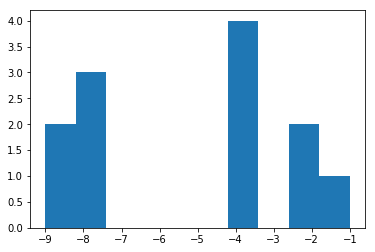

In [91]:
plt.hist((df.loc['kemp'][0:1703]*10).dropna().tolist())

# Get Overall Sentiment of Database

In [42]:
sent_list = []
for i in range(0, len(df)):
    sent_list.append((df.iloc[i][0:1703]*10).dropna().tolist())

KeyboardInterrupt: 

In [80]:
flat_list = [item for sublist in sent_list for item in sublist]
flat_list

[1.0000000149011612,
 6.000000238418579,
 -1.0000000149011612,
 1.0000000149011612,
 1.0000000149011612,
 -2.0000000298023224,
 3.0000001192092896,
 5.0,
 2.0000000298023224,
 -5.0,
 1.0000000149011612,
 4.000000059604645,
 2.0000000298023224,
 1.0000000149011612,
 5.0,
 6.000000238418579,
 4.000000059604645,
 2.0000000298023224,
 -1.0000000149011612,
 -1.0000000149011612,
 4.000000059604645,
 8.000000119209291,
 1.0000000149011612,
 6.000000238418579,
 1.0000000149011612,
 1.0000000149011612,
 8.000000119209291,
 -6.9999998807907104,
 1.0000000149011612,
 -2.0000000298023224,
 6.9999998807907104,
 1.0000000149011612,
 4.000000059604645,
 -1.0000000149011612,
 2.0000000298023224,
 1.0000000149011612,
 3.0000001192092896,
 -2.0000000298023224,
 2.0000000298023224,
 1.0000000149011612,
 1.0000000149011612,
 -1.0000000149011612,
 2.0000000298023224,
 -1.0000000149011612,
 -3.0000001192092896,
 -2.0000000298023224,
 8.000000119209291,
 1.0000000149011612,
 8.999999761581421,
 -2.0000000298

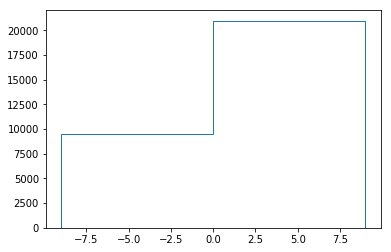

In [82]:
# overall sentiment of database
plt.hist(flat_list, histtype='step', bins=2)
plt.show()

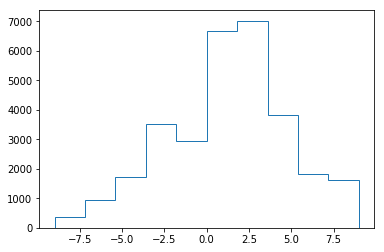

In [83]:
# overall sentiment of database
plt.hist(flat_list, histtype='step')
plt.show()